
# A 1:  Classification Model Development
<br/>DAT-5390 | Computational Data Analytics with Python
<br/>Chase Kusterer - Faculty of Analytics
<br/>Hult International Business School
<br/>**Yunsik Choung**

In [1]:
import time
startTime = time.time()

# Part I: Preparation and Exploration
## Imports and Loading the Dataset
Complete the code to import packages and load the 'Cross_Sell_Success_Dataset_2023.xlsx' dataset into Python as <strong>df</strong>.

In [2]:
# Importing All Libraries What I've uesed
import pandas            as pd                           # data science essentials
import matplotlib.pyplot as plt                          # data visualization
import seaborn           as sns                          # enhanced data viz
from sklearn.model_selection import train_test_split     # train-test split
from sklearn.linear_model import LogisticRegression      # logistic regression
import statsmodels.formula.api as smf                    # logistic regression
from sklearn.metrics import confusion_matrix             # confusion matrix
from sklearn.metrics import roc_auc_score                # auc score
from sklearn.neighbors import KNeighborsClassifier       # KNN for classification
from sklearn.neighbors import KNeighborsRegressor        # KNN for regression
from sklearn.preprocessing import StandardScaler         # standard scaler
from sklearn.tree import DecisionTreeClassifier          # classification trees
from sklearn.tree import plot_tree                       # tree plots
from sklearn.ensemble import RandomForestClassifier      # Random Forest Classifier
from sklearn.ensemble import GradientBoostingClassifier  # GradientBoosting Classifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

# Loading Files
file = './Cross_Sell_Success_Dataset_2023.xlsx'

# Store in data frame as df
df = pd.read_excel(io = file)

# Columne name convert
df['LATE_DELIVERIES'] = df['LATE_DELIVERIES ']

# Drop 
df = df.drop('LATE_DELIVERIES ', axis=1)
df.head(n = 5)

,CROSS_SELL_SUCCESS,EMAIL,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED,LATE_DELIVERIES
0,1,steffon.baratheon@yahoo.com,4920.0,493,9,1,10,265.6,5,5,2,0,137.41,6,2.894737,456,0
1,0,harlon.greyjoy@visa.com,6150.0,361,9,1,6,247.0,2,5,1,0,120.20,5,2.631579,680,0
2,0,monster@protonmail.com,3435.0,278,6,1,4,164.4,0,6,1,5,127.00,3,3.684211,145,0
3,1,damon.lannister.(lord)@yahoo.com,3330.0,269,8,1,2,176.0,5,5,2,0,129.78,6,3.157895,418,0
4,1,raynald.westerling@jnj.com,3427.5,276,7,1,10,164.6,0,6,1,14,34.42,3,3.157895,174,0


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

## User-Defined Functions
Run the following code to load the user-defined functions used throughout this notebook.

In [3]:
########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

In [4]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.show()
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [5]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(x_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
x_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the x data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing x_data
        scaler             = StandardScaler()
        scaler.fit(x_data)
        x_scaled           = scaler.transform(x_data)
        x_scaled_df        = pd.DataFrame(x_scaled)
        x_data             = x_scaled_df



    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(x_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(x_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1




In [6]:
########################################
# mostFittedThreshold
########################################
def mostFittedThreshold(y_true, pred_proba):
    """
Check most fitted threshold beween 0.01 and 0.99

PARAMETERS
----------
y_true        : Actual y data to compare AUC.
pred_proba    : sklearn classifier Model's pred_proba result set.
    """
    # Define Arage of 0.01 to 0.99
    arange = []
    for i in range(1, 100, 1):
        x = i / 100
        arange.append(x)
    # Make DataFrame from pred_proba result
    pred_df = pd.DataFrame(pred_proba, columns=['Negative', 'Positive'])
    
    # Check all threshold and define each column named p_1 to p_99
    for x in arange:
        # Define column name
        new_col = 'p_' + str(int(x*100))
        # build new column's prediction y data from thrashold range
        for index, row in pred_df.iterrows():
            # Check only positive probabilities
            if row['Positive'] > x:
                pred_df.loc[index, new_col] = 1
            else:
                pred_df.loc[index, new_col] = 0
    # Declare roc_auc_list
    roc_auc_list = []
    # Store evrery auc score with column name, AUC_SCORE, Threshold
    for col in pred_df.iloc[:, 2:]:
        # Declare inner dictionary
        inner = {}
        # Calculate roc_auc_score from matched threshold
        auc_score = roc_auc_score(y_true, pred_df[col])
        # REDEFINE threshold from column name
        threshHold = int(col.replace('p_', '')) / 100
        # Store result to dictionary
        inner['Threshold'] = threshHold
        inner['AUC_SCORE'] = auc_score
        inner['COL'] = col
        # Appending to roc_auc_list
        roc_auc_list.append(inner)
    # Declare response dataframe from roc_auc_list
    resp = pd.DataFrame(roc_auc_list)
    # Sort every values 
    resp = resp.sort_values(by='AUC_SCORE', ascending=False).reset_index()
    # Build confusion matrix from highest auc_score
    conf_matrix = confusion_matrix(y_true=y_true, y_pred=pred_df[resp.loc[0, 'COL']])
    # Declare finalized response value
    response = {'Threshold': resp.loc[0, 'Threshold'], 'AUC_SCORE': resp.loc[0, 'AUC_SCORE'], 'Confusion_matrix': conf_matrix}
    # Return response
    return response

In [7]:
########################################
# importanceBasedBackward
########################################
def importanceBasedBackward(model, x_train, x_test, y_train, y_test, min_features=1):
    """
Check AUC Score with backward stepping feature selection based importances

PARAMETERS
----------
model         : sklearn model, must have feature_importaces_ attribute.
x_train       : train x
x_test        : test x
y_train       : train y
y_test        : test y
min_features  : Minmum features of selection.
    """
    fullResult = []
    feature_df = pd.DataFrame(data={'COL': model.feature_names_in_, 'IMP': model.feature_importances_})
    feature_df = feature_df.sort_values(by='IMP', ascending=True).reset_index()
    for index, row in feature_df.iterrows():
        inner = {}
        feature_df = feature_df.drop(index=index, axis=1)
        cols = feature_df['COL']
        if len(cols) >= min_features:
            fitted = model.fit(x_train[cols], y_train)
            pred = fitted.predict(x_test[cols])
            trScr = fitted.score(x_train[cols], y_train)
            teScr = fitted.score(x_test[cols], y_test)
            gap = abs(teScr - trScr)
            auc = roc_auc_score(y_true=y_test, y_score=pred)
            inner['cols'] = cols.to_list()
            inner['train_score'] = trScr
            inner['test_score'] = teScr
            inner['gap'] = gap
            inner['auc'] = auc
            fullResult.append(inner)
    full_df = pd.DataFrame(fullResult)
    sns.lineplot(data=full_df, markers=True)
    plt.show()
    print(f"AUC Score Change")
    print(full_df.auc)
    print(f"\nBest Auc Features:")
    print(full_df.sort_values(by='auc', ascending=False).reset_index().loc[0, 'cols'])

In [8]:
# Calculating Total Complexities
def calculateTotalComplexity(params = dict):
    '''
    Multiply total length of each key's data in dictionary
    
    Parameter
    -----------------
    parmas: dict 
    '''
    # Declare return value
    response = 1 # Default value is 1
    
    # Checking for all Keys in Parma
    for key in params:
        # Checking for 0 
        if len(params[key]) > 0: # Avoiding 0 
            # Multifly all length of params
            response = response * len(params[key])
            
    # Return Statement 
    return response

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

# Part II - Logistic Regression
Now that we've finished developing features (although we could have developed many, many more), we are ready to start the model building process. As a first step, let's see how the explanatory variables correlate with the response variable.<br><br>
## Correlation Analysis
Complete the code to generate the (Pearson) correlations between the response variable and the explanatory variables (rounded to two decimal places). 
<br>Note that these are read differently given that the response variable is binomial and not continuous.

 - Unfortunately, there is only one feature, Cancellations Afternoon, which has high correlation greater than 0.1.

In [9]:
df_corr = df.corr(method='pearson').round(decimals=3)

df_corr['CROSS_SELL_SUCCESS'].sort_values(ascending = False)

CROSS_SELL_SUCCESS             1.000
CANCELLATIONS_AFTER_NOON       0.143
MOBILE_LOGINS                  0.062
PC_LOGINS                      0.044
UNIQUE_MEALS_PURCH             0.037
AVG_TIME_PER_SITE_VISIT        0.032
LATE_DELIVERIES                0.024
LARGEST_ORDER_SIZE             0.022
AVG_PREP_VID_TIME              0.011
TOTAL_PHOTOS_VIEWED            0.010
TOTAL_MEALS_ORDERED            0.006
REVENUE                        0.005
PRODUCT_CATEGORIES_VIEWED      0.005
CONTACTS_W_CUSTOMER_SERVICE   -0.000
WEEKLY_PLAN                   -0.005
AVG_MEAN_RATING               -0.035
Name: CROSS_SELL_SUCCESS, dtype: float64

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

### Stratifying the Response Variable

When working with classification problems, preserving the balance of the response variable is critically important. In terms of the dataset, we need to preserve the proportion of people that cross sell succeeded in both the training and testing sets. This can be accomplished by using the <em>stratify</em> argument of <strong>train_test_split(&nbsp;)</strong>. The code below will output the original balance between those that succeed and those that did not succeed the cross selling.

In [10]:
df.loc[ : ,'CROSS_SELL_SUCCESS'].value_counts(normalize = True).round(decimals = 2)

1    0.68
0    0.32
Name: CROSS_SELL_SUCCESS, dtype: float64

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

### Preparing Explanatory and Response Data
Declare the explanatory variables as <strong>x_data</strong> and the response variable (survived) as <strong>y_data</strong>.

In [11]:
# declaring explanatory variables
x_data = df._get_numeric_data().drop(labels=['CROSS_SELL_SUCCESS'],axis=1)

# declaring response variable
y_data = df.loc[:, 'CROSS_SELL_SUCCESS']

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

### Prepare train-test split for statsmodels
Stratify option helps preserve the balance of the response variable on in the training and testing sets.

In [12]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            x_data,
            y_data,
            test_size    = 0.25,
            random_state = 219,
            stratify     = y_data) # preserving balance

# merging training data for statsmodels
df_train = pd.concat([x_train, y_train], axis = 1)

In [13]:
print(f"""
Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}

Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")


Response Variable Proportions (Training Set)
--------------------------------------------
1    0.68
0    0.32
Name: CROSS_SELL_SUCCESS, dtype: float64

Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.68
0    0.32
Name: CROSS_SELL_SUCCESS, dtype: float64



<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

### Build a Univariate Logistic Regression Model
Build a logistic regression model in <strong>statsmodels</strong> using the explanatory variable that is most highly correlated with the response variable.

 - The model's R-squared is 0.016, it means that default model can explain only 1.6% of Cross Sell Success.
 - Cancellations afternoon feature has positive coefficient on Cross Sell Success. 
 - It means that some customers cancel their order after noon, which makes them receive only half a refund of their charged amount.

In [14]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula   = """CROSS_SELL_SUCCESS ~ CANCELLATIONS_AFTER_NOON""",
                           data = df_train)

# FITTING the model object
results_logistic = logistic_small.fit()

# checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC

Optimization terminated successfully.
         Current function value: 0.618141
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
====================================================================
Model:               Logit              Pseudo R-squared: 0.016     
Dependent Variable:  CROSS_SELL_SUCCESS AIC:              1807.7365 
Date:                2023-06-16 10:16   BIC:              1818.3075 
No. Observations:    1459               Log-Likelihood:   -901.87   
Df Model:            1                  LL-Null:          -916.19   
Df Residuals:        1457               LLR p-value:      8.6694e-08
Converged:           1.0000             Scale:            1.0000    
No. Iterations:      5.0000                                         
--------------------------------------------------------------------
                         Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
--------------------------------------------------------------------
Intercept                0.4517   0.0781 5.7800 0.0000 0.2985 0.6048
CANCELLATIONS_AFTER_NOON 0.1981   0.0389 5.0997 0.0000 0.1220 0.2743
====================================================================

"""

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

### Build a logistic regression model in statsmodels using all of the explanatory variables.
Use the loop below for efficiency and correct any errors that occur after the copy/paste.

In [15]:
for val in x_data:
    print(f" {val} + ")

 REVENUE + 
 TOTAL_MEALS_ORDERED + 
 UNIQUE_MEALS_PURCH + 
 CONTACTS_W_CUSTOMER_SERVICE + 
 PRODUCT_CATEGORIES_VIEWED + 
 AVG_TIME_PER_SITE_VISIT + 
 CANCELLATIONS_AFTER_NOON + 
 PC_LOGINS + 
 MOBILE_LOGINS + 
 WEEKLY_PLAN + 
 AVG_PREP_VID_TIME + 
 LARGEST_ORDER_SIZE + 
 AVG_MEAN_RATING + 
 TOTAL_PHOTOS_VIEWED + 
 LATE_DELIVERIES + 


 - Full model can explain 3% of Cross Sell success. It increased little rather than before, but still weak. 
 - Based on result, REVENUE, AVG_TIME_PER_SITE_VISIT (p < 0.1), UNIQUE_MEALS_PURCH, CANCELLATIONS_AFTER_NOON, and MOBILE_LOGINS (p < 0.05) have statistically significant. 

In [16]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """CROSS_SELL_SUCCESS ~  REVENUE + 
                                     TOTAL_MEALS_ORDERED + 
                                     UNIQUE_MEALS_PURCH + 
                                     CONTACTS_W_CUSTOMER_SERVICE + 
                                     PRODUCT_CATEGORIES_VIEWED + 
                                     AVG_TIME_PER_SITE_VISIT + 
                                     CANCELLATIONS_AFTER_NOON + 
                                     PC_LOGINS + 
                                     MOBILE_LOGINS + 
                                     WEEKLY_PLAN + 
                                     AVG_PREP_VID_TIME + 
                                     LARGEST_ORDER_SIZE + 
                                     AVG_MEAN_RATING + 
                                     TOTAL_PHOTOS_VIEWED + 
                                     LATE_DELIVERIES
                                        """,
                                        data    = df_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary2()

Optimization terminated successfully.
         Current function value: 0.608970
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                 Logit                Pseudo R-squared:   0.030     
Dependent Variable:    CROSS_SELL_SUCCESS   AIC:                1808.9752 
Date:                  2023-06-16 10:16     BIC:                1893.5433 
No. Observations:      1459                 Log-Likelihood:     -888.49   
Df Model:              15                   LL-Null:            -916.19   
Df Residuals:          1443                 LLR p-value:        1.5227e-06
Converged:             1.0000               Scale:              1.0000    
No. Iterations:        5.0000                                             
--------------------------------------------------------------------------
                             Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
--------------------------------------------------------------------------
Intercept                   -1.3204   0.8373 -1.5770 0.1148 -2.9614 0.3206
REVENUE                     -0.0001   0.0001 -1.7720 0.0764 -0.0003 0.0000
TOTAL_MEALS_ORDERED          0.0013   0.0014  0.9161 0.3596 -0.0014 0.0040
UNIQUE_MEALS_PURCH           0.0508   0.0254  1.9969 0.0458  0.0009 0.1006
CONTACTS_W_CUSTOMER_SERVICE  0.0266   0.0247  1.0767 0.2816 -0.0218 0.0751
PRODUCT_CATEGORIES_VIEWED   -0.0025   0.0189 -0.1313 0.8956 -0.0396 0.0346
AVG_TIME_PER_SITE_VISIT      0.0048   0.0025  1.9132 0.0557 -0.0001 0.0097
CANCELLATIONS_AFTER_NOON     0.1980   0.0395  5.0071 0.0000  0.1205 0.2755
PC_LOGINS                    0.1826   0.0988  1.8479 0.0646 -0.0111 0.3764
MOBILE_LOGINS                0.3457   0.1108  3.1207 0.0018  0.1286 0.5629
WEEKLY_PLAN                 -0.0028   0.0042 -0.6798 0.4966 -0.0110 0.0053
AVG_PREP_VID_TIME           -0.0011   0.0011 -0.9380 0.3482 -0.0033 0.0012
LARGEST_ORDER_SIZE          -0.0596   0.0650 -0.9161 0.3596 -0.1870 0.0679
AVG_MEAN_RATING             -0.0906   0.1152 -0.7870 0.4313 -0.3164 0.1351
TOTAL_PHOTOS_VIEWED         -0.0000   0.0004 -0.0108 0.9914 -0.0008 0.0008
LATE_DELIVERIES              0.0110   0.0154  0.7177 0.4729 -0.0191 0.0412
==========================================================================

"""

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

## Find more effective features.

### Gender from email address.
 - Figure gender out from email address through gender guesser Library.
 - Mostly Felmale and Female go to FEMAIL = 1.
 - Mostly Male and Male go to MALE = 1.
 - Andy is andy, and Unknown is Unknown
 - If the email address has two or more names with a period (.), I assume the first part is a first name.
 - If the first name could clarify gender, then gender from the first name is prioritized.
 - Gender related dummy variables are four features, MALE, FEMALE, ANDY, UNKNOWN. 
 <br>
 
**DO NOT RUN GENDER GUESSER CODES. IT WILL TAKE 8 or MORE HOURS**

In [17]:
''' # Do not run his code, it wil take 8 hours.
# Gender Guessing From Email Address data

# Import gender_guesser Library
import gender_guesser.detector as gender

# Decalare Email Result Set list.
email_result = []

# Build contries list from Gender Guesser
countries = str.split('usa great_britain ireland italy malta portugal spain france belgium luxembourg the_netherlands east_frisia germany austria swiss iceland denmark norway sweden finland estonia latvia lithuania poland czech_republic slovakia hungary romania bulgaria bosniaand croatia kosovo macedonia montenegro serbia slovenia albania greece russia belarus moldova ukraine armenia azerbaijan georgia the_stans turkey arabia israel china india japan korea vietnam other_countries', ' ')

# Start Guessing with email split
for index, row in df.iterrows():
    # Declare dictionary
    inner = {}
    # Store email
    email = row['EMAIL']
    inner['EMAIL'] = email
    # Split with @ mark
    domain = email[str.find(email, '@') + 1:]
    # Store DOMAIN
    inner['DOMAIN'] = domain
    # Split email address from email
    address = email[:str.find(email,'@')]
    # Store ADDRESS
    inner['ADDRESS'] = address
    # Replace brakets from ADDRESS
    addressEdt = address.replace('(', '').replace(')', '')
    # Declare First Name
    firstName = ''
    # Declare Last Name
    LastName = ''
    # First name stored from first split part of addres Edited with capitalization
    firstName = addressEdt.split('.')[0].capitalize()
    # Store First Name
    inner['FIRST_NAME'] = firstName
    # Declare Gender from first name as unknown
    GD = 'unknown'
    
    # Declare Country for check
    nameCountry = ''
    print(f"Address: {addressEdt}")
    for name in addressEdt.replace('-', '.').split('.'):
        # Loop with contries list
        name = name.capitalize()
        print(f"Name: {name} =================")
        for country in countries:
            # Check the gender with all countries
            nameGD = gender.Detector().get_gender(name = name, country=country)\
            # if it is not unknown, break the loop
            if nameGD not in ['unknown', 'andy']:
                GD = nameGD
                nameCountry = country
                break # If it found some gender, it broke the loop
            elif nameGD == 'andy': # If it found gender as andy, keep going
                GD = nameGD
                nameCountry = country
        # if Name has gender, it broke the loop
        if GD not in ['unknown', 'andy']:
            print(f"Gender: {GD} - Nation: {nameCountry}")
            break
    
    # Store Gender from first name
    inner['GD'] = GD
    
    # Append dictionary to result set
    email_result.append(inner)
    
    # Logging all process
    print(f"""
({index + 1} / {len(df)})...Processed
========================================
EMAIL           : {email}
Domain          : {domain}
Address         : {address}
First Name      : {firstName}
GD From FName   : {GD}
Country         : {nameCountry}
    """)
'''

' # Do not run his code, it wil take 8 hours.\n# Gender Guessing From Email Address data\n\n# Import gender_guesser Library\nimport gender_guesser.detector as gender\n\n# Decalare Email Result Set list.\nemail_result = []\n\n# Build contries list from Gender Guesser\ncountries = str.split(\'usa great_britain ireland italy malta portugal spain france belgium luxembourg the_netherlands east_frisia germany austria swiss iceland denmark norway sweden finland estonia latvia lithuania poland czech_republic slovakia hungary romania bulgaria bosniaand croatia kosovo macedonia montenegro serbia slovenia albania greece russia belarus moldova ukraine armenia azerbaijan georgia the_stans turkey arabia israel china india japan korea vietnam other_countries\', \' \')\n\n# Start Guessing with email split\nfor index, row in df.iterrows():\n    # Declare dictionary\n    inner = {}\n    # Store email\n    email = row[\'EMAIL\']\n    inner[\'EMAIL\'] = email\n    # Split with @ mark\n    domain = email[s

In [18]:
# This result is from gender gueser.
# Store result as dictionary list
email_result2 = [{'EMAIL': 'steffon.baratheon@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'steffon.baratheon', 'FIRST_NAME': 'Steffon', 'GD': 'unknown'}, {'EMAIL': 'harlon.greyjoy@visa.com', 'DOMAIN': 'visa.com', 'ADDRESS': 'harlon.greyjoy', 'FIRST_NAME': 'Harlon', 'GD': 'unknown'}, {'EMAIL': 'monster@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'monster', 'FIRST_NAME': 'Monster', 'GD': 'unknown'}, {'EMAIL': 'damon.lannister.(lord)@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'damon.lannister.(lord)', 'FIRST_NAME': 'Damon', 'GD': 'male'}, {'EMAIL': 'raynald.westerling@jnj.com', 'DOMAIN': 'jnj.com', 'ADDRESS': 'raynald.westerling', 'FIRST_NAME': 'Raynald', 'GD': 'male'}, {'EMAIL': 'rollam.westerling@jnj.com', 'DOMAIN': 'jnj.com', 'ADDRESS': 'rollam.westerling', 'FIRST_NAME': 'Rollam', 'GD': 'unknown'}, {'EMAIL': 'utt@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'utt', 'FIRST_NAME': 'Utt', 'GD': 'unknown'}, {'EMAIL': 'bandy@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'bandy', 'FIRST_NAME': 'Bandy', 'GD': 'unknown'}, {'EMAIL': 'rickard.karstark@live.com', 'DOMAIN': 'live.com', 'ADDRESS': 'rickard.karstark', 'FIRST_NAME': 'Rickard', 'GD': 'male'}, {'EMAIL': 'androw.frey@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'androw.frey', 'FIRST_NAME': 'Androw', 'GD': 'unknown'}, {'EMAIL': 'clement.piper@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'clement.piper', 'FIRST_NAME': 'Clement', 'GD': 'male'}, {'EMAIL': 'morton.waynwood@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'morton.waynwood', 'FIRST_NAME': 'Morton', 'GD': 'male'}, {'EMAIL': 'rudge@travelers.com', 'DOMAIN': 'travelers.com', 'ADDRESS': 'rudge', 'FIRST_NAME': 'Rudge', 'GD': 'unknown'}, {'EMAIL': 'shiera.crakehall@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'shiera.crakehall', 'FIRST_NAME': 'Shiera', 'GD': 'unknown'}, {'EMAIL': 'allaquo@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'allaquo', 'FIRST_NAME': 'Allaquo', 'GD': 'unknown'}, {'EMAIL': 'baelor.targaryen.(son.of.daeron.ii)@live.com', 'DOMAIN': 'live.com', 'ADDRESS': 'baelor.targaryen.(son.of.daeron.ii)', 'FIRST_NAME': 'Baelor', 'GD': 'mostly_male'}, {'EMAIL': 'jon.wylde@exxon.com', 'DOMAIN': 'exxon.com', 'ADDRESS': 'jon.wylde', 'FIRST_NAME': 'Jon', 'GD': 'male'}, {'EMAIL': 'sedgekins@chevron.com', 'DOMAIN': 'chevron.com', 'ADDRESS': 'sedgekins', 'FIRST_NAME': 'Sedgekins', 'GD': 'unknown'}, {'EMAIL': 'jacks@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'jacks', 'FIRST_NAME': 'Jacks', 'GD': 'unknown'}, {'EMAIL': 'manfred.lothston@goldmansacs.com', 'DOMAIN': 'goldmansacs.com', 'ADDRESS': 'manfred.lothston', 'FIRST_NAME': 'Manfred', 'GD': 'male'}, {'EMAIL': 'luke.of.longtown@me.com', 'DOMAIN': 'me.com', 'ADDRESS': 'luke.of.longtown', 'FIRST_NAME': 'Luke', 'GD': 'male'}, {'EMAIL': 'lysa.meadows@caterpillar.com', 'DOMAIN': 'caterpillar.com', 'ADDRESS': 'lysa.meadows', 'FIRST_NAME': 'Lysa', 'GD': 'female'}, {'EMAIL': 'aerys.i.targaryen@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'aerys.i.targaryen', 'FIRST_NAME': 'Aerys', 'GD': 'unknown'}, {'EMAIL': 'alannys.harlaw@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'alannys.harlaw', 'FIRST_NAME': 'Alannys', 'GD': 'unknown'}, {'EMAIL': 'jaehaerys.targaryen.(son.of.aegon.ii)@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'jaehaerys.targaryen.(son.of.aegon.ii)', 'FIRST_NAME': 'Jaehaerys', 'GD': 'mostly_male'}, {'EMAIL': 'kyra.frey@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'kyra.frey', 'FIRST_NAME': 'Kyra', 'GD': 'female'}, {'EMAIL': 'leslyn.haigh@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'leslyn.haigh', 'FIRST_NAME': 'Leslyn', 'GD': 'unknown'}, {'EMAIL': 'quenton.greyjoy@ibm.com', 'DOMAIN': 'ibm.com', 'ADDRESS': 'quenton.greyjoy', 'FIRST_NAME': 'Quenton', 'GD': 'unknown'}, {'EMAIL': 'rob@unitedtech.com', 'DOMAIN': 'unitedtech.com', 'ADDRESS': 'rob', 'FIRST_NAME': 'Rob', 'GD': 'male'}, {'EMAIL': 'urzen@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'urzen', 'FIRST_NAME': 'Urzen', 'GD': 'unknown'}, {'EMAIL': 'walder.frey.(son.of.merrett)@ibm.com', 'DOMAIN': 'ibm.com', 'ADDRESS': 'walder.frey.(son.of.merrett)', 'FIRST_NAME': 'Walder', 'GD': 'mostly_male'}, {'EMAIL': 'roger.hogg@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'roger.hogg', 'FIRST_NAME': 'Roger', 'GD': 'male'}, {'EMAIL': 'kyleg@pg.com', 'DOMAIN': 'pg.com', 'ADDRESS': 'kyleg', 'FIRST_NAME': 'Kyleg', 'GD': 'unknown'}, {'EMAIL': 'clarence.charlton@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'clarence.charlton', 'FIRST_NAME': 'Clarence', 'GD': 'male'}, {'EMAIL': 'eyron.stark@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'eyron.stark', 'FIRST_NAME': 'Eyron', 'GD': 'unknown'}, {'EMAIL': 'franklyn.fowler@chevron.com', 'DOMAIN': 'chevron.com', 'ADDRESS': 'franklyn.fowler', 'FIRST_NAME': 'Franklyn', 'GD': 'male'}, {'EMAIL': 'gevin.harlaw@dupont.com', 'DOMAIN': 'dupont.com', 'ADDRESS': 'gevin.harlaw', 'FIRST_NAME': 'Gevin', 'GD': 'unknown'}, {'EMAIL': 'gorold.goodbrother@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'gorold.goodbrother', 'FIRST_NAME': 'Gorold', 'GD': 'unknown'}, {'EMAIL': 'harwin@walmart.com', 'DOMAIN': 'walmart.com', 'ADDRESS': 'harwin', 'FIRST_NAME': 'Harwin', 'GD': 'unknown'}, {'EMAIL': 'jory.cassel@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'jory.cassel', 'FIRST_NAME': 'Jory', 'GD': 'male'}, {'EMAIL': 'lyanna.stark@merck.com', 'DOMAIN': 'merck.com', 'ADDRESS': 'lyanna.stark', 'FIRST_NAME': 'Lyanna', 'GD': 'unknown'}, {'EMAIL': 'saera.targaryen@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'saera.targaryen', 'FIRST_NAME': 'Saera', 'GD': 'unknown'}, {'EMAIL': 'walder.haigh@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'walder.haigh', 'FIRST_NAME': 'Walder', 'GD': 'unknown'}, {'EMAIL': 'raynard@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'raynard', 'FIRST_NAME': 'Raynard', 'GD': 'male'}, {'EMAIL': 'cetheres@cisco.com', 'DOMAIN': 'cisco.com', 'ADDRESS': 'cetheres', 'FIRST_NAME': 'Cetheres', 'GD': 'unknown'}, {'EMAIL': 'creighton.redfort@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'creighton.redfort', 'FIRST_NAME': 'Creighton', 'GD': 'male'}, {'EMAIL': 'margot.lannister@cocacola.com', 'DOMAIN': 'cocacola.com', 'ADDRESS': 'margot.lannister', 'FIRST_NAME': 'Margot', 'GD': 'female'}, {'EMAIL': 'noho.dimittis@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'noho.dimittis', 'FIRST_NAME': 'Noho', 'GD': 'unknown'}, {'EMAIL': 'beqqo@boeing.com', 'DOMAIN': 'boeing.com', 'ADDRESS': 'beqqo', 'FIRST_NAME': 'Beqqo', 'GD': 'unknown'}, {'EMAIL': 'dagon.ironmaker@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'dagon.ironmaker', 'FIRST_NAME': 'Dagon', 'GD': 'unknown'}, {'EMAIL': 'denyo.terys@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'denyo.terys', 'FIRST_NAME': 'Denyo', 'GD': 'unknown'}, {'EMAIL': 'elza@verizon.com', 'DOMAIN': 'verizon.com', 'ADDRESS': 'elza', 'FIRST_NAME': 'Elza', 'GD': 'female'}, {'EMAIL': 'ilyn.payne@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'ilyn.payne', 'FIRST_NAME': 'Ilyn', 'GD': 'unknown'}, {'EMAIL': 'jasper.redfort@live.com', 'DOMAIN': 'live.com', 'ADDRESS': 'jasper.redfort', 'FIRST_NAME': 'Jasper', 'GD': 'male'}, {'EMAIL': 'lem.(standfast)@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'lem.(standfast)', 'FIRST_NAME': 'Lem', 'GD': 'unknown'}, {'EMAIL': 'luthor.tyrell.(son.of.theodore)@intel.com', 'DOMAIN': 'intel.com', 'ADDRESS': 'luthor.tyrell.(son.of.theodore)', 'FIRST_NAME': 'Luthor', 'GD': 'male'}, {'EMAIL': 'rhaegar.frey@cisco.com', 'DOMAIN': 'cisco.com', 'ADDRESS': 'rhaegar.frey', 'FIRST_NAME': 'Rhaegar', 'GD': 'unknown'}, {'EMAIL': 'salladhor.saan@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'salladhor.saan', 'FIRST_NAME': 'Salladhor', 'GD': 'unknown'}, {'EMAIL': 'zekko@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'zekko', 'FIRST_NAME': 'Zekko', 'GD': 'unknown'}, {'EMAIL': 'cayn@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'cayn', 'FIRST_NAME': 'Cayn', 'GD': 'unknown'}, {'EMAIL': 'chella@unitedtech.com', 'DOMAIN': 'unitedtech.com', 'ADDRESS': 'chella', 'FIRST_NAME': 'Chella', 'GD': 'unknown'}, {'EMAIL': 'cynthea.frey@cisco.com', 'DOMAIN': 'cisco.com', 'ADDRESS': 'cynthea.frey', 'FIRST_NAME': 'Cynthea', 'GD': 'unknown'}, {'EMAIL': 'frenken@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'frenken', 'FIRST_NAME': 'Frenken', 'GD': 'unknown'}, {'EMAIL': 'jon.lynderly@merck.com', 'DOMAIN': 'merck.com', 'ADDRESS': 'jon.lynderly', 'FIRST_NAME': 'Jon', 'GD': 'male'}, {'EMAIL': 'lenwood.tawney@microsoft.com', 'DOMAIN': 'microsoft.com', 'ADDRESS': 'lenwood.tawney', 'FIRST_NAME': 'Lenwood', 'GD': 'unknown'}, {'EMAIL': 'myrielle.lannister@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'myrielle.lannister', 'FIRST_NAME': 'Myrielle', 'GD': 'female'}, {'EMAIL': 'rufus.leek@dupont.com', 'DOMAIN': 'dupont.com', 'ADDRESS': 'rufus.leek', 'FIRST_NAME': 'Rufus', 'GD': 'male'}, {'EMAIL': 'steelskin@travelers.com', 'DOMAIN': 'travelers.com', 'ADDRESS': 'steelskin', 'FIRST_NAME': 'Steelskin', 'GD': 'unknown'}, {'EMAIL': 'briar@ibm.com', 'DOMAIN': 'ibm.com', 'ADDRESS': 'briar', 'FIRST_NAME': 'Briar', 'GD': 'unknown'}, {'EMAIL': 'lucas.codd@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'lucas.codd', 'FIRST_NAME': 'Lucas', 'GD': 'male'}, {'EMAIL': 'aglantine@me.com', 'DOMAIN': 'me.com', 'ADDRESS': 'aglantine', 'FIRST_NAME': 'Aglantine', 'GD': 'unknown'}, {'EMAIL': 'dale.drumm@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'dale.drumm', 'FIRST_NAME': 'Dale', 'GD': 'mostly_male'}, {'EMAIL': 'mathis.frey@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'mathis.frey', 'FIRST_NAME': 'Mathis', 'GD': 'male'}, {'EMAIL': 'aemon.costayne@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'aemon.costayne', 'FIRST_NAME': 'Aemon', 'GD': 'unknown'}, {'EMAIL': 'alysanne.lefford@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'alysanne.lefford', 'FIRST_NAME': 'Alysanne', 'GD': 'unknown'}, {'EMAIL': 'benedar.belmore@jpmorgan.com', 'DOMAIN': 'jpmorgan.com', 'ADDRESS': 'benedar.belmore', 'FIRST_NAME': 'Benedar', 'GD': 'unknown'}, {'EMAIL': 'castos@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'castos', 'FIRST_NAME': 'Castos', 'GD': 'unknown'}, {'EMAIL': 'cotter.pyke@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'cotter.pyke', 'FIRST_NAME': 'Cotter', 'GD': 'unknown'}, {'EMAIL': 'dornish.dilly@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'dornish.dilly', 'FIRST_NAME': 'Dornish', 'GD': 'unknown'}, {'EMAIL': 'ellaria.sand@mmm.com', 'DOMAIN': 'mmm.com', 'ADDRESS': 'ellaria.sand', 'FIRST_NAME': 'Ellaria', 'GD': 'unknown'}, {'EMAIL': 'imry.florent@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'imry.florent', 'FIRST_NAME': 'Imry', 'GD': 'male'}, {'EMAIL': 'jasper.wylde@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'jasper.wylde', 'FIRST_NAME': 'Jasper', 'GD': 'male'}, {'EMAIL': 'jayne.bracken@nike.com', 'DOMAIN': 'nike.com', 'ADDRESS': 'jayne.bracken', 'FIRST_NAME': 'Jayne', 'GD': 'female'}, {'EMAIL': 'joy.hill@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'joy.hill', 'FIRST_NAME': 'Joy', 'GD': 'female'}, {'EMAIL': 'karlon.stark@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'karlon.stark', 'FIRST_NAME': 'Karlon', 'GD': 'unknown'}, {'EMAIL': 'lollys.stokeworth@me.com', 'DOMAIN': 'me.com', 'ADDRESS': 'lollys.stokeworth', 'FIRST_NAME': 'Lollys', 'GD': 'unknown'}, {'EMAIL': 'melisandre@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'melisandre', 'FIRST_NAME': 'Melisandre', 'GD': 'unknown'}, {'EMAIL': 'mors.manwoody@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'mors.manwoody', 'FIRST_NAME': 'Mors', 'GD': 'unknown'}, {'EMAIL': 'myria.jordayne@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'myria.jordayne', 'FIRST_NAME': 'Myria', 'GD': 'unknown'}, {'EMAIL': 'naerys.targaryen@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'naerys.targaryen', 'FIRST_NAME': 'Naerys', 'GD': 'unknown'}, {'EMAIL': 'narbert@boeing.com', 'DOMAIN': 'boeing.com', 'ADDRESS': 'narbert', 'FIRST_NAME': 'Narbert', 'GD': 'unknown'}, {'EMAIL': 'rolder@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'rolder', 'FIRST_NAME': 'Rolder', 'GD': 'unknown'}, {'EMAIL': 'skyte@unitedtech.com', 'DOMAIN': 'unitedtech.com', 'ADDRESS': 'skyte', 'FIRST_NAME': 'Skyte', 'GD': 'unknown'}, {'EMAIL': 'tygett.lannister@me.com', 'DOMAIN': 'me.com', 'ADDRESS': 'tygett.lannister', 'FIRST_NAME': 'Tygett', 'GD': 'unknown'}, {'EMAIL': 'unella@unitedhealth.com', 'DOMAIN': 'unitedhealth.com', 'ADDRESS': 'unella', 'FIRST_NAME': 'Unella', 'GD': 'unknown'}, {'EMAIL': 'urrigon.greyjoy@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'urrigon.greyjoy', 'FIRST_NAME': 'Urrigon', 'GD': 'unknown'}, {'EMAIL': 'victaria.tyrell@unitedhealth.com', 'DOMAIN': 'unitedhealth.com', 'ADDRESS': 'victaria.tyrell', 'FIRST_NAME': 'Victaria', 'GD': 'male'}, {'EMAIL': 'weese@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'weese', 'FIRST_NAME': 'Weese', 'GD': 'unknown'}, {'EMAIL': 'will.(squire)@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'will.(squire)', 'FIRST_NAME': 'Will', 'GD': 'male'}, {'EMAIL': 'ygon.farwynd@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'ygon.farwynd', 'FIRST_NAME': 'Ygon', 'GD': 'unknown'}, {'EMAIL': 'desmond.grell@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'desmond.grell', 'FIRST_NAME': 'Desmond', 'GD': 'male'}, {'EMAIL': 'sumner.crakehall@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'sumner.crakehall', 'FIRST_NAME': 'Sumner', 'GD': 'unknown'}, {'EMAIL': 'addam@walmart.com', 'DOMAIN': 'walmart.com', 'ADDRESS': 'addam', 'FIRST_NAME': 'Addam', 'GD': 'unknown'}, {'EMAIL': 'rhialta.vance@dupont.com', 'DOMAIN': 'dupont.com', 'ADDRESS': 'rhialta.vance', 'FIRST_NAME': 'Rhialta', 'GD': 'male'}, {'EMAIL': 'selmond.stackspear@mmm.com', 'DOMAIN': 'mmm.com', 'ADDRESS': 'selmond.stackspear', 'FIRST_NAME': 'Selmond', 'GD': 'unknown'}, {'EMAIL': 'donnel.of.duskendale@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'donnel.of.duskendale', 'FIRST_NAME': 'Donnel', 'GD': 'unknown'}, {'EMAIL': 'dunstan.drumm@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'dunstan.drumm', 'FIRST_NAME': 'Dunstan', 'GD': 'unknown'}, {'EMAIL': 'mya.stone@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'mya.stone', 'FIRST_NAME': 'Mya', 'GD': 'female'}, {'EMAIL': 'alyn.velaryon@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'alyn.velaryon', 'FIRST_NAME': 'Alyn', 'GD': 'mostly_female'}, {'EMAIL': 'andrew.estermont@ge.org', 'DOMAIN': 'ge.org', 'ADDRESS': 'andrew.estermont', 'FIRST_NAME': 'Andrew', 'GD': 'male'}, {'EMAIL': 'arthur.ambrose@live.com', 'DOMAIN': 'live.com', 'ADDRESS': 'arthur.ambrose', 'FIRST_NAME': 'Arthur', 'GD': 'male'}, {'EMAIL': 'ashara.dayne@travelers.com', 'DOMAIN': 'travelers.com', 'ADDRESS': 'ashara.dayne', 'FIRST_NAME': 'Ashara', 'GD': 'unknown'}, {'EMAIL': 'ayrmidon@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'ayrmidon', 'FIRST_NAME': 'Ayrmidon', 'GD': 'unknown'}, {'EMAIL': 'belis@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'belis', 'FIRST_NAME': 'Belis', 'GD': 'unknown'}, {'EMAIL': 'cosgrove@live.com', 'DOMAIN': 'live.com', 'ADDRESS': 'cosgrove', 'FIRST_NAME': 'Cosgrove', 'GD': 'unknown'}, {'EMAIL': 'eustace.brune@disney.com', 'DOMAIN': 'disney.com', 'ADDRESS': 'eustace.brune', 'FIRST_NAME': 'Eustace', 'GD': 'female'}, {'EMAIL': 'jaehaerys.i.targaryen@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'jaehaerys.i.targaryen', 'FIRST_NAME': 'Jaehaerys', 'GD': 'unknown'}, {'EMAIL': 'jeyne.poole@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'jeyne.poole', 'FIRST_NAME': 'Jeyne', 'GD': 'unknown'}, {'EMAIL': 'khorane.sathmantes@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'khorane.sathmantes', 'FIRST_NAME': 'Khorane', 'GD': 'unknown'}, {'EMAIL': 'lucos.chyttering@walmart.com', 'DOMAIN': 'walmart.com', 'ADDRESS': 'lucos.chyttering', 'FIRST_NAME': 'Lucos', 'GD': 'unknown'}, {'EMAIL': 'pate.(mory)@goldmansacs.com', 'DOMAIN': 'goldmansacs.com', 'ADDRESS': 'pate.(mory)', 'FIRST_NAME': 'Pate', 'GD': 'unknown'}, {'EMAIL': 'quenten.banefort@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'quenten.banefort', 'FIRST_NAME': 'Quenten', 'GD': 'unknown'}, {'EMAIL': 'roger.of.pennytree@nike.com', 'DOMAIN': 'nike.com', 'ADDRESS': 'roger.of.pennytree', 'FIRST_NAME': 'Roger', 'GD': 'male'}, {'EMAIL': 'terrance.lynderly@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'terrance.lynderly', 'FIRST_NAME': 'Terrance', 'GD': 'male'}, {'EMAIL': 'willam@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'willam', 'FIRST_NAME': 'Willam', 'GD': 'unknown'}, {'EMAIL': 'wyman.manderly@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'wyman.manderly', 'FIRST_NAME': 'Wyman', 'GD': 'male'}, {'EMAIL': 'lorimer@exxon.com', 'DOMAIN': 'exxon.com', 'ADDRESS': 'lorimer', 'FIRST_NAME': 'Lorimer', 'GD': 'male'}, {'EMAIL': 'yandry@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'yandry', 'FIRST_NAME': 'Yandry', 'GD': 'unknown'}, {'EMAIL': 'clarence.crabb@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'clarence.crabb', 'FIRST_NAME': 'Clarence', 'GD': 'male'}, {'EMAIL': 'cletus.yronwood@pg.com', 'DOMAIN': 'pg.com', 'ADDRESS': 'cletus.yronwood', 'FIRST_NAME': 'Cletus', 'GD': 'male'}, {'EMAIL': 'gerold.dayne@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'gerold.dayne', 'FIRST_NAME': 'Gerold', 'GD': 'male'}, {'EMAIL': 'waymar.royce@microsoft.com', 'DOMAIN': 'microsoft.com', 'ADDRESS': 'waymar.royce', 'FIRST_NAME': 'Waymar', 'GD': 'male'}, {'EMAIL': 'aenys.frey@pg.com', 'DOMAIN': 'pg.com', 'ADDRESS': 'aenys.frey', 'FIRST_NAME': 'Aenys', 'GD': 'unknown'}, {'EMAIL': 'allar.deem@live.com', 'DOMAIN': 'live.com', 'ADDRESS': 'allar.deem', 'FIRST_NAME': 'Allar', 'GD': 'male'}, {'EMAIL': 'ballabar@unitedtech.com', 'DOMAIN': 'unitedtech.com', 'ADDRESS': 'ballabar', 'FIRST_NAME': 'Ballabar', 'GD': 'unknown'}, {'EMAIL': 'calon@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'calon', 'FIRST_NAME': 'Calon', 'GD': 'unknown'}, {'EMAIL': 'dobber@apple.com', 'DOMAIN': 'apple.com', 'ADDRESS': 'dobber', 'FIRST_NAME': 'Dobber', 'GD': 'unknown'}, {'EMAIL': 'harmond.umber@unitedtech.com', 'DOMAIN': 'unitedtech.com', 'ADDRESS': 'harmond.umber', 'FIRST_NAME': 'Harmond', 'GD': 'unknown'}, {'EMAIL': 'melissa.blackwood@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'melissa.blackwood', 'FIRST_NAME': 'Melissa', 'GD': 'female'}, {'EMAIL': 'pudding@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'pudding', 'FIRST_NAME': 'Pudding', 'GD': 'unknown'}, {'EMAIL': 'robin.hill@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'robin.hill', 'FIRST_NAME': 'Robin', 'GD': 'mostly_female'}, {'EMAIL': 'ryam@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'ryam', 'FIRST_NAME': 'Ryam', 'GD': 'unknown'}, {'EMAIL': 'symond.frey@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'symond.frey', 'FIRST_NAME': 'Symond', 'GD': 'unknown'}, {'EMAIL': 'three-tooth@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'three-tooth', 'FIRST_NAME': 'Three-tooth', 'GD': 'unknown'}, {'EMAIL': 'vardis.egen@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'vardis.egen', 'FIRST_NAME': 'Vardis', 'GD': 'unknown'}, {'EMAIL': 'wex.pyke@live.com', 'DOMAIN': 'live.com', 'ADDRESS': 'wex.pyke', 'FIRST_NAME': 'Wex', 'GD': 'unknown'}, {'EMAIL': 'wilbert.osgrey@dupont.com', 'DOMAIN': 'dupont.com', 'ADDRESS': 'wilbert.osgrey', 'FIRST_NAME': 'Wilbert', 'GD': 'male'}, {'EMAIL': 'zachery.frey@nike.com', 'DOMAIN': 'nike.com', 'ADDRESS': 'zachery.frey', 'FIRST_NAME': 'Zachery', 'GD': 'male'}, {'EMAIL': 'patrek.mallister@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'patrek.mallister', 'FIRST_NAME': 'Patrek', 'GD': 'unknown'}, {'EMAIL': 'rickard.thorne@apple.com', 'DOMAIN': 'apple.com', 'ADDRESS': 'rickard.thorne', 'FIRST_NAME': 'Rickard', 'GD': 'male'}, {'EMAIL': 'ben.plumm@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'ben.plumm', 'FIRST_NAME': 'Ben', 'GD': 'male'}, {'EMAIL': 'eleanor.mooton@disney.com', 'DOMAIN': 'disney.com', 'ADDRESS': 'eleanor.mooton', 'FIRST_NAME': 'Eleanor', 'GD': 'female'}, {'EMAIL': 'bethany.fair-fingers@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'bethany.fair-fingers', 'FIRST_NAME': 'Bethany', 'GD': 'female'}, {'EMAIL': 'conwy@live.com', 'DOMAIN': 'live.com', 'ADDRESS': 'conwy', 'FIRST_NAME': 'Conwy', 'GD': 'unknown'}, {'EMAIL': 'fogo@me.com', 'DOMAIN': 'me.com', 'ADDRESS': 'fogo', 'FIRST_NAME': 'Fogo', 'GD': 'unknown'}, {'EMAIL': 'greydon.goodbrother@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'greydon.goodbrother', 'FIRST_NAME': 'Greydon', 'GD': 'unknown'}, {'EMAIL': 'jeyne.goodbrook@ge.org', 'DOMAIN': 'ge.org', 'ADDRESS': 'jeyne.goodbrook', 'FIRST_NAME': 'Jeyne', 'GD': 'unknown'}, {'EMAIL': 'malliard@walmart.com', 'DOMAIN': 'walmart.com', 'ADDRESS': 'malliard', 'FIRST_NAME': 'Malliard', 'GD': 'unknown'}, {'EMAIL': 'moon.boy@dupont.com', 'DOMAIN': 'dupont.com', 'ADDRESS': 'moon.boy', 'FIRST_NAME': 'Moon', 'GD': 'male'}, {'EMAIL': 'quentin.tyrell@jpmorgan.com', 'DOMAIN': 'jpmorgan.com', 'ADDRESS': 'quentin.tyrell', 'FIRST_NAME': 'Quentin', 'GD': 'male'}, {'EMAIL': 'quentyn.qorgyle@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'quentyn.qorgyle', 'FIRST_NAME': 'Quentyn', 'GD': 'unknown'}, {'EMAIL': 'ragwyle@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'ragwyle', 'FIRST_NAME': 'Ragwyle', 'GD': 'unknown'}, {'EMAIL': 'robert.flowers@mcdonalds.com', 'DOMAIN': 'mcdonalds.com', 'ADDRESS': 'robert.flowers', 'FIRST_NAME': 'Robert', 'GD': 'male'}, {'EMAIL': 'yoren@me.com', 'DOMAIN': 'me.com', 'ADDRESS': 'yoren', 'FIRST_NAME': 'Yoren', 'GD': 'unknown'}, {'EMAIL': 'yormwell@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'yormwell', 'FIRST_NAME': 'Yormwell', 'GD': 'unknown'}, {'EMAIL': 'rodrik.stark.(son.of.beron)@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'rodrik.stark.(son.of.beron)', 'FIRST_NAME': 'Rodrik', 'GD': 'mostly_male'}, {'EMAIL': 'hazzea@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'hazzea', 'FIRST_NAME': 'Hazzea', 'GD': 'unknown'}, {'EMAIL': 'barth@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'barth', 'FIRST_NAME': 'Barth', 'GD': 'unknown'}, {'EMAIL': 'cleyton.caswell@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'cleyton.caswell', 'FIRST_NAME': 'Cleyton', 'GD': 'unknown'}, {'EMAIL': 'donyse@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'donyse', 'FIRST_NAME': 'Donyse', 'GD': 'unknown'}, {'EMAIL': 'malwyn.frey@amex.com', 'DOMAIN': 'amex.com', 'ADDRESS': 'malwyn.frey', 'FIRST_NAME': 'Malwyn', 'GD': 'unknown'}, {'EMAIL': 'robar.royce@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'robar.royce', 'FIRST_NAME': 'Robar', 'GD': 'male'}, {'EMAIL': 'willamen.frey@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'willamen.frey', 'FIRST_NAME': 'Willamen', 'GD': 'unknown'}, {'EMAIL': 'coldhands@verizon.com', 'DOMAIN': 'verizon.com', 'ADDRESS': 'coldhands', 'FIRST_NAME': 'Coldhands', 'GD': 'unknown'}, {'EMAIL': 'stonesnake@travelers.com', 'DOMAIN': 'travelers.com', 'ADDRESS': 'stonesnake', 'FIRST_NAME': 'Stonesnake', 'GD': 'unknown'}, {'EMAIL': 'illyrio.mopatis@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'illyrio.mopatis', 'FIRST_NAME': 'Illyrio', 'GD': 'unknown'}, {'EMAIL': 'raymar.royce@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'raymar.royce', 'FIRST_NAME': 'Raymar', 'GD': 'male'}, {'EMAIL': 'vaemond.velaryon@disney.com', 'DOMAIN': 'disney.com', 'ADDRESS': 'vaemond.velaryon', 'FIRST_NAME': 'Vaemond', 'GD': 'unknown'}, {'EMAIL': 'alester.oakheart@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'alester.oakheart', 'FIRST_NAME': 'Alester', 'GD': 'unknown'}, {'EMAIL': 'manfryd.lothston@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'manfryd.lothston', 'FIRST_NAME': 'Manfryd', 'GD': 'unknown'}, {'EMAIL': 'symon.santagar@dupont.com', 'DOMAIN': 'dupont.com', 'ADDRESS': 'symon.santagar', 'FIRST_NAME': 'Symon', 'GD': 'male'}, {'EMAIL': 'danelle.lothston@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'danelle.lothston', 'FIRST_NAME': 'Danelle', 'GD': 'female'}, {'EMAIL': 'pono@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'pono', 'FIRST_NAME': 'Pono', 'GD': 'unknown'}, {'EMAIL': 'samwell.spicer@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'samwell.spicer', 'FIRST_NAME': 'Samwell', 'GD': 'unknown'}, {'EMAIL': 'tarber@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'tarber', 'FIRST_NAME': 'Tarber', 'GD': 'unknown'}, {'EMAIL': 'mawney@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'mawney', 'FIRST_NAME': 'Mawney', 'GD': 'unknown'}, {'EMAIL': 'cedra@mmm.com', 'DOMAIN': 'mmm.com', 'ADDRESS': 'cedra', 'FIRST_NAME': 'Cedra', 'GD': 'unknown'}, {'EMAIL': 'gwin.goodbrother@cocacola.com', 'DOMAIN': 'cocacola.com', 'ADDRESS': 'gwin.goodbrother', 'FIRST_NAME': 'Gwin', 'GD': 'unknown'}, {'EMAIL': 'joanna.lannister@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'joanna.lannister', 'FIRST_NAME': 'Joanna', 'GD': 'female'}, {'EMAIL': 'quickfinger@goldmansacs.com', 'DOMAIN': 'goldmansacs.com', 'ADDRESS': 'quickfinger', 'FIRST_NAME': 'Quickfinger', 'GD': 'unknown'}, {'EMAIL': 'tregar.ormollen@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'tregar.ormollen', 'FIRST_NAME': 'Tregar', 'GD': 'unknown'}, {'EMAIL': 'brella@exxon.com', 'DOMAIN': 'exxon.com', 'ADDRESS': 'brella', 'FIRST_NAME': 'Brella', 'GD': 'unknown'}, {'EMAIL': 'rolland.uffering@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'rolland.uffering', 'FIRST_NAME': 'Rolland', 'GD': 'male'}, {'EMAIL': 'baelor.hightower@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'baelor.hightower', 'FIRST_NAME': 'Baelor', 'GD': 'unknown'}, {'EMAIL': 'barre@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'barre', 'FIRST_NAME': 'Barre', 'GD': 'unknown'}, {'EMAIL': 'bass@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'bass', 'FIRST_NAME': 'Bass', 'GD': 'unknown'}, {'EMAIL': 'corlys.velaryon@travelers.com', 'DOMAIN': 'travelers.com', 'ADDRESS': 'corlys.velaryon', 'FIRST_NAME': 'Corlys', 'GD': 'unknown'}, {'EMAIL': 'daemon.ii.blackfyre@cocacola.com', 'DOMAIN': 'cocacola.com', 'ADDRESS': 'daemon.ii.blackfyre', 'FIRST_NAME': 'Daemon', 'GD': 'unknown'}, {'EMAIL': 'leo.tyrell.(longthorn)@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'leo.tyrell.(longthorn)', 'FIRST_NAME': 'Leo', 'GD': 'male'}, {'EMAIL': 'ollo.lophand@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'ollo.lophand', 'FIRST_NAME': 'Ollo', 'GD': 'unknown'}, {'EMAIL': 'ormond.westerling@verizon.com', 'DOMAIN': 'verizon.com', 'ADDRESS': 'ormond.westerling', 'FIRST_NAME': 'Ormond', 'GD': 'male'}, {'EMAIL': 'red.lamb@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'red.lamb', 'FIRST_NAME': 'Red', 'GD': 'andy'}, {'EMAIL': 'robb.reyne@live.com', 'DOMAIN': 'live.com', 'ADDRESS': 'robb.reyne', 'FIRST_NAME': 'Robb', 'GD': 'male'}, {'EMAIL': 'syrio.forel@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'syrio.forel', 'FIRST_NAME': 'Syrio', 'GD': 'unknown'}, {'EMAIL': 'walda.rivers.(daughter.of.aemon)@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'walda.rivers.(daughter.of.aemon)', 'FIRST_NAME': 'Walda', 'GD': 'female'}, {'EMAIL': 'horas.redwyne@live.com', 'DOMAIN': 'live.com', 'ADDRESS': 'horas.redwyne', 'FIRST_NAME': 'Horas', 'GD': 'unknown'}, {'EMAIL': 'euron.greyjoy@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'euron.greyjoy', 'FIRST_NAME': 'Euron', 'GD': 'female'}, {'EMAIL': 'edgerran.oakheart@me.com', 'DOMAIN': 'me.com', 'ADDRESS': 'edgerran.oakheart', 'FIRST_NAME': 'Edgerran', 'GD': 'unknown'}, {'EMAIL': 'lothar.mallery@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'lothar.mallery', 'FIRST_NAME': 'Lothar', 'GD': 'male'}, {'EMAIL': 'matarys.targaryen@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'matarys.targaryen', 'FIRST_NAME': 'Matarys', 'GD': 'unknown'}, {'EMAIL': 'harbert@mmm.com', 'DOMAIN': 'mmm.com', 'ADDRESS': 'harbert', 'FIRST_NAME': 'Harbert', 'GD': 'male'}, {'EMAIL': 'aeron.greyjoy@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'aeron.greyjoy', 'FIRST_NAME': 'Aeron', 'GD': 'female'}, {'EMAIL': 'clement.crabb@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'clement.crabb', 'FIRST_NAME': 'Clement', 'GD': 'male'}, {'EMAIL': 'daario.naharis@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'daario.naharis', 'FIRST_NAME': 'Daario', 'GD': 'unknown'}, {'EMAIL': 'danny.flint@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'danny.flint', 'FIRST_NAME': 'Danny', 'GD': 'male'}, {'EMAIL': 'maris@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'maris', 'FIRST_NAME': 'Maris', 'GD': 'female'}, {'EMAIL': 'orbert.caswell@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'orbert.caswell', 'FIRST_NAME': 'Orbert', 'GD': 'unknown'}, {'EMAIL': 'orwyle@exxon.com', 'DOMAIN': 'exxon.com', 'ADDRESS': 'orwyle', 'FIRST_NAME': 'Orwyle', 'GD': 'unknown'}, {'EMAIL': 'ryon.allyrion@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'ryon.allyrion', 'FIRST_NAME': 'Ryon', 'GD': 'unknown'}, {'EMAIL': 'walder.rivers@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'walder.rivers', 'FIRST_NAME': 'Walder', 'GD': 'unknown'}, {'EMAIL': 'zollo@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'zollo', 'FIRST_NAME': 'Zollo', 'GD': 'unknown'}, {'EMAIL': 'edric.dayne@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'edric.dayne', 'FIRST_NAME': 'Edric', 'GD': 'unknown'}, {'EMAIL': 'jurne@nike.com', 'DOMAIN': 'nike.com', 'ADDRESS': 'jurne', 'FIRST_NAME': 'Jurne', 'GD': 'unknown'}, {'EMAIL': 'clayton.suggs@me.com', 'DOMAIN': 'me.com', 'ADDRESS': 'clayton.suggs', 'FIRST_NAME': 'Clayton', 'GD': 'male'}, {'EMAIL': 'armen@ibm.com', 'DOMAIN': 'ibm.com', 'ADDRESS': 'armen', 'FIRST_NAME': 'Armen', 'GD': 'male'}, {'EMAIL': 'damon.dance-for-me@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'damon.dance-for-me', 'FIRST_NAME': 'Damon', 'GD': 'male'}, {'EMAIL': 'alyssa.blackwood@live.com', 'DOMAIN': 'live.com', 'ADDRESS': 'alyssa.blackwood', 'FIRST_NAME': 'Alyssa', 'GD': 'female'}, {'EMAIL': 'alyx.frey@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'alyx.frey', 'FIRST_NAME': 'Alyx', 'GD': 'unknown'}, {'EMAIL': 'garth.hightower@apple.com', 'DOMAIN': 'apple.com', 'ADDRESS': 'garth.hightower', 'FIRST_NAME': 'Garth', 'GD': 'male'}, {'EMAIL': 'garth.of.oldtown@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'garth.of.oldtown', 'FIRST_NAME': 'Garth', 'GD': 'male'}, {'EMAIL': 'hugh.hammer@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'hugh.hammer', 'FIRST_NAME': 'Hugh', 'GD': 'male'}, {'EMAIL': 'jeyne.lothston@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'jeyne.lothston', 'FIRST_NAME': 'Jeyne', 'GD': 'unknown'}, {'EMAIL': 'lamprey@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'lamprey', 'FIRST_NAME': 'Lamprey', 'GD': 'unknown'}, {'EMAIL': 'lennocks@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'lennocks', 'FIRST_NAME': 'Lennocks', 'GD': 'unknown'}, {'EMAIL': 'lothar.frey@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'lothar.frey', 'FIRST_NAME': 'Lothar', 'GD': 'male'}, {'EMAIL': 'martyn.rivers@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'martyn.rivers', 'FIRST_NAME': 'Martyn', 'GD': 'male'}, {'EMAIL': 'nute@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'nute', 'FIRST_NAME': 'Nute', 'GD': 'unknown'}, {'EMAIL': 'ossifer.plumm@homedepot.com', 'DOMAIN': 'homedepot.com', 'ADDRESS': 'ossifer.plumm', 'FIRST_NAME': 'Ossifer', 'GD': 'unknown'}, {'EMAIL': 'owen.norrey@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'owen.norrey', 'FIRST_NAME': 'Owen', 'GD': 'male'}, {'EMAIL': 'shortear@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'shortear', 'FIRST_NAME': 'Shortear', 'GD': 'unknown'}, {'EMAIL': 'viserys.i.targaryen@pfizer.com', 'DOMAIN': 'pfizer.com', 'ADDRESS': 'viserys.i.targaryen', 'FIRST_NAME': 'Viserys', 'GD': 'unknown'}, {'EMAIL': 'perwyn.frey@live.com', 'DOMAIN': 'live.com', 'ADDRESS': 'perwyn.frey', 'FIRST_NAME': 'Perwyn', 'GD': 'unknown'}, {'EMAIL': 'hod@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'hod', 'FIRST_NAME': 'Hod', 'GD': 'male'}, {'EMAIL': 'big.boil@jnj.com', 'DOMAIN': 'jnj.com', 'ADDRESS': 'big.boil', 'FIRST_NAME': 'Big', 'GD': 'unknown'}, {'EMAIL': 'chataya@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'chataya', 'FIRST_NAME': 'Chataya', 'GD': 'unknown'}, {'EMAIL': 'willow.witch-eye@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'willow.witch-eye', 'FIRST_NAME': 'Willow', 'GD': 'female'}, {'EMAIL': 'grazdar.zo.galare@chevron.com', 'DOMAIN': 'chevron.com', 'ADDRESS': 'grazdar.zo.galare', 'FIRST_NAME': 'Grazdar', 'GD': 'unknown'}, {'EMAIL': 'arneld@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'arneld', 'FIRST_NAME': 'Arneld', 'GD': 'unknown'}, {'EMAIL': 'dalla@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'dalla', 'FIRST_NAME': 'Dalla', 'GD': 'female'}, {'EMAIL': 'eddara.tallhart@cisco.com', 'DOMAIN': 'cisco.com', 'ADDRESS': 'eddara.tallhart', 'FIRST_NAME': 'Eddara', 'GD': 'unknown'}, {'EMAIL': 'egon.emeros@unitedtech.com', 'DOMAIN': 'unitedtech.com', 'ADDRESS': 'egon.emeros', 'FIRST_NAME': 'Egon', 'GD': 'male'}, {'EMAIL': 'elwood.meadows@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'elwood.meadows', 'FIRST_NAME': 'Elwood', 'GD': 'male'}, {'EMAIL': 'esgred@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'esgred', 'FIRST_NAME': 'Esgred', 'GD': 'unknown'}, {'EMAIL': 'goady@live.com', 'DOMAIN': 'live.com', 'ADDRESS': 'goady', 'FIRST_NAME': 'Goady', 'GD': 'unknown'}, {'EMAIL': 'harren.botley@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'harren.botley', 'FIRST_NAME': 'Harren', 'GD': 'unknown'}, {'EMAIL': 'harren.hoare@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'harren.hoare', 'FIRST_NAME': 'Harren', 'GD': 'unknown'}, {'EMAIL': 'jasper.waynwood@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'jasper.waynwood', 'FIRST_NAME': 'Jasper', 'GD': 'male'}, {'EMAIL': 'lysa.arryn@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'lysa.arryn', 'FIRST_NAME': 'Lysa', 'GD': 'female'}, {'EMAIL': 'michael.mertyns@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'michael.mertyns', 'FIRST_NAME': 'Michael', 'GD': 'male'}, {'EMAIL': 'ormond.yronwood@caterpillar.com', 'DOMAIN': 'caterpillar.com', 'ADDRESS': 'ormond.yronwood', 'FIRST_NAME': 'Ormond', 'GD': 'male'}, {'EMAIL': 'racallio.ryndoon@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'racallio.ryndoon', 'FIRST_NAME': 'Racallio', 'GD': 'unknown'}, {'EMAIL': 'timon@live.com', 'DOMAIN': 'live.com', 'ADDRESS': 'timon', 'FIRST_NAME': 'Timon', 'GD': 'male'}, {'EMAIL': 'toefinger@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'toefinger', 'FIRST_NAME': 'Toefinger', 'GD': 'unknown'}, {'EMAIL': 'tyrek.lannister@nike.com', 'DOMAIN': 'nike.com', 'ADDRESS': 'tyrek.lannister', 'FIRST_NAME': 'Tyrek', 'GD': 'unknown'}, {'EMAIL': 'varly@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'varly', 'FIRST_NAME': 'Varly', 'GD': 'unknown'}, {'EMAIL': 'jeyne.arryn@boeing.com', 'DOMAIN': 'boeing.com', 'ADDRESS': 'jeyne.arryn', 'FIRST_NAME': 'Jeyne', 'GD': 'unknown'}, {'EMAIL': 'edwyn.osgrey@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'edwyn.osgrey', 'FIRST_NAME': 'Edwyn', 'GD': 'unknown'}, {'EMAIL': 'triston.of.tally.hill@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'triston.of.tally.hill', 'FIRST_NAME': 'Triston', 'GD': 'male'}, {'EMAIL': 'denestan@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'denestan', 'FIRST_NAME': 'Denestan', 'GD': 'unknown'}, {'EMAIL': 'mariya.darry@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'mariya.darry', 'FIRST_NAME': 'Mariya', 'GD': 'female'}, {'EMAIL': 'sandor.clegane@visa.com', 'DOMAIN': 'visa.com', 'ADDRESS': 'sandor.clegane', 'FIRST_NAME': 'Sandor', 'GD': 'unknown'}, {'EMAIL': 'alyn@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'alyn', 'FIRST_NAME': 'Alyn', 'GD': 'mostly_female'}, {'EMAIL': 'andros.brax@live.com', 'DOMAIN': 'live.com', 'ADDRESS': 'andros.brax', 'FIRST_NAME': 'Andros', 'GD': 'unknown'}, {'EMAIL': 'brea@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'brea', 'FIRST_NAME': 'Brea', 'GD': 'unknown'}, {'EMAIL': 'chayle@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'chayle', 'FIRST_NAME': 'Chayle', 'GD': 'unknown'}, {'EMAIL': 'dickon.tarly@jnj.com', 'DOMAIN': 'jnj.com', 'ADDRESS': 'dickon.tarly', 'FIRST_NAME': 'Dickon', 'GD': 'unknown'}, {'EMAIL': 'gillam@merck.com', 'DOMAIN': 'merck.com', 'ADDRESS': 'gillam', 'FIRST_NAME': 'Gillam', 'GD': 'unknown'}, {'EMAIL': 'gyleno.dothare@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'gyleno.dothare', 'FIRST_NAME': 'Gyleno', 'GD': 'unknown'}, {'EMAIL': 'hugh@ge.org', 'DOMAIN': 'ge.org', 'ADDRESS': 'hugh', 'FIRST_NAME': 'Hugh', 'GD': 'male'}, {'EMAIL': 'jon.fossoway@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'jon.fossoway', 'FIRST_NAME': 'Jon', 'GD': 'male'}, {'EMAIL': 'kyle.(brotherhood)@jpmorgan.com', 'DOMAIN': 'jpmorgan.com', 'ADDRESS': 'kyle.(brotherhood)', 'FIRST_NAME': 'Kyle', 'GD': 'mostly_male'}, {'EMAIL': 'lucas.inchfield@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'lucas.inchfield', 'FIRST_NAME': 'Lucas', 'GD': 'male'}, {'EMAIL': 'lyonel.frey@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'lyonel.frey', 'FIRST_NAME': 'Lyonel', 'GD': 'male'}, {'EMAIL': 'martyn.mullendore@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'martyn.mullendore', 'FIRST_NAME': 'Martyn', 'GD': 'male'}, {'EMAIL': 'meg@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'meg', 'FIRST_NAME': 'Meg', 'GD': 'female'}, {'EMAIL': 'nymella.toland@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'nymella.toland', 'FIRST_NAME': 'Nymella', 'GD': 'unknown'}, {'EMAIL': 'owen.inchfield@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'owen.inchfield', 'FIRST_NAME': 'Owen', 'GD': 'male'}, {'EMAIL': 'porther@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'porther', 'FIRST_NAME': 'Porther', 'GD': 'unknown'}, {'EMAIL': 'preston.greenfield@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'preston.greenfield', 'FIRST_NAME': 'Preston', 'GD': 'male'}, {'EMAIL': 'rodrik.cassel@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'rodrik.cassel', 'FIRST_NAME': 'Rodrik', 'GD': 'unknown'}, {'EMAIL': 'sour.alyn@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'sour.alyn', 'FIRST_NAME': 'Sour', 'GD': 'mostly_female'}, {'EMAIL': 'stone.thumbs@microsoft.com', 'DOMAIN': 'microsoft.com', 'ADDRESS': 'stone.thumbs', 'FIRST_NAME': 'Stone', 'GD': 'male'}, {'EMAIL': 'theomar.smallwood@nike.com', 'DOMAIN': 'nike.com', 'ADDRESS': 'theomar.smallwood', 'FIRST_NAME': 'Theomar', 'GD': 'unknown'}, {'EMAIL': 'todric@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'todric', 'FIRST_NAME': 'Todric', 'GD': 'unknown'}, {'EMAIL': 'wat.(orphan)@amex.com', 'DOMAIN': 'amex.com', 'ADDRESS': 'wat.(orphan)', 'FIRST_NAME': 'Wat', 'GD': 'unknown'}, {'EMAIL': 'willam.wythers@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'willam.wythers', 'FIRST_NAME': 'Willam', 'GD': 'unknown'}, {'EMAIL': 'yorkel@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'yorkel', 'FIRST_NAME': 'Yorkel', 'GD': 'unknown'}, {'EMAIL': 'senelle@ibm.com', 'DOMAIN': 'ibm.com', 'ADDRESS': 'senelle', 'FIRST_NAME': 'Senelle', 'GD': 'unknown'}, {'EMAIL': 'ronald.connington@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'ronald.connington', 'FIRST_NAME': 'Ronald', 'GD': 'male'}, {'EMAIL': 'rowan@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'rowan', 'FIRST_NAME': 'Rowan', 'GD': 'mostly_male'}, {'EMAIL': 'bessa@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'bessa', 'FIRST_NAME': 'Bessa', 'GD': 'unknown'}, {'EMAIL': 'andar.royce@amex.com', 'DOMAIN': 'amex.com', 'ADDRESS': 'andar.royce', 'FIRST_NAME': 'Andar', 'GD': 'male'}, {'EMAIL': 'harmune@jpmorgan.com', 'DOMAIN': 'jpmorgan.com', 'ADDRESS': 'harmune', 'FIRST_NAME': 'Harmune', 'GD': 'unknown'}, {'EMAIL': 'hosteen.frey@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'hosteen.frey', 'FIRST_NAME': 'Hosteen', 'GD': 'unknown'}, {'EMAIL': 'blind.doss@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'blind.doss', 'FIRST_NAME': 'Blind', 'GD': 'unknown'}, {'EMAIL': 'bran.stark@pfizer.com', 'DOMAIN': 'pfizer.com', 'ADDRESS': 'bran.stark', 'FIRST_NAME': 'Bran', 'GD': 'unknown'}, {'EMAIL': 'buford.bulwer@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'buford.bulwer', 'FIRST_NAME': 'Buford', 'GD': 'male'}, {'EMAIL': 'dickon.manwoody@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'dickon.manwoody', 'FIRST_NAME': 'Dickon', 'GD': 'unknown'}, {'EMAIL': 'elyn.norridge@jnj.com', 'DOMAIN': 'jnj.com', 'ADDRESS': 'elyn.norridge', 'FIRST_NAME': 'Elyn', 'GD': 'unknown'}, {'EMAIL': 'ghael@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'ghael', 'FIRST_NAME': 'Ghael', 'GD': 'unknown'}, {'EMAIL': 'harmund.sharp@disney.com', 'DOMAIN': 'disney.com', 'ADDRESS': 'harmund.sharp', 'FIRST_NAME': 'Harmund', 'GD': 'unknown'}, {'EMAIL': 'jacelyn.bywater@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'jacelyn.bywater', 'FIRST_NAME': 'Jacelyn', 'GD': 'unknown'}, {'EMAIL': 'joth.quickbow@nike.com', 'DOMAIN': 'nike.com', 'ADDRESS': 'joth.quickbow', 'FIRST_NAME': 'Joth', 'GD': 'unknown'}, {'EMAIL': 'kezmya@disney.com', 'DOMAIN': 'disney.com', 'ADDRESS': 'kezmya', 'FIRST_NAME': 'Kezmya', 'GD': 'unknown'}, {'EMAIL': 'lomas.estermont@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'lomas.estermont', 'FIRST_NAME': 'Lomas', 'GD': 'unknown'}, {'EMAIL': 'lymond.vikary@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'lymond.vikary', 'FIRST_NAME': 'Lymond', 'GD': 'unknown'}, {'EMAIL': 'meizo.mahr@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'meizo.mahr', 'FIRST_NAME': 'Meizo', 'GD': 'unknown'}, {'EMAIL': 'olenna.redwyne@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'olenna.redwyne', 'FIRST_NAME': 'Olenna', 'GD': 'unknown'}, {'EMAIL': 'rickard.wylde@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'rickard.wylde', 'FIRST_NAME': 'Rickard', 'GD': 'male'}, {'EMAIL': 'rossart@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'rossart', 'FIRST_NAME': 'Rossart', 'GD': 'unknown'}, {'EMAIL': 'rylene.florent@unitedtech.com', 'DOMAIN': 'unitedtech.com', 'ADDRESS': 'rylene.florent', 'FIRST_NAME': 'Rylene', 'GD': 'male'}, {'EMAIL': 'spotted.cat@unitedhealth.com', 'DOMAIN': 'unitedhealth.com', 'ADDRESS': 'spotted.cat', 'FIRST_NAME': 'Spotted', 'GD': 'mostly_male'}, {'EMAIL': 'stafford.lannister@me.com', 'DOMAIN': 'me.com', 'ADDRESS': 'stafford.lannister', 'FIRST_NAME': 'Stafford', 'GD': 'male'}, {'EMAIL': 'sybassion@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'sybassion', 'FIRST_NAME': 'Sybassion', 'GD': 'unknown'}, {'EMAIL': 'torrhen.stark@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'torrhen.stark', 'FIRST_NAME': 'Torrhen', 'GD': 'unknown'}, {'EMAIL': 'wat.(wet)@apple.com', 'DOMAIN': 'apple.com', 'ADDRESS': 'wat.(wet)', 'FIRST_NAME': 'Wat', 'GD': 'unknown'}, {'EMAIL': 'wynafrei.whent@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'wynafrei.whent', 'FIRST_NAME': 'Wynafrei', 'GD': 'unknown'}, {'EMAIL': 'umar@visa.com', 'DOMAIN': 'visa.com', 'ADDRESS': 'umar', 'FIRST_NAME': 'Umar', 'GD': 'male'}, {'EMAIL': 'arnell@boeing.com', 'DOMAIN': 'boeing.com', 'ADDRESS': 'arnell', 'FIRST_NAME': 'Arnell', 'GD': 'unknown'}, {'EMAIL': 'alyce.graceford@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'alyce.graceford', 'FIRST_NAME': 'Alyce', 'GD': 'female'}, {'EMAIL': 'falia.flowers@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'falia.flowers', 'FIRST_NAME': 'Falia', 'GD': 'unknown'}, {'EMAIL': 'merrell.florent@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'merrell.florent', 'FIRST_NAME': 'Merrell', 'GD': 'male'}, {'EMAIL': 'berena.hornwood@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'berena.hornwood', 'FIRST_NAME': 'Berena', 'GD': 'unknown'}, {'EMAIL': 'caleotte@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'caleotte', 'FIRST_NAME': 'Caleotte', 'GD': 'unknown'}, {'EMAIL': 'cassella.vaith@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'cassella.vaith', 'FIRST_NAME': 'Cassella', 'GD': 'unknown'}, {'EMAIL': 'damon.lannister.(son.of.jason)@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'damon.lannister.(son.of.jason)', 'FIRST_NAME': 'Damon', 'GD': 'male'}, {'EMAIL': 'ethan.glover@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'ethan.glover', 'FIRST_NAME': 'Ethan', 'GD': 'male'}, {'EMAIL': 'joyeuse.erenford@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'joyeuse.erenford', 'FIRST_NAME': 'Joyeuse', 'GD': 'unknown'}, {'EMAIL': 'obara.sand@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'obara.sand', 'FIRST_NAME': 'Obara', 'GD': 'unknown'}, {'EMAIL': 'rat.cook@apple.com', 'DOMAIN': 'apple.com', 'ADDRESS': 'rat.cook', 'FIRST_NAME': 'Rat', 'GD': 'unknown'}, {'EMAIL': 'symond.templeton@exxon.com', 'DOMAIN': 'exxon.com', 'ADDRESS': 'symond.templeton', 'FIRST_NAME': 'Symond', 'GD': 'unknown'}, {'EMAIL': 'tal.toraq@merck.com', 'DOMAIN': 'merck.com', 'ADDRESS': 'tal.toraq', 'FIRST_NAME': 'Tal', 'GD': 'andy'}, {'EMAIL': 'viserys.targaryen@ge.org', 'DOMAIN': 'ge.org', 'ADDRESS': 'viserys.targaryen', 'FIRST_NAME': 'Viserys', 'GD': 'unknown'}, {'EMAIL': 'werlag@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'werlag', 'FIRST_NAME': 'Werlag', 'GD': 'unknown'}, {'EMAIL': 'zarabelo@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'zarabelo', 'FIRST_NAME': 'Zarabelo', 'GD': 'unknown'}, {'EMAIL': 'cerrick@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'cerrick', 'FIRST_NAME': 'Cerrick', 'GD': 'unknown'}, {'EMAIL': 'lyanna.mormont@unitedtech.com', 'DOMAIN': 'unitedtech.com', 'ADDRESS': 'lyanna.mormont', 'FIRST_NAME': 'Lyanna', 'GD': 'unknown'}, {'EMAIL': 'hayhead@unitedhealth.com', 'DOMAIN': 'unitedhealth.com', 'ADDRESS': 'hayhead', 'FIRST_NAME': 'Hayhead', 'GD': 'unknown'}, {'EMAIL': 'kurz@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'kurz', 'FIRST_NAME': 'Kurz', 'GD': 'unknown'}, {'EMAIL': 'flement.brax@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'flement.brax', 'FIRST_NAME': 'Flement', 'GD': 'unknown'}, {'EMAIL': 'grey.worm@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'grey.worm', 'FIRST_NAME': 'Grey', 'GD': 'unknown'}, {'EMAIL': 'maron.martell@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'maron.martell', 'FIRST_NAME': 'Maron', 'GD': 'male'}, {'EMAIL': 'robert.brax@me.com', 'DOMAIN': 'me.com', 'ADDRESS': 'robert.brax', 'FIRST_NAME': 'Robert', 'GD': 'male'}, {'EMAIL': 'urswyck@exxon.com', 'DOMAIN': 'exxon.com', 'ADDRESS': 'urswyck', 'FIRST_NAME': 'Urswyck', 'GD': 'unknown'}, {'EMAIL': 'will.(treb)@dupont.com', 'DOMAIN': 'dupont.com', 'ADDRESS': 'will.(treb)', 'FIRST_NAME': 'Will', 'GD': 'male'}, {'EMAIL': 'wun.weg.wun.dar.wun@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'wun.weg.wun.dar.wun', 'FIRST_NAME': 'Wun', 'GD': 'unknown'}, {'EMAIL': 'aegon.targaryen.(son.of.aenys.i)@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'aegon.targaryen.(son.of.aenys.i)', 'FIRST_NAME': 'Aegon', 'GD': 'mostly_male'}, {'EMAIL': 'varamyr@ge.org', 'DOMAIN': 'ge.org', 'ADDRESS': 'varamyr', 'FIRST_NAME': 'Varamyr', 'GD': 'unknown'}, {'EMAIL': 'hunnimore@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'hunnimore', 'FIRST_NAME': 'Hunnimore', 'GD': 'unknown'}, {'EMAIL': 'erena.glover@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'erena.glover', 'FIRST_NAME': 'Erena', 'GD': 'unknown'}, {'EMAIL': 'gretchel@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'gretchel', 'FIRST_NAME': 'Gretchel', 'GD': 'unknown'}, {'EMAIL': 'joseran@jnj.com', 'DOMAIN': 'jnj.com', 'ADDRESS': 'joseran', 'FIRST_NAME': 'Joseran', 'GD': 'unknown'}, {'EMAIL': 'torrek@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'torrek', 'FIRST_NAME': 'Torrek', 'GD': 'unknown'}, {'EMAIL': 'bennarion.botley@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'bennarion.botley', 'FIRST_NAME': 'Bennarion', 'GD': 'unknown'}, {'EMAIL': 'mellei@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'mellei', 'FIRST_NAME': 'Mellei', 'GD': 'unknown'}, {'EMAIL': 'brandon.stark.(burner)@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'brandon.stark.(burner)', 'FIRST_NAME': 'Brandon', 'GD': 'male'}, {'EMAIL': 'kyra@dupont.com', 'DOMAIN': 'dupont.com', 'ADDRESS': 'kyra', 'FIRST_NAME': 'Kyra', 'GD': 'female'}, {'EMAIL': 'rhaenys.targaryen@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'rhaenys.targaryen', 'FIRST_NAME': 'Rhaenys', 'GD': 'unknown'}, {'EMAIL': 'gerald.gower@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'gerald.gower', 'FIRST_NAME': 'Gerald', 'GD': 'male'}, {'EMAIL': 'delonne.allyrion@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'delonne.allyrion', 'FIRST_NAME': 'Delonne', 'GD': 'unknown'}, {'EMAIL': 'yellow.dick@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'yellow.dick', 'FIRST_NAME': 'Yellow', 'GD': 'male'}, {'EMAIL': 'erreg@cocacola.com', 'DOMAIN': 'cocacola.com', 'ADDRESS': 'erreg', 'FIRST_NAME': 'Erreg', 'GD': 'unknown'}, {'EMAIL': 'antario.jast@dupont.com', 'DOMAIN': 'dupont.com', 'ADDRESS': 'antario.jast', 'FIRST_NAME': 'Antario', 'GD': 'unknown'}, {'EMAIL': 'sylas.flatnose@cisco.com', 'DOMAIN': 'cisco.com', 'ADDRESS': 'sylas.flatnose', 'FIRST_NAME': 'Sylas', 'GD': 'unknown'}, {'EMAIL': 'areo.hotah@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'areo.hotah', 'FIRST_NAME': 'Areo', 'GD': 'unknown'}, {'EMAIL': 'belandra@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'belandra', 'FIRST_NAME': 'Belandra', 'GD': 'unknown'}, {'EMAIL': 'bronn@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'bronn', 'FIRST_NAME': 'Bronn', 'GD': 'unknown'}, {'EMAIL': 'cellador@apple.com', 'DOMAIN': 'apple.com', 'ADDRESS': 'cellador', 'FIRST_NAME': 'Cellador', 'GD': 'unknown'}, {'EMAIL': 'delp@pg.com', 'DOMAIN': 'pg.com', 'ADDRESS': 'delp', 'FIRST_NAME': 'Delp', 'GD': 'unknown'}, {'EMAIL': 'edric.storm@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'edric.storm', 'FIRST_NAME': 'Edric', 'GD': 'mostly_male'}, {'EMAIL': 'helicent.uffering@cocacola.com', 'DOMAIN': 'cocacola.com', 'ADDRESS': 'helicent.uffering', 'FIRST_NAME': 'Helicent', 'GD': 'unknown'}, {'EMAIL': 'lord.cafferen@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'lord.cafferen', 'FIRST_NAME': 'Lord', 'GD': 'unknown'}, {'EMAIL': 'lucas.tyrell@jpmorgan.com', 'DOMAIN': 'jpmorgan.com', 'ADDRESS': 'lucas.tyrell', 'FIRST_NAME': 'Lucas', 'GD': 'male'}, {'EMAIL': 'poul.pemford@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'poul.pemford', 'FIRST_NAME': 'Poul', 'GD': 'male'}, {'EMAIL': 'rosamund.lannister@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'rosamund.lannister', 'FIRST_NAME': 'Rosamund', 'GD': 'female'}, {'EMAIL': 'tomard@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'tomard', 'FIRST_NAME': 'Tomard', 'GD': 'unknown'}, {'EMAIL': 'wendello.qar.deeth@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'wendello.qar.deeth', 'FIRST_NAME': 'Wendello', 'GD': 'unknown'}, {'EMAIL': 'zharaq.zo.loraq@mmm.com', 'DOMAIN': 'mmm.com', 'ADDRESS': 'zharaq.zo.loraq', 'FIRST_NAME': 'Zharaq', 'GD': 'unknown'}, {'EMAIL': 'morra@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'morra', 'FIRST_NAME': 'Morra', 'GD': 'unknown'}, {'EMAIL': 'hizdahr.zo.loraq@chevron.com', 'DOMAIN': 'chevron.com', 'ADDRESS': 'hizdahr.zo.loraq', 'FIRST_NAME': 'Hizdahr', 'GD': 'unknown'}, {'EMAIL': 'gilly@verizon.com', 'DOMAIN': 'verizon.com', 'ADDRESS': 'gilly', 'FIRST_NAME': 'Gilly', 'GD': 'mostly_female'}, {'EMAIL': 'kedry@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'kedry', 'FIRST_NAME': 'Kedry', 'GD': 'unknown'}, {'EMAIL': 'muttering.bill@visa.com', 'DOMAIN': 'visa.com', 'ADDRESS': 'muttering.bill', 'FIRST_NAME': 'Muttering', 'GD': 'male'}, {'EMAIL': 'barthogan.stark@merck.com', 'DOMAIN': 'merck.com', 'ADDRESS': 'barthogan.stark', 'FIRST_NAME': 'Barthogan', 'GD': 'unknown'}, {'EMAIL': 'edwyd.fossoway@jnj.com', 'DOMAIN': 'jnj.com', 'ADDRESS': 'edwyd.fossoway', 'FIRST_NAME': 'Edwyd', 'GD': 'unknown'}, {'EMAIL': 'elys.waynwood@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'elys.waynwood', 'FIRST_NAME': 'Elys', 'GD': 'unknown'}, {'EMAIL': 'gerold.hightower@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'gerold.hightower', 'FIRST_NAME': 'Gerold', 'GD': 'male'}, {'EMAIL': 'great.walrus@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'great.walrus', 'FIRST_NAME': 'Great', 'GD': 'unknown'}, {'EMAIL': 'gwayne.gaunt@jnj.com', 'DOMAIN': 'jnj.com', 'ADDRESS': 'gwayne.gaunt', 'FIRST_NAME': 'Gwayne', 'GD': 'unknown'}, {'EMAIL': 'hother.umber@disney.com', 'DOMAIN': 'disney.com', 'ADDRESS': 'hother.umber', 'FIRST_NAME': 'Hother', 'GD': 'unknown'}, {'EMAIL': 'jaehaerys.ii.targaryen@boeing.com', 'DOMAIN': 'boeing.com', 'ADDRESS': 'jaehaerys.ii.targaryen', 'FIRST_NAME': 'Jaehaerys', 'GD': 'unknown'}, {'EMAIL': 'josua.willum@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'josua.willum', 'FIRST_NAME': 'Josua', 'GD': 'male'}, {'EMAIL': 'maggy@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'maggy', 'FIRST_NAME': 'Maggy', 'GD': 'female'}, {'EMAIL': 'matrice@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'matrice', 'FIRST_NAME': 'Matrice', 'GD': 'unknown'}, {'EMAIL': 'normund.tyrell@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'normund.tyrell', 'FIRST_NAME': 'Normund', 'GD': 'male'}, {'EMAIL': 'redwyn@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'redwyn', 'FIRST_NAME': 'Redwyn', 'GD': 'unknown'}, {'EMAIL': 'reek@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'reek', 'FIRST_NAME': 'Reek', 'GD': 'unknown'}, {'EMAIL': 'robert.arryn@cisco.com', 'DOMAIN': 'cisco.com', 'ADDRESS': 'robert.arryn', 'FIRST_NAME': 'Robert', 'GD': 'male'}, {'EMAIL': 'rodrik.greyjoy@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'rodrik.greyjoy', 'FIRST_NAME': 'Rodrik', 'GD': 'unknown'}, {'EMAIL': 'rolfe@pg.com', 'DOMAIN': 'pg.com', 'ADDRESS': 'rolfe', 'FIRST_NAME': 'Rolfe', 'GD': 'unknown'}, {'EMAIL': 'brandon.stark.(bad)@amex.com', 'DOMAIN': 'amex.com', 'ADDRESS': 'brandon.stark.(bad)', 'FIRST_NAME': 'Brandon', 'GD': 'male'}, {'EMAIL': 'gerardys@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'gerardys', 'FIRST_NAME': 'Gerardys', 'GD': 'unknown'}, {'EMAIL': 'lysono.maar@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'lysono.maar', 'FIRST_NAME': 'Lysono', 'GD': 'unknown'}, {'EMAIL': 'harrag.hoare@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'harrag.hoare', 'FIRST_NAME': 'Harrag', 'GD': 'unknown'}, {'EMAIL': 'jeffory.mallister@visa.com', 'DOMAIN': 'visa.com', 'ADDRESS': 'jeffory.mallister', 'FIRST_NAME': 'Jeffory', 'GD': 'unknown'}, {'EMAIL': 'alyn.haigh@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'alyn.haigh', 'FIRST_NAME': 'Alyn', 'GD': 'mostly_female'}, {'EMAIL': 'doran.martell@cocacola.com', 'DOMAIN': 'cocacola.com', 'ADDRESS': 'doran.martell', 'FIRST_NAME': 'Doran', 'GD': 'male'}, {'EMAIL': 'lanna.(happy.port)@live.com', 'DOMAIN': 'live.com', 'ADDRESS': 'lanna.(happy.port)', 'FIRST_NAME': 'Lanna', 'GD': 'unknown'}, {'EMAIL': 'bryce.caron@pg.com', 'DOMAIN': 'pg.com', 'ADDRESS': 'bryce.caron', 'FIRST_NAME': 'Bryce', 'GD': 'mostly_male'}, {'EMAIL': 'bryen@apple.com', 'DOMAIN': 'apple.com', 'ADDRESS': 'bryen', 'FIRST_NAME': 'Bryen', 'GD': 'unknown'}, {'EMAIL': 'chett@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'chett', 'FIRST_NAME': 'Chett', 'GD': 'unknown'}, {'EMAIL': 'guyard.morrigen@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'guyard.morrigen', 'FIRST_NAME': 'Guyard', 'GD': 'unknown'}, {'EMAIL': 'laenor.velaryon@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'laenor.velaryon', 'FIRST_NAME': 'Laenor', 'GD': 'unknown'}, {'EMAIL': 'lann.the.clever@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'lann.the.clever', 'FIRST_NAME': 'Lann', 'GD': 'mostly_female'}, {'EMAIL': 'lanna.lannister@amex.com', 'DOMAIN': 'amex.com', 'ADDRESS': 'lanna.lannister', 'FIRST_NAME': 'Lanna', 'GD': 'unknown'}, {'EMAIL': 'lucion.lannister@merck.com', 'DOMAIN': 'merck.com', 'ADDRESS': 'lucion.lannister', 'FIRST_NAME': 'Lucion', 'GD': 'unknown'}, {'EMAIL': 'orys.baratheon@amex.com', 'DOMAIN': 'amex.com', 'ADDRESS': 'orys.baratheon', 'FIRST_NAME': 'Orys', 'GD': 'unknown'}, {'EMAIL': 'peter.plumm@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'peter.plumm', 'FIRST_NAME': 'Peter', 'GD': 'male'}, {'EMAIL': 'ralf.kenning@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'ralf.kenning', 'FIRST_NAME': 'Ralf', 'GD': 'male'}, {'EMAIL': 'regenard.estren@mmm.com', 'DOMAIN': 'mmm.com', 'ADDRESS': 'regenard.estren', 'FIRST_NAME': 'Regenard', 'GD': 'unknown'}, {'EMAIL': 'shirei.frey@disney.com', 'DOMAIN': 'disney.com', 'ADDRESS': 'shirei.frey', 'FIRST_NAME': 'Shirei', 'GD': 'unknown'}, {'EMAIL': 'tanda.stokeworth@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'tanda.stokeworth', 'FIRST_NAME': 'Tanda', 'GD': 'unknown'}, {'EMAIL': 'tybolt.lannister@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'tybolt.lannister', 'FIRST_NAME': 'Tybolt', 'GD': 'unknown'}, {'EMAIL': 'tyrion.tanner@microsoft.com', 'DOMAIN': 'microsoft.com', 'ADDRESS': 'tyrion.tanner', 'FIRST_NAME': 'Tyrion', 'GD': 'male'}, {'EMAIL': 'tywin.frey.(son.of.raymund)@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'tywin.frey.(son.of.raymund)', 'FIRST_NAME': 'Tywin', 'GD': 'mostly_male'}, {'EMAIL': 'walton.stark@boeing.com', 'DOMAIN': 'boeing.com', 'ADDRESS': 'walton.stark', 'FIRST_NAME': 'Walton', 'GD': 'male'}, {'EMAIL': 'wyl.(guard)@travelers.com', 'DOMAIN': 'travelers.com', 'ADDRESS': 'wyl.(guard)', 'FIRST_NAME': 'Wyl', 'GD': 'unknown'}, {'EMAIL': 'leathers@apple.com', 'DOMAIN': 'apple.com', 'ADDRESS': 'leathers', 'FIRST_NAME': 'Leathers', 'GD': 'unknown'}, {'EMAIL': 'rymolf@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'rymolf', 'FIRST_NAME': 'Rymolf', 'GD': 'unknown'}, {'EMAIL': 'galladon.of.morne@ge.org', 'DOMAIN': 'ge.org', 'ADDRESS': 'galladon.of.morne', 'FIRST_NAME': 'Galladon', 'GD': 'unknown'}, {'EMAIL': 'janei.lannister@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'janei.lannister', 'FIRST_NAME': 'Janei', 'GD': 'unknown'}, {'EMAIL': 'stonehand@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'stonehand', 'FIRST_NAME': 'Stonehand', 'GD': 'unknown'}, {'EMAIL': 'cutjack@ibm.com', 'DOMAIN': 'ibm.com', 'ADDRESS': 'cutjack', 'FIRST_NAME': 'Cutjack', 'GD': 'unknown'}, {'EMAIL': 'uthor.tollett@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'uthor.tollett', 'FIRST_NAME': 'Uthor', 'GD': 'unknown'}, {'EMAIL': 'varys@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'varys', 'FIRST_NAME': 'Varys', 'GD': 'unknown'}, {'EMAIL': 'yohn.royce@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'yohn.royce', 'FIRST_NAME': 'Yohn', 'GD': 'male'}, {'EMAIL': 'jorah.mormont@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'jorah.mormont', 'FIRST_NAME': 'Jorah', 'GD': 'unknown'}, {'EMAIL': 'lewis.lanster@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'lewis.lanster', 'FIRST_NAME': 'Lewis', 'GD': 'male'}, {'EMAIL': 'aethelmure@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'aethelmure', 'FIRST_NAME': 'Aethelmure', 'GD': 'unknown'}, {'EMAIL': 'alla.tyrell@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'alla.tyrell', 'FIRST_NAME': 'Alla', 'GD': 'female'}, {'EMAIL': 'allard.seaworth@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'allard.seaworth', 'FIRST_NAME': 'Allard', 'GD': 'male'}, {'EMAIL': 'axell.florent@verizon.com', 'DOMAIN': 'verizon.com', 'ADDRESS': 'axell.florent', 'FIRST_NAME': 'Axell', 'GD': 'male'}, {'EMAIL': 'benedict.broom@jnj.com', 'DOMAIN': 'jnj.com', 'ADDRESS': 'benedict.broom', 'FIRST_NAME': 'Benedict', 'GD': 'male'}, {'EMAIL': 'denys.mallister@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'denys.mallister', 'FIRST_NAME': 'Denys', 'GD': 'male'}, {'EMAIL': 'donnel.drumm@amex.com', 'DOMAIN': 'amex.com', 'ADDRESS': 'donnel.drumm', 'FIRST_NAME': 'Donnel', 'GD': 'unknown'}, {'EMAIL': 'eroeh@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'eroeh', 'FIRST_NAME': 'Eroeh', 'GD': 'unknown'}, {'EMAIL': 'gurn@mmm.com', 'DOMAIN': 'mmm.com', 'ADDRESS': 'gurn', 'FIRST_NAME': 'Gurn', 'GD': 'unknown'}, {'EMAIL': 'jason.mallister@jpmorgan.com', 'DOMAIN': 'jpmorgan.com', 'ADDRESS': 'jason.mallister', 'FIRST_NAME': 'Jason', 'GD': 'male'}, {'EMAIL': 'jonothor.darry@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'jonothor.darry', 'FIRST_NAME': 'Jonothor', 'GD': 'male'}, {'EMAIL': 'kym@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'kym', 'FIRST_NAME': 'Kym', 'GD': 'female'}, {'EMAIL': 'marq.piper@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'marq.piper', 'FIRST_NAME': 'Marq', 'GD': 'female'}, {'EMAIL': 'marwyn.belmore@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'marwyn.belmore', 'FIRST_NAME': 'Marwyn', 'GD': 'unknown'}, {'EMAIL': 'mycah@intel.com', 'DOMAIN': 'intel.com', 'ADDRESS': 'mycah', 'FIRST_NAME': 'Mycah', 'GD': 'unknown'}, {'EMAIL': 'old.henly@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'old.henly', 'FIRST_NAME': 'Old', 'GD': 'unknown'}, {'EMAIL': 'roland.crakehall.(kingsguard)@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'roland.crakehall.(kingsguard)', 'FIRST_NAME': 'Roland', 'GD': 'male'}, {'EMAIL': 'stiv@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'stiv', 'FIRST_NAME': 'Stiv', 'GD': 'unknown'}, {'EMAIL': 'walys.flowers@live.com', 'DOMAIN': 'live.com', 'ADDRESS': 'walys.flowers', 'FIRST_NAME': 'Walys', 'GD': 'unknown'}, {'EMAIL': 'willis.wode@apple.com', 'DOMAIN': 'apple.com', 'ADDRESS': 'willis.wode', 'FIRST_NAME': 'Willis', 'GD': 'male'}, {'EMAIL': 'roslin.frey@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'roslin.frey', 'FIRST_NAME': 'Roslin', 'GD': 'male'}, {'EMAIL': 'walda.frey.(daughter.of.lothar)@unitedhealth.com', 'DOMAIN': 'unitedhealth.com', 'ADDRESS': 'walda.frey.(daughter.of.lothar)', 'FIRST_NAME': 'Walda', 'GD': 'female'}, {'EMAIL': 'darla.deddings@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'darla.deddings', 'FIRST_NAME': 'Darla', 'GD': 'female'}, {'EMAIL': 'aegon.ii.targaryen@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'aegon.ii.targaryen', 'FIRST_NAME': 'Aegon', 'GD': 'unknown'}, {'EMAIL': 'lyonel.(knight)@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'lyonel.(knight)', 'FIRST_NAME': 'Lyonel', 'GD': 'male'}, {'EMAIL': 'jason.lannister@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'jason.lannister', 'FIRST_NAME': 'Jason', 'GD': 'male'}, {'EMAIL': 'gascoyne@goldmansacs.com', 'DOMAIN': 'goldmansacs.com', 'ADDRESS': 'gascoyne', 'FIRST_NAME': 'Gascoyne', 'GD': 'unknown'}, {'EMAIL': 'grazdan.mo.eraz@me.com', 'DOMAIN': 'me.com', 'ADDRESS': 'grazdan.mo.eraz', 'FIRST_NAME': 'Grazdan', 'GD': 'mostly_female'}, {'EMAIL': 'guthor.grimm@ge.org', 'DOMAIN': 'ge.org', 'ADDRESS': 'guthor.grimm', 'FIRST_NAME': 'Guthor', 'GD': 'unknown'}, {'EMAIL': 'aemond.targaryen@walmart.com', 'DOMAIN': 'walmart.com', 'ADDRESS': 'aemond.targaryen', 'FIRST_NAME': 'Aemond', 'GD': 'unknown'}, {'EMAIL': 'boros.blount@mcdonalds.com', 'DOMAIN': 'mcdonalds.com', 'ADDRESS': 'boros.blount', 'FIRST_NAME': 'Boros', 'GD': 'unknown'}, {'EMAIL': 'clarence.crabb.(short)@apple.com', 'DOMAIN': 'apple.com', 'ADDRESS': 'clarence.crabb.(short)', 'FIRST_NAME': 'Clarence', 'GD': 'male'}, {'EMAIL': 'gulian@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'gulian', 'FIRST_NAME': 'Gulian', 'GD': 'unknown'}, {'EMAIL': 'gylbert.farwynd@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'gylbert.farwynd', 'FIRST_NAME': 'Gylbert', 'GD': 'unknown'}, {'EMAIL': 'herbert.bolling@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'herbert.bolling', 'FIRST_NAME': 'Herbert', 'GD': 'male'}, {'EMAIL': 'kaeth@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'kaeth', 'FIRST_NAME': 'Kaeth', 'GD': 'unknown'}, {'EMAIL': 'kedge.whiteye@disney.com', 'DOMAIN': 'disney.com', 'ADDRESS': 'kedge.whiteye', 'FIRST_NAME': 'Kedge', 'GD': 'unknown'}, {'EMAIL': 'kojja.mo@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'kojja.mo', 'FIRST_NAME': 'Kojja', 'GD': 'mostly_female'}, {'EMAIL': 'lenyl@merck.com', 'DOMAIN': 'merck.com', 'ADDRESS': 'lenyl', 'FIRST_NAME': 'Lenyl', 'GD': 'unknown'}, {'EMAIL': 'lord.ashford@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'lord.ashford', 'FIRST_NAME': 'Lord', 'GD': 'unknown'}, {'EMAIL': 'lythene.frey@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'lythene.frey', 'FIRST_NAME': 'Lythene', 'GD': 'unknown'}, {'EMAIL': 'manfred.dondarrion@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'manfred.dondarrion', 'FIRST_NAME': 'Manfred', 'GD': 'male'}, {'EMAIL': 'marwyn@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'marwyn', 'FIRST_NAME': 'Marwyn', 'GD': 'unknown'}, {'EMAIL': 'mero@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'mero', 'FIRST_NAME': 'Mero', 'GD': 'unknown'}, {'EMAIL': 'ravella.swann@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'ravella.swann', 'FIRST_NAME': 'Ravella', 'GD': 'mostly_male'}, {'EMAIL': 'robett.glover@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'robett.glover', 'FIRST_NAME': 'Robett', 'GD': 'unknown'}, {'EMAIL': 'serala@mcdonalds.com', 'DOMAIN': 'mcdonalds.com', 'ADDRESS': 'serala', 'FIRST_NAME': 'Serala', 'GD': 'unknown'}, {'EMAIL': 'shireen.baratheon@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'shireen.baratheon', 'FIRST_NAME': 'Shireen', 'GD': 'female'}, {'EMAIL': 'tagganaro@me.com', 'DOMAIN': 'me.com', 'ADDRESS': 'tagganaro', 'FIRST_NAME': 'Tagganaro', 'GD': 'unknown'}, {'EMAIL': 'ternesio.terys@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'ternesio.terys', 'FIRST_NAME': 'Ternesio', 'GD': 'unknown'}, {'EMAIL': 'warryn.beesbury@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'warryn.beesbury', 'FIRST_NAME': 'Warryn', 'GD': 'unknown'}, {'EMAIL': 'watty@nike.com', 'DOMAIN': 'nike.com', 'ADDRESS': 'watty', 'FIRST_NAME': 'Watty', 'GD': 'unknown'}, {'EMAIL': 'lew.(guard)@jpmorgan.com', 'DOMAIN': 'jpmorgan.com', 'ADDRESS': 'lew.(guard)', 'FIRST_NAME': 'Lew', 'GD': 'male'}, {'EMAIL': 'ryles@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'ryles', 'FIRST_NAME': 'Ryles', 'GD': 'unknown'}, {'EMAIL': 'marillion@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'marillion', 'FIRST_NAME': 'Marillion', 'GD': 'unknown'}, {'EMAIL': 'tytos.blackwood@ibm.com', 'DOMAIN': 'ibm.com', 'ADDRESS': 'tytos.blackwood', 'FIRST_NAME': 'Tytos', 'GD': 'unknown'}, {'EMAIL': 'walder.vance@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'walder.vance', 'FIRST_NAME': 'Walder', 'GD': 'male'}, {'EMAIL': 'jon.hollard@ge.org', 'DOMAIN': 'ge.org', 'ADDRESS': 'jon.hollard', 'FIRST_NAME': 'Jon', 'GD': 'male'}, {'EMAIL': 'robin.moreland@me.com', 'DOMAIN': 'me.com', 'ADDRESS': 'robin.moreland', 'FIRST_NAME': 'Robin', 'GD': 'mostly_female'}, {'EMAIL': 'vickon.botley@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'vickon.botley', 'FIRST_NAME': 'Vickon', 'GD': 'unknown'}, {'EMAIL': 'bradamar.frey@apple.com', 'DOMAIN': 'apple.com', 'ADDRESS': 'bradamar.frey', 'FIRST_NAME': 'Bradamar', 'GD': 'unknown'}, {'EMAIL': 'cuger@nike.com', 'DOMAIN': 'nike.com', 'ADDRESS': 'cuger', 'FIRST_NAME': 'Cuger', 'GD': 'unknown'}, {'EMAIL': 'denys.darklyn@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'denys.darklyn', 'FIRST_NAME': 'Denys', 'GD': 'male'}, {'EMAIL': 'dormund@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'dormund', 'FIRST_NAME': 'Dormund', 'GD': 'unknown'}, {'EMAIL': 'garth.tyrell@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'garth.tyrell', 'FIRST_NAME': 'Garth', 'GD': 'male'}, {'EMAIL': 'jon.connington@jnj.com', 'DOMAIN': 'jnj.com', 'ADDRESS': 'jon.connington', 'FIRST_NAME': 'Jon', 'GD': 'male'}, {'EMAIL': 'khrazz@visa.com', 'DOMAIN': 'visa.com', 'ADDRESS': 'khrazz', 'FIRST_NAME': 'Khrazz', 'GD': 'unknown'}, {'EMAIL': 'loreza.sand@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'loreza.sand', 'FIRST_NAME': 'Loreza', 'GD': 'unknown'}, {'EMAIL': 'lync@jnj.com', 'DOMAIN': 'jnj.com', 'ADDRESS': 'lync', 'FIRST_NAME': 'Lync', 'GD': 'unknown'}, {'EMAIL': 'lyonel.strong@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'lyonel.strong', 'FIRST_NAME': 'Lyonel', 'GD': 'male'}, {'EMAIL': 'mudge.(swineherd)@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'mudge.(swineherd)', 'FIRST_NAME': 'Mudge', 'GD': 'unknown'}, {'EMAIL': 'murenmure@microsoft.com', 'DOMAIN': 'microsoft.com', 'ADDRESS': 'murenmure', 'FIRST_NAME': 'Murenmure', 'GD': 'unknown'}, {'EMAIL': 'olene.tyrell@mcdonalds.com', 'DOMAIN': 'mcdonalds.com', 'ADDRESS': 'olene.tyrell', 'FIRST_NAME': 'Olene', 'GD': 'male'}, {'EMAIL': 'ossy@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'ossy', 'FIRST_NAME': 'Ossy', 'GD': 'unknown'}, {'EMAIL': 'robyn.rhysling@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'robyn.rhysling', 'FIRST_NAME': 'Robyn', 'GD': 'female'}, {'EMAIL': 'shella@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'shella', 'FIRST_NAME': 'Shella', 'GD': 'female'}, {'EMAIL': 'skinner@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'skinner', 'FIRST_NAME': 'Skinner', 'GD': 'unknown'}, {'EMAIL': 'tyene.sand@mmm.com', 'DOMAIN': 'mmm.com', 'ADDRESS': 'tyene.sand', 'FIRST_NAME': 'Tyene', 'GD': 'unknown'}, {'EMAIL': 'thormor.ironmaker@me.com', 'DOMAIN': 'me.com', 'ADDRESS': 'thormor.ironmaker', 'FIRST_NAME': 'Thormor', 'GD': 'unknown'}, {'EMAIL': 'androw.ashford@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'androw.ashford', 'FIRST_NAME': 'Androw', 'GD': 'unknown'}, {'EMAIL': 'aerion.targaryen@live.com', 'DOMAIN': 'live.com', 'ADDRESS': 'aerion.targaryen', 'FIRST_NAME': 'Aerion', 'GD': 'unknown'}, {'EMAIL': 'alester.norcross@microsoft.com', 'DOMAIN': 'microsoft.com', 'ADDRESS': 'alester.norcross', 'FIRST_NAME': 'Alester', 'GD': 'unknown'}, {'EMAIL': 'alia@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'alia', 'FIRST_NAME': 'Alia', 'GD': 'female'}, {'EMAIL': 'alliser.thorne@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'alliser.thorne', 'FIRST_NAME': 'Alliser', 'GD': 'unknown'}, {'EMAIL': 'black.balaq@ge.org', 'DOMAIN': 'ge.org', 'ADDRESS': 'black.balaq', 'FIRST_NAME': 'Black', 'GD': 'unknown'}, {'EMAIL': 'desmond.redwyne@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'desmond.redwyne', 'FIRST_NAME': 'Desmond', 'GD': 'male'}, {'EMAIL': 'edmure.tully@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'edmure.tully', 'FIRST_NAME': 'Edmure', 'GD': 'andy'}, {'EMAIL': 'ellery.vance@mcdonalds.com', 'DOMAIN': 'mcdonalds.com', 'ADDRESS': 'ellery.vance', 'FIRST_NAME': 'Ellery', 'GD': 'mostly_male'}, {'EMAIL': 'lambert.turnberry@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'lambert.turnberry', 'FIRST_NAME': 'Lambert', 'GD': 'male'}, {'EMAIL': 'leonette.fossoway@microsoft.com', 'DOMAIN': 'microsoft.com', 'ADDRESS': 'leonette.fossoway', 'FIRST_NAME': 'Leonette', 'GD': 'unknown'}, {'EMAIL': 'mikken@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'mikken', 'FIRST_NAME': 'Mikken', 'GD': 'unknown'}, {'EMAIL': 'nail@me.com', 'DOMAIN': 'me.com', 'ADDRESS': 'nail', 'FIRST_NAME': 'Nail', 'GD': 'male'}, {'EMAIL': 'spotted.pate.of.maidenpool@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'spotted.pate.of.maidenpool', 'FIRST_NAME': 'Spotted', 'GD': 'unknown'}, {'EMAIL': 'tybolt.hetherspoon@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'tybolt.hetherspoon', 'FIRST_NAME': 'Tybolt', 'GD': 'unknown'}, {'EMAIL': 'willam.stark@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'willam.stark', 'FIRST_NAME': 'Willam', 'GD': 'unknown'}, {'EMAIL': 'petyr.frey@jnj.com', 'DOMAIN': 'jnj.com', 'ADDRESS': 'petyr.frey', 'FIRST_NAME': 'Petyr', 'GD': 'unknown'}, {'EMAIL': 'scarb@microsoft.com', 'DOMAIN': 'microsoft.com', 'ADDRESS': 'scarb', 'FIRST_NAME': 'Scarb', 'GD': 'unknown'}, {'EMAIL': 'eustace.(dance.of.the.dragons)@visa.com', 'DOMAIN': 'visa.com', 'ADDRESS': 'eustace.(dance.of.the.dragons)', 'FIRST_NAME': 'Eustace', 'GD': 'mostly_female'}, {'EMAIL': 'galazza.galare@jpmorgan.com', 'DOMAIN': 'jpmorgan.com', 'ADDRESS': 'galazza.galare', 'FIRST_NAME': 'Galazza', 'GD': 'unknown'}, {'EMAIL': 'garrett.flowers@jnj.com', 'DOMAIN': 'jnj.com', 'ADDRESS': 'garrett.flowers', 'FIRST_NAME': 'Garrett', 'GD': 'male'}, {'EMAIL': 'hop-robin@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'hop-robin', 'FIRST_NAME': 'Hop-robin', 'GD': 'mostly_female'}, {'EMAIL': 'jhogo@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'jhogo', 'FIRST_NAME': 'Jhogo', 'GD': 'unknown'}, {'EMAIL': 'kyle.condon@ge.org', 'DOMAIN': 'ge.org', 'ADDRESS': 'kyle.condon', 'FIRST_NAME': 'Kyle', 'GD': 'mostly_male'}, {'EMAIL': 'thoren.smallwood@merck.com', 'DOMAIN': 'merck.com', 'ADDRESS': 'thoren.smallwood', 'FIRST_NAME': 'Thoren', 'GD': 'unknown'}, {'EMAIL': 'daryn.hornwood@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'daryn.hornwood', 'FIRST_NAME': 'Daryn', 'GD': 'unknown'}, {'EMAIL': 'willit@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'willit', 'FIRST_NAME': 'Willit', 'GD': 'unknown'}, {'EMAIL': 'joffrey.caswell@pfizer.com', 'DOMAIN': 'pfizer.com', 'ADDRESS': 'joffrey.caswell', 'FIRST_NAME': 'Joffrey', 'GD': 'male'}, {'EMAIL': 'groleo@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'groleo', 'FIRST_NAME': 'Groleo', 'GD': 'unknown'}, {'EMAIL': 'harle.the.handsome@verizon.com', 'DOMAIN': 'verizon.com', 'ADDRESS': 'harle.the.handsome', 'FIRST_NAME': 'Harle', 'GD': 'mostly_female'}, {'EMAIL': 'jonos.bracken@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'jonos.bracken', 'FIRST_NAME': 'Jonos', 'GD': 'unknown'}, {'EMAIL': 'moro@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'moro', 'FIRST_NAME': 'Moro', 'GD': 'unknown'}, {'EMAIL': 'mother.mole@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'mother.mole', 'FIRST_NAME': 'Mother', 'GD': 'unknown'}, {'EMAIL': 'timett@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'timett', 'FIRST_NAME': 'Timett', 'GD': 'unknown'}, {'EMAIL': 'val@ibm.com', 'DOMAIN': 'ibm.com', 'ADDRESS': 'val', 'FIRST_NAME': 'Val', 'GD': 'mostly_female'}, {'EMAIL': 'roelle@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'roelle', 'FIRST_NAME': 'Roelle', 'GD': 'unknown'}, {'EMAIL': 'darlessa.marbrand@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'darlessa.marbrand', 'FIRST_NAME': 'Darlessa', 'GD': 'unknown'}, {'EMAIL': 'oro.tendyris@dupont.com', 'DOMAIN': 'dupont.com', 'ADDRESS': 'oro.tendyris', 'FIRST_NAME': 'Oro', 'GD': 'unknown'}, {'EMAIL': 'samwell.tarly@pg.com', 'DOMAIN': 'pg.com', 'ADDRESS': 'samwell.tarly', 'FIRST_NAME': 'Samwell', 'GD': 'unknown'}, {'EMAIL': 'tansy.(orphan)@microsoft.com', 'DOMAIN': 'microsoft.com', 'ADDRESS': 'tansy.(orphan)', 'FIRST_NAME': 'Tansy', 'GD': 'unknown'}, {'EMAIL': 'alyn.ambrose@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'alyn.ambrose', 'FIRST_NAME': 'Alyn', 'GD': 'mostly_female'}, {'EMAIL': 'donnel.haigh@cisco.com', 'DOMAIN': 'cisco.com', 'ADDRESS': 'donnel.haigh', 'FIRST_NAME': 'Donnel', 'GD': 'unknown'}, {'EMAIL': 'jeyne.westerling@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'jeyne.westerling', 'FIRST_NAME': 'Jeyne', 'GD': 'unknown'}, {'EMAIL': 'kegs@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'kegs', 'FIRST_NAME': 'Kegs', 'GD': 'unknown'}, {'EMAIL': 'manfred.swann@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'manfred.swann', 'FIRST_NAME': 'Manfred', 'GD': 'male'}, {'EMAIL': 'young.henly@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'young.henly', 'FIRST_NAME': 'Young', 'GD': 'mostly_female'}, {'EMAIL': 'harys.haigh@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'harys.haigh', 'FIRST_NAME': 'Harys', 'GD': 'unknown'}, {'EMAIL': 'jon.penny@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'jon.penny', 'FIRST_NAME': 'Jon', 'GD': 'male'}, {'EMAIL': 'delena.florent@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'delena.florent', 'FIRST_NAME': 'Delena', 'GD': 'male'}, {'EMAIL': 'tarle@boeing.com', 'DOMAIN': 'boeing.com', 'ADDRESS': 'tarle', 'FIRST_NAME': 'Tarle', 'GD': 'unknown'}, {'EMAIL': 'azzak@pg.com', 'DOMAIN': 'pg.com', 'ADDRESS': 'azzak', 'FIRST_NAME': 'Azzak', 'GD': 'unknown'}, {'EMAIL': 'colemon@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'colemon', 'FIRST_NAME': 'Colemon', 'GD': 'unknown'}, {'EMAIL': 'helly@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'helly', 'FIRST_NAME': 'Helly', 'GD': 'female'}, {'EMAIL': 'joanna.swyft@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'joanna.swyft', 'FIRST_NAME': 'Joanna', 'GD': 'female'}, {'EMAIL': 'narbo@unitedtech.com', 'DOMAIN': 'unitedtech.com', 'ADDRESS': 'narbo', 'FIRST_NAME': 'Narbo', 'GD': 'unknown'}, {'EMAIL': 'saathos@unitedhealth.com', 'DOMAIN': 'unitedhealth.com', 'ADDRESS': 'saathos', 'FIRST_NAME': 'Saathos', 'GD': 'unknown'}, {'EMAIL': 'maerie.(goodwife)@walmart.com', 'DOMAIN': 'walmart.com', 'ADDRESS': 'maerie.(goodwife)', 'FIRST_NAME': 'Maerie', 'GD': 'unknown'}, {'EMAIL': 'steffon.stackspear@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'steffon.stackspear', 'FIRST_NAME': 'Steffon', 'GD': 'unknown'}, {'EMAIL': 'addam.velaryon@goldmansacs.com', 'DOMAIN': 'goldmansacs.com', 'ADDRESS': 'addam.velaryon', 'FIRST_NAME': 'Addam', 'GD': 'unknown'}, {'EMAIL': 'andrik@caterpillar.com', 'DOMAIN': 'caterpillar.com', 'ADDRESS': 'andrik', 'FIRST_NAME': 'Andrik', 'GD': 'male'}, {'EMAIL': 'beck@unitedhealth.com', 'DOMAIN': 'unitedhealth.com', 'ADDRESS': 'beck', 'FIRST_NAME': 'Beck', 'GD': 'unknown'}, {'EMAIL': 'ebrose@mcdonalds.com', 'DOMAIN': 'mcdonalds.com', 'ADDRESS': 'ebrose', 'FIRST_NAME': 'Ebrose', 'GD': 'unknown'}, {'EMAIL': 'garrett.paege@jpmorgan.com', 'DOMAIN': 'jpmorgan.com', 'ADDRESS': 'garrett.paege', 'FIRST_NAME': 'Garrett', 'GD': 'male'}, {'EMAIL': 'jon.snow@cocacola.com', 'DOMAIN': 'cocacola.com', 'ADDRESS': 'jon.snow', 'FIRST_NAME': 'Jon', 'GD': 'male'}, {'EMAIL': 'jorah.stark@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'jorah.stark', 'FIRST_NAME': 'Jorah', 'GD': 'unknown'}, {'EMAIL': 'joramun@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'joramun', 'FIRST_NAME': 'Joramun', 'GD': 'unknown'}, {'EMAIL': 'lum@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'lum', 'FIRST_NAME': 'Lum', 'GD': 'unknown'}, {'EMAIL': 'maegor.i.targaryen@live.com', 'DOMAIN': 'live.com', 'ADDRESS': 'maegor.i.targaryen', 'FIRST_NAME': 'Maegor', 'GD': 'unknown'}, {'EMAIL': 'mandon.moore@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'mandon.moore', 'FIRST_NAME': 'Mandon', 'GD': 'unknown'}, {'EMAIL': 'mazdhan.zo.loraq@amex.com', 'DOMAIN': 'amex.com', 'ADDRESS': 'mazdhan.zo.loraq', 'FIRST_NAME': 'Mazdhan', 'GD': 'unknown'}, {'EMAIL': 'morrec@merck.com', 'DOMAIN': 'merck.com', 'ADDRESS': 'morrec', 'FIRST_NAME': 'Morrec', 'GD': 'unknown'}, {'EMAIL': 'pylos@verizon.com', 'DOMAIN': 'verizon.com', 'ADDRESS': 'pylos', 'FIRST_NAME': 'Pylos', 'GD': 'unknown'}, {'EMAIL': 'renfred.rykker@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'renfred.rykker', 'FIRST_NAME': 'Renfred', 'GD': 'unknown'}, {'EMAIL': 'robin@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'robin', 'FIRST_NAME': 'Robin', 'GD': 'mostly_female'}, {'EMAIL': 'scolera@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'scolera', 'FIRST_NAME': 'Scolera', 'GD': 'unknown'}, {'EMAIL': 'squinty.jeyne@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'squinty.jeyne', 'FIRST_NAME': 'Squinty', 'GD': 'unknown'}, {'EMAIL': 'symon.hollard@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'symon.hollard', 'FIRST_NAME': 'Symon', 'GD': 'male'}, {'EMAIL': 'lester@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'lester', 'FIRST_NAME': 'Lester', 'GD': 'male'}, {'EMAIL': 'jommo@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'jommo', 'FIRST_NAME': 'Jommo', 'GD': 'unknown'}, {'EMAIL': 'ollidor@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'ollidor', 'FIRST_NAME': 'Ollidor', 'GD': 'unknown'}, {'EMAIL': 'eustace.hunter@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'eustace.hunter', 'FIRST_NAME': 'Eustace', 'GD': 'mostly_male'}, {'EMAIL': 'smiling.knight@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'smiling.knight', 'FIRST_NAME': 'Smiling', 'GD': 'unknown'}, {'EMAIL': 'eldiss@amex.com', 'DOMAIN': 'amex.com', 'ADDRESS': 'eldiss', 'FIRST_NAME': 'Eldiss', 'GD': 'unknown'}, {'EMAIL': 'amabel@goldmansacs.com', 'DOMAIN': 'goldmansacs.com', 'ADDRESS': 'amabel', 'FIRST_NAME': 'Amabel', 'GD': 'female'}, {'EMAIL': 'becca@walmart.com', 'DOMAIN': 'walmart.com', 'ADDRESS': 'becca', 'FIRST_NAME': 'Becca', 'GD': 'female'}, {'EMAIL': 'bryan.of.oldtown@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'bryan.of.oldtown', 'FIRST_NAME': 'Bryan', 'GD': 'male'}, {'EMAIL': 'carellen.smallwood@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'carellen.smallwood', 'FIRST_NAME': 'Carellen', 'GD': 'unknown'}, {'EMAIL': 'dalla.(dragonstone)@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'dalla.(dragonstone)', 'FIRST_NAME': 'Dalla', 'GD': 'female'}, {'EMAIL': 'deana.hardyng@jpmorgan.com', 'DOMAIN': 'jpmorgan.com', 'ADDRESS': 'deana.hardyng', 'FIRST_NAME': 'Deana', 'GD': 'female'}, {'EMAIL': 'drennan@amex.com', 'DOMAIN': 'amex.com', 'ADDRESS': 'drennan', 'FIRST_NAME': 'Drennan', 'GD': 'unknown'}, {'EMAIL': 'elyana.vypren@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'elyana.vypren', 'FIRST_NAME': 'Elyana', 'GD': 'unknown'}, {'EMAIL': 'grisel@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'grisel', 'FIRST_NAME': 'Grisel', 'GD': 'unknown'}, {'EMAIL': 'halmon.paege@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'halmon.paege', 'FIRST_NAME': 'Halmon', 'GD': 'unknown'}, {'EMAIL': "hareth.(mole's.town)@gmail.com", 'DOMAIN': 'gmail.com', 'ADDRESS': "hareth.(mole's.town)", 'FIRST_NAME': 'Hareth', 'GD': 'unknown'}, {'EMAIL': 'helman.tallhart@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'helman.tallhart', 'FIRST_NAME': 'Helman', 'GD': 'unknown'}, {'EMAIL': 'jate.blackberry@me.com', 'DOMAIN': 'me.com', 'ADDRESS': 'jate.blackberry', 'FIRST_NAME': 'Jate', 'GD': 'unknown'}, {'EMAIL': 'leobald.tallhart@jpmorgan.com', 'DOMAIN': 'jpmorgan.com', 'ADDRESS': 'leobald.tallhart', 'FIRST_NAME': 'Leobald', 'GD': 'unknown'}, {'EMAIL': 'liane.vance@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'liane.vance', 'FIRST_NAME': 'Liane', 'GD': 'female'}, {'EMAIL': 'lucas.corbray@cisco.com', 'DOMAIN': 'cisco.com', 'ADDRESS': 'lucas.corbray', 'FIRST_NAME': 'Lucas', 'GD': 'male'}, {'EMAIL': 'owen.(brother.of.meribald)@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'owen.(brother.of.meribald)', 'FIRST_NAME': 'Owen', 'GD': 'male'}, {'EMAIL': 'perriane.frey@boeing.com', 'DOMAIN': 'boeing.com', 'ADDRESS': 'perriane.frey', 'FIRST_NAME': 'Perriane', 'GD': 'unknown'}, {'EMAIL': 'perros.blackmont@live.com', 'DOMAIN': 'live.com', 'ADDRESS': 'perros.blackmont', 'FIRST_NAME': 'Perros', 'GD': 'unknown'}, {'EMAIL': 'shyra@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'shyra', 'FIRST_NAME': 'Shyra', 'GD': 'unknown'}, {'EMAIL': 'tallad@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'tallad', 'FIRST_NAME': 'Tallad', 'GD': 'unknown'}, {'EMAIL': 'tommen.costayne@unitedtech.com', 'DOMAIN': 'unitedtech.com', 'ADDRESS': 'tommen.costayne', 'FIRST_NAME': 'Tommen', 'GD': 'unknown'}, {'EMAIL': 'valaena.velaryon@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'valaena.velaryon', 'FIRST_NAME': 'Valaena', 'GD': 'unknown'}, {'EMAIL': 'gran.goodbrother@amex.com', 'DOMAIN': 'amex.com', 'ADDRESS': 'gran.goodbrother', 'FIRST_NAME': 'Gran', 'GD': 'unknown'}, {'EMAIL': 'urek.ironmaker@unitedhealth.com', 'DOMAIN': 'unitedhealth.com', 'ADDRESS': 'urek.ironmaker', 'FIRST_NAME': 'Urek', 'GD': 'unknown'}, {'EMAIL': 'balman.byrch@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'balman.byrch', 'FIRST_NAME': 'Balman', 'GD': 'unknown'}, {'EMAIL': 'janna.tyrell@pfizer.com', 'DOMAIN': 'pfizer.com', 'ADDRESS': 'janna.tyrell', 'FIRST_NAME': 'Janna', 'GD': 'female'}, {'EMAIL': 'kromm@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'kromm', 'FIRST_NAME': 'Kromm', 'GD': 'unknown'}, {'EMAIL': 'ermesande.hayford@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'ermesande.hayford', 'FIRST_NAME': 'Ermesande', 'GD': 'unknown'}, {'EMAIL': 'hosman.norcross@me.com', 'DOMAIN': 'me.com', 'ADDRESS': 'hosman.norcross', 'FIRST_NAME': 'Hosman', 'GD': 'unknown'}, {'EMAIL': 'dalbridge@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'dalbridge', 'FIRST_NAME': 'Dalbridge', 'GD': 'unknown'}, {'EMAIL': 'draqaz@mcdonalds.com', 'DOMAIN': 'mcdonalds.com', 'ADDRESS': 'draqaz', 'FIRST_NAME': 'Draqaz', 'GD': 'unknown'}, {'EMAIL': 'barth.(brewer)@nike.com', 'DOMAIN': 'nike.com', 'ADDRESS': 'barth.(brewer)', 'FIRST_NAME': 'Barth', 'GD': 'unknown'}, {'EMAIL': 'garlan.tyrell@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'garlan.tyrell', 'FIRST_NAME': 'Garlan', 'GD': 'male'}, {'EMAIL': 'tristifer.botley@merck.com', 'DOMAIN': 'merck.com', 'ADDRESS': 'tristifer.botley', 'FIRST_NAME': 'Tristifer', 'GD': 'unknown'}, {'EMAIL': 'arlan.of.pennytree@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'arlan.of.pennytree', 'FIRST_NAME': 'Arlan', 'GD': 'male'}, {'EMAIL': 'alesander.staedmon@merck.com', 'DOMAIN': 'merck.com', 'ADDRESS': 'alesander.staedmon', 'FIRST_NAME': 'Alesander', 'GD': 'male'}, {'EMAIL': 'andrey.dalt@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'andrey.dalt', 'FIRST_NAME': 'Andrey', 'GD': 'male'}, {'EMAIL': 'aron.santagar@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'aron.santagar', 'FIRST_NAME': 'Aron', 'GD': 'male'}, {'EMAIL': 'bael.the.bard@boeing.com', 'DOMAIN': 'boeing.com', 'ADDRESS': 'bael.the.bard', 'FIRST_NAME': 'Bael', 'GD': 'mostly_female'}, {'EMAIL': 'bellegere.otherys@mcdonalds.com', 'DOMAIN': 'mcdonalds.com', 'ADDRESS': 'bellegere.otherys', 'FIRST_NAME': 'Bellegere', 'GD': 'unknown'}, {'EMAIL': 'boy@live.com', 'DOMAIN': 'live.com', 'ADDRESS': 'boy', 'FIRST_NAME': 'Boy', 'GD': 'male'}, {'EMAIL': 'dermot@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'dermot', 'FIRST_NAME': 'Dermot', 'GD': 'male'}, {'EMAIL': 'eleyna.westerling@ge.org', 'DOMAIN': 'ge.org', 'ADDRESS': 'eleyna.westerling', 'FIRST_NAME': 'Eleyna', 'GD': 'unknown'}, {'EMAIL': 'gyles@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'gyles', 'FIRST_NAME': 'Gyles', 'GD': 'unknown'}, {'EMAIL': 'gysella.goodbrother@verizon.com', 'DOMAIN': 'verizon.com', 'ADDRESS': 'gysella.goodbrother', 'FIRST_NAME': 'Gysella', 'GD': 'unknown'}, {'EMAIL': 'iggo@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'iggo', 'FIRST_NAME': 'Iggo', 'GD': 'male'}, {'EMAIL': 'igon.vyrwel@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'igon.vyrwel', 'FIRST_NAME': 'Igon', 'GD': 'male'}, {'EMAIL': 'jeyne.westerling.(wife.of.maegor.i)@caterpillar.com', 'DOMAIN': 'caterpillar.com', 'ADDRESS': 'jeyne.westerling.(wife.of.maegor.i)', 'FIRST_NAME': 'Jeyne', 'GD': 'unknown'}, {'EMAIL': 'jhiqui@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'jhiqui', 'FIRST_NAME': 'Jhiqui', 'GD': 'unknown'}, {'EMAIL': 'jyzene@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'jyzene', 'FIRST_NAME': 'Jyzene', 'GD': 'unknown'}, {'EMAIL': 'maege.mormont@chevron.com', 'DOMAIN': 'chevron.com', 'ADDRESS': 'maege.mormont', 'FIRST_NAME': 'Maege', 'GD': 'unknown'}, {'EMAIL': 'martyn.lannister@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'martyn.lannister', 'FIRST_NAME': 'Martyn', 'GD': 'male'}, {'EMAIL': 'missandei@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'missandei', 'FIRST_NAME': 'Missandei', 'GD': 'unknown'}, {'EMAIL': 'oswell.kettleblack@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'oswell.kettleblack', 'FIRST_NAME': 'Oswell', 'GD': 'unknown'}, {'EMAIL': 'renly.baratheon@chevron.com', 'DOMAIN': 'chevron.com', 'ADDRESS': 'renly.baratheon', 'FIRST_NAME': 'Renly', 'GD': 'unknown'}, {'EMAIL': 'rolly.duckfield@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'rolly.duckfield', 'FIRST_NAME': 'Rolly', 'GD': 'unknown'}, {'EMAIL': 'sherrit@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'sherrit', 'FIRST_NAME': 'Sherrit', 'GD': 'unknown'}, {'EMAIL': 'sigfryd.harlaw@cisco.com', 'DOMAIN': 'cisco.com', 'ADDRESS': 'sigfryd.harlaw', 'FIRST_NAME': 'Sigfryd', 'GD': 'unknown'}, {'EMAIL': 'talla.tarly@microsoft.com', 'DOMAIN': 'microsoft.com', 'ADDRESS': 'talla.tarly', 'FIRST_NAME': 'Talla', 'GD': 'unknown'}, {'EMAIL': 'tytos.lannister@live.com', 'DOMAIN': 'live.com', 'ADDRESS': 'tytos.lannister', 'FIRST_NAME': 'Tytos', 'GD': 'unknown'}, {'EMAIL': 'wendel.manderly@mmm.com', 'DOMAIN': 'mmm.com', 'ADDRESS': 'wendel.manderly', 'FIRST_NAME': 'Wendel', 'GD': 'male'}, {'EMAIL': 'will.humble@pfizer.com', 'DOMAIN': 'pfizer.com', 'ADDRESS': 'will.humble', 'FIRST_NAME': 'Will', 'GD': 'male'}, {'EMAIL': 'wolmer@me.com', 'DOMAIN': 'me.com', 'ADDRESS': 'wolmer', 'FIRST_NAME': 'Wolmer', 'GD': 'unknown'}, {'EMAIL': 'zia.frey@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'zia.frey', 'FIRST_NAME': 'Zia', 'GD': 'male'}, {'EMAIL': 'tumberjon@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'tumberjon', 'FIRST_NAME': 'Tumberjon', 'GD': 'unknown'}, {'EMAIL': 'rodwell.stark@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'rodwell.stark', 'FIRST_NAME': 'Rodwell', 'GD': 'unknown'}, {'EMAIL': 'walda.frey.(daughter.of.merrett)@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'walda.frey.(daughter.of.merrett)', 'FIRST_NAME': 'Walda', 'GD': 'female'}, {'EMAIL': 'masha.heddle@goldmansacs.com', 'DOMAIN': 'goldmansacs.com', 'ADDRESS': 'masha.heddle', 'FIRST_NAME': 'Masha', 'GD': 'female'}, {'EMAIL': 'walder.frey.(son.of.emmon)@walmart.com', 'DOMAIN': 'walmart.com', 'ADDRESS': 'walder.frey.(son.of.emmon)', 'FIRST_NAME': 'Walder', 'GD': 'mostly_male'}, {'EMAIL': 'matt@chevron.com', 'DOMAIN': 'chevron.com', 'ADDRESS': 'matt', 'FIRST_NAME': 'Matt', 'GD': 'male'}, {'EMAIL': 'mullin@pg.com', 'DOMAIN': 'pg.com', 'ADDRESS': 'mullin', 'FIRST_NAME': 'Mullin', 'GD': 'unknown'}, {'EMAIL': 'jon.myre@mcdonalds.com', 'DOMAIN': 'mcdonalds.com', 'ADDRESS': 'jon.myre', 'FIRST_NAME': 'Jon', 'GD': 'male'}, {'EMAIL': 'jasper.arryn@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'jasper.arryn', 'FIRST_NAME': 'Jasper', 'GD': 'male'}, {'EMAIL': 'aemma.arryn@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'aemma.arryn', 'FIRST_NAME': 'Aemma', 'GD': 'unknown'}, {'EMAIL': 'arryk.(guard)@me.com', 'DOMAIN': 'me.com', 'ADDRESS': 'arryk.(guard)', 'FIRST_NAME': 'Arryk', 'GD': 'unknown'}, {'EMAIL': 'barbrey.dustin@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'barbrey.dustin', 'FIRST_NAME': 'Barbrey', 'GD': 'male'}, {'EMAIL': 'bethany.bracken@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'bethany.bracken', 'FIRST_NAME': 'Bethany', 'GD': 'female'}, {'EMAIL': 'bump@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'bump', 'FIRST_NAME': 'Bump', 'GD': 'unknown'}, {'EMAIL': 'chiggen@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'chiggen', 'FIRST_NAME': 'Chiggen', 'GD': 'unknown'}, {'EMAIL': 'donnel.waynwood@caterpillar.com', 'DOMAIN': 'caterpillar.com', 'ADDRESS': 'donnel.waynwood', 'FIRST_NAME': 'Donnel', 'GD': 'unknown'}, {'EMAIL': 'eldon.estermont@jnj.com', 'DOMAIN': 'jnj.com', 'ADDRESS': 'eldon.estermont', 'FIRST_NAME': 'Eldon', 'GD': 'male'}, {'EMAIL': 'emmon.frey@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'emmon.frey', 'FIRST_NAME': 'Emmon', 'GD': 'unknown'}, {'EMAIL': 'eustace.(braavos)@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'eustace.(braavos)', 'FIRST_NAME': 'Eustace', 'GD': 'unknown'}, {'EMAIL': 'franklyn.frey@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'franklyn.frey', 'FIRST_NAME': 'Franklyn', 'GD': 'male'}, {'EMAIL': 'gerion.lannister@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'gerion.lannister', 'FIRST_NAME': 'Gerion', 'GD': 'unknown'}, {'EMAIL': 'gormon.peake@dupont.com', 'DOMAIN': 'dupont.com', 'ADDRESS': 'gormon.peake', 'FIRST_NAME': 'Gormon', 'GD': 'unknown'}, {'EMAIL': 'harodon@me.com', 'DOMAIN': 'me.com', 'ADDRESS': 'harodon', 'FIRST_NAME': 'Harodon', 'GD': 'unknown'}, {'EMAIL': 'harwood.fell@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'harwood.fell', 'FIRST_NAME': 'Harwood', 'GD': 'unknown'}, {'EMAIL': 'jon.redfort@walmart.com', 'DOMAIN': 'walmart.com', 'ADDRESS': 'jon.redfort', 'FIRST_NAME': 'Jon', 'GD': 'male'}, {'EMAIL': 'jon.umber.(smalljon)@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'jon.umber.(smalljon)', 'FIRST_NAME': 'Jon', 'GD': 'male'}, {'EMAIL': 'kevan.lannister@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'kevan.lannister', 'FIRST_NAME': 'Kevan', 'GD': 'male'}, {'EMAIL': 'koss@ge.org', 'DOMAIN': 'ge.org', 'ADDRESS': 'koss', 'FIRST_NAME': 'Koss', 'GD': 'unknown'}, {'EMAIL': 'leo.lefford@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'leo.lefford', 'FIRST_NAME': 'Leo', 'GD': 'male'}, {'EMAIL': 'maegelle.frey@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'maegelle.frey', 'FIRST_NAME': 'Maegelle', 'GD': 'unknown'}, {'EMAIL': 'malleon@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'malleon', 'FIRST_NAME': 'Malleon', 'GD': 'unknown'}, {'EMAIL': 'melly@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'melly', 'FIRST_NAME': 'Melly', 'GD': 'unknown'}, {'EMAIL': 'nan@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'nan', 'FIRST_NAME': 'Nan', 'GD': 'female'}, {'EMAIL': 'paxter.redwyne@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'paxter.redwyne', 'FIRST_NAME': 'Paxter', 'GD': 'unknown'}, {'EMAIL': 'qarl.correy@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'qarl.correy', 'FIRST_NAME': 'Qarl', 'GD': 'unknown'}, {'EMAIL': 'quellon.humble@verizon.com', 'DOMAIN': 'verizon.com', 'ADDRESS': 'quellon.humble', 'FIRST_NAME': 'Quellon', 'GD': 'unknown'}, {'EMAIL': 'quence@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'quence', 'FIRST_NAME': 'Quence', 'GD': 'unknown'}, {'EMAIL': 'raymond.nayland@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'raymond.nayland', 'FIRST_NAME': 'Raymond', 'GD': 'male'}, {'EMAIL': 'rickard.stark@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'rickard.stark', 'FIRST_NAME': 'Rickard', 'GD': 'male'}, {'EMAIL': 'robb.stark@unitedhealth.com', 'DOMAIN': 'unitedhealth.com', 'ADDRESS': 'robb.stark', 'FIRST_NAME': 'Robb', 'GD': 'male'}, {'EMAIL': 'steffon.hollard@cisco.com', 'DOMAIN': 'cisco.com', 'ADDRESS': 'steffon.hollard', 'FIRST_NAME': 'Steffon', 'GD': 'unknown'}, {'EMAIL': 'symeon.star-eyes@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'symeon.star-eyes', 'FIRST_NAME': 'Symeon', 'GD': 'male'}, {'EMAIL': 'symon.stripeback@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'symon.stripeback', 'FIRST_NAME': 'Symon', 'GD': 'male'}, {'EMAIL': 'tim.tangletongue@pg.com', 'DOMAIN': 'pg.com', 'ADDRESS': 'tim.tangletongue', 'FIRST_NAME': 'Tim', 'GD': 'male'}, {'EMAIL': 'tristan.mudd@amex.com', 'DOMAIN': 'amex.com', 'ADDRESS': 'tristan.mudd', 'FIRST_NAME': 'Tristan', 'GD': 'male'}, {'EMAIL': 'tristifer.iv.mudd@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'tristifer.iv.mudd', 'FIRST_NAME': 'Tristifer', 'GD': 'unknown'}, {'EMAIL': 'tycho.nestoris@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'tycho.nestoris', 'FIRST_NAME': 'Tycho', 'GD': 'male'}, {'EMAIL': 'tysha@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'tysha', 'FIRST_NAME': 'Tysha', 'GD': 'unknown'}, {'EMAIL': 'wilbert@dupont.com', 'DOMAIN': 'dupont.com', 'ADDRESS': 'wilbert', 'FIRST_NAME': 'Wilbert', 'GD': 'male'}, {'EMAIL': 'merlon.crakehall@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'merlon.crakehall', 'FIRST_NAME': 'Merlon', 'GD': 'unknown'}, {'EMAIL': 'rhea.florent@unitedhealth.com', 'DOMAIN': 'unitedhealth.com', 'ADDRESS': 'rhea.florent', 'FIRST_NAME': 'Rhea', 'GD': 'female'}, {'EMAIL': 'arya.stark@homedepot.com', 'DOMAIN': 'homedepot.com', 'ADDRESS': 'arya.stark', 'FIRST_NAME': 'Arya', 'GD': 'unknown'}, {'EMAIL': 'steffon.fossoway@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'steffon.fossoway', 'FIRST_NAME': 'Steffon', 'GD': 'unknown'}, {'EMAIL': 'bethany.redwyne@intel.com', 'DOMAIN': 'intel.com', 'ADDRESS': 'bethany.redwyne', 'FIRST_NAME': 'Bethany', 'GD': 'female'}, {'EMAIL': 'byam.flint@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'byam.flint', 'FIRST_NAME': 'Byam', 'GD': 'unknown'}, {'EMAIL': 'damion.lannister@pg.com', 'DOMAIN': 'pg.com', 'ADDRESS': 'damion.lannister', 'FIRST_NAME': 'Damion', 'GD': 'male'}, {'EMAIL': 'dickon.frey@homedepot.com', 'DOMAIN': 'homedepot.com', 'ADDRESS': 'dickon.frey', 'FIRST_NAME': 'Dickon', 'GD': 'unknown'}, {'EMAIL': 'dirk@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'dirk', 'FIRST_NAME': 'Dirk', 'GD': 'male'}, {'EMAIL': 'eddard.stark@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'eddard.stark', 'FIRST_NAME': 'Eddard', 'GD': 'unknown'}, {'EMAIL': 'emberlei.frey@dupont.com', 'DOMAIN': 'dupont.com', 'ADDRESS': 'emberlei.frey', 'FIRST_NAME': 'Emberlei', 'GD': 'unknown'}, {'EMAIL': 'enger@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'enger', 'FIRST_NAME': 'Enger', 'GD': 'unknown'}, {'EMAIL': 'eon.hunter@me.com', 'DOMAIN': 'me.com', 'ADDRESS': 'eon.hunter', 'FIRST_NAME': 'Eon', 'GD': 'mostly_male'}, {'EMAIL': 'ferrego.antaryon@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'ferrego.antaryon', 'FIRST_NAME': 'Ferrego', 'GD': 'unknown'}, {'EMAIL': 'grazdan.mo.ullhor@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'grazdan.mo.ullhor', 'FIRST_NAME': 'Grazdan', 'GD': 'mostly_female'}, {'EMAIL': 'gwayne.hightower@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'gwayne.hightower', 'FIRST_NAME': 'Gwayne', 'GD': 'unknown'}, {'EMAIL': 'harlan.grandison@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'harlan.grandison', 'FIRST_NAME': 'Harlan', 'GD': 'male'}, {'EMAIL': 'jhaqo@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'jhaqo', 'FIRST_NAME': 'Jhaqo', 'GD': 'unknown'}, {'EMAIL': 'jon.cupps@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'jon.cupps', 'FIRST_NAME': 'Jon', 'GD': 'male'}, {'EMAIL': 'kirby.pimm@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'kirby.pimm', 'FIRST_NAME': 'Kirby', 'GD': 'mostly_male'}, {'EMAIL': 'lyessa.flint@live.com', 'DOMAIN': 'live.com', 'ADDRESS': 'lyessa.flint', 'FIRST_NAME': 'Lyessa', 'GD': 'unknown'}, {'EMAIL': 'melesa.crakehall@homedepot.com', 'DOMAIN': 'homedepot.com', 'ADDRESS': 'melesa.crakehall', 'FIRST_NAME': 'Melesa', 'GD': 'unknown'}, {'EMAIL': 'rusty.flowers@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'rusty.flowers', 'FIRST_NAME': 'Rusty', 'GD': 'andy'}, {'EMAIL': 'skahaz.mo.kandaq@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'skahaz.mo.kandaq', 'FIRST_NAME': 'Skahaz', 'GD': 'mostly_female'}, {'EMAIL': 'small.paul@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'small.paul', 'FIRST_NAME': 'Small', 'GD': 'male'}, {'EMAIL': 'tyta.frey@ibm.com', 'DOMAIN': 'ibm.com', 'ADDRESS': 'tyta.frey', 'FIRST_NAME': 'Tyta', 'GD': 'unknown'}, {'EMAIL': 'brynden.tully@ge.org', 'DOMAIN': 'ge.org', 'ADDRESS': 'brynden.tully', 'FIRST_NAME': 'Brynden', 'GD': 'andy'}, {'EMAIL': 'ronald.vance@apple.com', 'DOMAIN': 'apple.com', 'ADDRESS': 'ronald.vance', 'FIRST_NAME': 'Ronald', 'GD': 'male'}, {'EMAIL': 'cadwyl@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'cadwyl', 'FIRST_NAME': 'Cadwyl', 'GD': 'unknown'}, {'EMAIL': 'maron.volmark@unitedhealth.com', 'DOMAIN': 'unitedhealth.com', 'ADDRESS': 'maron.volmark', 'FIRST_NAME': 'Maron', 'GD': 'male'}, {'EMAIL': 'clubfoot.karl@nike.com', 'DOMAIN': 'nike.com', 'ADDRESS': 'clubfoot.karl', 'FIRST_NAME': 'Clubfoot', 'GD': 'male'}, {'EMAIL': 'cerenna.lannister@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'cerenna.lannister', 'FIRST_NAME': 'Cerenna', 'GD': 'unknown'}, {'EMAIL': 'gareth.clifton@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'gareth.clifton', 'FIRST_NAME': 'Gareth', 'GD': 'male'}, {'EMAIL': 'gyldayn@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'gyldayn', 'FIRST_NAME': 'Gyldayn', 'GD': 'unknown'}, {'EMAIL': 'halder@apple.com', 'DOMAIN': 'apple.com', 'ADDRESS': 'halder', 'FIRST_NAME': 'Halder', 'GD': 'unknown'}, {'EMAIL': 'leo.tyrell.(son.of.victor)@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'leo.tyrell.(son.of.victor)', 'FIRST_NAME': 'Leo', 'GD': 'male'}, {'EMAIL': 'lothor.brune@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'lothor.brune', 'FIRST_NAME': 'Lothor', 'GD': 'female'}, {'EMAIL': 'myles@chevron.com', 'DOMAIN': 'chevron.com', 'ADDRESS': 'myles', 'FIRST_NAME': 'Myles', 'GD': 'male'}, {'EMAIL': 'ondrew.locke@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'ondrew.locke', 'FIRST_NAME': 'Ondrew', 'GD': 'unknown'}, {'EMAIL': 'ordello@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'ordello', 'FIRST_NAME': 'Ordello', 'GD': 'unknown'}, {'EMAIL': 'rodrik.stark@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'rodrik.stark', 'FIRST_NAME': 'Rodrik', 'GD': 'unknown'}, {'EMAIL': 'rupert.brax@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'rupert.brax', 'FIRST_NAME': 'Rupert', 'GD': 'male'}, {'EMAIL': 'timett.(father)@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'timett.(father)', 'FIRST_NAME': 'Timett', 'GD': 'unknown'}, {'EMAIL': 'walton@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'walton', 'FIRST_NAME': 'Walton', 'GD': 'male'}, {'EMAIL': 'betharios.of.braavos@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'betharios.of.braavos', 'FIRST_NAME': 'Betharios', 'GD': 'unknown'}, {'EMAIL': 'titus.peake@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'titus.peake', 'FIRST_NAME': 'Titus', 'GD': 'male'}, {'EMAIL': 'brandon.norrey@nike.com', 'DOMAIN': 'nike.com', 'ADDRESS': 'brandon.norrey', 'FIRST_NAME': 'Brandon', 'GD': 'male'}, {'EMAIL': 'donnor.stark@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'donnor.stark', 'FIRST_NAME': 'Donnor', 'GD': 'unknown'}, {'EMAIL': 'dykk.harlaw@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'dykk.harlaw', 'FIRST_NAME': 'Dykk', 'GD': 'unknown'}, {'EMAIL': 'erik.ironmaker@mcdonalds.com', 'DOMAIN': 'mcdonalds.com', 'ADDRESS': 'erik.ironmaker', 'FIRST_NAME': 'Erik', 'GD': 'male'}, {'EMAIL': 'mace.tyrell@walmart.com', 'DOMAIN': 'walmart.com', 'ADDRESS': 'mace.tyrell', 'FIRST_NAME': 'Mace', 'GD': 'male'}, {'EMAIL': 'puddingfoot@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'puddingfoot', 'FIRST_NAME': 'Puddingfoot', 'GD': 'unknown'}, {'EMAIL': 'eglantine@cocacola.com', 'DOMAIN': 'cocacola.com', 'ADDRESS': 'eglantine', 'FIRST_NAME': 'Eglantine', 'GD': 'female'}, {'EMAIL': 'melessa.florent@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'melessa.florent', 'FIRST_NAME': 'Melessa', 'GD': 'male'}, {'EMAIL': 'lyonel.tyrell.(son.of.leo)@amex.com', 'DOMAIN': 'amex.com', 'ADDRESS': 'lyonel.tyrell.(son.of.leo)', 'FIRST_NAME': 'Lyonel', 'GD': 'male'}, {'EMAIL': 'abelar.hightower@me.com', 'DOMAIN': 'me.com', 'ADDRESS': 'abelar.hightower', 'FIRST_NAME': 'Abelar', 'GD': 'unknown'}, {'EMAIL': 'harmen.uller@ge.org', 'DOMAIN': 'ge.org', 'ADDRESS': 'harmen.uller', 'FIRST_NAME': 'Harmen', 'GD': 'male'}, {'EMAIL': 'ironbelly@disney.com', 'DOMAIN': 'disney.com', 'ADDRESS': 'ironbelly', 'FIRST_NAME': 'Ironbelly', 'GD': 'unknown'}, {'EMAIL': 'matthar@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'matthar', 'FIRST_NAME': 'Matthar', 'GD': 'unknown'}, {'EMAIL': 'qarro.volentin@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'qarro.volentin', 'FIRST_NAME': 'Qarro', 'GD': 'unknown'}, {'EMAIL': 'munciter@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'munciter', 'FIRST_NAME': 'Munciter', 'GD': 'unknown'}, {'EMAIL': 'mysaria@amex.com', 'DOMAIN': 'amex.com', 'ADDRESS': 'mysaria', 'FIRST_NAME': 'Mysaria', 'GD': 'unknown'}, {'EMAIL': 'jaime.frey@exxon.com', 'DOMAIN': 'exxon.com', 'ADDRESS': 'jaime.frey', 'FIRST_NAME': 'Jaime', 'GD': 'male'}, {'EMAIL': 'arnolf.karstark@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'arnolf.karstark', 'FIRST_NAME': 'Arnolf', 'GD': 'male'}, {'EMAIL': 'miklaz@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'miklaz', 'FIRST_NAME': 'Miklaz', 'GD': 'unknown'}, {'EMAIL': 'ragnor.pyke@caterpillar.com', 'DOMAIN': 'caterpillar.com', 'ADDRESS': 'ragnor.pyke', 'FIRST_NAME': 'Ragnor', 'GD': 'unknown'}, {'EMAIL': 'tansy@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'tansy', 'FIRST_NAME': 'Tansy', 'GD': 'unknown'}, {'EMAIL': 'garse.flowers@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'garse.flowers', 'FIRST_NAME': 'Garse', 'GD': 'unknown'}, {'EMAIL': 'mellos@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'mellos', 'FIRST_NAME': 'Mellos', 'GD': 'unknown'}, {'EMAIL': 'edwyle.stark@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'edwyle.stark', 'FIRST_NAME': 'Edwyle', 'GD': 'unknown'}, {'EMAIL': 'conn@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'conn', 'FIRST_NAME': 'Conn', 'GD': 'male'}, {'EMAIL': 'alebelly@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'alebelly', 'FIRST_NAME': 'Alebelly', 'GD': 'unknown'}, {'EMAIL': 'lancel.v.lannister@intel.com', 'DOMAIN': 'intel.com', 'ADDRESS': 'lancel.v.lannister', 'FIRST_NAME': 'Lancel', 'GD': 'unknown'}, {'EMAIL': 'norren@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'norren', 'FIRST_NAME': 'Norren', 'GD': 'unknown'}, {'EMAIL': 'walgrave@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'walgrave', 'FIRST_NAME': 'Walgrave', 'GD': 'unknown'}, {'EMAIL': 'raymun.redbeard@ge.org', 'DOMAIN': 'ge.org', 'ADDRESS': 'raymun.redbeard', 'FIRST_NAME': 'Raymun', 'GD': 'unknown'}, {'EMAIL': 'alysanne.hightower@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'alysanne.hightower', 'FIRST_NAME': 'Alysanne', 'GD': 'unknown'}, {'EMAIL': 'rolland.storm@me.com', 'DOMAIN': 'me.com', 'ADDRESS': 'rolland.storm', 'FIRST_NAME': 'Rolland', 'GD': 'male'}, {'EMAIL': 'aemon.blackfyre@me.com', 'DOMAIN': 'me.com', 'ADDRESS': 'aemon.blackfyre', 'FIRST_NAME': 'Aemon', 'GD': 'unknown'}, {'EMAIL': 'aerys.ii.targaryen@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'aerys.ii.targaryen', 'FIRST_NAME': 'Aerys', 'GD': 'unknown'}, {'EMAIL': 'alysanne.bulwer@dupont.com', 'DOMAIN': 'dupont.com', 'ADDRESS': 'alysanne.bulwer', 'FIRST_NAME': 'Alysanne', 'GD': 'unknown'}, {'EMAIL': 'elaena.targaryen@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'elaena.targaryen', 'FIRST_NAME': 'Elaena', 'GD': 'unknown'}, {'EMAIL': 'elder.brother@boeing.com', 'DOMAIN': 'boeing.com', 'ADDRESS': 'elder.brother', 'FIRST_NAME': 'Elder', 'GD': 'unknown'}, {'EMAIL': 'grunt@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'grunt', 'FIRST_NAME': 'Grunt', 'GD': 'unknown'}, {'EMAIL': 'hake@amex.com', 'DOMAIN': 'amex.com', 'ADDRESS': 'hake', 'FIRST_NAME': 'Hake', 'GD': 'unknown'}, {'EMAIL': 'hubard.rambton@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'hubard.rambton', 'FIRST_NAME': 'Hubard', 'GD': 'unknown'}, {'EMAIL': 'laena.velaryon@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'laena.velaryon', 'FIRST_NAME': 'Laena', 'GD': 'unknown'}, {'EMAIL': 'lewys.piper@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'lewys.piper', 'FIRST_NAME': 'Lewys', 'GD': 'female'}, {'EMAIL': 'orell@walmart.com', 'DOMAIN': 'walmart.com', 'ADDRESS': 'orell', 'FIRST_NAME': 'Orell', 'GD': 'unknown'}, {'EMAIL': 'rakharo@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'rakharo', 'FIRST_NAME': 'Rakharo', 'GD': 'unknown'}, {'EMAIL': 'rhea.royce@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'rhea.royce', 'FIRST_NAME': 'Rhea', 'GD': 'female'}, {'EMAIL': 'ulf.the.ill@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'ulf.the.ill', 'FIRST_NAME': 'Ulf', 'GD': 'male'}, {'EMAIL': 'william.mooton@goldmansacs.com', 'DOMAIN': 'goldmansacs.com', 'ADDRESS': 'william.mooton', 'FIRST_NAME': 'William', 'GD': 'male'}, {'EMAIL': 'woth@jpmorgan.com', 'DOMAIN': 'jpmorgan.com', 'ADDRESS': 'woth', 'FIRST_NAME': 'Woth', 'GD': 'unknown'}, {'EMAIL': 'theodan.wells@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'theodan.wells', 'FIRST_NAME': 'Theodan', 'GD': 'unknown'}, {'EMAIL': 'shierle.swyft@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'shierle.swyft', 'FIRST_NAME': 'Shierle', 'GD': 'unknown'}, {'EMAIL': 'steffon.darklyn@pfizer.com', 'DOMAIN': 'pfizer.com', 'ADDRESS': 'steffon.darklyn', 'FIRST_NAME': 'Steffon', 'GD': 'unknown'}, {'EMAIL': 'gavin@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'gavin', 'FIRST_NAME': 'Gavin', 'GD': 'male'}, {'EMAIL': 'guncer.sunglass@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'guncer.sunglass', 'FIRST_NAME': 'Guncer', 'GD': 'unknown'}, {'EMAIL': 'kyle.royce@boeing.com', 'DOMAIN': 'boeing.com', 'ADDRESS': 'kyle.royce', 'FIRST_NAME': 'Kyle', 'GD': 'mostly_male'}, {'EMAIL': 'leona.woolfield@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'leona.woolfield', 'FIRST_NAME': 'Leona', 'GD': 'female'}, {'EMAIL': 'melara.hetherspoon@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'melara.hetherspoon', 'FIRST_NAME': 'Melara', 'GD': 'unknown'}, {'EMAIL': 'pate.(standfast)@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'pate.(standfast)', 'FIRST_NAME': 'Pate', 'GD': 'unknown'}, {'EMAIL': 'ryella.royce@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'ryella.royce', 'FIRST_NAME': 'Ryella', 'GD': 'male'}, {'EMAIL': 'sigrin@apple.com', 'DOMAIN': 'apple.com', 'ADDRESS': 'sigrin', 'FIRST_NAME': 'Sigrin', 'GD': 'unknown'}, {'EMAIL': 'three.toes@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'three.toes', 'FIRST_NAME': 'Three', 'GD': 'unknown'}, {'EMAIL': 'bharbo@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'bharbo', 'FIRST_NAME': 'Bharbo', 'GD': 'unknown'}, {'EMAIL': 'pycelle@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'pycelle', 'FIRST_NAME': 'Pycelle', 'GD': 'unknown'}, {'EMAIL': 'morgarth@cisco.com', 'DOMAIN': 'cisco.com', 'ADDRESS': 'morgarth', 'FIRST_NAME': 'Morgarth', 'GD': 'unknown'}, {'EMAIL': 'nestor.royce@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'nestor.royce', 'FIRST_NAME': 'Nestor', 'GD': 'male'}, {'EMAIL': 'raymund.frey@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'raymund.frey', 'FIRST_NAME': 'Raymund', 'GD': 'male'}, {'EMAIL': 'rawney@boeing.com', 'DOMAIN': 'boeing.com', 'ADDRESS': 'rawney', 'FIRST_NAME': 'Rawney', 'GD': 'unknown'}, {'EMAIL': 'salloreon@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'salloreon', 'FIRST_NAME': 'Salloreon', 'GD': 'unknown'}, {'EMAIL': 'skittrick@walmart.com', 'DOMAIN': 'walmart.com', 'ADDRESS': 'skittrick', 'FIRST_NAME': 'Skittrick', 'GD': 'unknown'}, {'EMAIL': 'harrion.karstark@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'harrion.karstark', 'FIRST_NAME': 'Harrion', 'GD': 'unknown'}, {'EMAIL': 'alekyne.florent@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'alekyne.florent', 'FIRST_NAME': 'Alekyne', 'GD': 'male'}, {'EMAIL': 'amerei.frey@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'amerei.frey', 'FIRST_NAME': 'Amerei', 'GD': 'unknown'}, {'EMAIL': 'bearded.ben@jpmorgan.com', 'DOMAIN': 'jpmorgan.com', 'ADDRESS': 'bearded.ben', 'FIRST_NAME': 'Bearded', 'GD': 'male'}, {'EMAIL': 'brandon.stark.(the.daughterless)@visa.com', 'DOMAIN': 'visa.com', 'ADDRESS': 'brandon.stark.(the.daughterless)', 'FIRST_NAME': 'Brandon', 'GD': 'male'}, {'EMAIL': 'carolei.waynwood@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'carolei.waynwood', 'FIRST_NAME': 'Carolei', 'GD': 'unknown'}, {'EMAIL': 'cheyk@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'cheyk', 'FIRST_NAME': 'Cheyk', 'GD': 'unknown'}, {'EMAIL': 'dick.crabb@me.com', 'DOMAIN': 'me.com', 'ADDRESS': 'dick.crabb', 'FIRST_NAME': 'Dick', 'GD': 'male'}, {'EMAIL': 'dick.follard@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'dick.follard', 'FIRST_NAME': 'Dick', 'GD': 'male'}, {'EMAIL': 'dudley@ge.org', 'DOMAIN': 'ge.org', 'ADDRESS': 'dudley', 'FIRST_NAME': 'Dudley', 'GD': 'male'}, {'EMAIL': 'ghost.of.high.heart@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'ghost.of.high.heart', 'FIRST_NAME': 'Ghost', 'GD': 'unknown'}, {'EMAIL': 'horton.redfort@chevron.com', 'DOMAIN': 'chevron.com', 'ADDRESS': 'horton.redfort', 'FIRST_NAME': 'Horton', 'GD': 'unknown'}, {'EMAIL': 'hoster.frey@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'hoster.frey', 'FIRST_NAME': 'Hoster', 'GD': 'unknown'}, {'EMAIL': 'left.hand.lew@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'left.hand.lew', 'FIRST_NAME': 'Left', 'GD': 'male'}, {'EMAIL': 'mathis.rowan@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'mathis.rowan', 'FIRST_NAME': 'Mathis', 'GD': 'male'}, {'EMAIL': 'mors.martell.(brother.of.doran)@me.com', 'DOMAIN': 'me.com', 'ADDRESS': 'mors.martell.(brother.of.doran)', 'FIRST_NAME': 'Mors', 'GD': 'male'}, {'EMAIL': 'quentyn.martell@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'quentyn.martell', 'FIRST_NAME': 'Quentyn', 'GD': 'male'}, {'EMAIL': 'ramsay.snow@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'ramsay.snow', 'FIRST_NAME': 'Ramsay', 'GD': 'male'}, {'EMAIL': 'rhaegar.targaryen@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'rhaegar.targaryen', 'FIRST_NAME': 'Rhaegar', 'GD': 'unknown'}, {'EMAIL': 'rhaenys.targaryen.(daughter.of.aemon)@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'rhaenys.targaryen.(daughter.of.aemon)', 'FIRST_NAME': 'Rhaenys', 'GD': 'unknown'}, {'EMAIL': 'turquin@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'turquin', 'FIRST_NAME': 'Turquin', 'GD': 'unknown'}, {'EMAIL': 'wylis.manderly@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'wylis.manderly', 'FIRST_NAME': 'Wylis', 'GD': 'unknown'}, {'EMAIL': 'kurleket@caterpillar.com', 'DOMAIN': 'caterpillar.com', 'ADDRESS': 'kurleket', 'FIRST_NAME': 'Kurleket', 'GD': 'unknown'}, {'EMAIL': 'amarei.crakehall@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'amarei.crakehall', 'FIRST_NAME': 'Amarei', 'GD': 'unknown'}, {'EMAIL': 'mago@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'mago', 'FIRST_NAME': 'Mago', 'GD': 'unknown'}, {'EMAIL': 'marei@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'marei', 'FIRST_NAME': 'Marei', 'GD': 'female'}, {'EMAIL': 'mushroom@live.com', 'DOMAIN': 'live.com', 'ADDRESS': 'mushroom', 'FIRST_NAME': 'Mushroom', 'GD': 'unknown'}, {'EMAIL': 'ezzara@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'ezzara', 'FIRST_NAME': 'Ezzara', 'GD': 'unknown'}, {'EMAIL': 'myles.manwoody@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'myles.manwoody', 'FIRST_NAME': 'Myles', 'GD': 'male'}, {'EMAIL': 'arson@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'arson', 'FIRST_NAME': 'Arson', 'GD': 'unknown'}, {'EMAIL': 'jeyne.beesbury@mmm.com', 'DOMAIN': 'mmm.com', 'ADDRESS': 'jeyne.beesbury', 'FIRST_NAME': 'Jeyne', 'GD': 'unknown'}, {'EMAIL': 'gerold.lannister@jnj.com', 'DOMAIN': 'jnj.com', 'ADDRESS': 'gerold.lannister', 'FIRST_NAME': 'Gerold', 'GD': 'male'}, {'EMAIL': 'nymeria.sand@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'nymeria.sand', 'FIRST_NAME': 'Nymeria', 'GD': 'unknown'}, {'EMAIL': 'hugh.beesbury@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'hugh.beesbury', 'FIRST_NAME': 'Hugh', 'GD': 'male'}, {'EMAIL': 'ben.blackthumb@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'ben.blackthumb', 'FIRST_NAME': 'Ben', 'GD': 'male'}, {'EMAIL': 'clement@live.com', 'DOMAIN': 'live.com', 'ADDRESS': 'clement', 'FIRST_NAME': 'Clement', 'GD': 'male'}, {'EMAIL': 'cressen@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'cressen', 'FIRST_NAME': 'Cressen', 'GD': 'unknown'}, {'EMAIL': 'donal.noye@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'donal.noye', 'FIRST_NAME': 'Donal', 'GD': 'male'}, {'EMAIL': 'galtry.the.green@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'galtry.the.green', 'FIRST_NAME': 'Galtry', 'GD': 'mostly_female'}, {'EMAIL': 'guyne@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'guyne', 'FIRST_NAME': 'Guyne', 'GD': 'unknown'}, {'EMAIL': 'haldon@amex.com', 'DOMAIN': 'amex.com', 'ADDRESS': 'haldon', 'FIRST_NAME': 'Haldon', 'GD': 'unknown'}, {'EMAIL': 'jorelle.mormont@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'jorelle.mormont', 'FIRST_NAME': 'Jorelle', 'GD': 'unknown'}, {'EMAIL': 'lomys@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'lomys', 'FIRST_NAME': 'Lomys', 'GD': 'unknown'}, {'EMAIL': 'lymond.lychester@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'lymond.lychester', 'FIRST_NAME': 'Lymond', 'GD': 'unknown'}, {'EMAIL': 'maddy@me.com', 'DOMAIN': 'me.com', 'ADDRESS': 'maddy', 'FIRST_NAME': 'Maddy', 'GD': 'female'}, {'EMAIL': 'mebble@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'mebble', 'FIRST_NAME': 'Mebble', 'GD': 'unknown'}, {'EMAIL': 'medgar.tully@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'medgar.tully', 'FIRST_NAME': 'Medgar', 'GD': 'andy'}, {'EMAIL': 'quellon.botley@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'quellon.botley', 'FIRST_NAME': 'Quellon', 'GD': 'unknown'}, {'EMAIL': 'red.oarsman@apple.com', 'DOMAIN': 'apple.com', 'ADDRESS': 'red.oarsman', 'FIRST_NAME': 'Red', 'GD': 'andy'}, {'EMAIL': 'rorge@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'rorge', 'FIRST_NAME': 'Rorge', 'GD': 'unknown'}, {'EMAIL': 'stygg@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'stygg', 'FIRST_NAME': 'Stygg', 'GD': 'unknown'}, {'EMAIL': 'theodore.tyrell@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'theodore.tyrell', 'FIRST_NAME': 'Theodore', 'GD': 'male'}, {'EMAIL': 'theomore.harlaw@homedepot.com', 'DOMAIN': 'homedepot.com', 'ADDRESS': 'theomore.harlaw', 'FIRST_NAME': 'Theomore', 'GD': 'unknown'}, {'EMAIL': 'torrhen.karstark@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'torrhen.karstark', 'FIRST_NAME': 'Torrhen', 'GD': 'unknown'}, {'EMAIL': 'watt@live.com', 'DOMAIN': 'live.com', 'ADDRESS': 'watt', 'FIRST_NAME': 'Watt', 'GD': 'unknown'}, {'EMAIL': 'reznak.mo.reznak@exxon.com', 'DOMAIN': 'exxon.com', 'ADDRESS': 'reznak.mo.reznak', 'FIRST_NAME': 'Reznak', 'GD': 'mostly_female'}, {'EMAIL': 'galbart.glover@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'galbart.glover', 'FIRST_NAME': 'Galbart', 'GD': 'unknown'}, {'EMAIL': 'leona.tyrell@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'leona.tyrell', 'FIRST_NAME': 'Leona', 'GD': 'female'}, {'EMAIL': 'rhaegel.targaryen@me.com', 'DOMAIN': 'me.com', 'ADDRESS': 'rhaegel.targaryen', 'FIRST_NAME': 'Rhaegel', 'GD': 'unknown'}, {'EMAIL': 'yohn.farwynd@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'yohn.farwynd', 'FIRST_NAME': 'Yohn', 'GD': 'unknown'}, {'EMAIL': 'jaremy.rykker@dupont.com', 'DOMAIN': 'dupont.com', 'ADDRESS': 'jaremy.rykker', 'FIRST_NAME': 'Jaremy', 'GD': 'unknown'}, {'EMAIL': 'ronnel.harclay@mmm.com', 'DOMAIN': 'mmm.com', 'ADDRESS': 'ronnel.harclay', 'FIRST_NAME': 'Ronnel', 'GD': 'unknown'}, {'EMAIL': 'lyra.mormont@travelers.com', 'DOMAIN': 'travelers.com', 'ADDRESS': 'lyra.mormont', 'FIRST_NAME': 'Lyra', 'GD': 'female'}, {'EMAIL': 'samwell.stone@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'samwell.stone', 'FIRST_NAME': 'Samwell', 'GD': 'male'}, {'EMAIL': 'robin.greyjoy@intel.com', 'DOMAIN': 'intel.com', 'ADDRESS': 'robin.greyjoy', 'FIRST_NAME': 'Robin', 'GD': 'mostly_female'}, {'EMAIL': 'aegon.iv.targaryen@boeing.com', 'DOMAIN': 'boeing.com', 'ADDRESS': 'aegon.iv.targaryen', 'FIRST_NAME': 'Aegon', 'GD': 'unknown'}, {'EMAIL': 'albar.royce@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'albar.royce', 'FIRST_NAME': 'Albar', 'GD': 'male'}, {'EMAIL': 'arwood.frey@dupont.com', 'DOMAIN': 'dupont.com', 'ADDRESS': 'arwood.frey', 'FIRST_NAME': 'Arwood', 'GD': 'unknown'}, {'EMAIL': 'barba.bracken@mcdonalds.com', 'DOMAIN': 'mcdonalds.com', 'ADDRESS': 'barba.bracken', 'FIRST_NAME': 'Barba', 'GD': 'female'}, {'EMAIL': 'brandon.stark@unitedhealth.com', 'DOMAIN': 'unitedhealth.com', 'ADDRESS': 'brandon.stark', 'FIRST_NAME': 'Brandon', 'GD': 'male'}, {'EMAIL': 'cadwyn@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'cadwyn', 'FIRST_NAME': 'Cadwyn', 'GD': 'unknown'}, {'EMAIL': 'cedrik.storm@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'cedrik.storm', 'FIRST_NAME': 'Cedrik', 'GD': 'mostly_male'}, {'EMAIL': 'denys.redwyne@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'denys.redwyne', 'FIRST_NAME': 'Denys', 'GD': 'male'}, {'EMAIL': 'denyse.hightower@apple.com', 'DOMAIN': 'apple.com', 'ADDRESS': 'denyse.hightower', 'FIRST_NAME': 'Denyse', 'GD': 'female'}, {'EMAIL': 'dorren.stark@chevron.com', 'DOMAIN': 'chevron.com', 'ADDRESS': 'dorren.stark', 'FIRST_NAME': 'Dorren', 'GD': 'andy'}, {'EMAIL': 'dyah@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'dyah', 'FIRST_NAME': 'Dyah', 'GD': 'unknown'}, {'EMAIL': 'glendon.hewett@exxon.com', 'DOMAIN': 'exxon.com', 'ADDRESS': 'glendon.hewett', 'FIRST_NAME': 'Glendon', 'GD': 'male'}, {'EMAIL': 'gueren@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'gueren', 'FIRST_NAME': 'Gueren', 'GD': 'unknown'}, {'EMAIL': 'harry.strickland@travelers.com', 'DOMAIN': 'travelers.com', 'ADDRESS': 'harry.strickland', 'FIRST_NAME': 'Harry', 'GD': 'male'}, {'EMAIL': 'hullen@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'hullen', 'FIRST_NAME': 'Hullen', 'GD': 'unknown'}, {'EMAIL': 'jaggot@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'jaggot', 'FIRST_NAME': 'Jaggot', 'GD': 'unknown'}, {'EMAIL': 'jeren@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'jeren', 'FIRST_NAME': 'Jeren', 'GD': 'unknown'}, {'EMAIL': 'jeyne.heddle@microsoft.com', 'DOMAIN': 'microsoft.com', 'ADDRESS': 'jeyne.heddle', 'FIRST_NAME': 'Jeyne', 'GD': 'unknown'}, {'EMAIL': 'jonnel.stark@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'jonnel.stark', 'FIRST_NAME': 'Jonnel', 'GD': 'unknown'}, {'EMAIL': 'lucas.nayland@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'lucas.nayland', 'FIRST_NAME': 'Lucas', 'GD': 'male'}, {'EMAIL': 'lyman.beesbury@exxon.com', 'DOMAIN': 'exxon.com', 'ADDRESS': 'lyman.beesbury', 'FIRST_NAME': 'Lyman', 'GD': 'male'}, {'EMAIL': 'maron.botley@unitedtech.com', 'DOMAIN': 'unitedtech.com', 'ADDRESS': 'maron.botley', 'FIRST_NAME': 'Maron', 'GD': 'male'}, {'EMAIL': 'maron.greyjoy@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'maron.greyjoy', 'FIRST_NAME': 'Maron', 'GD': 'male'}, {'EMAIL': 'meera.reed@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'meera.reed', 'FIRST_NAME': 'Meera', 'GD': 'female'}, {'EMAIL': 'myrtle@amex.com', 'DOMAIN': 'amex.com', 'ADDRESS': 'myrtle', 'FIRST_NAME': 'Myrtle', 'GD': 'female'}, {'EMAIL': 'plummer@ge.org', 'DOMAIN': 'ge.org', 'ADDRESS': 'plummer', 'FIRST_NAME': 'Plummer', 'GD': 'unknown'}, {'EMAIL': 'qarl.quickaxe@boeing.com', 'DOMAIN': 'boeing.com', 'ADDRESS': 'qarl.quickaxe', 'FIRST_NAME': 'Qarl', 'GD': 'unknown'}, {'EMAIL': 'rhogoro@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'rhogoro', 'FIRST_NAME': 'Rhogoro', 'GD': 'unknown'}, {'EMAIL': 'robin.flint@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'robin.flint', 'FIRST_NAME': 'Robin', 'GD': 'mostly_female'}, {'EMAIL': 'runciter@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'runciter', 'FIRST_NAME': 'Runciter', 'GD': 'unknown'}, {'EMAIL': 'sarya.whent@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'sarya.whent', 'FIRST_NAME': 'Sarya', 'GD': 'unknown'}, {'EMAIL': 'symond.botley@cocacola.com', 'DOMAIN': 'cocacola.com', 'ADDRESS': 'symond.botley', 'FIRST_NAME': 'Symond', 'GD': 'unknown'}, {'EMAIL': 'torbert@nike.com', 'DOMAIN': 'nike.com', 'ADDRESS': 'torbert', 'FIRST_NAME': 'Torbert', 'GD': 'unknown'}, {'EMAIL': 'ulmer@nike.com', 'DOMAIN': 'nike.com', 'ADDRESS': 'ulmer', 'FIRST_NAME': 'Ulmer', 'GD': 'unknown'}, {'EMAIL': 'bran.the.builder@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'bran.the.builder', 'FIRST_NAME': 'Bran', 'GD': 'mostly_female'}, {'EMAIL': 'tywin.lannister@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'tywin.lannister', 'FIRST_NAME': 'Tywin', 'GD': 'unknown'}, {'EMAIL': 'dryn@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'dryn', 'FIRST_NAME': 'Dryn', 'GD': 'unknown'}, {'EMAIL': 'karyl.vance@travelers.com', 'DOMAIN': 'travelers.com', 'ADDRESS': 'karyl.vance', 'FIRST_NAME': 'Karyl', 'GD': 'male'}, {'EMAIL': 'sarra.frey@chevron.com', 'DOMAIN': 'chevron.com', 'ADDRESS': 'sarra.frey', 'FIRST_NAME': 'Sarra', 'GD': 'unknown'}, {'EMAIL': 'hamish.the.harper@intel.com', 'DOMAIN': 'intel.com', 'ADDRESS': 'hamish.the.harper', 'FIRST_NAME': 'Hamish', 'GD': 'male'}, {'EMAIL': 'alerie.hightower@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'alerie.hightower', 'FIRST_NAME': 'Alerie', 'GD': 'unknown'}, {'EMAIL': 'alicent.hightower@live.com', 'DOMAIN': 'live.com', 'ADDRESS': 'alicent.hightower', 'FIRST_NAME': 'Alicent', 'GD': 'unknown'}, {'EMAIL': 'alyn.frey@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'alyn.frey', 'FIRST_NAME': 'Alyn', 'GD': 'mostly_female'}, {'EMAIL': 'annara.farring@merck.com', 'DOMAIN': 'merck.com', 'ADDRESS': 'annara.farring', 'FIRST_NAME': 'Annara', 'GD': 'unknown'}, {'EMAIL': 'bowen.marsh@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'bowen.marsh', 'FIRST_NAME': 'Bowen', 'GD': 'male'}, {'EMAIL': 'brandon.tallhart@me.com', 'DOMAIN': 'me.com', 'ADDRESS': 'brandon.tallhart', 'FIRST_NAME': 'Brandon', 'GD': 'male'}, {'EMAIL': 'daughter.of.the.dusk@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'daughter.of.the.dusk', 'FIRST_NAME': 'Daughter', 'GD': 'mostly_female'}, {'EMAIL': 'dennis.plumm@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'dennis.plumm', 'FIRST_NAME': 'Dennis', 'GD': 'male'}, {'EMAIL': 'dorcas@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'dorcas', 'FIRST_NAME': 'Dorcas', 'GD': 'female'}, {'EMAIL': 'garse.goodbrook@intel.com', 'DOMAIN': 'intel.com', 'ADDRESS': 'garse.goodbrook', 'FIRST_NAME': 'Garse', 'GD': 'unknown'}, {'EMAIL': 'humfrey.wagstaff@travelers.com', 'DOMAIN': 'travelers.com', 'ADDRESS': 'humfrey.wagstaff', 'FIRST_NAME': 'Humfrey', 'GD': 'unknown'}, {'EMAIL': 'irri@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'irri', 'FIRST_NAME': 'Irri', 'GD': 'unknown'}, {'EMAIL': 'jeyne.rivers@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'jeyne.rivers', 'FIRST_NAME': 'Jeyne', 'GD': 'unknown'}, {'EMAIL': 'jyck@mcdonalds.com', 'DOMAIN': 'mcdonalds.com', 'ADDRESS': 'jyck', 'FIRST_NAME': 'Jyck', 'GD': 'unknown'}, {'EMAIL': 'kenned@dupont.com', 'DOMAIN': 'dupont.com', 'ADDRESS': 'kenned', 'FIRST_NAME': 'Kenned', 'GD': 'unknown'}, {'EMAIL': 'lewys.lydden@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'lewys.lydden', 'FIRST_NAME': 'Lewys', 'GD': 'unknown'}, {'EMAIL': 'lyn.corbray@nike.com', 'DOMAIN': 'nike.com', 'ADDRESS': 'lyn.corbray', 'FIRST_NAME': 'Lyn', 'GD': 'mostly_female'}, {'EMAIL': 'maric.seaworth@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'maric.seaworth', 'FIRST_NAME': 'Maric', 'GD': 'unknown'}, {'EMAIL': 'meribald@me.com', 'DOMAIN': 'me.com', 'ADDRESS': 'meribald', 'FIRST_NAME': 'Meribald', 'GD': 'unknown'}, {'EMAIL': 'mudge.(miller)@unitedhealth.com', 'DOMAIN': 'unitedhealth.com', 'ADDRESS': 'mudge.(miller)', 'FIRST_NAME': 'Mudge', 'GD': 'unknown'}, {'EMAIL': 'quhuru.mo@intel.com', 'DOMAIN': 'intel.com', 'ADDRESS': 'quhuru.mo', 'FIRST_NAME': 'Quhuru', 'GD': 'mostly_female'}, {'EMAIL': 'sallor@pfizer.com', 'DOMAIN': 'pfizer.com', 'ADDRESS': 'sallor', 'FIRST_NAME': 'Sallor', 'GD': 'unknown'}, {'EMAIL': 'serwyn.of.the.mirror.shield@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'serwyn.of.the.mirror.shield', 'FIRST_NAME': 'Serwyn', 'GD': 'mostly_female'}, {'EMAIL': 'steffarion.sparr@unitedhealth.com', 'DOMAIN': 'unitedhealth.com', 'ADDRESS': 'steffarion.sparr', 'FIRST_NAME': 'Steffarion', 'GD': 'unknown'}, {'EMAIL': 'thistle@caterpillar.com', 'DOMAIN': 'caterpillar.com', 'ADDRESS': 'thistle', 'FIRST_NAME': 'Thistle', 'GD': 'unknown'}, {'EMAIL': 'tothmure@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'tothmure', 'FIRST_NAME': 'Tothmure', 'GD': 'unknown'}, {'EMAIL': 'tremond.gargalen@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'tremond.gargalen', 'FIRST_NAME': 'Tremond', 'GD': 'unknown'}, {'EMAIL': 'tristan.ryger@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'tristan.ryger', 'FIRST_NAME': 'Tristan', 'GD': 'male'}, {'EMAIL': 'viserys.ii.targaryen@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'viserys.ii.targaryen', 'FIRST_NAME': 'Viserys', 'GD': 'unknown'}, {'EMAIL': 'andrey.charlton@chevron.com', 'DOMAIN': 'chevron.com', 'ADDRESS': 'andrey.charlton', 'FIRST_NAME': 'Andrey', 'GD': 'male'}, {'EMAIL': 'pate.(lancewood)@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'pate.(lancewood)', 'FIRST_NAME': 'Pate', 'GD': 'unknown'}, {'EMAIL': 'luton@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'luton', 'FIRST_NAME': 'Luton', 'GD': 'unknown'}, {'EMAIL': 'bessa.(winterfell)@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'bessa.(winterfell)', 'FIRST_NAME': 'Bessa', 'GD': 'unknown'}, {'EMAIL': 'burton.crakehall@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'burton.crakehall', 'FIRST_NAME': 'Burton', 'GD': 'male'}, {'EMAIL': 'daeron.targaryen.(son.of.maekar.i)@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'daeron.targaryen.(son.of.maekar.i)', 'FIRST_NAME': 'Daeron', 'GD': 'mostly_male'}, {'EMAIL': 'jammos.frey@exxon.com', 'DOMAIN': 'exxon.com', 'ADDRESS': 'jammos.frey', 'FIRST_NAME': 'Jammos', 'GD': 'unknown'}, {'EMAIL': 'jon.waters@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'jon.waters', 'FIRST_NAME': 'Jon', 'GD': 'male'}, {'EMAIL': 'luceon.frey@me.com', 'DOMAIN': 'me.com', 'ADDRESS': 'luceon.frey', 'FIRST_NAME': 'Luceon', 'GD': 'unknown'}, {'EMAIL': 'merianne.frey@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'merianne.frey', 'FIRST_NAME': 'Merianne', 'GD': 'unknown'}, {'EMAIL': 'mylenda.caron@visa.com', 'DOMAIN': 'visa.com', 'ADDRESS': 'mylenda.caron', 'FIRST_NAME': 'Mylenda', 'GD': 'female'}, {'EMAIL': 'qos@live.com', 'DOMAIN': 'live.com', 'ADDRESS': 'qos', 'FIRST_NAME': 'Qos', 'GD': 'unknown'}, {'EMAIL': 'rhaenys.targaryen.(daughter.of.rhaegar)@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'rhaenys.targaryen.(daughter.of.rhaegar)', 'FIRST_NAME': 'Rhaenys', 'GD': 'unknown'}, {'EMAIL': "s'vrone@yahoo.com", 'DOMAIN': 'yahoo.com', 'ADDRESS': "s'vrone", 'FIRST_NAME': "S'vrone", 'GD': 'unknown'}, {'EMAIL': 'pypar@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'pypar', 'FIRST_NAME': 'Pypar', 'GD': 'unknown'}, {'EMAIL': 'lord.caswell@live.com', 'DOMAIN': 'live.com', 'ADDRESS': 'lord.caswell', 'FIRST_NAME': 'Lord', 'GD': 'unknown'}, {'EMAIL': 'daemon.sand@apple.com', 'DOMAIN': 'apple.com', 'ADDRESS': 'daemon.sand', 'FIRST_NAME': 'Daemon', 'GD': 'unknown'}, {'EMAIL': 'falyse.stokeworth@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'falyse.stokeworth', 'FIRST_NAME': 'Falyse', 'GD': 'unknown'}, {'EMAIL': 'jorquen@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'jorquen', 'FIRST_NAME': 'Jorquen', 'GD': 'unknown'}, {'EMAIL': 'simon.leygood@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'simon.leygood', 'FIRST_NAME': 'Simon', 'GD': 'male'}, {'EMAIL': 'trystane.martell@exxon.com', 'DOMAIN': 'exxon.com', 'ADDRESS': 'trystane.martell', 'FIRST_NAME': 'Trystane', 'GD': 'male'}, {'EMAIL': 'willem.frey@caterpillar.com', 'DOMAIN': 'caterpillar.com', 'ADDRESS': 'willem.frey', 'FIRST_NAME': 'Willem', 'GD': 'male'}, {'EMAIL': 'dywen@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'dywen', 'FIRST_NAME': 'Dywen', 'GD': 'unknown'}, {'EMAIL': 'qyle@me.com', 'DOMAIN': 'me.com', 'ADDRESS': 'qyle', 'FIRST_NAME': 'Qyle', 'GD': 'unknown'}, {'EMAIL': 'bethany.rosby@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'bethany.rosby', 'FIRST_NAME': 'Bethany', 'GD': 'female'}, {'EMAIL': 'catelyn.bracken@me.com', 'DOMAIN': 'me.com', 'ADDRESS': 'catelyn.bracken', 'FIRST_NAME': 'Catelyn', 'GD': 'unknown'}, {'EMAIL': 'high.sparrow@merck.com', 'DOMAIN': 'merck.com', 'ADDRESS': 'high.sparrow', 'FIRST_NAME': 'High', 'GD': 'unknown'}, {'EMAIL': 'robert.brax.(son.of.flement)@apple.com', 'DOMAIN': 'apple.com', 'ADDRESS': 'robert.brax.(son.of.flement)', 'FIRST_NAME': 'Robert', 'GD': 'male'}, {'EMAIL': 'tom.costayne@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'tom.costayne', 'FIRST_NAME': 'Tom', 'GD': 'male'}, {'EMAIL': 'willow.heddle@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'willow.heddle', 'FIRST_NAME': 'Willow', 'GD': 'female'}, {'EMAIL': 'puckens@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'puckens', 'FIRST_NAME': 'Puckens', 'GD': 'unknown'}, {'EMAIL': 'qarl.the.thrall@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'qarl.the.thrall', 'FIRST_NAME': 'Qarl', 'GD': 'mostly_female'}, {'EMAIL': 'mortimer.boggs@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'mortimer.boggs', 'FIRST_NAME': 'Mortimer', 'GD': 'male'}, {'EMAIL': 'harren.half-hoare@amex.com', 'DOMAIN': 'amex.com', 'ADDRESS': 'harren.half-hoare', 'FIRST_NAME': 'Harren', 'GD': 'unknown'}, {'EMAIL': 'sam.stoops@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'sam.stoops', 'FIRST_NAME': 'Sam', 'GD': 'mostly_male'}, {'EMAIL': 'spare.boot@pfizer.com', 'DOMAIN': 'pfizer.com', 'ADDRESS': 'spare.boot', 'FIRST_NAME': 'Spare', 'GD': 'unknown'}, {'EMAIL': 'doreah@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'doreah', 'FIRST_NAME': 'Doreah', 'GD': 'unknown'}, {'EMAIL': 'erren.florent@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'erren.florent', 'FIRST_NAME': 'Erren', 'GD': 'male'}, {'EMAIL': 'harsley@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'harsley', 'FIRST_NAME': 'Harsley', 'GD': 'unknown'}, {'EMAIL': 'lancel.lannister@travelers.com', 'DOMAIN': 'travelers.com', 'ADDRESS': 'lancel.lannister', 'FIRST_NAME': 'Lancel', 'GD': 'unknown'}, {'EMAIL': 'minisa.whent@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'minisa.whent', 'FIRST_NAME': 'Minisa', 'GD': 'unknown'}, {'EMAIL': 'victor.tyrell@travelers.com', 'DOMAIN': 'travelers.com', 'ADDRESS': 'victor.tyrell', 'FIRST_NAME': 'Victor', 'GD': 'male'}, {'EMAIL': 'bhakaz.zo.loraq@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'bhakaz.zo.loraq', 'FIRST_NAME': 'Bhakaz', 'GD': 'unknown'}, {'EMAIL': 'donel.greyjoy@verizon.com', 'DOMAIN': 'verizon.com', 'ADDRESS': 'donel.greyjoy', 'FIRST_NAME': 'Donel', 'GD': 'unknown'}, {'EMAIL': 'halys.hornwood@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'halys.hornwood', 'FIRST_NAME': 'Halys', 'GD': 'unknown'}, {'EMAIL': 'steffon.varner@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'steffon.varner', 'FIRST_NAME': 'Steffon', 'GD': 'unknown'}, {'EMAIL': 'johanna.swann@dupont.com', 'DOMAIN': 'dupont.com', 'ADDRESS': 'johanna.swann', 'FIRST_NAME': 'Johanna', 'GD': 'female'}, {'EMAIL': 'ysilla@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'ysilla', 'FIRST_NAME': 'Ysilla', 'GD': 'unknown'}, {'EMAIL': 'hugo.vance@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'hugo.vance', 'FIRST_NAME': 'Hugo', 'GD': 'male'}, {'EMAIL': 'butterbumps@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'butterbumps', 'FIRST_NAME': 'Butterbumps', 'GD': 'unknown'}, {'EMAIL': 'davos.seaworth@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'davos.seaworth', 'FIRST_NAME': 'Davos', 'GD': 'unknown'}, {'EMAIL': 'arrec.durrandon@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'arrec.durrandon', 'FIRST_NAME': 'Arrec', 'GD': 'unknown'}, {'EMAIL': 'aegor.rivers@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'aegor.rivers', 'FIRST_NAME': 'Aegor', 'GD': 'unknown'}, {'EMAIL': 'albett@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'albett', 'FIRST_NAME': 'Albett', 'GD': 'unknown'}, {'EMAIL': 'alfyn@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'alfyn', 'FIRST_NAME': 'Alfyn', 'GD': 'unknown'}, {'EMAIL': 'branston.cuy@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'branston.cuy', 'FIRST_NAME': 'Branston', 'GD': 'unknown'}, {'EMAIL': 'gerold.grafton@pg.com', 'DOMAIN': 'pg.com', 'ADDRESS': 'gerold.grafton', 'FIRST_NAME': 'Gerold', 'GD': 'male'}, {'EMAIL': 'gerris.drinkwater@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'gerris.drinkwater', 'FIRST_NAME': 'Gerris', 'GD': 'unknown'}, {'EMAIL': 'grubbs@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'grubbs', 'FIRST_NAME': 'Grubbs', 'GD': 'unknown'}, {'EMAIL': 'hodor@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'hodor', 'FIRST_NAME': 'Hodor', 'GD': 'unknown'}, {'EMAIL': 'medwick.tyrell@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'medwick.tyrell', 'FIRST_NAME': 'Medwick', 'GD': 'male'}, {'EMAIL': 'melaquin@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'melaquin', 'FIRST_NAME': 'Melaquin', 'GD': 'unknown'}, {'EMAIL': 'myles.mooton@live.com', 'DOMAIN': 'live.com', 'ADDRESS': 'myles.mooton', 'FIRST_NAME': 'Myles', 'GD': 'male'}, {'EMAIL': 'pyg@disney.com', 'DOMAIN': 'disney.com', 'ADDRESS': 'pyg', 'FIRST_NAME': 'Pyg', 'GD': 'unknown'}, {'EMAIL': 'qyburn@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'qyburn', 'FIRST_NAME': 'Qyburn', 'GD': 'unknown'}, {'EMAIL': 'reysen@mcdonalds.com', 'DOMAIN': 'mcdonalds.com', 'ADDRESS': 'reysen', 'FIRST_NAME': 'Reysen', 'GD': 'unknown'}, {'EMAIL': 'roryn.drumm@amex.com', 'DOMAIN': 'amex.com', 'ADDRESS': 'roryn.drumm', 'FIRST_NAME': 'Roryn', 'GD': 'unknown'}, {'EMAIL': 'steffon.seaworth@caterpillar.com', 'DOMAIN': 'caterpillar.com', 'ADDRESS': 'steffon.seaworth', 'FIRST_NAME': 'Steffon', 'GD': 'unknown'}, {'EMAIL': 'tyana.wylde@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'tyana.wylde', 'FIRST_NAME': 'Tyana', 'GD': 'unknown'}, {'EMAIL': 'viserys.plumm@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'viserys.plumm', 'FIRST_NAME': 'Viserys', 'GD': 'unknown'}, {'EMAIL': 'waltyr.frey@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'waltyr.frey', 'FIRST_NAME': 'Waltyr', 'GD': 'unknown'}, {'EMAIL': 'ardrian.celtigar@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'ardrian.celtigar', 'FIRST_NAME': 'Ardrian', 'GD': 'unknown'}, {'EMAIL': 'bannen@cisco.com', 'DOMAIN': 'cisco.com', 'ADDRESS': 'bannen', 'FIRST_NAME': 'Bannen', 'GD': 'unknown'}, {'EMAIL': 'theon.greyjoy@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'theon.greyjoy', 'FIRST_NAME': 'Theon', 'GD': 'unknown'}, {'EMAIL': 'ambrose.butterwell@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'ambrose.butterwell', 'FIRST_NAME': 'Ambrose', 'GD': 'male'}, {'EMAIL': 'danwell.frey@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'danwell.frey', 'FIRST_NAME': 'Danwell', 'GD': 'unknown'}, {'EMAIL': 'edmyn.tully@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'edmyn.tully', 'FIRST_NAME': 'Edmyn', 'GD': 'andy'}, {'EMAIL': 'frynne@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'frynne', 'FIRST_NAME': 'Frynne', 'GD': 'unknown'}, {'EMAIL': 'jonos.frey@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'jonos.frey', 'FIRST_NAME': 'Jonos', 'GD': 'unknown'}, {'EMAIL': 'josmyn.peckledon@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'josmyn.peckledon', 'FIRST_NAME': 'Josmyn', 'GD': 'unknown'}, {'EMAIL': 'likely.luke@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'likely.luke', 'FIRST_NAME': 'Likely', 'GD': 'male'}, {'EMAIL': 'mallador.locke@live.com', 'DOMAIN': 'live.com', 'ADDRESS': 'mallador.locke', 'FIRST_NAME': 'Mallador', 'GD': 'unknown'}, {'EMAIL': 'pollitor@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'pollitor', 'FIRST_NAME': 'Pollitor', 'GD': 'unknown'}, {'EMAIL': 'rugen@merck.com', 'DOMAIN': 'merck.com', 'ADDRESS': 'rugen', 'FIRST_NAME': 'Rugen', 'GD': 'unknown'}, {'EMAIL': 'ryman.frey@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'ryman.frey', 'FIRST_NAME': 'Ryman', 'GD': 'unknown'}, {'EMAIL': 'uthor.underleaf@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'uthor.underleaf', 'FIRST_NAME': 'Uthor', 'GD': 'unknown'}, {'EMAIL': 'wat.(standfast)@ibm.com', 'DOMAIN': 'ibm.com', 'ADDRESS': 'wat.(standfast)', 'FIRST_NAME': 'Wat', 'GD': 'unknown'}, {'EMAIL': 'willem.darry@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'willem.darry', 'FIRST_NAME': 'Willem', 'GD': 'male'}, {'EMAIL': 'willam.dustin@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'willam.dustin', 'FIRST_NAME': 'Willam', 'GD': 'male'}, {'EMAIL': 'lanna@verizon.com', 'DOMAIN': 'verizon.com', 'ADDRESS': 'lanna', 'FIRST_NAME': 'Lanna', 'GD': 'unknown'}, {'EMAIL': 'lothar@homedepot.com', 'DOMAIN': 'homedepot.com', 'ADDRESS': 'lothar', 'FIRST_NAME': 'Lothar', 'GD': 'male'}, {'EMAIL': 'cassana.estermont@exxon.com', 'DOMAIN': 'exxon.com', 'ADDRESS': 'cassana.estermont', 'FIRST_NAME': 'Cassana', 'GD': 'unknown'}, {'EMAIL': 'dontos.hollard@caterpillar.com', 'DOMAIN': 'caterpillar.com', 'ADDRESS': 'dontos.hollard', 'FIRST_NAME': 'Dontos', 'GD': 'unknown'}, {'EMAIL': 'mors.martell@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'mors.martell', 'FIRST_NAME': 'Mors', 'GD': 'male'}, {'EMAIL': 'sefton.staunton@pfizer.com', 'DOMAIN': 'pfizer.com', 'ADDRESS': 'sefton.staunton', 'FIRST_NAME': 'Sefton', 'GD': 'unknown'}, {'EMAIL': 'griffin.king@travelers.com', 'DOMAIN': 'travelers.com', 'ADDRESS': 'griffin.king', 'FIRST_NAME': 'Griffin', 'GD': 'male'}, {'EMAIL': 'mord@verizon.com', 'DOMAIN': 'verizon.com', 'ADDRESS': 'mord', 'FIRST_NAME': 'Mord', 'GD': 'unknown'}, {'EMAIL': 'durran@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'durran', 'FIRST_NAME': 'Durran', 'GD': 'unknown'}, {'EMAIL': 'willis.fell@merck.com', 'DOMAIN': 'merck.com', 'ADDRESS': 'willis.fell', 'FIRST_NAME': 'Willis', 'GD': 'male'}, {'EMAIL': 'aggo@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'aggo', 'FIRST_NAME': 'Aggo', 'GD': 'unknown'}, {'EMAIL': 'aubrey.ambrose@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'aubrey.ambrose', 'FIRST_NAME': 'Aubrey', 'GD': 'male'}, {'EMAIL': 'bors@cocacola.com', 'DOMAIN': 'cocacola.com', 'ADDRESS': 'bors', 'FIRST_NAME': 'Bors', 'GD': 'unknown'}, {'EMAIL': 'brusco@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'brusco', 'FIRST_NAME': 'Brusco', 'GD': 'unknown'}, {'EMAIL': 'cley.cerwyn@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'cley.cerwyn', 'FIRST_NAME': 'Cley', 'GD': 'male'}, {'EMAIL': 'clydas@cocacola.com', 'DOMAIN': 'cocacola.com', 'ADDRESS': 'clydas', 'FIRST_NAME': 'Clydas', 'GD': 'unknown'}, {'EMAIL': 'craghas.drahar@visa.com', 'DOMAIN': 'visa.com', 'ADDRESS': 'craghas.drahar', 'FIRST_NAME': 'Craghas', 'GD': 'unknown'}, {'EMAIL': 'donnel.hill@exxon.com', 'DOMAIN': 'exxon.com', 'ADDRESS': 'donnel.hill', 'FIRST_NAME': 'Donnel', 'GD': 'unknown'}, {'EMAIL': 'ezzelyno@cocacola.com', 'DOMAIN': 'cocacola.com', 'ADDRESS': 'ezzelyno', 'FIRST_NAME': 'Ezzelyno', 'GD': 'unknown'}, {'EMAIL': 'farlen@unitedhealth.com', 'DOMAIN': 'unitedhealth.com', 'ADDRESS': 'farlen', 'FIRST_NAME': 'Farlen', 'GD': 'unknown'}, {'EMAIL': 'gelmarr@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'gelmarr', 'FIRST_NAME': 'Gelmarr', 'GD': 'unknown'}, {'EMAIL': 'gwynesse.harlaw@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'gwynesse.harlaw', 'FIRST_NAME': 'Gwynesse', 'GD': 'unknown'}, {'EMAIL': 'harlon.botley@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'harlon.botley', 'FIRST_NAME': 'Harlon', 'GD': 'unknown'}, {'EMAIL': 'harys.swyft@boeing.com', 'DOMAIN': 'boeing.com', 'ADDRESS': 'harys.swyft', 'FIRST_NAME': 'Harys', 'GD': 'unknown'}, {'EMAIL': 'jeffory.norcross@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'jeffory.norcross', 'FIRST_NAME': 'Jeffory', 'GD': 'unknown'}, {'EMAIL': 'murch@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'murch', 'FIRST_NAME': 'Murch', 'GD': 'unknown'}, {'EMAIL': 'nettles@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'nettles', 'FIRST_NAME': 'Nettles', 'GD': 'unknown'}, {'EMAIL': 'osbert.serry@dupont.com', 'DOMAIN': 'dupont.com', 'ADDRESS': 'osbert.serry', 'FIRST_NAME': 'Osbert', 'GD': 'unknown'}, {'EMAIL': 'philip.plumm@jnj.com', 'DOMAIN': 'jnj.com', 'ADDRESS': 'philip.plumm', 'FIRST_NAME': 'Philip', 'GD': 'male'}, {'EMAIL': 'poetess@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'poetess', 'FIRST_NAME': 'Poetess', 'GD': 'unknown'}, {'EMAIL': 'robert.frey.(son.of.raymund)@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'robert.frey.(son.of.raymund)', 'FIRST_NAME': 'Robert', 'GD': 'male'}, {'EMAIL': 'selyse.florent@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'selyse.florent', 'FIRST_NAME': 'Selyse', 'GD': 'male'}, {'EMAIL': 'terrence.toyne@live.com', 'DOMAIN': 'live.com', 'ADDRESS': 'terrence.toyne', 'FIRST_NAME': 'Terrence', 'GD': 'male'}, {'EMAIL': 'timeon@verizon.com', 'DOMAIN': 'verizon.com', 'ADDRESS': 'timeon', 'FIRST_NAME': 'Timeon', 'GD': 'unknown'}, {'EMAIL': 'violet@live.com', 'DOMAIN': 'live.com', 'ADDRESS': 'violet', 'FIRST_NAME': 'Violet', 'GD': 'female'}, {'EMAIL': 'walton.frey@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'walton.frey', 'FIRST_NAME': 'Walton', 'GD': 'male'}, {'EMAIL': 'will.(standfast)@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'will.(standfast)', 'FIRST_NAME': 'Will', 'GD': 'male'}, {'EMAIL': 'jarl@exxon.com', 'DOMAIN': 'exxon.com', 'ADDRESS': 'jarl', 'FIRST_NAME': 'Jarl', 'GD': 'male'}, {'EMAIL': 'raymun.darry@me.com', 'DOMAIN': 'me.com', 'ADDRESS': 'raymun.darry', 'FIRST_NAME': 'Raymun', 'GD': 'male'}, {'EMAIL': 'tristifer.v.mudd@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'tristifer.v.mudd', 'FIRST_NAME': 'Tristifer', 'GD': 'unknown'}, {'EMAIL': 'kraznys.mo.nakloz@boeing.com', 'DOMAIN': 'boeing.com', 'ADDRESS': 'kraznys.mo.nakloz', 'FIRST_NAME': 'Kraznys', 'GD': 'mostly_female'}, {'EMAIL': 'dale.seaworth@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'dale.seaworth', 'FIRST_NAME': 'Dale', 'GD': 'mostly_male'}, {'EMAIL': 'gendry@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'gendry', 'FIRST_NAME': 'Gendry', 'GD': 'unknown'}, {'EMAIL': 'edwyn.frey@chevron.com', 'DOMAIN': 'chevron.com', 'ADDRESS': 'edwyn.frey', 'FIRST_NAME': 'Edwyn', 'GD': 'unknown'}, {'EMAIL': 'alyn.estermont@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'alyn.estermont', 'FIRST_NAME': 'Alyn', 'GD': 'mostly_female'}, {'EMAIL': 'armond.caswell@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'armond.caswell', 'FIRST_NAME': 'Armond', 'GD': 'male'}, {'EMAIL': 'baelor.blacktyde@nike.com', 'DOMAIN': 'nike.com', 'ADDRESS': 'baelor.blacktyde', 'FIRST_NAME': 'Baelor', 'GD': 'unknown'}, {'EMAIL': 'bellena.hawick@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'bellena.hawick', 'FIRST_NAME': 'Bellena', 'GD': 'unknown'}, {'EMAIL': 'benjen.stark.(sweet)@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'benjen.stark.(sweet)', 'FIRST_NAME': 'Benjen', 'GD': 'unknown'}, {'EMAIL': 'colin.florent@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'colin.florent', 'FIRST_NAME': 'Colin', 'GD': 'male'}, {'EMAIL': 'daenerys.targaryen.(daughter.of.aegon.iv)@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'daenerys.targaryen.(daughter.of.aegon.iv)', 'FIRST_NAME': 'Daenerys', 'GD': 'unknown'}, {'EMAIL': 'dan@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'dan', 'FIRST_NAME': 'Dan', 'GD': 'male'}, {'EMAIL': 'dancy@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'dancy', 'FIRST_NAME': 'Dancy', 'GD': 'unknown'}, {'EMAIL': 'dunaver@nike.com', 'DOMAIN': 'nike.com', 'ADDRESS': 'dunaver', 'FIRST_NAME': 'Dunaver', 'GD': 'unknown'}, {'EMAIL': 'falena.stokeworth@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'falena.stokeworth', 'FIRST_NAME': 'Falena', 'GD': 'unknown'}, {'EMAIL': 'galyeon.of.cuy@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'galyeon.of.cuy', 'FIRST_NAME': 'Galyeon', 'GD': 'unknown'}, {'EMAIL': 'garth.greenfield@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'garth.greenfield', 'FIRST_NAME': 'Garth', 'GD': 'male'}, {'EMAIL': 'garth.of.greenaway@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'garth.of.greenaway', 'FIRST_NAME': 'Garth', 'GD': 'male'}, {'EMAIL': 'gilwood.hunter@cisco.com', 'DOMAIN': 'cisco.com', 'ADDRESS': 'gilwood.hunter', 'FIRST_NAME': 'Gilwood', 'GD': 'mostly_male'}, {'EMAIL': 'grance.morrigen@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'grance.morrigen', 'FIRST_NAME': 'Grance', 'GD': 'unknown'}, {'EMAIL': 'harwood.stout@apple.com', 'DOMAIN': 'apple.com', 'ADDRESS': 'harwood.stout', 'FIRST_NAME': 'Harwood', 'GD': 'unknown'}, {'EMAIL': 'hotho.harlaw@jnj.com', 'DOMAIN': 'jnj.com', 'ADDRESS': 'hotho.harlaw', 'FIRST_NAME': 'Hotho', 'GD': 'unknown'}, {'EMAIL': 'jothos.slynt@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'jothos.slynt', 'FIRST_NAME': 'Jothos', 'GD': 'unknown'}, {'EMAIL': 'larra.blackmont@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'larra.blackmont', 'FIRST_NAME': 'Larra', 'GD': 'unknown'}, {'EMAIL': 'mollos@cocacola.com', 'DOMAIN': 'cocacola.com', 'ADDRESS': 'mollos', 'FIRST_NAME': 'Mollos', 'GD': 'unknown'}, {'EMAIL': 'mychel.redfort@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'mychel.redfort', 'FIRST_NAME': 'Mychel', 'GD': 'unknown'}, {'EMAIL': 'ormond.osgrey@live.com', 'DOMAIN': 'live.com', 'ADDRESS': 'ormond.osgrey', 'FIRST_NAME': 'Ormond', 'GD': 'male'}, {'EMAIL': 'otho.bracken@pg.com', 'DOMAIN': 'pg.com', 'ADDRESS': 'otho.bracken', 'FIRST_NAME': 'Otho', 'GD': 'male'}, {'EMAIL': 'quent@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'quent', 'FIRST_NAME': 'Quent', 'GD': 'unknown'}, {'EMAIL': 'richard.horpe@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'richard.horpe', 'FIRST_NAME': 'Richard', 'GD': 'male'}, {'EMAIL': 'roose.bolton@pg.com', 'DOMAIN': 'pg.com', 'ADDRESS': 'roose.bolton', 'FIRST_NAME': 'Roose', 'GD': 'unknown'}, {'EMAIL': 'selwyn.tarth@ibm.com', 'DOMAIN': 'ibm.com', 'ADDRESS': 'selwyn.tarth', 'FIRST_NAME': 'Selwyn', 'GD': 'male'}, {'EMAIL': 'sylwa.paege@unitedhealth.com', 'DOMAIN': 'unitedhealth.com', 'ADDRESS': 'sylwa.paege', 'FIRST_NAME': 'Sylwa', 'GD': 'unknown'}, {'EMAIL': 'uller@disney.com', 'DOMAIN': 'disney.com', 'ADDRESS': 'uller', 'FIRST_NAME': 'Uller', 'GD': 'unknown'}, {'EMAIL': 'xhondo@cocacola.com', 'DOMAIN': 'cocacola.com', 'ADDRESS': 'xhondo', 'FIRST_NAME': 'Xhondo', 'GD': 'unknown'}, {'EMAIL': 'jonos.stark@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'jonos.stark', 'FIRST_NAME': 'Jonos', 'GD': 'unknown'}, {'EMAIL': 'mathos.mallarawan@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'mathos.mallarawan', 'FIRST_NAME': 'Mathos', 'GD': 'unknown'}, {'EMAIL': 'raynard.ruttiger@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'raynard.ruttiger', 'FIRST_NAME': 'Raynard', 'GD': 'male'}, {'EMAIL': 'daemon.i.blackfyre@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'daemon.i.blackfyre', 'FIRST_NAME': 'Daemon', 'GD': 'unknown'}, {'EMAIL': 'grazdan.zo.galare@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'grazdan.zo.galare', 'FIRST_NAME': 'Grazdan', 'GD': 'unknown'}, {'EMAIL': 'ricasso@apple.com', 'DOMAIN': 'apple.com', 'ADDRESS': 'ricasso', 'FIRST_NAME': 'Ricasso', 'GD': 'unknown'}, {'EMAIL': 'wayn.(guard)@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'wayn.(guard)', 'FIRST_NAME': 'Wayn', 'GD': 'unknown'}, {'EMAIL': 'hali@merck.com', 'DOMAIN': 'merck.com', 'ADDRESS': 'hali', 'FIRST_NAME': 'Hali', 'GD': 'female'}, {'EMAIL': 'larys.strong@goldmansacs.com', 'DOMAIN': 'goldmansacs.com', 'ADDRESS': 'larys.strong', 'FIRST_NAME': 'Larys', 'GD': 'unknown'}, {'EMAIL': 'olymer.tyrell@microsoft.com', 'DOMAIN': 'microsoft.com', 'ADDRESS': 'olymer.tyrell', 'FIRST_NAME': 'Olymer', 'GD': 'male'}, {'EMAIL': 'alysanne.bracken@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'alysanne.bracken', 'FIRST_NAME': 'Alysanne', 'GD': 'unknown'}, {'EMAIL': 'alys.arryn@live.com', 'DOMAIN': 'live.com', 'ADDRESS': 'alys.arryn', 'FIRST_NAME': 'Alys', 'GD': 'female'}, {'EMAIL': 'arys.oakheart@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'arys.oakheart', 'FIRST_NAME': 'Arys', 'GD': 'unknown'}, {'EMAIL': 'baelor.i.targaryen@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'baelor.i.targaryen', 'FIRST_NAME': 'Baelor', 'GD': 'unknown'}, {'EMAIL': 'crawn@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'crawn', 'FIRST_NAME': 'Crawn', 'GD': 'unknown'}, {'EMAIL': 'donella.hornwood@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'donella.hornwood', 'FIRST_NAME': 'Donella', 'GD': 'female'}, {'EMAIL': 'drogo@mcdonalds.com', 'DOMAIN': 'mcdonalds.com', 'ADDRESS': 'drogo', 'FIRST_NAME': 'Drogo', 'GD': 'unknown'}, {'EMAIL': 'eggon@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'eggon', 'FIRST_NAME': 'Eggon', 'GD': 'unknown'}, {'EMAIL': 'emmond@boeing.com', 'DOMAIN': 'boeing.com', 'ADDRESS': 'emmond', 'FIRST_NAME': 'Emmond', 'GD': 'unknown'}, {'EMAIL': 'garizon@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'garizon', 'FIRST_NAME': 'Garizon', 'GD': 'unknown'}, {'EMAIL': 'gilbert.farring@mcdonalds.com', 'DOMAIN': 'mcdonalds.com', 'ADDRESS': 'gilbert.farring', 'FIRST_NAME': 'Gilbert', 'GD': 'male'}, {'EMAIL': 'godric.borrell@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'godric.borrell', 'FIRST_NAME': 'Godric', 'GD': 'unknown'}, {'EMAIL': 'green.gergen@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'green.gergen', 'FIRST_NAME': 'Green', 'GD': 'unknown'}, {'EMAIL': 'gulian.qorgyle@intel.com', 'DOMAIN': 'intel.com', 'ADDRESS': 'gulian.qorgyle', 'FIRST_NAME': 'Gulian', 'GD': 'unknown'}, {'EMAIL': 'hallis.mollen@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'hallis.mollen', 'FIRST_NAME': 'Hallis', 'GD': 'unknown'}, {'EMAIL': 'humfrey.hardyng@walmart.com', 'DOMAIN': 'walmart.com', 'ADDRESS': 'humfrey.hardyng', 'FIRST_NAME': 'Humfrey', 'GD': 'unknown'}, {'EMAIL': 'hyle.hunt@me.com', 'DOMAIN': 'me.com', 'ADDRESS': 'hyle.hunt', 'FIRST_NAME': 'Hyle', 'GD': 'unknown'}, {'EMAIL': 'jocelyn.swyft@nike.com', 'DOMAIN': 'nike.com', 'ADDRESS': 'jocelyn.swyft', 'FIRST_NAME': 'Jocelyn', 'GD': 'female'}, {'EMAIL': 'lucifer.hardy@exxon.com', 'DOMAIN': 'exxon.com', 'ADDRESS': 'lucifer.hardy', 'FIRST_NAME': 'Lucifer', 'GD': 'male'}, {'EMAIL': 'margaery.tyrell@amex.com', 'DOMAIN': 'amex.com', 'ADDRESS': 'margaery.tyrell', 'FIRST_NAME': 'Margaery', 'GD': 'male'}, {'EMAIL': 'mela@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'mela', 'FIRST_NAME': 'Mela', 'GD': 'unknown'}, {'EMAIL': 'osmund.frey@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'osmund.frey', 'FIRST_NAME': 'Osmund', 'GD': 'male'}, {'EMAIL': 'othor@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'othor', 'FIRST_NAME': 'Othor', 'GD': 'unknown'}, {'EMAIL': 'redtusk@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'redtusk', 'FIRST_NAME': 'Redtusk', 'GD': 'unknown'}, {'EMAIL': 'rolph.spicer@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'rolph.spicer', 'FIRST_NAME': 'Rolph', 'GD': 'male'}, {'EMAIL': 'rupert.crabb@goldmansacs.com', 'DOMAIN': 'goldmansacs.com', 'ADDRESS': 'rupert.crabb', 'FIRST_NAME': 'Rupert', 'GD': 'male'}, {'EMAIL': 'satin@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'satin', 'FIRST_NAME': 'Satin', 'GD': 'unknown'}, {'EMAIL': 'symon.silver.tongue@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'symon.silver.tongue', 'FIRST_NAME': 'Symon', 'GD': 'male'}, {'EMAIL': 'talea@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'talea', 'FIRST_NAME': 'Talea', 'GD': 'female'}, {'EMAIL': 'tanselle@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'tanselle', 'FIRST_NAME': 'Tanselle', 'GD': 'unknown'}, {'EMAIL': 'torren.liddle@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'torren.liddle', 'FIRST_NAME': 'Torren', 'GD': 'unknown'}, {'EMAIL': 'walder.brax@mmm.com', 'DOMAIN': 'mmm.com', 'ADDRESS': 'walder.brax', 'FIRST_NAME': 'Walder', 'GD': 'unknown'}, {'EMAIL': 'zhoe.blanetree@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'zhoe.blanetree', 'FIRST_NAME': 'Zhoe', 'GD': 'unknown'}, {'EMAIL': 'argrave.the.defiant@me.com', 'DOMAIN': 'me.com', 'ADDRESS': 'argrave.the.defiant', 'FIRST_NAME': 'Argrave', 'GD': 'mostly_female'}, {'EMAIL': 'gawen.wylde@unitedhealth.com', 'DOMAIN': 'unitedhealth.com', 'ADDRESS': 'gawen.wylde', 'FIRST_NAME': 'Gawen', 'GD': 'unknown'}, {'EMAIL': 'gyloro.dothare@travelers.com', 'DOMAIN': 'travelers.com', 'ADDRESS': 'gyloro.dothare', 'FIRST_NAME': 'Gyloro', 'GD': 'unknown'}, {'EMAIL': 'aggar@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'aggar', 'FIRST_NAME': 'Aggar', 'GD': 'unknown'}, {'EMAIL': 'aemon.rivers@caterpillar.com', 'DOMAIN': 'caterpillar.com', 'ADDRESS': 'aemon.rivers', 'FIRST_NAME': 'Aemon', 'GD': 'unknown'}, {'EMAIL': 'aegon.targaryen.(son.of.jaehaerys.i)@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'aegon.targaryen.(son.of.jaehaerys.i)', 'FIRST_NAME': 'Aegon', 'GD': 'mostly_male'}, {'EMAIL': 'allyria.dayne@amex.com', 'DOMAIN': 'amex.com', 'ADDRESS': 'allyria.dayne', 'FIRST_NAME': 'Allyria', 'GD': 'unknown'}, {'EMAIL': 'balon.swann@ibm.com', 'DOMAIN': 'ibm.com', 'ADDRESS': 'balon.swann', 'FIRST_NAME': 'Balon', 'GD': 'mostly_male'}, {'EMAIL': 'donnis@walmart.com', 'DOMAIN': 'walmart.com', 'ADDRESS': 'donnis', 'FIRST_NAME': 'Donnis', 'GD': 'unknown'}, {'EMAIL': 'dunsen@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'dunsen', 'FIRST_NAME': 'Dunsen', 'GD': 'unknown'}, {'EMAIL': 'edmund.ambrose@dupont.com', 'DOMAIN': 'dupont.com', 'ADDRESS': 'edmund.ambrose', 'FIRST_NAME': 'Edmund', 'GD': 'male'}, {'EMAIL': 'elia.sand@mmm.com', 'DOMAIN': 'mmm.com', 'ADDRESS': 'elia.sand', 'FIRST_NAME': 'Elia', 'GD': 'female'}, {'EMAIL': 'elys.westerling@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'elys.westerling', 'FIRST_NAME': 'Elys', 'GD': 'unknown'}, {'EMAIL': 'frenya@me.com', 'DOMAIN': 'me.com', 'ADDRESS': 'frenya', 'FIRST_NAME': 'Frenya', 'GD': 'unknown'}, {'EMAIL': 'henly.(house.ashford)@me.com', 'DOMAIN': 'me.com', 'ADDRESS': 'henly.(house.ashford)', 'FIRST_NAME': 'Henly', 'GD': 'unknown'}, {'EMAIL': 'lyman.darry@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'lyman.darry', 'FIRST_NAME': 'Lyman', 'GD': 'male'}, {'EMAIL': 'maynard@microsoft.com', 'DOMAIN': 'microsoft.com', 'ADDRESS': 'maynard', 'FIRST_NAME': 'Maynard', 'GD': 'male'}, {'EMAIL': 'notch@nike.com', 'DOMAIN': 'nike.com', 'ADDRESS': 'notch', 'FIRST_NAME': 'Notch', 'GD': 'unknown'}, {'EMAIL': 'obella.sand@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'obella.sand', 'FIRST_NAME': 'Obella', 'GD': 'unknown'}, {'EMAIL': 'qhorin.halfhand@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'qhorin.halfhand', 'FIRST_NAME': 'Qhorin', 'GD': 'unknown'}, {'EMAIL': 'rickard.tyrell@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'rickard.tyrell', 'FIRST_NAME': 'Rickard', 'GD': 'male'}, {'EMAIL': 'shagga@cocacola.com', 'DOMAIN': 'cocacola.com', 'ADDRESS': 'shagga', 'FIRST_NAME': 'Shagga', 'GD': 'unknown'}, {'EMAIL': 'squint@verizon.com', 'DOMAIN': 'verizon.com', 'ADDRESS': 'squint', 'FIRST_NAME': 'Squint', 'GD': 'unknown'}, {'EMAIL': 'theobald@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'theobald', 'FIRST_NAME': 'Theobald', 'GD': 'male'}, {'EMAIL': 'tommard.heddle@merck.com', 'DOMAIN': 'merck.com', 'ADDRESS': 'tommard.heddle', 'FIRST_NAME': 'Tommard', 'GD': 'unknown'}, {'EMAIL': 'triston.farwynd@cocacola.com', 'DOMAIN': 'cocacola.com', 'ADDRESS': 'triston.farwynd', 'FIRST_NAME': 'Triston', 'GD': 'male'}, {'EMAIL': 'triston.sunderland@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'triston.sunderland', 'FIRST_NAME': 'Triston', 'GD': 'male'}, {'EMAIL': 'walda.rivers@me.com', 'DOMAIN': 'me.com', 'ADDRESS': 'walda.rivers', 'FIRST_NAME': 'Walda', 'GD': 'female'}, {'EMAIL': 'wyl.the.whittler@caterpillar.com', 'DOMAIN': 'caterpillar.com', 'ADDRESS': 'wyl.the.whittler', 'FIRST_NAME': 'Wyl', 'GD': 'mostly_female'}, {'EMAIL': 'harbert.paege@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'harbert.paege', 'FIRST_NAME': 'Harbert', 'GD': 'male'}, {'EMAIL': 'pearse.caron@disney.com', 'DOMAIN': 'disney.com', 'ADDRESS': 'pearse.caron', 'FIRST_NAME': 'Pearse', 'GD': 'female'}, {'EMAIL': 'sandor.frey@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'sandor.frey', 'FIRST_NAME': 'Sandor', 'GD': 'unknown'}, {'EMAIL': 'arthur.dayne@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'arthur.dayne', 'FIRST_NAME': 'Arthur', 'GD': 'male'}, {'EMAIL': 'wate@homedepot.com', 'DOMAIN': 'homedepot.com', 'ADDRESS': 'wate', 'FIRST_NAME': 'Wate', 'GD': 'unknown'}, {'EMAIL': 'agrivane@pfizer.com', 'DOMAIN': 'pfizer.com', 'ADDRESS': 'agrivane', 'FIRST_NAME': 'Agrivane', 'GD': 'unknown'}, {'EMAIL': 'denys.drumm@walmart.com', 'DOMAIN': 'walmart.com', 'ADDRESS': 'denys.drumm', 'FIRST_NAME': 'Denys', 'GD': 'male'}, {'EMAIL': 'emrick@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'emrick', 'FIRST_NAME': 'Emrick', 'GD': 'unknown'}, {'EMAIL': 'addam.osgrey@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'addam.osgrey', 'FIRST_NAME': 'Addam', 'GD': 'unknown'}, {'EMAIL': 'barristan.selmy@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'barristan.selmy', 'FIRST_NAME': 'Barristan', 'GD': 'unknown'}, {'EMAIL': 'beldecar@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'beldecar', 'FIRST_NAME': 'Beldecar', 'GD': 'unknown'}, {'EMAIL': 'black.bernarr@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'black.bernarr', 'FIRST_NAME': 'Black', 'GD': 'unknown'}, {'EMAIL': 'cregan.stark@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'cregan.stark', 'FIRST_NAME': 'Cregan', 'GD': 'unknown'}, {'EMAIL': 'dafyn.vance@unitedtech.com', 'DOMAIN': 'unitedtech.com', 'ADDRESS': 'dafyn.vance', 'FIRST_NAME': 'Dafyn', 'GD': 'male'}, {'EMAIL': 'devan.seaworth@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'devan.seaworth', 'FIRST_NAME': 'Devan', 'GD': 'mostly_male'}, {'EMAIL': 'harrold.osgrey@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'harrold.osgrey', 'FIRST_NAME': 'Harrold', 'GD': 'unknown'}, {'EMAIL': 'harwyn.plumm@ge.org', 'DOMAIN': 'ge.org', 'ADDRESS': 'harwyn.plumm', 'FIRST_NAME': 'Harwyn', 'GD': 'unknown'}, {'EMAIL': 'hibald@live.com', 'DOMAIN': 'live.com', 'ADDRESS': 'hibald', 'FIRST_NAME': 'Hibald', 'GD': 'unknown'}, {'EMAIL': 'hobb@live.com', 'DOMAIN': 'live.com', 'ADDRESS': 'hobb', 'FIRST_NAME': 'Hobb', 'GD': 'unknown'}, {'EMAIL': 'jaime.lannister@me.com', 'DOMAIN': 'me.com', 'ADDRESS': 'jaime.lannister', 'FIRST_NAME': 'Jaime', 'GD': 'male'}, {'EMAIL': 'joss.stilwood@caterpillar.com', 'DOMAIN': 'caterpillar.com', 'ADDRESS': 'joss.stilwood', 'FIRST_NAME': 'Joss', 'GD': 'male'}, {'EMAIL': 'mohor@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'mohor', 'FIRST_NAME': 'Mohor', 'GD': 'unknown'}, {'EMAIL': 'quellon.greyjoy@live.com', 'DOMAIN': 'live.com', 'ADDRESS': 'quellon.greyjoy', 'FIRST_NAME': 'Quellon', 'GD': 'unknown'}, {'EMAIL': 'rolland.longthorpe@pfizer.com', 'DOMAIN': 'pfizer.com', 'ADDRESS': 'rolland.longthorpe', 'FIRST_NAME': 'Rolland', 'GD': 'male'}, {'EMAIL': 'shagwell@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'shagwell', 'FIRST_NAME': 'Shagwell', 'GD': 'unknown'}, {'EMAIL': 'merling.queen@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'merling.queen', 'FIRST_NAME': 'Merling', 'GD': 'female'}, {'EMAIL': 'jon.bulwer@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'jon.bulwer', 'FIRST_NAME': 'Jon', 'GD': 'male'}, {'EMAIL': 'ulf.son.of.umar@amex.com', 'DOMAIN': 'amex.com', 'ADDRESS': 'ulf.son.of.umar', 'FIRST_NAME': 'Ulf', 'GD': 'male'}, {'EMAIL': 'patchface@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'patchface', 'FIRST_NAME': 'Patchface', 'GD': 'unknown'}, {'EMAIL': 'polliver@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'polliver', 'FIRST_NAME': 'Polliver', 'GD': 'unknown'}, {'EMAIL': 'borcas@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'borcas', 'FIRST_NAME': 'Borcas', 'GD': 'unknown'}, {'EMAIL': 'alesander.frey@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'alesander.frey', 'FIRST_NAME': 'Alesander', 'GD': 'male'}, {'EMAIL': 'arwyn.frey@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'arwyn.frey', 'FIRST_NAME': 'Arwyn', 'GD': 'unknown'}, {'EMAIL': 'bonifer.hasty@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'bonifer.hasty', 'FIRST_NAME': 'Bonifer', 'GD': 'unknown'}, {'EMAIL': 'elwood@apple.com', 'DOMAIN': 'apple.com', 'ADDRESS': 'elwood', 'FIRST_NAME': 'Elwood', 'GD': 'male'}, {'EMAIL': 'hazrak.zo.loraq@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'hazrak.zo.loraq', 'FIRST_NAME': 'Hazrak', 'GD': 'unknown'}, {'EMAIL': 'hobber.redwyne@live.com', 'DOMAIN': 'live.com', 'ADDRESS': 'hobber.redwyne', 'FIRST_NAME': 'Hobber', 'GD': 'unknown'}, {'EMAIL': 'jon.penrose@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'jon.penrose', 'FIRST_NAME': 'Jon', 'GD': 'male'}, {'EMAIL': 'lyle.crakehall@ge.org', 'DOMAIN': 'ge.org', 'ADDRESS': 'lyle.crakehall', 'FIRST_NAME': 'Lyle', 'GD': 'male'}, {'EMAIL': 'quentyn.blackwood@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'quentyn.blackwood', 'FIRST_NAME': 'Quentyn', 'GD': 'unknown'}, {'EMAIL': 'trebor.jordayne@cocacola.com', 'DOMAIN': 'cocacola.com', 'ADDRESS': 'trebor.jordayne', 'FIRST_NAME': 'Trebor', 'GD': 'unknown'}, {'EMAIL': 'ryam.redwyne@unitedhealth.com', 'DOMAIN': 'unitedhealth.com', 'ADDRESS': 'ryam.redwyne', 'FIRST_NAME': 'Ryam', 'GD': 'unknown'}, {'EMAIL': 'hoster.tully@exxon.com', 'DOMAIN': 'exxon.com', 'ADDRESS': 'hoster.tully', 'FIRST_NAME': 'Hoster', 'GD': 'andy'}, {'EMAIL': 'moredo.prestayn@goldmansacs.com', 'DOMAIN': 'goldmansacs.com', 'ADDRESS': 'moredo.prestayn', 'FIRST_NAME': 'Moredo', 'GD': 'unknown'}, {'EMAIL': 'addison.hill@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'addison.hill', 'FIRST_NAME': 'Addison', 'GD': 'andy'}, {'EMAIL': 'bodger@me.com', 'DOMAIN': 'me.com', 'ADDRESS': 'bodger', 'FIRST_NAME': 'Bodger', 'GD': 'unknown'}, {'EMAIL': 'boremund.harlaw@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'boremund.harlaw', 'FIRST_NAME': 'Boremund', 'GD': 'unknown'}, {'EMAIL': 'gulian.swann@me.com', 'DOMAIN': 'me.com', 'ADDRESS': 'gulian.swann', 'FIRST_NAME': 'Gulian', 'GD': 'mostly_male'}, {'EMAIL': 'jeyne.waters@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'jeyne.waters', 'FIRST_NAME': 'Jeyne', 'GD': 'unknown'}, {'EMAIL': 'meha@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'meha', 'FIRST_NAME': 'Meha', 'GD': 'unknown'}, {'EMAIL': 'omer.florent@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'omer.florent', 'FIRST_NAME': 'Omer', 'GD': 'male'}, {'EMAIL': 'styr@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'styr', 'FIRST_NAME': 'Styr', 'GD': 'unknown'}, {'EMAIL': 'buu@chevron.com', 'DOMAIN': 'chevron.com', 'ADDRESS': 'buu', 'FIRST_NAME': 'Buu', 'GD': 'unknown'}, {'EMAIL': 'edderion.stark@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'edderion.stark', 'FIRST_NAME': 'Edderion', 'GD': 'unknown'}, {'EMAIL': 'beren.tallhart@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'beren.tallhart', 'FIRST_NAME': 'Beren', 'GD': 'female'}, {'EMAIL': 'timoth@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'timoth', 'FIRST_NAME': 'Timoth', 'GD': 'unknown'}, {'EMAIL': 'jate@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'jate', 'FIRST_NAME': 'Jate', 'GD': 'unknown'}, {'EMAIL': 'gared@me.com', 'DOMAIN': 'me.com', 'ADDRESS': 'gared', 'FIRST_NAME': 'Gared', 'GD': 'unknown'}, {'EMAIL': 'willum@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'willum', 'FIRST_NAME': 'Willum', 'GD': 'unknown'}, {'EMAIL': 'mag.mar.tun.doh.weg@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'mag.mar.tun.doh.weg', 'FIRST_NAME': 'Mag', 'GD': 'female'}, {'EMAIL': 'yorko.terys@live.com', 'DOMAIN': 'live.com', 'ADDRESS': 'yorko.terys', 'FIRST_NAME': 'Yorko', 'GD': 'unknown'}, {'EMAIL': 'willam.wells@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'willam.wells', 'FIRST_NAME': 'Willam', 'GD': 'unknown'}, {'EMAIL': 'shyra.errol@apple.com', 'DOMAIN': 'apple.com', 'ADDRESS': 'shyra.errol', 'FIRST_NAME': 'Shyra', 'GD': 'male'}, {'EMAIL': 'azor.ahai@merck.com', 'DOMAIN': 'merck.com', 'ADDRESS': 'azor.ahai', 'FIRST_NAME': 'Azor', 'GD': 'unknown'}, {'EMAIL': 'bertram.beesbury@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'bertram.beesbury', 'FIRST_NAME': 'Bertram', 'GD': 'male'}, {'EMAIL': 'gladden.wylde@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'gladden.wylde', 'FIRST_NAME': 'Gladden', 'GD': 'unknown'}, {'EMAIL': 'merrit@cisco.com', 'DOMAIN': 'cisco.com', 'ADDRESS': 'merrit', 'FIRST_NAME': 'Merrit', 'GD': 'unknown'}, {'EMAIL': 'myranda.royce@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'myranda.royce', 'FIRST_NAME': 'Myranda', 'GD': 'female'}, {'EMAIL': 'orivel@ibm.com', 'DOMAIN': 'ibm.com', 'ADDRESS': 'orivel', 'FIRST_NAME': 'Orivel', 'GD': 'unknown'}, {'EMAIL': 'ormond.(knight)@live.com', 'DOMAIN': 'live.com', 'ADDRESS': 'ormond.(knight)', 'FIRST_NAME': 'Ormond', 'GD': 'male'}, {'EMAIL': 'bryan.fossoway@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'bryan.fossoway', 'FIRST_NAME': 'Bryan', 'GD': 'male'}, {'EMAIL': 'marlon.manderly@homedepot.com', 'DOMAIN': 'homedepot.com', 'ADDRESS': 'marlon.manderly', 'FIRST_NAME': 'Marlon', 'GD': 'male'}, {'EMAIL': 'alyn.hunt@exxon.com', 'DOMAIN': 'exxon.com', 'ADDRESS': 'alyn.hunt', 'FIRST_NAME': 'Alyn', 'GD': 'mostly_female'}, {'EMAIL': 'gareth.the.grey@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'gareth.the.grey', 'FIRST_NAME': 'Gareth', 'GD': 'male'}, {'EMAIL': 'richard.farrow@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'richard.farrow', 'FIRST_NAME': 'Richard', 'GD': 'male'}, {'EMAIL': 'walder.goodbrook@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'walder.goodbrook', 'FIRST_NAME': 'Walder', 'GD': 'unknown'}, {'EMAIL': 'orton.merryweather@unitedhealth.com', 'DOMAIN': 'unitedhealth.com', 'ADDRESS': 'orton.merryweather', 'FIRST_NAME': 'Orton', 'GD': 'unknown'}, {'EMAIL': 'byan.votyris@pg.com', 'DOMAIN': 'pg.com', 'ADDRESS': 'byan.votyris', 'FIRST_NAME': 'Byan', 'GD': 'unknown'}, {'EMAIL': 'daeron.vaith@verizon.com', 'DOMAIN': 'verizon.com', 'ADDRESS': 'daeron.vaith', 'FIRST_NAME': 'Daeron', 'GD': 'unknown'}, {'EMAIL': 'emmon.cuy@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'emmon.cuy', 'FIRST_NAME': 'Emmon', 'GD': 'unknown'}, {'EMAIL': 'harrold.hardyng@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'harrold.hardyng', 'FIRST_NAME': 'Harrold', 'GD': 'unknown'}, {'EMAIL': 'quentyn.ball@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'quentyn.ball', 'FIRST_NAME': 'Quentyn', 'GD': 'unknown'}, {'EMAIL': 'ryger.rivers@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'ryger.rivers', 'FIRST_NAME': 'Ryger', 'GD': 'unknown'}, {'EMAIL': 'weasel@cocacola.com', 'DOMAIN': 'cocacola.com', 'ADDRESS': 'weasel', 'FIRST_NAME': 'Weasel', 'GD': 'unknown'}, {'EMAIL': 'jalabhar.xho@live.com', 'DOMAIN': 'live.com', 'ADDRESS': 'jalabhar.xho', 'FIRST_NAME': 'Jalabhar', 'GD': 'unknown'}, {'EMAIL': 'lester.morrigen@chevron.com', 'DOMAIN': 'chevron.com', 'ADDRESS': 'lester.morrigen', 'FIRST_NAME': 'Lester', 'GD': 'male'}, {'EMAIL': 'tumco.lho@microsoft.com', 'DOMAIN': 'microsoft.com', 'ADDRESS': 'tumco.lho', 'FIRST_NAME': 'Tumco', 'GD': 'unknown'}, {'EMAIL': 'red.rolfe@me.com', 'DOMAIN': 'me.com', 'ADDRESS': 'red.rolfe', 'FIRST_NAME': 'Red', 'GD': 'andy'}, {'EMAIL': 'ronald.storm@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'ronald.storm', 'FIRST_NAME': 'Ronald', 'GD': 'male'}, {'EMAIL': 'larence.snow@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'larence.snow', 'FIRST_NAME': 'Larence', 'GD': 'unknown'}, {'EMAIL': 'walda.frey.(daughter.of.rhaegar)@jpmorgan.com', 'DOMAIN': 'jpmorgan.com', 'ADDRESS': 'walda.frey.(daughter.of.rhaegar)', 'FIRST_NAME': 'Walda', 'GD': 'female'}, {'EMAIL': 'gunthor.hightower@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'gunthor.hightower', 'FIRST_NAME': 'Gunthor', 'GD': 'unknown'}, {'EMAIL': 'gynir@ibm.com', 'DOMAIN': 'ibm.com', 'ADDRESS': 'gynir', 'FIRST_NAME': 'Gynir', 'GD': 'unknown'}, {'EMAIL': 'tyland.lannister@amex.com', 'DOMAIN': 'amex.com', 'ADDRESS': 'tyland.lannister', 'FIRST_NAME': 'Tyland', 'GD': 'unknown'}, {'EMAIL': 'barra@nike.com', 'DOMAIN': 'nike.com', 'ADDRESS': 'barra', 'FIRST_NAME': 'Barra', 'GD': 'male'}, {'EMAIL': 'ben.bushy@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'ben.bushy', 'FIRST_NAME': 'Ben', 'GD': 'male'}, {'EMAIL': 'beron.blacktyde@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'beron.blacktyde', 'FIRST_NAME': 'Beron', 'GD': 'unknown'}, {'EMAIL': 'brandon.stark.(shipwright)@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'brandon.stark.(shipwright)', 'FIRST_NAME': 'Brandon', 'GD': 'male'}, {'EMAIL': 'carrot@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'carrot', 'FIRST_NAME': 'Carrot', 'GD': 'unknown'}, {'EMAIL': 'daena.targaryen@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'daena.targaryen', 'FIRST_NAME': 'Daena', 'GD': 'unknown'}, {'EMAIL': 'eddard.karstark@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'eddard.karstark', 'FIRST_NAME': 'Eddard', 'GD': 'unknown'}, {'EMAIL': 'lyonel.tyrell.(lord)@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'lyonel.tyrell.(lord)', 'FIRST_NAME': 'Lyonel', 'GD': 'male'}, {'EMAIL': 'nymeria@homedepot.com', 'DOMAIN': 'homedepot.com', 'ADDRESS': 'nymeria', 'FIRST_NAME': 'Nymeria', 'GD': 'unknown'}, {'EMAIL': 'old.crackbones@disney.com', 'DOMAIN': 'disney.com', 'ADDRESS': 'old.crackbones', 'FIRST_NAME': 'Old', 'GD': 'unknown'}, {'EMAIL': 'quort@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'quort', 'FIRST_NAME': 'Quort', 'GD': 'unknown'}, {'EMAIL': 'reynard.webber@mcdonalds.com', 'DOMAIN': 'mcdonalds.com', 'ADDRESS': 'reynard.webber', 'FIRST_NAME': 'Reynard', 'GD': 'unknown'}, {'EMAIL': 'roggo@cisco.com', 'DOMAIN': 'cisco.com', 'ADDRESS': 'roggo', 'FIRST_NAME': 'Roggo', 'GD': 'unknown'}, {'EMAIL': 'sybelle.glover@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'sybelle.glover', 'FIRST_NAME': 'Sybelle', 'GD': 'unknown'}, {'EMAIL': 'visenya.targaryen@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'visenya.targaryen', 'FIRST_NAME': 'Visenya', 'GD': 'unknown'}, {'EMAIL': 'lymond.goodbrook@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'lymond.goodbrook', 'FIRST_NAME': 'Lymond', 'GD': 'unknown'}, {'EMAIL': 'benjen.stark@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'benjen.stark', 'FIRST_NAME': 'Benjen', 'GD': 'unknown'}, {'EMAIL': 'petyr.baelish@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'petyr.baelish', 'FIRST_NAME': 'Petyr', 'GD': 'unknown'}, {'EMAIL': 'wulfe@live.com', 'DOMAIN': 'live.com', 'ADDRESS': 'wulfe', 'FIRST_NAME': 'Wulfe', 'GD': 'unknown'}, {'EMAIL': 'courtenay.greenhill@amex.com', 'DOMAIN': 'amex.com', 'ADDRESS': 'courtenay.greenhill', 'FIRST_NAME': 'Courtenay', 'GD': 'mostly_male'}, {'EMAIL': 'oswell.whent@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'oswell.whent', 'FIRST_NAME': 'Oswell', 'GD': 'unknown'}, {'EMAIL': 'eldred.codd@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'eldred.codd', 'FIRST_NAME': 'Eldred', 'GD': 'male'}, {'EMAIL': 'jon.pox@homedepot.com', 'DOMAIN': 'homedepot.com', 'ADDRESS': 'jon.pox', 'FIRST_NAME': 'Jon', 'GD': 'male'}, {'EMAIL': 'lem@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'lem', 'FIRST_NAME': 'Lem', 'GD': 'unknown'}, {'EMAIL': 'penny.jenny@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'penny.jenny', 'FIRST_NAME': 'Penny', 'GD': 'female'}, {'EMAIL': 'bedwyck@ge.org', 'DOMAIN': 'ge.org', 'ADDRESS': 'bedwyck', 'FIRST_NAME': 'Bedwyck', 'GD': 'unknown'}, {'EMAIL': 'serra.frey@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'serra.frey', 'FIRST_NAME': 'Serra', 'GD': 'female'}, {'EMAIL': 'shae@cocacola.com', 'DOMAIN': 'cocacola.com', 'ADDRESS': 'shae', 'FIRST_NAME': 'Shae', 'GD': 'unknown'}, {'EMAIL': 'bellonara.otherys@me.com', 'DOMAIN': 'me.com', 'ADDRESS': 'bellonara.otherys', 'FIRST_NAME': 'Bellonara', 'GD': 'unknown'}, {'EMAIL': 'alyn.stackspear@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'alyn.stackspear', 'FIRST_NAME': 'Alyn', 'GD': 'mostly_female'}, {'EMAIL': 'elbert.arryn@unitedtech.com', 'DOMAIN': 'unitedtech.com', 'ADDRESS': 'elbert.arryn', 'FIRST_NAME': 'Elbert', 'GD': 'male'}, {'EMAIL': 'easy@travelers.com', 'DOMAIN': 'travelers.com', 'ADDRESS': 'easy', 'FIRST_NAME': 'Easy', 'GD': 'unknown'}, {'EMAIL': 'theo.frey@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'theo.frey', 'FIRST_NAME': 'Theo', 'GD': 'male'}, {'EMAIL': 'addam.marbrand@mmm.com', 'DOMAIN': 'mmm.com', 'ADDRESS': 'addam.marbrand', 'FIRST_NAME': 'Addam', 'GD': 'unknown'}, {'EMAIL': 'creighton.longbough@microsoft.com', 'DOMAIN': 'microsoft.com', 'ADDRESS': 'creighton.longbough', 'FIRST_NAME': 'Creighton', 'GD': 'male'}, {'EMAIL': 'daenerys.targaryen@cocacola.com', 'DOMAIN': 'cocacola.com', 'ADDRESS': 'daenerys.targaryen', 'FIRST_NAME': 'Daenerys', 'GD': 'unknown'}, {'EMAIL': 'dake@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'dake', 'FIRST_NAME': 'Dake', 'GD': 'unknown'}, {'EMAIL': 'domeric.bolton@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'domeric.bolton', 'FIRST_NAME': 'Domeric', 'GD': 'unknown'}, {'EMAIL': 'endehar@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'endehar', 'FIRST_NAME': 'Endehar', 'GD': 'unknown'}, {'EMAIL': 'endrew.tarth@ibm.com', 'DOMAIN': 'ibm.com', 'ADDRESS': 'endrew.tarth', 'FIRST_NAME': 'Endrew', 'GD': 'unknown'}, {'EMAIL': 'gorne@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'gorne', 'FIRST_NAME': 'Gorne', 'GD': 'unknown'}, {'EMAIL': 'hoke@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'hoke', 'FIRST_NAME': 'Hoke', 'GD': 'unknown'}, {'EMAIL': 'humfrey.hewett@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'humfrey.hewett', 'FIRST_NAME': 'Humfrey', 'GD': 'unknown'}, {'EMAIL': 'humfrey.swyft@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'humfrey.swyft', 'FIRST_NAME': 'Humfrey', 'GD': 'unknown'}, {'EMAIL': 'jeyne.lydden@jnj.com', 'DOMAIN': 'jnj.com', 'ADDRESS': 'jeyne.lydden', 'FIRST_NAME': 'Jeyne', 'GD': 'unknown'}, {'EMAIL': 'jon.umber.(greatjon)@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'jon.umber.(greatjon)', 'FIRST_NAME': 'Jon', 'GD': 'male'}, {'EMAIL': 'jyana@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'jyana', 'FIRST_NAME': 'Jyana', 'GD': 'unknown'}, {'EMAIL': 'ketter@mcdonalds.com', 'DOMAIN': 'mcdonalds.com', 'ADDRESS': 'ketter', 'FIRST_NAME': 'Ketter', 'GD': 'unknown'}, {'EMAIL': 'lord.commander.qorgyle@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'lord.commander.qorgyle', 'FIRST_NAME': 'Lord', 'GD': 'unknown'}, {'EMAIL': 'luco.prestayn@cocacola.com', 'DOMAIN': 'cocacola.com', 'ADDRESS': 'luco.prestayn', 'FIRST_NAME': 'Luco', 'GD': 'unknown'}, {'EMAIL': 'luthor.tyrell@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'luthor.tyrell', 'FIRST_NAME': 'Luthor', 'GD': 'male'}, {'EMAIL': 'lynesse.hightower@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'lynesse.hightower', 'FIRST_NAME': 'Lynesse', 'GD': 'unknown'}, {'EMAIL': 'mirri.maz.duur@me.com', 'DOMAIN': 'me.com', 'ADDRESS': 'mirri.maz.duur', 'FIRST_NAME': 'Mirri', 'GD': 'unknown'}, {'EMAIL': 'oberyn.martell@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'oberyn.martell', 'FIRST_NAME': 'Oberyn', 'GD': 'male'}, {'EMAIL': 'parmen.crane@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'parmen.crane', 'FIRST_NAME': 'Parmen', 'GD': 'unknown'}, {'EMAIL': 'penny@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'penny', 'FIRST_NAME': 'Penny', 'GD': 'female'}, {'EMAIL': 'porridge@ibm.com', 'DOMAIN': 'ibm.com', 'ADDRESS': 'porridge', 'FIRST_NAME': 'Porridge', 'GD': 'unknown'}, {'EMAIL': 'rohanne.webber@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'rohanne.webber', 'FIRST_NAME': 'Rohanne', 'GD': 'unknown'}, {'EMAIL': 'rosey@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'rosey', 'FIRST_NAME': 'Rosey', 'GD': 'unknown'}, {'EMAIL': 'torwynd@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'torwynd', 'FIRST_NAME': 'Torwynd', 'GD': 'unknown'}, {'EMAIL': 'vayon.poole@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'vayon.poole', 'FIRST_NAME': 'Vayon', 'GD': 'unknown'}, {'EMAIL': 'wendel.frey@unitedhealth.com', 'DOMAIN': 'unitedhealth.com', 'ADDRESS': 'wendel.frey', 'FIRST_NAME': 'Wendel', 'GD': 'male'}, {'EMAIL': 'benedict@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'benedict', 'FIRST_NAME': 'Benedict', 'GD': 'male'}, {'EMAIL': 'janos.slynt@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'janos.slynt', 'FIRST_NAME': 'Janos', 'GD': 'unknown'}, {'EMAIL': 'alyn.cockshaw@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'alyn.cockshaw', 'FIRST_NAME': 'Alyn', 'GD': 'mostly_female'}, {'EMAIL': 'hot.pie@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'hot.pie', 'FIRST_NAME': 'Hot', 'GD': 'mostly_male'}, {'EMAIL': 'tim.stone@microsoft.com', 'DOMAIN': 'microsoft.com', 'ADDRESS': 'tim.stone', 'FIRST_NAME': 'Tim', 'GD': 'male'}, {'EMAIL': 'della.frey@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'della.frey', 'FIRST_NAME': 'Della', 'GD': 'female'}, {'EMAIL': 'marsella.waynwood@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'marsella.waynwood', 'FIRST_NAME': 'Marsella', 'GD': 'unknown'}, {'EMAIL': 'nella@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'nella', 'FIRST_NAME': 'Nella', 'GD': 'female'}, {'EMAIL': 'norjen@unitedtech.com', 'DOMAIN': 'unitedtech.com', 'ADDRESS': 'norjen', 'FIRST_NAME': 'Norjen', 'GD': 'unknown'}, {'EMAIL': 'moonshadow@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'moonshadow', 'FIRST_NAME': 'Moonshadow', 'GD': 'unknown'}, {'EMAIL': 'ryk@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'ryk', 'FIRST_NAME': 'Ryk', 'GD': 'unknown'}, {'EMAIL': 'vyman@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'vyman', 'FIRST_NAME': 'Vyman', 'GD': 'unknown'}, {'EMAIL': 'blue.bard@pfizer.com', 'DOMAIN': 'pfizer.com', 'ADDRESS': 'blue.bard', 'FIRST_NAME': 'Blue', 'GD': 'unknown'}, {'EMAIL': 'bryen.farring@live.com', 'DOMAIN': 'live.com', 'ADDRESS': 'bryen.farring', 'FIRST_NAME': 'Bryen', 'GD': 'unknown'}, {'EMAIL': 'beron.stark@pg.com', 'DOMAIN': 'pg.com', 'ADDRESS': 'beron.stark', 'FIRST_NAME': 'Beron', 'GD': 'unknown'}, {'EMAIL': 'tya.lannister@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'tya.lannister', 'FIRST_NAME': 'Tya', 'GD': 'unknown'}, {'EMAIL': 'alysane.mormont@caterpillar.com', 'DOMAIN': 'caterpillar.com', 'ADDRESS': 'alysane.mormont', 'FIRST_NAME': 'Alysane', 'GD': 'unknown'}, {'EMAIL': 'baela.targaryen@mcdonalds.com', 'DOMAIN': 'mcdonalds.com', 'ADDRESS': 'baela.targaryen', 'FIRST_NAME': 'Baela', 'GD': 'unknown'}, {'EMAIL': 'baelon.targaryen.(son.of.aerys)@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'baelon.targaryen.(son.of.aerys)', 'FIRST_NAME': 'Baelon', 'GD': 'mostly_male'}, {'EMAIL': 'bayard.norcross@cocacola.com', 'DOMAIN': 'cocacola.com', 'ADDRESS': 'bayard.norcross', 'FIRST_NAME': 'Bayard', 'GD': 'unknown'}, {'EMAIL': 'benfrey.frey@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'benfrey.frey', 'FIRST_NAME': 'Benfrey', 'GD': 'unknown'}, {'EMAIL': 'brynden.rivers@pg.com', 'DOMAIN': 'pg.com', 'ADDRESS': 'brynden.rivers', 'FIRST_NAME': 'Brynden', 'GD': 'unknown'}, {'EMAIL': 'dacks@goldmansacs.com', 'DOMAIN': 'goldmansacs.com', 'ADDRESS': 'dacks', 'FIRST_NAME': 'Dacks', 'GD': 'unknown'}, {'EMAIL': 'dolf@travelers.com', 'DOMAIN': 'travelers.com', 'ADDRESS': 'dolf', 'FIRST_NAME': 'Dolf', 'GD': 'male'}, {'EMAIL': 'donnel.locke@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'donnel.locke', 'FIRST_NAME': 'Donnel', 'GD': 'unknown'}, {'EMAIL': 'ferny@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'ferny', 'FIRST_NAME': 'Ferny', 'GD': 'female'}, {'EMAIL': 'gariss@walmart.com', 'DOMAIN': 'walmart.com', 'ADDRESS': 'gariss', 'FIRST_NAME': 'Gariss', 'GD': 'unknown'}, {'EMAIL': 'holly@travelers.com', 'DOMAIN': 'travelers.com', 'ADDRESS': 'holly', 'FIRST_NAME': 'Holly', 'GD': 'female'}, {'EMAIL': 'illifer@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'illifer', 'FIRST_NAME': 'Illifer', 'GD': 'unknown'}, {'EMAIL': 'jayde@caterpillar.com', 'DOMAIN': 'caterpillar.com', 'ADDRESS': 'jayde', 'FIRST_NAME': 'Jayde', 'GD': 'female'}, {'EMAIL': 'jon.arryn@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'jon.arryn', 'FIRST_NAME': 'Jon', 'GD': 'male'}, {'EMAIL': 'joss@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'joss', 'FIRST_NAME': 'Joss', 'GD': 'male'}, {'EMAIL': 'kennos.of.kayce@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'kennos.of.kayce', 'FIRST_NAME': 'Kennos', 'GD': 'unknown'}, {'EMAIL': 'leyton.hightower@amex.com', 'DOMAIN': 'amex.com', 'ADDRESS': 'leyton.hightower', 'FIRST_NAME': 'Leyton', 'GD': 'male'}, {'EMAIL': 'lyonel.selmy@pfizer.com', 'DOMAIN': 'pfizer.com', 'ADDRESS': 'lyonel.selmy', 'FIRST_NAME': 'Lyonel', 'GD': 'male'}, {'EMAIL': 'mance.rayder@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'mance.rayder', 'FIRST_NAME': 'Mance', 'GD': 'unknown'}, {'EMAIL': 'manfrey.martell@caterpillar.com', 'DOMAIN': 'caterpillar.com', 'ADDRESS': 'manfrey.martell', 'FIRST_NAME': 'Manfrey', 'GD': 'male'}, {'EMAIL': 'mark.ryswell@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'mark.ryswell', 'FIRST_NAME': 'Mark', 'GD': 'male'}, {'EMAIL': 'marq.rankenfell@caterpillar.com', 'DOMAIN': 'caterpillar.com', 'ADDRESS': 'marq.rankenfell', 'FIRST_NAME': 'Marq', 'GD': 'unknown'}, {'EMAIL': 'mordane@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'mordane', 'FIRST_NAME': 'Mordane', 'GD': 'unknown'}, {'EMAIL': 'ned.woods@amex.com', 'DOMAIN': 'amex.com', 'ADDRESS': 'ned.woods', 'FIRST_NAME': 'Ned', 'GD': 'male'}, {'EMAIL': 'olyvar.oakheart@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'olyvar.oakheart', 'FIRST_NAME': 'Olyvar', 'GD': 'unknown'}, {'EMAIL': 'palla@mmm.com', 'DOMAIN': 'mmm.com', 'ADDRESS': 'palla', 'FIRST_NAME': 'Palla', 'GD': 'unknown'}, {'EMAIL': 'qarlton.chelsted@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'qarlton.chelsted', 'FIRST_NAME': 'Qarlton', 'GD': 'unknown'}, {'EMAIL': 'quenton.hightower@me.com', 'DOMAIN': 'me.com', 'ADDRESS': 'quenton.hightower', 'FIRST_NAME': 'Quenton', 'GD': 'unknown'}, {'EMAIL': 'randyll.tarly@cocacola.com', 'DOMAIN': 'cocacola.com', 'ADDRESS': 'randyll.tarly', 'FIRST_NAME': 'Randyll', 'GD': 'unknown'}, {'EMAIL': 'rast@me.com', 'DOMAIN': 'me.com', 'ADDRESS': 'rast', 'FIRST_NAME': 'Rast', 'GD': 'unknown'}, {'EMAIL': 'raymun.fossoway@live.com', 'DOMAIN': 'live.com', 'ADDRESS': 'raymun.fossoway', 'FIRST_NAME': 'Raymun', 'GD': 'unknown'}, {'EMAIL': 'rhaena.targaryen.(daughter.of.daemon)@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'rhaena.targaryen.(daughter.of.daemon)', 'FIRST_NAME': 'Rhaena', 'GD': 'unknown'}, {'EMAIL': 'robert.paege@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'robert.paege', 'FIRST_NAME': 'Robert', 'GD': 'male'}, {'EMAIL': 'sylas@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'sylas', 'FIRST_NAME': 'Sylas', 'GD': 'unknown'}, {'EMAIL': 'tysane.frey@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'tysane.frey', 'FIRST_NAME': 'Tysane', 'GD': 'unknown'}, {'EMAIL': 'tytos.frey@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'tytos.frey', 'FIRST_NAME': 'Tytos', 'GD': 'unknown'}, {'EMAIL': 'wallace.waynwood@cocacola.com', 'DOMAIN': 'cocacola.com', 'ADDRESS': 'wallace.waynwood', 'FIRST_NAME': 'Wallace', 'GD': 'male'}, {'EMAIL': 'wylla@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'wylla', 'FIRST_NAME': 'Wylla', 'GD': 'unknown'}, {'EMAIL': 'ygritte@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'ygritte', 'FIRST_NAME': 'Ygritte', 'GD': 'unknown'}, {'EMAIL': 'zei@verizon.com', 'DOMAIN': 'verizon.com', 'ADDRESS': 'zei', 'FIRST_NAME': 'Zei', 'GD': 'unknown'}, {'EMAIL': 'walda.frey.(daughter.of.edwyn)@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'walda.frey.(daughter.of.edwyn)', 'FIRST_NAME': 'Walda', 'GD': 'female'}, {'EMAIL': 'bella@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'bella', 'FIRST_NAME': 'Bella', 'GD': 'female'}, {'EMAIL': 'daeron.ii.targaryen@live.com', 'DOMAIN': 'live.com', 'ADDRESS': 'daeron.ii.targaryen', 'FIRST_NAME': 'Daeron', 'GD': 'unknown'}, {'EMAIL': 'mallor@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'mallor', 'FIRST_NAME': 'Mallor', 'GD': 'unknown'}, {'EMAIL': 'luthor.tyrell.(son.of.moryn)@microsoft.com', 'DOMAIN': 'microsoft.com', 'ADDRESS': 'luthor.tyrell.(son.of.moryn)', 'FIRST_NAME': 'Luthor', 'GD': 'male'}, {'EMAIL': 'monterys.velaryon@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'monterys.velaryon', 'FIRST_NAME': 'Monterys', 'GD': 'unknown'}, {'EMAIL': 'joseth@merck.com', 'DOMAIN': 'merck.com', 'ADDRESS': 'joseth', 'FIRST_NAME': 'Joseth', 'GD': 'unknown'}, {'EMAIL': 'rhaelle.targaryen@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'rhaelle.targaryen', 'FIRST_NAME': 'Rhaelle', 'GD': 'unknown'}, {'EMAIL': 'aegon.targaryen.(son.of.rhaegar)@ibm.com', 'DOMAIN': 'ibm.com', 'ADDRESS': 'aegon.targaryen.(son.of.rhaegar)', 'FIRST_NAME': 'Aegon', 'GD': 'mostly_male'}, {'EMAIL': 'otter.gimpknee@live.com', 'DOMAIN': 'live.com', 'ADDRESS': 'otter.gimpknee', 'FIRST_NAME': 'Otter', 'GD': 'unknown'}, {'EMAIL': 'waldon.wynch@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'waldon.wynch', 'FIRST_NAME': 'Waldon', 'GD': 'unknown'}, {'EMAIL': 'lord.staunton@dupont.com', 'DOMAIN': 'dupont.com', 'ADDRESS': 'lord.staunton', 'FIRST_NAME': 'Lord', 'GD': 'unknown'}, {'EMAIL': 'ulrick.dayne@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'ulrick.dayne', 'FIRST_NAME': 'Ulrick', 'GD': 'unknown'}, {'EMAIL': 'jorgen@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'jorgen', 'FIRST_NAME': 'Jorgen', 'GD': 'unknown'}, {'EMAIL': 'hugo.wull@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'hugo.wull', 'FIRST_NAME': 'Hugo', 'GD': 'male'}, {'EMAIL': 'robert.ashford@ibm.com', 'DOMAIN': 'ibm.com', 'ADDRESS': 'robert.ashford', 'FIRST_NAME': 'Robert', 'GD': 'male'}, {'EMAIL': 'gerren@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'gerren', 'FIRST_NAME': 'Gerren', 'GD': 'unknown'}, {'EMAIL': 'aegon.blackfyre@jnj.com', 'DOMAIN': 'jnj.com', 'ADDRESS': 'aegon.blackfyre', 'FIRST_NAME': 'Aegon', 'GD': 'unknown'}, {'EMAIL': 'aegon.v.targaryen@goldmansacs.com', 'DOMAIN': 'goldmansacs.com', 'ADDRESS': 'aegon.v.targaryen', 'FIRST_NAME': 'Aegon', 'GD': 'unknown'}, {'EMAIL': 'aethan@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'aethan', 'FIRST_NAME': 'Aethan', 'GD': 'unknown'}, {'EMAIL': 'alysanne.osgrey@ge.org', 'DOMAIN': 'ge.org', 'ADDRESS': 'alysanne.osgrey', 'FIRST_NAME': 'Alysanne', 'GD': 'unknown'}, {'EMAIL': 'balon.greyjoy@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'balon.greyjoy', 'FIRST_NAME': 'Balon', 'GD': 'unknown'}, {'EMAIL': 'ben@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'ben', 'FIRST_NAME': 'Ben', 'GD': 'male'}, {'EMAIL': 'brandon.stark.(son.of.cregan)@apple.com', 'DOMAIN': 'apple.com', 'ADDRESS': 'brandon.stark.(son.of.cregan)', 'FIRST_NAME': 'Brandon', 'GD': 'male'}, {'EMAIL': 'cass@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'cass', 'FIRST_NAME': 'Cass', 'GD': 'mostly_female'}, {'EMAIL': 'clarent.crakehall@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'clarent.crakehall', 'FIRST_NAME': 'Clarent', 'GD': 'unknown'}, {'EMAIL': 'cregan.karstark@mcdonalds.com', 'DOMAIN': 'mcdonalds.com', 'ADDRESS': 'cregan.karstark', 'FIRST_NAME': 'Cregan', 'GD': 'unknown'}, {'EMAIL': 'damon.vypren@live.com', 'DOMAIN': 'live.com', 'ADDRESS': 'damon.vypren', 'FIRST_NAME': 'Damon', 'GD': 'male'}, {'EMAIL': 'eden.risley@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'eden.risley', 'FIRST_NAME': 'Eden', 'GD': 'female'}, {'EMAIL': 'ferret@ibm.com', 'DOMAIN': 'ibm.com', 'ADDRESS': 'ferret', 'FIRST_NAME': 'Ferret', 'GD': 'unknown'}, {'EMAIL': 'gormon.tyrell@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'gormon.tyrell', 'FIRST_NAME': 'Gormon', 'GD': 'male'}, {'EMAIL': 'grey.king@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'grey.king', 'FIRST_NAME': 'Grey', 'GD': 'male'}, {'EMAIL': 'harras.harlaw@chevron.com', 'DOMAIN': 'chevron.com', 'ADDRESS': 'harras.harlaw', 'FIRST_NAME': 'Harras', 'GD': 'unknown'}, {'EMAIL': 'husband@jpmorgan.com', 'DOMAIN': 'jpmorgan.com', 'ADDRESS': 'husband', 'FIRST_NAME': 'Husband', 'GD': 'unknown'}, {'EMAIL': 'joseth.mallister@dupont.com', 'DOMAIN': 'dupont.com', 'ADDRESS': 'joseth.mallister', 'FIRST_NAME': 'Joseth', 'GD': 'unknown'}, {'EMAIL': 'lady.of.the.leaves@nike.com', 'DOMAIN': 'nike.com', 'ADDRESS': 'lady.of.the.leaves', 'FIRST_NAME': 'Lady', 'GD': 'mostly_female'}, {'EMAIL': 'lorent.lorch@visa.com', 'DOMAIN': 'visa.com', 'ADDRESS': 'lorent.lorch', 'FIRST_NAME': 'Lorent', 'GD': 'unknown'}, {'EMAIL': 'lorren@microsoft.com', 'DOMAIN': 'microsoft.com', 'ADDRESS': 'lorren', 'FIRST_NAME': 'Lorren', 'GD': 'unknown'}, {'EMAIL': 'morya.frey@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'morya.frey', 'FIRST_NAME': 'Morya', 'GD': 'unknown'}, {'EMAIL': 'murmison@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'murmison', 'FIRST_NAME': 'Murmison', 'GD': 'unknown'}, {'EMAIL': 'myles.(squire)@live.com', 'DOMAIN': 'live.com', 'ADDRESS': 'myles.(squire)', 'FIRST_NAME': 'Myles', 'GD': 'male'}, {'EMAIL': 'nissa.nissa@live.com', 'DOMAIN': 'live.com', 'ADDRESS': 'nissa.nissa', 'FIRST_NAME': 'Nissa', 'GD': 'unknown'}, {'EMAIL': 'orbelo@jpmorgan.com', 'DOMAIN': 'jpmorgan.com', 'ADDRESS': 'orbelo', 'FIRST_NAME': 'Orbelo', 'GD': 'unknown'}, {'EMAIL': 'othell.yarwyck@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'othell.yarwyck', 'FIRST_NAME': 'Othell', 'GD': 'unknown'}, {'EMAIL': 'pate.(pinchbottom)@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'pate.(pinchbottom)', 'FIRST_NAME': 'Pate', 'GD': 'unknown'}, {'EMAIL': 'perra.frey@disney.com', 'DOMAIN': 'disney.com', 'ADDRESS': 'perra.frey', 'FIRST_NAME': 'Perra', 'GD': 'unknown'}, {'EMAIL': 'red.alyn.of.the.rosewood@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'red.alyn.of.the.rosewood', 'FIRST_NAME': 'Red', 'GD': 'mostly_female'}, {'EMAIL': 'ronnet.connington@travelers.com', 'DOMAIN': 'travelers.com', 'ADDRESS': 'ronnet.connington', 'FIRST_NAME': 'Ronnet', 'GD': 'unknown'}, {'EMAIL': 'runcel.hightower@travelers.com', 'DOMAIN': 'travelers.com', 'ADDRESS': 'runcel.hightower', 'FIRST_NAME': 'Runcel', 'GD': 'unknown'}, {'EMAIL': 'sawane.botley@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'sawane.botley', 'FIRST_NAME': 'Sawane', 'GD': 'unknown'}, {'EMAIL': 'steffon.frey@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'steffon.frey', 'FIRST_NAME': 'Steffon', 'GD': 'unknown'}, {'EMAIL': 'theo.wull@me.com', 'DOMAIN': 'me.com', 'ADDRESS': 'theo.wull', 'FIRST_NAME': 'Theo', 'GD': 'male'}, {'EMAIL': 'tobbot@jpmorgan.com', 'DOMAIN': 'jpmorgan.com', 'ADDRESS': 'tobbot', 'FIRST_NAME': 'Tobbot', 'GD': 'unknown'}, {'EMAIL': 'tuffleberry@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'tuffleberry', 'FIRST_NAME': 'Tuffleberry', 'GD': 'unknown'}, {'EMAIL': 'valarr.targaryen@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'valarr.targaryen', 'FIRST_NAME': 'Valarr', 'GD': 'unknown'}, {'EMAIL': 'veiled.lady@pg.com', 'DOMAIN': 'pg.com', 'ADDRESS': 'veiled.lady', 'FIRST_NAME': 'Veiled', 'GD': 'unknown'}, {'EMAIL': 'walda.frey.(daughter.of.walton)@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'walda.frey.(daughter.of.walton)', 'FIRST_NAME': 'Walda', 'GD': 'female'}, {'EMAIL': 'wendell.webber@walmart.com', 'DOMAIN': 'walmart.com', 'ADDRESS': 'wendell.webber', 'FIRST_NAME': 'Wendell', 'GD': 'male'}, {'EMAIL': 'marya.seaworth@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'marya.seaworth', 'FIRST_NAME': 'Marya', 'GD': 'female'}, {'EMAIL': 'meldred.merlyn@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'meldred.merlyn', 'FIRST_NAME': 'Meldred', 'GD': 'male'}, {'EMAIL': 'rafford@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'rafford', 'FIRST_NAME': 'Rafford', 'GD': 'unknown'}, {'EMAIL': 'tom.of.sevenstreams@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'tom.of.sevenstreams', 'FIRST_NAME': 'Tom', 'GD': 'male'}, {'EMAIL': 'yna@pg.com', 'DOMAIN': 'pg.com', 'ADDRESS': 'yna', 'FIRST_NAME': 'Yna', 'GD': 'unknown'}, {'EMAIL': 'danos.slynt@boeing.com', 'DOMAIN': 'boeing.com', 'ADDRESS': 'danos.slynt', 'FIRST_NAME': 'Danos', 'GD': 'unknown'}, {'EMAIL': 'canker.jeyne@nike.com', 'DOMAIN': 'nike.com', 'ADDRESS': 'canker.jeyne', 'FIRST_NAME': 'Canker', 'GD': 'unknown'}, {'EMAIL': 'wynafryd.manderly@jnj.com', 'DOMAIN': 'jnj.com', 'ADDRESS': 'wynafryd.manderly', 'FIRST_NAME': 'Wynafryd', 'GD': 'unknown'}, {'EMAIL': 'helya@homedepot.com', 'DOMAIN': 'homedepot.com', 'ADDRESS': 'helya', 'FIRST_NAME': 'Helya', 'GD': 'unknown'}, {'EMAIL': 'softfoot@live.com', 'DOMAIN': 'live.com', 'ADDRESS': 'softfoot', 'FIRST_NAME': 'Softfoot', 'GD': 'unknown'}, {'EMAIL': 'nage@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'nage', 'FIRST_NAME': 'Nage', 'GD': 'unknown'}, {'EMAIL': 'barbara.bracken@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'barbara.bracken', 'FIRST_NAME': 'Barbara', 'GD': 'female'}, {'EMAIL': 'kyle@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'kyle', 'FIRST_NAME': 'Kyle', 'GD': 'mostly_male'}, {'EMAIL': 'robert.frey@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'robert.frey', 'FIRST_NAME': 'Robert', 'GD': 'male'}, {'EMAIL': 'orland.of.oldtown@cocacola.com', 'DOMAIN': 'cocacola.com', 'ADDRESS': 'orland.of.oldtown', 'FIRST_NAME': 'Orland', 'GD': 'male'}, {'EMAIL': 'aegon.frey.(son.of.stevron)@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'aegon.frey.(son.of.stevron)', 'FIRST_NAME': 'Aegon', 'GD': 'mostly_male'}, {'EMAIL': 'alester.florent@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'alester.florent', 'FIRST_NAME': 'Alester', 'GD': 'male'}, {'EMAIL': 'arron@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'arron', 'FIRST_NAME': 'Arron', 'GD': 'male'}, {'EMAIL': 'arthor.karstark@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'arthor.karstark', 'FIRST_NAME': 'Arthor', 'GD': 'unknown'}, {'EMAIL': 'arwyn.oakheart@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'arwyn.oakheart', 'FIRST_NAME': 'Arwyn', 'GD': 'unknown'}, {'EMAIL': 'baelon.targaryen.(son.of.viserys.i)@mcdonalds.com', 'DOMAIN': 'mcdonalds.com', 'ADDRESS': 'baelon.targaryen.(son.of.viserys.i)', 'FIRST_NAME': 'Baelon', 'GD': 'mostly_male'}, {'EMAIL': 'bennard.brune@mcdonalds.com', 'DOMAIN': 'mcdonalds.com', 'ADDRESS': 'bennard.brune', 'FIRST_NAME': 'Bennard', 'GD': 'female'}, {'EMAIL': 'dacey.mormont@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'dacey.mormont', 'FIRST_NAME': 'Dacey', 'GD': 'unknown'}, {'EMAIL': 'dagmer@nike.com', 'DOMAIN': 'nike.com', 'ADDRESS': 'dagmer', 'FIRST_NAME': 'Dagmer', 'GD': 'unknown'}, {'EMAIL': 'emma@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'emma', 'FIRST_NAME': 'Emma', 'GD': 'female'}, {'EMAIL': 'gawen.glover@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'gawen.glover', 'FIRST_NAME': 'Gawen', 'GD': 'unknown'}, {'EMAIL': 'gendel@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'gendel', 'FIRST_NAME': 'Gendel', 'GD': 'unknown'}, {'EMAIL': 'gyles.iii.gardener@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'gyles.iii.gardener', 'FIRST_NAME': 'Gyles', 'GD': 'unknown'}, {'EMAIL': 'gyles.rosby@intel.com', 'DOMAIN': 'intel.com', 'ADDRESS': 'gyles.rosby', 'FIRST_NAME': 'Gyles', 'GD': 'unknown'}, {'EMAIL': 'haggon@goldmansacs.com', 'DOMAIN': 'goldmansacs.com', 'ADDRESS': 'haggon', 'FIRST_NAME': 'Haggon', 'GD': 'unknown'}, {'EMAIL': 'harlen.tyrell@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'harlen.tyrell', 'FIRST_NAME': 'Harlen', 'GD': 'male'}, {'EMAIL': 'humfrey.clifton@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'humfrey.clifton', 'FIRST_NAME': 'Humfrey', 'GD': 'male'}, {'EMAIL': 'jeyne.darry@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'jeyne.darry', 'FIRST_NAME': 'Jeyne', 'GD': 'male'}, {'EMAIL': 'jon.brax@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'jon.brax', 'FIRST_NAME': 'Jon', 'GD': 'male'}, {'EMAIL': 'lark@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'lark', 'FIRST_NAME': 'Lark', 'GD': 'unknown'}, {'EMAIL': 'lharys@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'lharys', 'FIRST_NAME': 'Lharys', 'GD': 'unknown'}, {'EMAIL': 'maerie.(whore)@me.com', 'DOMAIN': 'me.com', 'ADDRESS': 'maerie.(whore)', 'FIRST_NAME': 'Maerie', 'GD': 'unknown'}, {'EMAIL': 'malcolm@jnj.com', 'DOMAIN': 'jnj.com', 'ADDRESS': 'malcolm', 'FIRST_NAME': 'Malcolm', 'GD': 'male'}, {'EMAIL': 'mark.mullendore@mmm.com', 'DOMAIN': 'mmm.com', 'ADDRESS': 'mark.mullendore', 'FIRST_NAME': 'Mark', 'GD': 'male'}, {'EMAIL': 'maslyn@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'maslyn', 'FIRST_NAME': 'Maslyn', 'GD': 'unknown'}, {'EMAIL': 'melwyn.sarsfield@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'melwyn.sarsfield', 'FIRST_NAME': 'Melwyn', 'GD': 'unknown'}, {'EMAIL': 'myrcella.baratheon@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'myrcella.baratheon', 'FIRST_NAME': 'Myrcella', 'GD': 'unknown'}, {'EMAIL': 'ottomore@pfizer.com', 'DOMAIN': 'pfizer.com', 'ADDRESS': 'ottomore', 'FIRST_NAME': 'Ottomore', 'GD': 'unknown'}, {'EMAIL': 'qalen@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'qalen', 'FIRST_NAME': 'Qalen', 'GD': 'unknown'}, {'EMAIL': 'qarl.the.maid@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'qarl.the.maid', 'FIRST_NAME': 'Qarl', 'GD': 'mostly_female'}, {'EMAIL': 'rennifer.longwaters@apple.com', 'DOMAIN': 'apple.com', 'ADDRESS': 'rennifer.longwaters', 'FIRST_NAME': 'Rennifer', 'GD': 'unknown'}, {'EMAIL': 'robin.hollard@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'robin.hollard', 'FIRST_NAME': 'Robin', 'GD': 'mostly_female'}, {'EMAIL': 'ronel.rivers@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'ronel.rivers', 'FIRST_NAME': 'Ronel', 'GD': 'unknown'}, {'EMAIL': 'royce.coldwater@merck.com', 'DOMAIN': 'merck.com', 'ADDRESS': 'royce.coldwater', 'FIRST_NAME': 'Royce', 'GD': 'male'}, {'EMAIL': 'sharna@ge.org', 'DOMAIN': 'ge.org', 'ADDRESS': 'sharna', 'FIRST_NAME': 'Sharna', 'GD': 'unknown'}, {'EMAIL': 'urreg@intel.com', 'DOMAIN': 'intel.com', 'ADDRESS': 'urreg', 'FIRST_NAME': 'Urreg', 'GD': 'unknown'}, {'EMAIL': 'wendamyr@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'wendamyr', 'FIRST_NAME': 'Wendamyr', 'GD': 'unknown'}, {'EMAIL': 'otto.hightower@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'otto.hightower', 'FIRST_NAME': 'Otto', 'GD': 'male'}, {'EMAIL': 'ogo@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'ogo', 'FIRST_NAME': 'Ogo', 'GD': 'unknown'}, {'EMAIL': 'tormund@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'tormund', 'FIRST_NAME': 'Tormund', 'GD': 'unknown'}, {'EMAIL': 'bennis@nike.com', 'DOMAIN': 'nike.com', 'ADDRESS': 'bennis', 'FIRST_NAME': 'Bennis', 'GD': 'unknown'}, {'EMAIL': 'lucamore.strong@amex.com', 'DOMAIN': 'amex.com', 'ADDRESS': 'lucamore.strong', 'FIRST_NAME': 'Lucamore', 'GD': 'unknown'}, {'EMAIL': 'ormund.wylde@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'ormund.wylde', 'FIRST_NAME': 'Ormund', 'GD': 'unknown'}, {'EMAIL': 'gallard@me.com', 'DOMAIN': 'me.com', 'ADDRESS': 'gallard', 'FIRST_NAME': 'Gallard', 'GD': 'unknown'}, {'EMAIL': 'will@jpmorgan.com', 'DOMAIN': 'jpmorgan.com', 'ADDRESS': 'will', 'FIRST_NAME': 'Will', 'GD': 'male'}, {'EMAIL': 'addam.frey@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'addam.frey', 'FIRST_NAME': 'Addam', 'GD': 'unknown'}, {'EMAIL': 'aegon.i.targaryen@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'aegon.i.targaryen', 'FIRST_NAME': 'Aegon', 'GD': 'unknown'}, {'EMAIL': 'all-for-joffrey@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'all-for-joffrey', 'FIRST_NAME': 'All-for-joffrey', 'GD': 'male'}, {'EMAIL': 'cragorn@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'cragorn', 'FIRST_NAME': 'Cragorn', 'GD': 'unknown'}, {'EMAIL': 'cyrenna.swann@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'cyrenna.swann', 'FIRST_NAME': 'Cyrenna', 'GD': 'mostly_male'}, {'EMAIL': 'daeron.targaryen.(son.of.viserys.i)@dupont.com', 'DOMAIN': 'dupont.com', 'ADDRESS': 'daeron.targaryen.(son.of.viserys.i)', 'FIRST_NAME': 'Daeron', 'GD': 'mostly_male'}, {'EMAIL': 'gwayne.corbray@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'gwayne.corbray', 'FIRST_NAME': 'Gwayne', 'GD': 'unknown'}, {'EMAIL': 'joffrey.lonmouth@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'joffrey.lonmouth', 'FIRST_NAME': 'Joffrey', 'GD': 'male'}, {'EMAIL': 'lia.serry@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'lia.serry', 'FIRST_NAME': 'Lia', 'GD': 'mostly_female'}, {'EMAIL': 'lotho.lornel@travelers.com', 'DOMAIN': 'travelers.com', 'ADDRESS': 'lotho.lornel', 'FIRST_NAME': 'Lotho', 'GD': 'unknown'}, {'EMAIL': 'manfryd.yew@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'manfryd.yew', 'FIRST_NAME': 'Manfryd', 'GD': 'unknown'}, {'EMAIL': 'mellara.rivers@cocacola.com', 'DOMAIN': 'cocacola.com', 'ADDRESS': 'mellara.rivers', 'FIRST_NAME': 'Mellara', 'GD': 'unknown'}, {'EMAIL': 'meralyn@apple.com', 'DOMAIN': 'apple.com', 'ADDRESS': 'meralyn', 'FIRST_NAME': 'Meralyn', 'GD': 'unknown'}, {'EMAIL': 'mina.tyrell@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'mina.tyrell', 'FIRST_NAME': 'Mina', 'GD': 'female'}, {'EMAIL': 'moelle@mcdonalds.com', 'DOMAIN': 'mcdonalds.com', 'ADDRESS': 'moelle', 'FIRST_NAME': 'Moelle', 'GD': 'unknown'}, {'EMAIL': 'moqorro@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'moqorro', 'FIRST_NAME': 'Moqorro', 'GD': 'unknown'}, {'EMAIL': 'mully@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'mully', 'FIRST_NAME': 'Mully', 'GD': 'unknown'}, {'EMAIL': 'qarl.shepherd@ibm.com', 'DOMAIN': 'ibm.com', 'ADDRESS': 'qarl.shepherd', 'FIRST_NAME': 'Qarl', 'GD': 'unknown'}, {'EMAIL': 'rodrik.flint@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'rodrik.flint', 'FIRST_NAME': 'Rodrik', 'GD': 'unknown'}, {'EMAIL': 'shella.whent@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'shella.whent', 'FIRST_NAME': 'Shella', 'GD': 'female'}, {'EMAIL': 'turnip@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'turnip', 'FIRST_NAME': 'Turnip', 'GD': 'unknown'}, {'EMAIL': 'walder.frey@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'walder.frey', 'FIRST_NAME': 'Walder', 'GD': 'unknown'}, {'EMAIL': 'wat.(sailor)@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'wat.(sailor)', 'FIRST_NAME': 'Wat', 'GD': 'unknown'}, {'EMAIL': 'jodge@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'jodge', 'FIRST_NAME': 'Jodge', 'GD': 'unknown'}, {'EMAIL': 'podrick.payne@intel.com', 'DOMAIN': 'intel.com', 'ADDRESS': 'podrick.payne', 'FIRST_NAME': 'Podrick', 'GD': 'unknown'}, {'EMAIL': 'marissa.frey@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'marissa.frey', 'FIRST_NAME': 'Marissa', 'GD': 'female'}, {'EMAIL': 'aelinor.penrose@homedepot.com', 'DOMAIN': 'homedepot.com', 'ADDRESS': 'aelinor.penrose', 'FIRST_NAME': 'Aelinor', 'GD': 'unknown'}, {'EMAIL': 'alaric.of.eysen@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'alaric.of.eysen', 'FIRST_NAME': 'Alaric', 'GD': 'male'}, {'EMAIL': 'beardless.dick@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'beardless.dick', 'FIRST_NAME': 'Beardless', 'GD': 'male'}, {'EMAIL': 'craster@homedepot.com', 'DOMAIN': 'homedepot.com', 'ADDRESS': 'craster', 'FIRST_NAME': 'Craster', 'GD': 'unknown'}, {'EMAIL': 'dareon@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'dareon', 'FIRST_NAME': 'Dareon', 'GD': 'unknown'}, {'EMAIL': 'dorea.sand@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'dorea.sand', 'FIRST_NAME': 'Dorea', 'GD': 'unknown'}, {'EMAIL': 'gormond.goodbrother@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'gormond.goodbrother', 'FIRST_NAME': 'Gormond', 'GD': 'unknown'}, {'EMAIL': 'jared.frey@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'jared.frey', 'FIRST_NAME': 'Jared', 'GD': 'male'}, {'EMAIL': 'jon.vance@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'jon.vance', 'FIRST_NAME': 'Jon', 'GD': 'male'}, {'EMAIL': 'justin.massey@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'justin.massey', 'FIRST_NAME': 'Justin', 'GD': 'male'}, {'EMAIL': 'leana.frey@unitedtech.com', 'DOMAIN': 'unitedtech.com', 'ADDRESS': 'leana.frey', 'FIRST_NAME': 'Leana', 'GD': 'female'}, {'EMAIL': 'lewyn.martell@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'lewyn.martell', 'FIRST_NAME': 'Lewyn', 'GD': 'male'}, {'EMAIL': 'morros.slynt@visa.com', 'DOMAIN': 'visa.com', 'ADDRESS': 'morros.slynt', 'FIRST_NAME': 'Morros', 'GD': 'unknown'}, {'EMAIL': "pate.(shermer's.grove)@visa.com", 'DOMAIN': 'visa.com', 'ADDRESS': "pate.(shermer's.grove)", 'FIRST_NAME': 'Pate', 'GD': 'unknown'}, {'EMAIL': 'portifer.woodwright@intel.com', 'DOMAIN': 'intel.com', 'ADDRESS': 'portifer.woodwright', 'FIRST_NAME': 'Portifer', 'GD': 'unknown'}, {'EMAIL': 'quaithe@chevron.com', 'DOMAIN': 'chevron.com', 'ADDRESS': 'quaithe', 'FIRST_NAME': 'Quaithe', 'GD': 'unknown'}, {'EMAIL': 'robin.ryger@jnj.com', 'DOMAIN': 'jnj.com', 'ADDRESS': 'robin.ryger', 'FIRST_NAME': 'Robin', 'GD': 'mostly_female'}, {'EMAIL': 'ryam.florent@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'ryam.florent', 'FIRST_NAME': 'Ryam', 'GD': 'male'}, {'EMAIL': 'stalwart.shield@jnj.com', 'DOMAIN': 'jnj.com', 'ADDRESS': 'stalwart.shield', 'FIRST_NAME': 'Stalwart', 'GD': 'unknown'}, {'EMAIL': 'tybero.istarion@pfizer.com', 'DOMAIN': 'pfizer.com', 'ADDRESS': 'tybero.istarion', 'FIRST_NAME': 'Tybero', 'GD': 'unknown'}, {'EMAIL': 'balon.botley@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'balon.botley', 'FIRST_NAME': 'Balon', 'GD': 'unknown'}, {'EMAIL': 'tybolt.crakehall@dupont.com', 'DOMAIN': 'dupont.com', 'ADDRESS': 'tybolt.crakehall', 'FIRST_NAME': 'Tybolt', 'GD': 'unknown'}, {'EMAIL': 'del@pfizer.com', 'DOMAIN': 'pfizer.com', 'ADDRESS': 'del', 'FIRST_NAME': 'Del', 'GD': 'male'}, {'EMAIL': 'layna@disney.com', 'DOMAIN': 'disney.com', 'ADDRESS': 'layna', 'FIRST_NAME': 'Layna', 'GD': 'unknown'}, {'EMAIL': 'loras.tyrell@chevron.com', 'DOMAIN': 'chevron.com', 'ADDRESS': 'loras.tyrell', 'FIRST_NAME': 'Loras', 'GD': 'male'}, {'EMAIL': 'pate.of.the.blue.fork@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'pate.of.the.blue.fork', 'FIRST_NAME': 'Pate', 'GD': 'mostly_female'}, {'EMAIL': 'ralf.stonehouse@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'ralf.stonehouse', 'FIRST_NAME': 'Ralf', 'GD': 'male'}, {'EMAIL': 'sallei.paege@amex.com', 'DOMAIN': 'amex.com', 'ADDRESS': 'sallei.paege', 'FIRST_NAME': 'Sallei', 'GD': 'unknown'}, {'EMAIL': 'tanton.fossoway@caterpillar.com', 'DOMAIN': 'caterpillar.com', 'ADDRESS': 'tanton.fossoway', 'FIRST_NAME': 'Tanton', 'GD': 'unknown'}, {'EMAIL': 'tobho.mott@me.com', 'DOMAIN': 'me.com', 'ADDRESS': 'tobho.mott', 'FIRST_NAME': 'Tobho', 'GD': 'unknown'}, {'EMAIL': 'tywin.frey@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'tywin.frey', 'FIRST_NAME': 'Tywin', 'GD': 'unknown'}, {'EMAIL': 'umfred@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'umfred', 'FIRST_NAME': 'Umfred', 'GD': 'unknown'}, {'EMAIL': 'umma@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'umma', 'FIRST_NAME': 'Umma', 'GD': 'unknown'}, {'EMAIL': 'harwin.strong@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'harwin.strong', 'FIRST_NAME': 'Harwin', 'GD': 'unknown'}, {'EMAIL': 'sansa.stark@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'sansa.stark', 'FIRST_NAME': 'Sansa', 'GD': 'unknown'}, {'EMAIL': 'emphyria.vance@boeing.com', 'DOMAIN': 'boeing.com', 'ADDRESS': 'emphyria.vance', 'FIRST_NAME': 'Emphyria', 'GD': 'male'}, {'EMAIL': 'lorent.tyrell@walmart.com', 'DOMAIN': 'walmart.com', 'ADDRESS': 'lorent.tyrell', 'FIRST_NAME': 'Lorent', 'GD': 'male'}, {'EMAIL': 'oznak.zo.pahl@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'oznak.zo.pahl', 'FIRST_NAME': 'Oznak', 'GD': 'unknown'}, {'EMAIL': 'rhaena.targaryen.(daughter.of.aegon.iii)@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'rhaena.targaryen.(daughter.of.aegon.iii)', 'FIRST_NAME': 'Rhaena', 'GD': 'unknown'}, {'EMAIL': 'dagon.greyjoy@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'dagon.greyjoy', 'FIRST_NAME': 'Dagon', 'GD': 'unknown'}, {'EMAIL': 'marq.grafton@chevron.com', 'DOMAIN': 'chevron.com', 'ADDRESS': 'marq.grafton', 'FIRST_NAME': 'Marq', 'GD': 'unknown'}, {'EMAIL': 'elyas.willum@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'elyas.willum', 'FIRST_NAME': 'Elyas', 'GD': 'male'}, {'EMAIL': 'erreck@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'erreck', 'FIRST_NAME': 'Erreck', 'GD': 'unknown'}, {'EMAIL': 'fornio@exxon.com', 'DOMAIN': 'exxon.com', 'ADDRESS': 'fornio', 'FIRST_NAME': 'Fornio', 'GD': 'unknown'}, {'EMAIL': 'gyles.grafton@exxon.com', 'DOMAIN': 'exxon.com', 'ADDRESS': 'gyles.grafton', 'FIRST_NAME': 'Gyles', 'GD': 'unknown'}, {'EMAIL': 'sargon.botley@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'sargon.botley', 'FIRST_NAME': 'Sargon', 'GD': 'unknown'}, {'EMAIL': 'grenn@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'grenn', 'FIRST_NAME': 'Grenn', 'GD': 'unknown'}, {'EMAIL': 'errok@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'errok', 'FIRST_NAME': 'Errok', 'GD': 'unknown'}, {'EMAIL': 'philip.foote@disney.com', 'DOMAIN': 'disney.com', 'ADDRESS': 'philip.foote', 'FIRST_NAME': 'Philip', 'GD': 'male'}, {'EMAIL': 'vargo.hoat@mmm.com', 'DOMAIN': 'mmm.com', 'ADDRESS': 'vargo.hoat', 'FIRST_NAME': 'Vargo', 'GD': 'unknown'}, {'EMAIL': 'brown.bernarr@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'brown.bernarr', 'FIRST_NAME': 'Brown', 'GD': 'unknown'}, {'EMAIL': 'qotho@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'qotho', 'FIRST_NAME': 'Qotho', 'GD': 'unknown'}, {'EMAIL': 'aemon.estermont@merck.com', 'DOMAIN': 'merck.com', 'ADDRESS': 'aemon.estermont', 'FIRST_NAME': 'Aemon', 'GD': 'unknown'}, {'EMAIL': 'deziel.dalt@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'deziel.dalt', 'FIRST_NAME': 'Deziel', 'GD': 'unknown'}, {'EMAIL': 'glendon.flowers@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'glendon.flowers', 'FIRST_NAME': 'Glendon', 'GD': 'male'}, {'EMAIL': 'jon.heddle@chevron.com', 'DOMAIN': 'chevron.com', 'ADDRESS': 'jon.heddle', 'FIRST_NAME': 'Jon', 'GD': 'male'}, {'EMAIL': 'monford.velaryon@me.com', 'DOMAIN': 'me.com', 'ADDRESS': 'monford.velaryon', 'FIRST_NAME': 'Monford', 'GD': 'unknown'}, {'EMAIL': 'tristimun@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'tristimun', 'FIRST_NAME': 'Tristimun', 'GD': 'unknown'}, {'EMAIL': 'will.(orphan)@merck.com', 'DOMAIN': 'merck.com', 'ADDRESS': 'will.(orphan)', 'FIRST_NAME': 'Will', 'GD': 'male'}, {'EMAIL': 'tion.frey@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'tion.frey', 'FIRST_NAME': 'Tion', 'GD': 'unknown'}, {'EMAIL': 'ben.bones@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'ben.bones', 'FIRST_NAME': 'Ben', 'GD': 'male'}, {'EMAIL': 'bethany.bolton@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'bethany.bolton', 'FIRST_NAME': 'Bethany', 'GD': 'female'}, {'EMAIL': 'cohollo@apple.com', 'DOMAIN': 'apple.com', 'ADDRESS': 'cohollo', 'FIRST_NAME': 'Cohollo', 'GD': 'unknown'}, {'EMAIL': 'harra@jnj.com', 'DOMAIN': 'jnj.com', 'ADDRESS': 'harra', 'FIRST_NAME': 'Harra', 'GD': 'unknown'}, {'EMAIL': 'jack-be-lucky@chevron.com', 'DOMAIN': 'chevron.com', 'ADDRESS': 'jack-be-lucky', 'FIRST_NAME': 'Jack-be-lucky', 'GD': 'male'}, {'EMAIL': 'lewys.the.fishwife@mcdonalds.com', 'DOMAIN': 'mcdonalds.com', 'ADDRESS': 'lewys.the.fishwife', 'FIRST_NAME': 'Lewys', 'GD': 'mostly_female'}, {'EMAIL': 'lucas.blackwood@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'lucas.blackwood', 'FIRST_NAME': 'Lucas', 'GD': 'male'}, {'EMAIL': 'medger.cerwyn@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'medger.cerwyn', 'FIRST_NAME': 'Medger', 'GD': 'male'}, {'EMAIL': 'moribald.chester@cisco.com', 'DOMAIN': 'cisco.com', 'ADDRESS': 'moribald.chester', 'FIRST_NAME': 'Moribald', 'GD': 'male'}, {'EMAIL': 'roose.ryswell@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'roose.ryswell', 'FIRST_NAME': 'Roose', 'GD': 'unknown'}, {'EMAIL': 'rycherd.crane@microsoft.com', 'DOMAIN': 'microsoft.com', 'ADDRESS': 'rycherd.crane', 'FIRST_NAME': 'Rycherd', 'GD': 'unknown'}, {'EMAIL': 'simon.staunton@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'simon.staunton', 'FIRST_NAME': 'Simon', 'GD': 'male'}, {'EMAIL': 'tymor@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'tymor', 'FIRST_NAME': 'Tymor', 'GD': 'unknown'}, {'EMAIL': 'sigfry.stonetree@microsoft.com', 'DOMAIN': 'microsoft.com', 'ADDRESS': 'sigfry.stonetree', 'FIRST_NAME': 'Sigfry', 'GD': 'unknown'}, {'EMAIL': 'harwyn.hoare@microsoft.com', 'DOMAIN': 'microsoft.com', 'ADDRESS': 'harwyn.hoare', 'FIRST_NAME': 'Harwyn', 'GD': 'unknown'}, {'EMAIL': 'rodrik.ryswell@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'rodrik.ryswell', 'FIRST_NAME': 'Rodrik', 'GD': 'unknown'}, {'EMAIL': 'benjen.stark.(bitter)@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'benjen.stark.(bitter)', 'FIRST_NAME': 'Benjen', 'GD': 'unknown'}, {'EMAIL': 'sawwood@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'sawwood', 'FIRST_NAME': 'Sawwood', 'GD': 'unknown'}, {'EMAIL': 'alyn.connington@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'alyn.connington', 'FIRST_NAME': 'Alyn', 'GD': 'mostly_female'}, {'EMAIL': 'biter@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'biter', 'FIRST_NAME': 'Biter', 'GD': 'unknown'}, {'EMAIL': 'brenett@cisco.com', 'DOMAIN': 'cisco.com', 'ADDRESS': 'brenett', 'FIRST_NAME': 'Brenett', 'GD': 'unknown'}, {'EMAIL': 'bryan.frey@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'bryan.frey', 'FIRST_NAME': 'Bryan', 'GD': 'male'}, {'EMAIL': 'chiswyck@jnj.com', 'DOMAIN': 'jnj.com', 'ADDRESS': 'chiswyck', 'FIRST_NAME': 'Chiswyck', 'GD': 'unknown'}, {'EMAIL': 'collio.quaynis@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'collio.quaynis', 'FIRST_NAME': 'Collio', 'GD': 'unknown'}, {'EMAIL': 'desmond@me.com', 'DOMAIN': 'me.com', 'ADDRESS': 'desmond', 'FIRST_NAME': 'Desmond', 'GD': 'male'}, {'EMAIL': 'grazdan@mcdonalds.com', 'DOMAIN': 'mcdonalds.com', 'ADDRESS': 'grazdan', 'FIRST_NAME': 'Grazdan', 'GD': 'unknown'}, {'EMAIL': 'jommy@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'jommy', 'FIRST_NAME': 'Jommy', 'GD': 'unknown'}, {'EMAIL': 'jon.bettley@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'jon.bettley', 'FIRST_NAME': 'Jon', 'GD': 'male'}, {'EMAIL': 'nolla@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'nolla', 'FIRST_NAME': 'Nolla', 'GD': 'unknown'}, {'EMAIL': 'patrek.vance@ibm.com', 'DOMAIN': 'ibm.com', 'ADDRESS': 'patrek.vance', 'FIRST_NAME': 'Patrek', 'GD': 'male'}, {'EMAIL': 'rodrik.harlaw@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'rodrik.harlaw', 'FIRST_NAME': 'Rodrik', 'GD': 'unknown'}, {'EMAIL': 'gawen.swann@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'gawen.swann', 'FIRST_NAME': 'Gawen', 'GD': 'mostly_male'}, {'EMAIL': 'togg.joth@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'togg.joth', 'FIRST_NAME': 'Togg', 'GD': 'unknown'}, {'EMAIL': "jaqen.h'ghar@merck.com", 'DOMAIN': 'merck.com', 'ADDRESS': "jaqen.h'ghar", 'FIRST_NAME': 'Jaqen', 'GD': 'unknown'}, {'EMAIL': 'rainbow.knight@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'rainbow.knight', 'FIRST_NAME': 'Rainbow', 'GD': 'unknown'}, {'EMAIL': 'artos.stark@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'artos.stark', 'FIRST_NAME': 'Artos', 'GD': 'unknown'}, {'EMAIL': 'lyonel.baratheon@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'lyonel.baratheon', 'FIRST_NAME': 'Lyonel', 'GD': 'male'}, {'EMAIL': 'osney.kettleblack@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'osney.kettleblack', 'FIRST_NAME': 'Osney', 'GD': 'unknown'}, {'EMAIL': 'alyssa.arryn@pfizer.com', 'DOMAIN': 'pfizer.com', 'ADDRESS': 'alyssa.arryn', 'FIRST_NAME': 'Alyssa', 'GD': 'female'}, {'EMAIL': 'anders.yronwood@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'anders.yronwood', 'FIRST_NAME': 'Anders', 'GD': 'male'}, {'EMAIL': 'bennet@visa.com', 'DOMAIN': 'visa.com', 'ADDRESS': 'bennet', 'FIRST_NAME': 'Bennet', 'GD': 'male'}, {'EMAIL': 'cersei.frey@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'cersei.frey', 'FIRST_NAME': 'Cersei', 'GD': 'unknown'}, {'EMAIL': 'greenbeard@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'greenbeard', 'FIRST_NAME': 'Greenbeard', 'GD': 'unknown'}, {'EMAIL': 'heward@travelers.com', 'DOMAIN': 'travelers.com', 'ADDRESS': 'heward', 'FIRST_NAME': 'Heward', 'GD': 'unknown'}, {'EMAIL': 'holger@cocacola.com', 'DOMAIN': 'cocacola.com', 'ADDRESS': 'holger', 'FIRST_NAME': 'Holger', 'GD': 'male'}, {'EMAIL': 'howland.reed@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'howland.reed', 'FIRST_NAME': 'Howland', 'GD': 'male'}, {'EMAIL': 'jafer.flowers@verizon.com', 'DOMAIN': 'verizon.com', 'ADDRESS': 'jafer.flowers', 'FIRST_NAME': 'Jafer', 'GD': 'unknown'}, {'EMAIL': 'jeyne.fossoway@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'jeyne.fossoway', 'FIRST_NAME': 'Jeyne', 'GD': 'unknown'}, {'EMAIL': 'joss.the.gloom@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'joss.the.gloom', 'FIRST_NAME': 'Joss', 'GD': 'male'}, {'EMAIL': 'leonella.lefford@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'leonella.lefford', 'FIRST_NAME': 'Leonella', 'GD': 'female'}, {'EMAIL': 'lucantine.woodwright@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'lucantine.woodwright', 'FIRST_NAME': 'Lucantine', 'GD': 'unknown'}, {'EMAIL': 'meredyth.crane@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'meredyth.crane', 'FIRST_NAME': 'Meredyth', 'GD': 'female'}, {'EMAIL': 'moryn.tyrell@chevron.com', 'DOMAIN': 'chevron.com', 'ADDRESS': 'moryn.tyrell', 'FIRST_NAME': 'Moryn', 'GD': 'male'}, {'EMAIL': 'nightingale@disney.com', 'DOMAIN': 'disney.com', 'ADDRESS': 'nightingale', 'FIRST_NAME': 'Nightingale', 'GD': 'unknown'}, {'EMAIL': 'norne.goodbrother@visa.com', 'DOMAIN': 'visa.com', 'ADDRESS': 'norne.goodbrother', 'FIRST_NAME': 'Norne', 'GD': 'unknown'}, {'EMAIL': 'nysterica@mcdonalds.com', 'DOMAIN': 'mcdonalds.com', 'ADDRESS': 'nysterica', 'FIRST_NAME': 'Nysterica', 'GD': 'unknown'}, {'EMAIL': 'old.grey.gull@boeing.com', 'DOMAIN': 'boeing.com', 'ADDRESS': 'old.grey.gull', 'FIRST_NAME': 'Old', 'GD': 'female'}, {'EMAIL': 'rolland.darklyn@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'rolland.darklyn', 'FIRST_NAME': 'Rolland', 'GD': 'male'}, {'EMAIL': 'romny.weaver@homedepot.com', 'DOMAIN': 'homedepot.com', 'ADDRESS': 'romny.weaver', 'FIRST_NAME': 'Romny', 'GD': 'unknown'}, {'EMAIL': 'temmo@microsoft.com', 'DOMAIN': 'microsoft.com', 'ADDRESS': 'temmo', 'FIRST_NAME': 'Temmo', 'GD': 'male'}, {'EMAIL': 'ulwyck.uller@visa.com', 'DOMAIN': 'visa.com', 'ADDRESS': 'ulwyck.uller', 'FIRST_NAME': 'Ulwyck', 'GD': 'unknown'}, {'EMAIL': 'utherydes.wayn@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'utherydes.wayn', 'FIRST_NAME': 'Utherydes', 'GD': 'unknown'}, {'EMAIL': 'ysilla.royce@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'ysilla.royce', 'FIRST_NAME': 'Ysilla', 'GD': 'male'}, {'EMAIL': 'alys.karstark@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'alys.karstark', 'FIRST_NAME': 'Alys', 'GD': 'female'}, {'EMAIL': 'harlan.hunter@goldmansacs.com', 'DOMAIN': 'goldmansacs.com', 'ADDRESS': 'harlan.hunter', 'FIRST_NAME': 'Harlan', 'GD': 'male'}, {'EMAIL': 'daella.targaryen.(daughter.of.maekar.i)@ibm.com', 'DOMAIN': 'ibm.com', 'ADDRESS': 'daella.targaryen.(daughter.of.maekar.i)', 'FIRST_NAME': 'Daella', 'GD': 'unknown'}, {'EMAIL': 'aurane.waters@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'aurane.waters', 'FIRST_NAME': 'Aurane', 'GD': 'female'}, {'EMAIL': 'gormond.drumm@unitedhealth.com', 'DOMAIN': 'unitedhealth.com', 'ADDRESS': 'gormond.drumm', 'FIRST_NAME': 'Gormond', 'GD': 'unknown'}, {'EMAIL': 'hilmar.drumm@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'hilmar.drumm', 'FIRST_NAME': 'Hilmar', 'GD': 'male'}, {'EMAIL': 'pia@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'pia', 'FIRST_NAME': 'Pia', 'GD': 'female'}, {'EMAIL': 'daegon.shepherd@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'daegon.shepherd', 'FIRST_NAME': 'Daegon', 'GD': 'unknown'}, {'EMAIL': 'alysanne.targaryen@verizon.com', 'DOMAIN': 'verizon.com', 'ADDRESS': 'alysanne.targaryen', 'FIRST_NAME': 'Alysanne', 'GD': 'unknown'}, {'EMAIL': 'aegon.targaryen.(son.of.baelon)@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'aegon.targaryen.(son.of.baelon)', 'FIRST_NAME': 'Aegon', 'GD': 'mostly_male'}, {'EMAIL': 'aladale.wynch@disney.com', 'DOMAIN': 'disney.com', 'ADDRESS': 'aladale.wynch', 'FIRST_NAME': 'Aladale', 'GD': 'unknown'}, {'EMAIL': 'anya.waynwood@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'anya.waynwood', 'FIRST_NAME': 'Anya', 'GD': 'female'}, {'EMAIL': 'archibald.yronwood@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'archibald.yronwood', 'FIRST_NAME': 'Archibald', 'GD': 'male'}, {'EMAIL': 'bloodbeard@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'bloodbeard', 'FIRST_NAME': 'Bloodbeard', 'GD': 'unknown'}, {'EMAIL': 'coratt@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'coratt', 'FIRST_NAME': 'Coratt', 'GD': 'unknown'}, {'EMAIL': 'corliss.penny@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'corliss.penny', 'FIRST_NAME': 'Corliss', 'GD': 'female'}, {'EMAIL': 'dhazzar@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'dhazzar', 'FIRST_NAME': 'Dhazzar', 'GD': 'unknown'}, {'EMAIL': 'duncan.targaryen@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'duncan.targaryen', 'FIRST_NAME': 'Duncan', 'GD': 'male'}, {'EMAIL': 'elinor.tyrell@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'elinor.tyrell', 'FIRST_NAME': 'Elinor', 'GD': 'female'}, {'EMAIL': 'elron@disney.com', 'DOMAIN': 'disney.com', 'ADDRESS': 'elron', 'FIRST_NAME': 'Elron', 'GD': 'unknown'}, {'EMAIL': 'erryk.(guard)@nike.com', 'DOMAIN': 'nike.com', 'ADDRESS': 'erryk.(guard)', 'FIRST_NAME': 'Erryk', 'GD': 'unknown'}, {'EMAIL': 'garigus@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'garigus', 'FIRST_NAME': 'Garigus', 'GD': 'unknown'}, {'EMAIL': 'garth.greyfeather@mcdonalds.com', 'DOMAIN': 'mcdonalds.com', 'ADDRESS': 'garth.greyfeather', 'FIRST_NAME': 'Garth', 'GD': 'male'}, {'EMAIL': 'godry.farring@pfizer.com', 'DOMAIN': 'pfizer.com', 'ADDRESS': 'godry.farring', 'FIRST_NAME': 'Godry', 'GD': 'unknown'}, {'EMAIL': 'grisella@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'grisella', 'FIRST_NAME': 'Grisella', 'GD': 'unknown'}, {'EMAIL': 'harma@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'harma', 'FIRST_NAME': 'Harma', 'GD': 'female'}, {'EMAIL': 'helliweg@exxon.com', 'DOMAIN': 'exxon.com', 'ADDRESS': 'helliweg', 'FIRST_NAME': 'Helliweg', 'GD': 'unknown'}, {'EMAIL': 'hoarfrost.umber@jnj.com', 'DOMAIN': 'jnj.com', 'ADDRESS': 'hoarfrost.umber', 'FIRST_NAME': 'Hoarfrost', 'GD': 'unknown'}, {'EMAIL': 'jyanna.frey@amex.com', 'DOMAIN': 'amex.com', 'ADDRESS': 'jyanna.frey', 'FIRST_NAME': 'Jyanna', 'GD': 'unknown'}, {'EMAIL': 'murch.(winterfell)@ibm.com', 'DOMAIN': 'ibm.com', 'ADDRESS': 'murch.(winterfell)', 'FIRST_NAME': 'Murch', 'GD': 'unknown'}, {'EMAIL': 'ottyn.wythers@pfizer.com', 'DOMAIN': 'pfizer.com', 'ADDRESS': 'ottyn.wythers', 'FIRST_NAME': 'Ottyn', 'GD': 'unknown'}, {'EMAIL': 'pate.(old)@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'pate.(old)', 'FIRST_NAME': 'Pate', 'GD': 'unknown'}, {'EMAIL': 'sybell.spicer@me.com', 'DOMAIN': 'me.com', 'ADDRESS': 'sybell.spicer', 'FIRST_NAME': 'Sybell', 'GD': 'unknown'}, {'EMAIL': 'urrathon@unitedtech.com', 'DOMAIN': 'unitedtech.com', 'ADDRESS': 'urrathon', 'FIRST_NAME': 'Urrathon', 'GD': 'unknown'}, {'EMAIL': 'willifer@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'willifer', 'FIRST_NAME': 'Willifer', 'GD': 'unknown'}, {'EMAIL': 'xaro.xhoan.daxos@live.com', 'DOMAIN': 'live.com', 'ADDRESS': 'xaro.xhoan.daxos', 'FIRST_NAME': 'Xaro', 'GD': 'unknown'}, {'EMAIL': 'tyrion.lannister@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'tyrion.lannister', 'FIRST_NAME': 'Tyrion', 'GD': 'unknown'}, {'EMAIL': 'lenn@exxon.com', 'DOMAIN': 'exxon.com', 'ADDRESS': 'lenn', 'FIRST_NAME': 'Lenn', 'GD': 'unknown'}, {'EMAIL': 'myles.smallwood@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'myles.smallwood', 'FIRST_NAME': 'Myles', 'GD': 'male'}, {'EMAIL': 'quincy.cox@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'quincy.cox', 'FIRST_NAME': 'Quincy', 'GD': 'male'}, {'EMAIL': 'rhonda.rowan@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'rhonda.rowan', 'FIRST_NAME': 'Rhonda', 'GD': 'female'}, {'EMAIL': 'belwas@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'belwas', 'FIRST_NAME': 'Belwas', 'GD': 'unknown'}, {'EMAIL': 'colmar.frey@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'colmar.frey', 'FIRST_NAME': 'Colmar', 'GD': 'unknown'}, {'EMAIL': 'damon.shett@ibm.com', 'DOMAIN': 'ibm.com', 'ADDRESS': 'damon.shett', 'FIRST_NAME': 'Damon', 'GD': 'male'}, {'EMAIL': 'denys.arryn@homedepot.com', 'DOMAIN': 'homedepot.com', 'ADDRESS': 'denys.arryn', 'FIRST_NAME': 'Denys', 'GD': 'male'}, {'EMAIL': 'duram.bar.emmon@merck.com', 'DOMAIN': 'merck.com', 'ADDRESS': 'duram.bar.emmon', 'FIRST_NAME': 'Duram', 'GD': 'unknown'}, {'EMAIL': 'genna.lannister@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'genna.lannister', 'FIRST_NAME': 'Genna', 'GD': 'female'}, {'EMAIL': 'haggo@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'haggo', 'FIRST_NAME': 'Haggo', 'GD': 'unknown'}, {'EMAIL': 'harghaz@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'harghaz', 'FIRST_NAME': 'Harghaz', 'GD': 'unknown'}, {'EMAIL': 'harle.the.huntsman@me.com', 'DOMAIN': 'me.com', 'ADDRESS': 'harle.the.huntsman', 'FIRST_NAME': 'Harle', 'GD': 'mostly_female'}, {'EMAIL': 'lucan@ibm.com', 'DOMAIN': 'ibm.com', 'ADDRESS': 'lucan', 'FIRST_NAME': 'Lucan', 'GD': 'unknown'}, {'EMAIL': 'melicent@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'melicent', 'FIRST_NAME': 'Melicent', 'GD': 'unknown'}, {'EMAIL': 'moreo.tumitis@me.com', 'DOMAIN': 'me.com', 'ADDRESS': 'moreo.tumitis', 'FIRST_NAME': 'Moreo', 'GD': 'unknown'}, {'EMAIL': 'osfryd.kettleblack@microsoft.com', 'DOMAIN': 'microsoft.com', 'ADDRESS': 'osfryd.kettleblack', 'FIRST_NAME': 'Osfryd', 'GD': 'unknown'}, {'EMAIL': 'perwyn.osgrey@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'perwyn.osgrey', 'FIRST_NAME': 'Perwyn', 'GD': 'unknown'}, {'EMAIL': 'randa@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'randa', 'FIRST_NAME': 'Randa', 'GD': 'female'}, {'EMAIL': 'stannis.baratheon@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'stannis.baratheon', 'FIRST_NAME': 'Stannis', 'GD': 'unknown'}, {'EMAIL': 'vortimer.crane@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'vortimer.crane', 'FIRST_NAME': 'Vortimer', 'GD': 'unknown'}, {'EMAIL': 'catelyn.stark@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'catelyn.stark', 'FIRST_NAME': 'Catelyn', 'GD': 'unknown'}, {'EMAIL': 'cedric.payne@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'cedric.payne', 'FIRST_NAME': 'Cedric', 'GD': 'male'}, {'EMAIL': 'ebben@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'ebben', 'FIRST_NAME': 'Ebben', 'GD': 'unknown'}, {'EMAIL': 'garrison.prester@verizon.com', 'DOMAIN': 'verizon.com', 'ADDRESS': 'garrison.prester', 'FIRST_NAME': 'Garrison', 'GD': 'male'}, {'EMAIL': 'humfrey.beesbury@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'humfrey.beesbury', 'FIRST_NAME': 'Humfrey', 'GD': 'unknown'}, {'EMAIL': 'joffrey.baratheon@live.com', 'DOMAIN': 'live.com', 'ADDRESS': 'joffrey.baratheon', 'FIRST_NAME': 'Joffrey', 'GD': 'male'}, {'EMAIL': 'kemmett.pyke@pfizer.com', 'DOMAIN': 'pfizer.com', 'ADDRESS': 'kemmett.pyke', 'FIRST_NAME': 'Kemmett', 'GD': 'unknown'}, {'EMAIL': 'ned.(ferryman)@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'ned.(ferryman)', 'FIRST_NAME': 'Ned', 'GD': 'male'}, {'EMAIL': 'prendahl.na.ghezn@verizon.com', 'DOMAIN': 'verizon.com', 'ADDRESS': 'prendahl.na.ghezn', 'FIRST_NAME': 'Prendahl', 'GD': 'andy'}, {'EMAIL': 'raymund.tyrell@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'raymund.tyrell', 'FIRST_NAME': 'Raymund', 'GD': 'male'}, {'EMAIL': 'rickon.stark@ge.org', 'DOMAIN': 'ge.org', 'ADDRESS': 'rickon.stark', 'FIRST_NAME': 'Rickon', 'GD': 'unknown'}, {'EMAIL': 'roone.(maester)@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'roone.(maester)', 'FIRST_NAME': 'Roone', 'GD': 'unknown'}, {'EMAIL': 'tytos.brax@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'tytos.brax', 'FIRST_NAME': 'Tytos', 'GD': 'unknown'}, {'EMAIL': 'ulf.the.white@mcdonalds.com', 'DOMAIN': 'mcdonalds.com', 'ADDRESS': 'ulf.the.white', 'FIRST_NAME': 'Ulf', 'GD': 'male'}, {'EMAIL': 'vaellyn@chevron.com', 'DOMAIN': 'chevron.com', 'ADDRESS': 'vaellyn', 'FIRST_NAME': 'Vaellyn', 'GD': 'unknown'}, {'EMAIL': 'hairy.hal@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'hairy.hal', 'FIRST_NAME': 'Hairy', 'GD': 'male'}, {'EMAIL': 'harrag.sharp@travelers.com', 'DOMAIN': 'travelers.com', 'ADDRESS': 'harrag.sharp', 'FIRST_NAME': 'Harrag', 'GD': 'unknown'}, {'EMAIL': 'lyonel.bentley@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'lyonel.bentley', 'FIRST_NAME': 'Lyonel', 'GD': 'male'}, {'EMAIL': 'simon.toyne@jpmorgan.com', 'DOMAIN': 'jpmorgan.com', 'ADDRESS': 'simon.toyne', 'FIRST_NAME': 'Simon', 'GD': 'male'}, {'EMAIL': 'alys.frey@unitedhealth.com', 'DOMAIN': 'unitedhealth.com', 'ADDRESS': 'alys.frey', 'FIRST_NAME': 'Alys', 'GD': 'female'}, {'EMAIL': 'dagos.manwoody@caterpillar.com', 'DOMAIN': 'caterpillar.com', 'ADDRESS': 'dagos.manwoody', 'FIRST_NAME': 'Dagos', 'GD': 'unknown'}, {'EMAIL': 'osmund.kettleblack@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'osmund.kettleblack', 'FIRST_NAME': 'Osmund', 'GD': 'male'}, {'EMAIL': 'rus@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'rus', 'FIRST_NAME': 'Rus', 'GD': 'female'}, {'EMAIL': 'omer.blackberry@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'omer.blackberry', 'FIRST_NAME': 'Omer', 'GD': 'male'}, {'EMAIL': 'lord.commander.hoare@mmm.com', 'DOMAIN': 'mmm.com', 'ADDRESS': 'lord.commander.hoare', 'FIRST_NAME': 'Lord', 'GD': 'unknown'}, {'EMAIL': 'byren.flowers@goldmansacs.com', 'DOMAIN': 'goldmansacs.com', 'ADDRESS': 'byren.flowers', 'FIRST_NAME': 'Byren', 'GD': 'unknown'}, {'EMAIL': 'marianne.vance@visa.com', 'DOMAIN': 'visa.com', 'ADDRESS': 'marianne.vance', 'FIRST_NAME': 'Marianne', 'GD': 'female'}, {'EMAIL': 'forley.prester@live.com', 'DOMAIN': 'live.com', 'ADDRESS': 'forley.prester', 'FIRST_NAME': 'Forley', 'GD': 'unknown'}, {'EMAIL': 'mors.umber@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'mors.umber', 'FIRST_NAME': 'Mors', 'GD': 'unknown'}, {'EMAIL': 'praed@nike.com', 'DOMAIN': 'nike.com', 'ADDRESS': 'praed', 'FIRST_NAME': 'Praed', 'GD': 'unknown'}, {'EMAIL': 'roger.ryswell@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'roger.ryswell', 'FIRST_NAME': 'Roger', 'GD': 'male'}, {'EMAIL': 'damon.paege@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'damon.paege', 'FIRST_NAME': 'Damon', 'GD': 'male'}, {'EMAIL': 'gregor.clegane@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'gregor.clegane', 'FIRST_NAME': 'Gregor', 'GD': 'male'}, {'EMAIL': 'sylva.santagar@homedepot.com', 'DOMAIN': 'homedepot.com', 'ADDRESS': 'sylva.santagar', 'FIRST_NAME': 'Sylva', 'GD': 'female'}, {'EMAIL': 'alequo.adarys@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'alequo.adarys', 'FIRST_NAME': 'Alequo', 'GD': 'unknown'}, {'EMAIL': 'arron.qorgyle@live.com', 'DOMAIN': 'live.com', 'ADDRESS': 'arron.qorgyle', 'FIRST_NAME': 'Arron', 'GD': 'male'}, {'EMAIL': 'cortnay.penrose@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'cortnay.penrose', 'FIRST_NAME': 'Cortnay', 'GD': 'unknown'}, {'EMAIL': 'edwyn.stark@boeing.com', 'DOMAIN': 'boeing.com', 'ADDRESS': 'edwyn.stark', 'FIRST_NAME': 'Edwyn', 'GD': 'unknown'}, {'EMAIL': 'gyles.farwynd@intel.com', 'DOMAIN': 'intel.com', 'ADDRESS': 'gyles.farwynd', 'FIRST_NAME': 'Gyles', 'GD': 'unknown'}, {'EMAIL': 'helaena.targaryen@dupont.com', 'DOMAIN': 'dupont.com', 'ADDRESS': 'helaena.targaryen', 'FIRST_NAME': 'Helaena', 'GD': 'unknown'}, {'EMAIL': 'henk@goldmansacs.com', 'DOMAIN': 'goldmansacs.com', 'ADDRESS': 'henk', 'FIRST_NAME': 'Henk', 'GD': 'male'}, {'EMAIL': 'luwin@visa.com', 'DOMAIN': 'visa.com', 'ADDRESS': 'luwin', 'FIRST_NAME': 'Luwin', 'GD': 'unknown'}, {'EMAIL': 'megga.tyrell@chevron.com', 'DOMAIN': 'chevron.com', 'ADDRESS': 'megga.tyrell', 'FIRST_NAME': 'Megga', 'GD': 'male'}, {'EMAIL': 'quaro@exxon.com', 'DOMAIN': 'exxon.com', 'ADDRESS': 'quaro', 'FIRST_NAME': 'Quaro', 'GD': 'unknown'}, {'EMAIL': 'rhae.targaryen@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'rhae.targaryen', 'FIRST_NAME': 'Rhae', 'GD': 'unknown'}, {'EMAIL': 'roone@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'roone', 'FIRST_NAME': 'Roone', 'GD': 'unknown'}, {'EMAIL': 'walder.frey.(son.of.jammos)@visa.com', 'DOMAIN': 'visa.com', 'ADDRESS': 'walder.frey.(son.of.jammos)', 'FIRST_NAME': 'Walder', 'GD': 'mostly_male'}, {'EMAIL': 'fralegg@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'fralegg', 'FIRST_NAME': 'Fralegg', 'GD': 'unknown'}, {'EMAIL': 'robin.potter@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'robin.potter', 'FIRST_NAME': 'Robin', 'GD': 'mostly_female'}, {'EMAIL': 'arianne.martell@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'arianne.martell', 'FIRST_NAME': 'Arianne', 'GD': 'female'}, {'EMAIL': 'jaehaera.targaryen@dupont.com', 'DOMAIN': 'dupont.com', 'ADDRESS': 'jaehaera.targaryen', 'FIRST_NAME': 'Jaehaera', 'GD': 'unknown'}, {'EMAIL': "pate.(night's.watch)@protonmail.com", 'DOMAIN': 'protonmail.com', 'ADDRESS': "pate.(night's.watch)", 'FIRST_NAME': 'Pate', 'GD': 'unknown'}, {'EMAIL': 'munda@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'munda', 'FIRST_NAME': 'Munda', 'GD': 'female'}, {'EMAIL': 'urron.greyiron@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'urron.greyiron', 'FIRST_NAME': 'Urron', 'GD': 'unknown'}, {'EMAIL': 'daven.lannister@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'daven.lannister', 'FIRST_NAME': 'Daven', 'GD': 'unknown'}, {'EMAIL': 'oswyn@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'oswyn', 'FIRST_NAME': 'Oswyn', 'GD': 'unknown'}, {'EMAIL': 'bethany.(blushing.bethany)@mmm.com', 'DOMAIN': 'mmm.com', 'ADDRESS': 'bethany.(blushing.bethany)', 'FIRST_NAME': 'Bethany', 'GD': 'female'}, {'EMAIL': 'amory.lorch@live.com', 'DOMAIN': 'live.com', 'ADDRESS': 'amory.lorch', 'FIRST_NAME': 'Amory', 'GD': 'male'}, {'EMAIL': 'brogg@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'brogg', 'FIRST_NAME': 'Brogg', 'GD': 'unknown'}, {'EMAIL': 'cersei.lannister@homedepot.com', 'DOMAIN': 'homedepot.com', 'ADDRESS': 'cersei.lannister', 'FIRST_NAME': 'Cersei', 'GD': 'unknown'}, {'EMAIL': 'criston.cole@me.com', 'DOMAIN': 'me.com', 'ADDRESS': 'criston.cole', 'FIRST_NAME': 'Criston', 'GD': 'male'}, {'EMAIL': 'galt@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'galt', 'FIRST_NAME': 'Galt', 'GD': 'male'}, {'EMAIL': 'lorent.marbrand@walmart.com', 'DOMAIN': 'walmart.com', 'ADDRESS': 'lorent.marbrand', 'FIRST_NAME': 'Lorent', 'GD': 'unknown'}, {'EMAIL': 'lucias.vypren@live.com', 'DOMAIN': 'live.com', 'ADDRESS': 'lucias.vypren', 'FIRST_NAME': 'Lucias', 'GD': 'unknown'}, {'EMAIL': 'lucos@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'lucos', 'FIRST_NAME': 'Lucos', 'GD': 'unknown'}, {'EMAIL': 'meliana@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'meliana', 'FIRST_NAME': 'Meliana', 'GD': 'unknown'}, {'EMAIL': 'renly.norcross@live.com', 'DOMAIN': 'live.com', 'ADDRESS': 'renly.norcross', 'FIRST_NAME': 'Renly', 'GD': 'unknown'}, {'EMAIL': 'rhaego@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'rhaego', 'FIRST_NAME': 'Rhaego', 'GD': 'unknown'}, {'EMAIL': 'rodrik.freeborn@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'rodrik.freeborn', 'FIRST_NAME': 'Rodrik', 'GD': 'unknown'}, {'EMAIL': 'squirrel@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'squirrel', 'FIRST_NAME': 'Squirrel', 'GD': 'unknown'}, {'EMAIL': 'steffon.swyft@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'steffon.swyft', 'FIRST_NAME': 'Steffon', 'GD': 'unknown'}, {'EMAIL': 'toregg@microsoft.com', 'DOMAIN': 'microsoft.com', 'ADDRESS': 'toregg', 'FIRST_NAME': 'Toregg', 'GD': 'unknown'}, {'EMAIL': 'sloey@live.com', 'DOMAIN': 'live.com', 'ADDRESS': 'sloey', 'FIRST_NAME': 'Sloey', 'GD': 'unknown'}, {'EMAIL': 'melwys.rivers@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'melwys.rivers', 'FIRST_NAME': 'Melwys', 'GD': 'unknown'}, {'EMAIL': 'garth.xii.gardener@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'garth.xii.gardener', 'FIRST_NAME': 'Garth', 'GD': 'male'}, {'EMAIL': 'stannis.seaworth@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'stannis.seaworth', 'FIRST_NAME': 'Stannis', 'GD': 'unknown'}, {'EMAIL': 'asha.greyjoy@unitedtech.com', 'DOMAIN': 'unitedtech.com', 'ADDRESS': 'asha.greyjoy', 'FIRST_NAME': 'Asha', 'GD': 'female'}, {'EMAIL': 'bess.bracken@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'bess.bracken', 'FIRST_NAME': 'Bess', 'GD': 'female'}, {'EMAIL': 'blane@merck.com', 'DOMAIN': 'merck.com', 'ADDRESS': 'blane', 'FIRST_NAME': 'Blane', 'GD': 'male'}, {'EMAIL': 'bryen.caron@microsoft.com', 'DOMAIN': 'microsoft.com', 'ADDRESS': 'bryen.caron', 'FIRST_NAME': 'Bryen', 'GD': 'female'}, {'EMAIL': 'byron@travelers.com', 'DOMAIN': 'travelers.com', 'ADDRESS': 'byron', 'FIRST_NAME': 'Byron', 'GD': 'male'}, {'EMAIL': 'cleos.frey@merck.com', 'DOMAIN': 'merck.com', 'ADDRESS': 'cleos.frey', 'FIRST_NAME': 'Cleos', 'GD': 'unknown'}, {'EMAIL': 'daella.targaryen.(daughter.of.jaehaerys.i)@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'daella.targaryen.(daughter.of.jaehaerys.i)', 'FIRST_NAME': 'Daella', 'GD': 'unknown'}, {'EMAIL': 'elmar.frey@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'elmar.frey', 'FIRST_NAME': 'Elmar', 'GD': 'male'}, {'EMAIL': 'jeor.mormont@mmm.com', 'DOMAIN': 'mmm.com', 'ADDRESS': 'jeor.mormont', 'FIRST_NAME': 'Jeor', 'GD': 'unknown'}, {'EMAIL': 'jeyne.swann@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'jeyne.swann', 'FIRST_NAME': 'Jeyne', 'GD': 'mostly_male'}, {'EMAIL': 'jojen.reed@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'jojen.reed', 'FIRST_NAME': 'Jojen', 'GD': 'male'}, {'EMAIL': 'jynessa.blackmont@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'jynessa.blackmont', 'FIRST_NAME': 'Jynessa', 'GD': 'unknown'}, {'EMAIL': 'lucas.roote@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'lucas.roote', 'FIRST_NAME': 'Lucas', 'GD': 'male'}, {'EMAIL': 'mallor.(knight)@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'mallor.(knight)', 'FIRST_NAME': 'Mallor', 'GD': 'unknown'}, {'EMAIL': 'melara.crane@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'melara.crane', 'FIRST_NAME': 'Melara', 'GD': 'unknown'}, {'EMAIL': 'mezzara@live.com', 'DOMAIN': 'live.com', 'ADDRESS': 'mezzara', 'FIRST_NAME': 'Mezzara', 'GD': 'unknown'}, {'EMAIL': 'nymos@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'nymos', 'FIRST_NAME': 'Nymos', 'GD': 'unknown'}, {'EMAIL': 'owen@unitedtech.com', 'DOMAIN': 'unitedtech.com', 'ADDRESS': 'owen', 'FIRST_NAME': 'Owen', 'GD': 'male'}, {'EMAIL': 'qarl.kenning@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'qarl.kenning', 'FIRST_NAME': 'Qarl', 'GD': 'unknown'}, {'EMAIL': 'rickard.ryswell@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'rickard.ryswell', 'FIRST_NAME': 'Rickard', 'GD': 'male'}, {'EMAIL': 'rigney@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'rigney', 'FIRST_NAME': 'Rigney', 'GD': 'unknown'}, {'EMAIL': 'stevron.frey@travelers.com', 'DOMAIN': 'travelers.com', 'ADDRESS': 'stevron.frey', 'FIRST_NAME': 'Stevron', 'GD': 'unknown'}, {'EMAIL': 'terro@ge.org', 'DOMAIN': 'ge.org', 'ADDRESS': 'terro', 'FIRST_NAME': 'Terro', 'GD': 'unknown'}, {'EMAIL': 'vickon.greyjoy@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'vickon.greyjoy', 'FIRST_NAME': 'Vickon', 'GD': 'unknown'}, {'EMAIL': 'walder.frey.(son.of.ryman)@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'walder.frey.(son.of.ryman)', 'FIRST_NAME': 'Walder', 'GD': 'mostly_male'}, {'EMAIL': 'wylla.manderly@me.com', 'DOMAIN': 'me.com', 'ADDRESS': 'wylla.manderly', 'FIRST_NAME': 'Wylla', 'GD': 'unknown'}, {'EMAIL': 'hallyne@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'hallyne', 'FIRST_NAME': 'Hallyne', 'GD': 'unknown'}, {'EMAIL': 'ronnel.stout@mcdonalds.com', 'DOMAIN': 'mcdonalds.com', 'ADDRESS': 'ronnel.stout', 'FIRST_NAME': 'Ronnel', 'GD': 'unknown'}, {'EMAIL': 'poxy.tym@intel.com', 'DOMAIN': 'intel.com', 'ADDRESS': 'poxy.tym', 'FIRST_NAME': 'Poxy', 'GD': 'unknown'}, {'EMAIL': 'beric.dondarrion@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'beric.dondarrion', 'FIRST_NAME': 'Beric', 'GD': 'unknown'}, {'EMAIL': 'borroq@merck.com', 'DOMAIN': 'merck.com', 'ADDRESS': 'borroq', 'FIRST_NAME': 'Borroq', 'GD': 'unknown'}, {'EMAIL': 'fern@jnj.com', 'DOMAIN': 'jnj.com', 'ADDRESS': 'fern', 'FIRST_NAME': 'Fern', 'GD': 'female'}, {'EMAIL': 'godwyn@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'godwyn', 'FIRST_NAME': 'Godwyn', 'GD': 'unknown'}, {'EMAIL': 'goodwin@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'goodwin', 'FIRST_NAME': 'Goodwin', 'GD': 'unknown'}, {'EMAIL': 'grigg@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'grigg', 'FIRST_NAME': 'Grigg', 'GD': 'unknown'}, {'EMAIL': 'harry.sawyer@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'harry.sawyer', 'FIRST_NAME': 'Harry', 'GD': 'male'}, {'EMAIL': 'lyonel.corbray@pg.com', 'DOMAIN': 'pg.com', 'ADDRESS': 'lyonel.corbray', 'FIRST_NAME': 'Lyonel', 'GD': 'male'}, {'EMAIL': 'mudge.(brotherhood)@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'mudge.(brotherhood)', 'FIRST_NAME': 'Mudge', 'GD': 'unknown'}, {'EMAIL': 'orphan.oss@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'orphan.oss', 'FIRST_NAME': 'Orphan', 'GD': 'unknown'}, {'EMAIL': 'ryella.frey@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'ryella.frey', 'FIRST_NAME': 'Ryella', 'GD': 'unknown'}, {'EMAIL': 'shiera.seastar@intel.com', 'DOMAIN': 'intel.com', 'ADDRESS': 'shiera.seastar', 'FIRST_NAME': 'Shiera', 'GD': 'unknown'}, {'EMAIL': 'steely.pate@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'steely.pate', 'FIRST_NAME': 'Steely', 'GD': 'unknown'}, {'EMAIL': 'taena.of.myr@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'taena.of.myr', 'FIRST_NAME': 'Taena', 'GD': 'unknown'}, {'EMAIL': 'todder@live.com', 'DOMAIN': 'live.com', 'ADDRESS': 'todder', 'FIRST_NAME': 'Todder', 'GD': 'unknown'}, {'EMAIL': 'tomtoo@mmm.com', 'DOMAIN': 'mmm.com', 'ADDRESS': 'tomtoo', 'FIRST_NAME': 'Tomtoo', 'GD': 'unknown'}, {'EMAIL': 'wenda@disney.com', 'DOMAIN': 'disney.com', 'ADDRESS': 'wenda', 'FIRST_NAME': 'Wenda', 'GD': 'female'}, {'EMAIL': 'willem.wylde@mmm.com', 'DOMAIN': 'mmm.com', 'ADDRESS': 'willem.wylde', 'FIRST_NAME': 'Willem', 'GD': 'male'}, {'EMAIL': 'wynton.stout@merck.com', 'DOMAIN': 'merck.com', 'ADDRESS': 'wynton.stout', 'FIRST_NAME': 'Wynton', 'GD': 'unknown'}, {'EMAIL': 'mad.huntsman@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'mad.huntsman', 'FIRST_NAME': 'Mad', 'GD': 'unknown'}, {'EMAIL': 'quill@caterpillar.com', 'DOMAIN': 'caterpillar.com', 'ADDRESS': 'quill', 'FIRST_NAME': 'Quill', 'GD': 'unknown'}, {'EMAIL': 'alvyn.sharp@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'alvyn.sharp', 'FIRST_NAME': 'Alvyn', 'GD': 'unknown'}, {'EMAIL': 'wyl.waynwood@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'wyl.waynwood', 'FIRST_NAME': 'Wyl', 'GD': 'unknown'}, {'EMAIL': 'cossomo@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'cossomo', 'FIRST_NAME': 'Cossomo', 'GD': 'unknown'}, {'EMAIL': 'eustace.osgrey@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'eustace.osgrey', 'FIRST_NAME': 'Eustace', 'GD': 'unknown'}, {'EMAIL': 'lorcas@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'lorcas', 'FIRST_NAME': 'Lorcas', 'GD': 'unknown'}, {'EMAIL': 'osmynd@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'osmynd', 'FIRST_NAME': 'Osmynd', 'GD': 'unknown'}, {'EMAIL': 'rhaella.targaryen@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'rhaella.targaryen', 'FIRST_NAME': 'Rhaella', 'GD': 'unknown'}, {'EMAIL': 'terrence.kenning@nike.com', 'DOMAIN': 'nike.com', 'ADDRESS': 'terrence.kenning', 'FIRST_NAME': 'Terrence', 'GD': 'male'}, {'EMAIL': 'harrold.westerling@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'harrold.westerling', 'FIRST_NAME': 'Harrold', 'GD': 'unknown'}, {'EMAIL': 'richard.lonmouth@chevron.com', 'DOMAIN': 'chevron.com', 'ADDRESS': 'richard.lonmouth', 'FIRST_NAME': 'Richard', 'GD': 'male'}, {'EMAIL': 'leyla.hightower@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'leyla.hightower', 'FIRST_NAME': 'Leyla', 'GD': 'female'}, {'EMAIL': 'meryn.trant@ge.org', 'DOMAIN': 'ge.org', 'ADDRESS': 'meryn.trant', 'FIRST_NAME': 'Meryn', 'GD': 'unknown'}, {'EMAIL': 'sarella.sand@goldmansacs.com', 'DOMAIN': 'goldmansacs.com', 'ADDRESS': 'sarella.sand', 'FIRST_NAME': 'Sarella', 'GD': 'unknown'}, {'EMAIL': 'alyce@verizon.com', 'DOMAIN': 'verizon.com', 'ADDRESS': 'alyce', 'FIRST_NAME': 'Alyce', 'GD': 'female'}, {'EMAIL': 'benfred.tallhart@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'benfred.tallhart', 'FIRST_NAME': 'Benfred', 'GD': 'unknown'}, {'EMAIL': 'bluetooth@walmart.com', 'DOMAIN': 'walmart.com', 'ADDRESS': 'bluetooth', 'FIRST_NAME': 'Bluetooth', 'GD': 'unknown'}, {'EMAIL': 'cleon@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'cleon', 'FIRST_NAME': 'Cleon', 'GD': 'male'}, {'EMAIL': 'eddison.tollett@intel.com', 'DOMAIN': 'intel.com', 'ADDRESS': 'eddison.tollett', 'FIRST_NAME': 'Eddison', 'GD': 'unknown'}, {'EMAIL': 'elia.martell@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'elia.martell', 'FIRST_NAME': 'Elia', 'GD': 'female'}, {'EMAIL': 'gage@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'gage', 'FIRST_NAME': 'Gage', 'GD': 'male'}, {'EMAIL': 'gawen.westerling@amex.com', 'DOMAIN': 'amex.com', 'ADDRESS': 'gawen.westerling', 'FIRST_NAME': 'Gawen', 'GD': 'unknown'}, {'EMAIL': 'hugor.of.the.hill@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'hugor.of.the.hill', 'FIRST_NAME': 'Hugor', 'GD': 'mostly_female'}, {'EMAIL': 'maelor.targaryen@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'maelor.targaryen', 'FIRST_NAME': 'Maelor', 'GD': 'unknown'}, {'EMAIL': 'marghaz.zo.loraq@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'marghaz.zo.loraq', 'FIRST_NAME': 'Marghaz', 'GD': 'unknown'}, {'EMAIL': 'matthos.seaworth@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'matthos.seaworth', 'FIRST_NAME': 'Matthos', 'GD': 'unknown'}, {'EMAIL': 'merrett.frey@verizon.com', 'DOMAIN': 'verizon.com', 'ADDRESS': 'merrett.frey', 'FIRST_NAME': 'Merrett', 'GD': 'unknown'}, {'EMAIL': 'norbert.vance@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'norbert.vance', 'FIRST_NAME': 'Norbert', 'GD': 'male'}, {'EMAIL': 'ocley@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'ocley', 'FIRST_NAME': 'Ocley', 'GD': 'unknown'}, {'EMAIL': 'osha@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'osha', 'FIRST_NAME': 'Osha', 'GD': 'unknown'}, {'EMAIL': 'rafe@walmart.com', 'DOMAIN': 'walmart.com', 'ADDRESS': 'rafe', 'FIRST_NAME': 'Rafe', 'GD': 'unknown'}, {'EMAIL': 'roro.uhoris@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'roro.uhoris', 'FIRST_NAME': 'Roro', 'GD': 'unknown'}, {'EMAIL': 'theon.stark@boeing.com', 'DOMAIN': 'boeing.com', 'ADDRESS': 'theon.stark', 'FIRST_NAME': 'Theon', 'GD': 'unknown'}, {'EMAIL': 'tommen.baratheon@apple.com', 'DOMAIN': 'apple.com', 'ADDRESS': 'tommen.baratheon', 'FIRST_NAME': 'Tommen', 'GD': 'unknown'}, {'EMAIL': 'willem.lannister@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'willem.lannister', 'FIRST_NAME': 'Willem', 'GD': 'male'}, {'EMAIL': "sailor's.wife@gmail.com", 'DOMAIN': 'gmail.com', 'ADDRESS': "sailor's.wife", 'FIRST_NAME': "Sailor's", 'GD': 'unknown'}, {'EMAIL': 'whalen.frey@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'whalen.frey', 'FIRST_NAME': 'Whalen', 'GD': 'unknown'}, {'EMAIL': 'aegon.frey.(son.of.aenys)@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'aegon.frey.(son.of.aenys)', 'FIRST_NAME': 'Aegon', 'GD': 'mostly_male'}, {'EMAIL': 'alayaya@aol.com', 'DOMAIN': 'aol.com', 'ADDRESS': 'alayaya', 'FIRST_NAME': 'Alayaya', 'GD': 'unknown'}, {'EMAIL': 'colen.of.greenpools@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'colen.of.greenpools', 'FIRST_NAME': 'Colen', 'GD': 'unknown'}, {'EMAIL': 'daemon.targaryen@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'daemon.targaryen', 'FIRST_NAME': 'Daemon', 'GD': 'unknown'}, {'EMAIL': 'daeryssa@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'daeryssa', 'FIRST_NAME': 'Daeryssa', 'GD': 'unknown'}, {'EMAIL': 'gowen.baratheon@jnj.com', 'DOMAIN': 'jnj.com', 'ADDRESS': 'gowen.baratheon', 'FIRST_NAME': 'Gowen', 'GD': 'unknown'}, {'EMAIL': 'kella@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'kella', 'FIRST_NAME': 'Kella', 'GD': 'unknown'}, {'EMAIL': 'long.lew@cocacola.com', 'DOMAIN': 'cocacola.com', 'ADDRESS': 'long.lew', 'FIRST_NAME': 'Long', 'GD': 'mostly_male'}, {'EMAIL': 'lucimore.botley@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'lucimore.botley', 'FIRST_NAME': 'Lucimore', 'GD': 'unknown'}, {'EMAIL': 'lymond.mallister@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'lymond.mallister', 'FIRST_NAME': 'Lymond', 'GD': 'unknown'}, {'EMAIL': 'martyn.cassel@msn.com', 'DOMAIN': 'msn.com', 'ADDRESS': 'martyn.cassel', 'FIRST_NAME': 'Martyn', 'GD': 'male'}, {'EMAIL': 'maynard.plumm@visa.com', 'DOMAIN': 'visa.com', 'ADDRESS': 'maynard.plumm', 'FIRST_NAME': 'Maynard', 'GD': 'male'}, {'EMAIL': 'mollander@hotmail.com', 'DOMAIN': 'hotmail.com', 'ADDRESS': 'mollander', 'FIRST_NAME': 'Mollander', 'GD': 'unknown'}, {'EMAIL': 'old.tattersalt@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'old.tattersalt', 'FIRST_NAME': 'Old', 'GD': 'unknown'}, {'EMAIL': 'serra@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'serra', 'FIRST_NAME': 'Serra', 'GD': 'female'}, {'EMAIL': 'sky.blue.su@pg.com', 'DOMAIN': 'pg.com', 'ADDRESS': 'sky.blue.su', 'FIRST_NAME': 'Sky', 'GD': 'mostly_female'}, {'EMAIL': 'victarion.greyjoy@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'victarion.greyjoy', 'FIRST_NAME': 'Victarion', 'GD': 'unknown'}, {'EMAIL': 'vylarr@ge.org', 'DOMAIN': 'ge.org', 'ADDRESS': 'vylarr', 'FIRST_NAME': 'Vylarr', 'GD': 'unknown'}, {'EMAIL': 'wallen@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'wallen', 'FIRST_NAME': 'Wallen', 'GD': 'unknown'}, {'EMAIL': 'willas.tyrell@unitedhealth.com', 'DOMAIN': 'unitedhealth.com', 'ADDRESS': 'willas.tyrell', 'FIRST_NAME': 'Willas', 'GD': 'male'}, {'EMAIL': 'larraq@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'larraq', 'FIRST_NAME': 'Larraq', 'GD': 'unknown'}, {'EMAIL': 'daeron.i.targaryen@protonmail.com', 'DOMAIN': 'protonmail.com', 'ADDRESS': 'daeron.i.targaryen', 'FIRST_NAME': 'Daeron', 'GD': 'unknown'}, {'EMAIL': 'edrick.stark@disney.com', 'DOMAIN': 'disney.com', 'ADDRESS': 'edrick.stark', 'FIRST_NAME': 'Edrick', 'GD': 'unknown'}, {'EMAIL': 'tregar@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'tregar', 'FIRST_NAME': 'Tregar', 'GD': 'unknown'}, {'EMAIL': 'pyat.pree@yahoo.com', 'DOMAIN': 'yahoo.com', 'ADDRESS': 'pyat.pree', 'FIRST_NAME': 'Pyat', 'GD': 'unknown'}, {'EMAIL': 'aegon.iii.targaryen@caterpillar.com', 'DOMAIN': 'caterpillar.com', 'ADDRESS': 'aegon.iii.targaryen', 'FIRST_NAME': 'Aegon', 'GD': 'unknown'}, {'EMAIL': 'ambrode@ibm.com', 'DOMAIN': 'ibm.com', 'ADDRESS': 'ambrode', 'FIRST_NAME': 'Ambrode', 'GD': 'unknown'}, {'EMAIL': 'beth.cassel@unitedhealth.com', 'DOMAIN': 'unitedhealth.com', 'ADDRESS': 'beth.cassel', 'FIRST_NAME': 'Beth', 'GD': 'female'}, {'EMAIL': 'clifford.conklyn@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'clifford.conklyn', 'FIRST_NAME': 'Clifford', 'GD': 'male'}, {'EMAIL': 'kirth.vance@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'kirth.vance', 'FIRST_NAME': 'Kirth', 'GD': 'male'}, {'EMAIL': 'lister@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'lister', 'FIRST_NAME': 'Lister', 'GD': 'unknown'}, {'EMAIL': 'olyvar.frey@gmail.com', 'DOMAIN': 'gmail.com', 'ADDRESS': 'olyvar.frey', 'FIRST_NAME': 'Olyvar', 'GD': 'unknown'}, {'EMAIL': 'sebaston.farman@cisco.com', 'DOMAIN': 'cisco.com', 'ADDRESS': 'sebaston.farman', 'FIRST_NAME': 'Sebaston', 'GD': 'male'}, {'EMAIL': 'wat.(barleycorn)@live.com', 'DOMAIN': 'live.com', 'ADDRESS': 'wat.(barleycorn)', 'FIRST_NAME': 'Wat', 'GD': 'unknown'}, {'EMAIL': 'hendry.bracken@exxon.com', 'DOMAIN': 'exxon.com', 'ADDRESS': 'hendry.bracken', 'FIRST_NAME': 'Hendry', 'GD': 'male'}, {'EMAIL': 'aenys.i.targaryen@passport.com', 'DOMAIN': 'passport.com', 'ADDRESS': 'aenys.i.targaryen', 'FIRST_NAME': 'Aenys', 'GD': 'unknown'}, {'EMAIL': 'leo.blackbar@pg.com', 'DOMAIN': 'pg.com', 'ADDRESS': 'leo.blackbar', 'FIRST_NAME': 'Leo', 'GD': 'male'}, {'EMAIL': 'anguy@boeing.com', 'DOMAIN': 'boeing.com', 'ADDRESS': 'anguy', 'FIRST_NAME': 'Anguy', 'GD': 'unknown'}]

In [19]:
# Build DataFrame from email_result
email_result_df = pd.DataFrame(email_result2)

# Make MALE and FEMALE dummy variable from First Name Gender and Last Name Gender
for index, row in email_result_df.iterrows():
    # Male and mostly_male go to MALE
    if row['GD'] in ['male', 'mostly_male']:
        email_result_df.loc[index, 'MALE'] = 1
        email_result_df.loc[index, 'FEMALE'] = 0
        email_result_df.loc[index, 'ANDY'] = 0
        email_result_df.loc[index, 'UNKNOWN'] = 0
    # female and mostly_female go to FEMALE
    elif row['GD'] in ['female', 'mostly_female']:
        email_result_df.loc[index, 'MALE'] = 0
        email_result_df.loc[index, 'FEMALE'] = 1
        email_result_df.loc[index, 'ANDY'] = 0
        email_result_df.loc[index, 'UNKNOWN'] = 0
    # Andy go andy
    elif row['GD'] == 'andy':
        email_result_df.loc[index, 'MALE'] = 0
        email_result_df.loc[index, 'FEMALE'] = 0
        email_result_df.loc[index, 'ANDY'] = 1
        email_result_df.loc[index, 'UNKNOWN'] = 0
    # Others go to UNKNOWN
    else:
        email_result_df.loc[index, 'MALE'] = 0
        email_result_df.loc[index, 'FEMALE'] = 0
        email_result_df.loc[index, 'ANDY'] = 0
        email_result_df.loc[index, 'UNKNOWN'] = 1

email_result_df

,EMAIL,DOMAIN,ADDRESS,FIRST_NAME,GD,MALE,FEMALE,ANDY,UNKNOWN
0,steffon.baratheon@yahoo.com,yahoo.com,steffon.baratheon,Steffon,unknown,0.0,0.0,0.0,1.0
1,harlon.greyjoy@visa.com,visa.com,harlon.greyjoy,Harlon,unknown,0.0,0.0,0.0,1.0
2,monster@protonmail.com,protonmail.com,monster,Monster,unknown,0.0,0.0,0.0,1.0
3,damon.lannister.(lord)@yahoo.com,yahoo.com,damon.lannister.(lord),Damon,male,1.0,0.0,0.0,0.0
4,raynald.westerling@jnj.com,jnj.com,raynald.westerling,Raynald,male,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1941,wat.(barleycorn)@live.com,live.com,wat.(barleycorn),Wat,unknown,0.0,0.0,0.0,1.0
1942,hendry.bracken@exxon.com,exxon.com,hendry.bracken,Hendry,male,1.0,0.0,0.0,0.0
1943,aenys.i.targaryen@passport.com,passport.com,aenys.i.targaryen,Aenys,unknown,0.0,0.0,0.0,1.0
1944,leo.blackbar@pg.com,pg.com,leo.blackbar,Leo,male,1.0,0.0,0.0,0.0


In [20]:
# Merging to original data frame
df = df.join(email_result_df[['GD', 'MALE', 'FEMALE', 'ANDY', 'UNKNOWN']])

### Email Group Dummy variables from domain
 - Email Classification criteria is from company's guide dictionary. 
 - They considered with email classification as JUNK, PERSONAL, and PROFESSIONAL.

In [21]:
# Make loop for check domain
for index, row in df.iterrows():
    # Store email
    email = row['EMAIL']
    # Split domain from email
    domain = email[str.find(email, '@') + 1:]
    # Store domain
    df.loc[index, 'DOMAIN'] = domain
    # Define Personal domain dummy variable
    if domain in ['gmail.com', 'yahoo.com', 'protonmail.com']:
        df.loc[index, 'PERSONAL'] = 1
    else:
        df.loc[index, 'PERSONAL'] = 0
    # Define Junk domain dummy variable
    if domain in ['me.com', 'aol.com', 'hotmail.com', 'live.com', 'msn.com', 'passport.com']:
        df.loc[index, 'JUNK'] = 1
    else:
        df.loc[index, 'JUNK'] = 0
    # Define Professional domain dummy variable
    if domain in ['me.com', 'aol.com', 'hotmail.com', 'live.com', 'msn.com', 'passport.com', 'gmail.com', 'yahoo.com', 'protonmail.com']:
        df.loc[index, 'PROFESSIONAL'] = 0
    else:
        df.loc[index, 'PROFESSIONAL'] = 1

### Engineered Features
 - ATV: Average Transaction Values. TOTAL REVENUE / TOTAL TRANSACTIONS
 - UNIQUE_RATE: Proportion of Unique meals sets in total orders. UNIQUE_MEALS_PURCH / TOTAL_MEALS_ORDERED
 - UNIQUE_REVENUE: Revenue from unique meals sets order. REVENUE X UNIQUE_RATE
 - CONTACT_PER_ORD: Average customer service contact per single order. CONTACTS_W_CUSTOMER_SERVICEC / TOTAL_MEALS_ORDERED
 - TOTAL_LOGINS: MOBILE_LOGINS + PC_LOGINS
 - TOTAL_SITE_VISIT: TOTAL_LOGINS X AVG_TIME_PER_SITE_VISIT
 - TOTAL_CONTACT: Customer service contact and Cancellations, late deliveries. CONTACTS_W_CUSTOMER_SERVICE + CANCELLATIONS_AFTER_NOON + LATE_DELIVERIES

In [22]:
# Average Transaction Values 
df['ATV'] = df['REVENUE'] / df['TOTAL_MEALS_ORDERED']
# Unique meals rate
df['UNIQUE_RATE'] = df['UNIQUE_MEALS_PURCH'] / df['TOTAL_MEALS_ORDERED']
# Unique Meals Revenue 
df['UNIQUE_REVENUE'] = df['REVENUE'] * (df['UNIQUE_MEALS_PURCH'] / df['TOTAL_MEALS_ORDERED'])
# Contact per ordered
df['CONTACT_PER_ORD'] = df['CONTACTS_W_CUSTOMER_SERVICE'] / df['TOTAL_MEALS_ORDERED']
# Total Logins
df['TOTAL_LOGINS'] = df['PC_LOGINS'] + df['MOBILE_LOGINS']
# Total site Visit times
df['TOTAL_SITE_VISIT'] = df['TOTAL_LOGINS'] * df['AVG_TIME_PER_SITE_VISIT']
# Total Contact
df['TOTAL_CONTACT'] = df['CONTACTS_W_CUSTOMER_SERVICE'] + df['CANCELLATIONS_AFTER_NOON'] + df['LATE_DELIVERIES']

 - PROFESSIONAL has the most positive correlation on Cross Sell Success, and JUNK has the most negative correlation on target variable.
 - MALE has overall good positive correlation, and FEMALE, and UNKNOWN has negative correlations. 

In [23]:
df.corr()[['CROSS_SELL_SUCCESS']].sort_values(by='CROSS_SELL_SUCCESS', ascending=False)

,CROSS_SELL_SUCCESS
CROSS_SELL_SUCCESS,1.000000
PROFESSIONAL,0.194102
CANCELLATIONS_AFTER_NOON,0.142681
MALE,0.128960
TOTAL_LOGINS,0.074569
TOTAL_CONTACT,0.066630
MOBILE_LOGINS,0.062023
TOTAL_SITE_VISIT,0.051471
PC_LOGINS,0.044462
PERSONAL,0.038841


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

# Basic Full Model Test
## Declare full Feature set

In [24]:
# Declare full features 
x_data = df._get_numeric_data().drop(['CROSS_SELL_SUCCESS'], axis= 1)
y_data = df['CROSS_SELL_SUCCESS']

## Train-Test split
### Original Scaled Train-Test Set

In [25]:
# Train-Test Split from original scaled data
x_train, x_test, y_train, y_test = train_test_split(
    x_data, 
    y_data, 
    random_state=219, 
    test_size=0.25,
    stratify=y_data
)

### Standard Scaled Train-Test Set

In [26]:
# Standardized Train-Test set split
# INSTANTIATING StandardScaler()
scaler = StandardScaler()

# FITTING the data
scaler.fit(x_data)

# TRANSFORMING the data
x_scaled     = scaler.transform(x_data)

# converting to a DataFrame
x_scaled_df  = pd.DataFrame(x_scaled, columns=x_data.columns) 

# train-test split with the scaled data
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            x_scaled_df,
            y_data,
            random_state = 219,
            test_size    = 0.25,
            stratify     = y_data)

In [27]:
print(f"""
Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}


Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")


Response Variable Proportions (Training Set)
--------------------------------------------
1    0.68
0    0.32
Name: CROSS_SELL_SUCCESS, dtype: float64


Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.68
0    0.32
Name: CROSS_SELL_SUCCESS, dtype: float64



## Check Default Model
Run Every Model with Original Scaled and Standard Scaled Dataset

### Ramdom Forest Classifier Model


Train Score    : 1.0
Test Score     : 0.7166
Train-Test Gap : 0.2834
AUC Score      : 0.6051

Confusion Matrix

[[ 46 110]
 [ 28 303]]

True Negatives : 46
False Positives: 110
False Negatives: 28
True Positives : 303



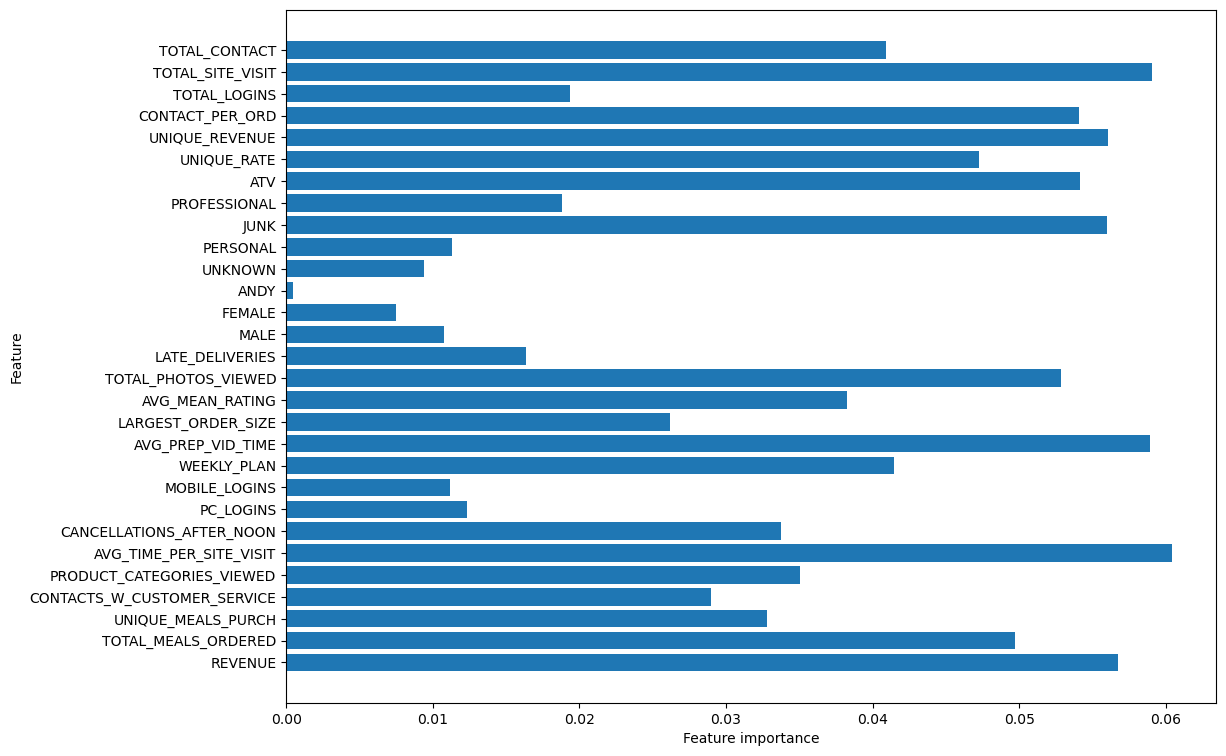

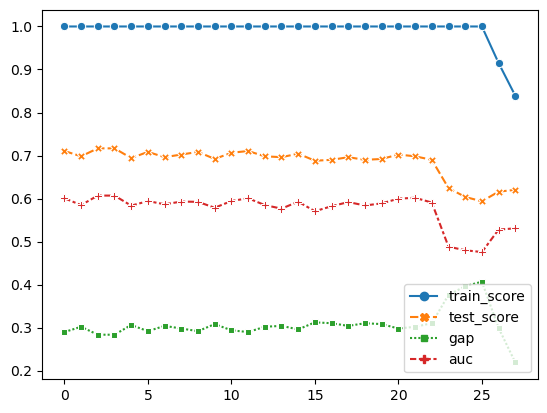

AUC Score Change
0     0.600608
1     0.584766
2     0.606834
3     0.606834
4     0.583440
5     0.594014
6     0.586645
7     0.592871
8     0.592319
9     0.578540
10    0.594198
11    0.600608
12    0.584766
13    0.576478
14    0.592687
15    0.570435
16    0.582113
17    0.591729
18    0.583808
19    0.588707
20    0.599649
21    0.601712
22    0.590586
23    0.488022
24    0.479694
25    0.475531
26    0.527733
27    0.530754
Name: auc, dtype: float64

Best Auc Features:
['MALE', 'MOBILE_LOGINS', 'PERSONAL', 'PC_LOGINS', 'LATE_DELIVERIES', 'PROFESSIONAL', 'TOTAL_LOGINS', 'LARGEST_ORDER_SIZE', 'CONTACTS_W_CUSTOMER_SERVICE', 'UNIQUE_MEALS_PURCH', 'CANCELLATIONS_AFTER_NOON', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_MEAN_RATING', 'TOTAL_CONTACT', 'WEEKLY_PLAN', 'UNIQUE_RATE', 'TOTAL_MEALS_ORDERED', 'TOTAL_PHOTOS_VIEWED', 'CONTACT_PER_ORD', 'ATV', 'JUNK', 'UNIQUE_REVENUE', 'REVENUE', 'AVG_PREP_VID_TIME', 'TOTAL_SITE_VISIT', 'AVG_TIME_PER_SITE_VISIT']


In [28]:
# Original Scaled Random Forest
# Run on Default Model
model = RandomForestClassifier(random_state=219)
model.fit(x_train, y_train)
model_pred = model.predict(x_test)
train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)
gap = abs(test_score - train_score)
auc = roc_auc_score(y_true=y_test, y_score=model_pred)
print(f"""
Train Score    : {train_score.round(4)}
Test Score     : {test_score.round(4)}
Train-Test Gap : {gap.round(4)}
AUC Score      : {auc.round(4)}

Confusion Matrix
====================
""")
print(confusion_matrix(y_true=y_test, y_pred=model_pred))

model_tn, \
model_fp, \
model_fn, \
model_tp = confusion_matrix(y_true = y_test, y_pred = model_pred).ravel()

print(f"""
True Negatives : {model_tn}
False Positives: {model_fp}
False Negatives: {model_fn}
True Positives : {model_tp}
""")
# Check feature importances Chart
plot_feature_importances(model, x_train, export = False)
# Check importance changes when run with Backward Stepping
importanceBasedBackward(model, x_train, x_test, y_train, y_test, 1)


Train Score    : 1.0
Test Score     : 0.7187
Train-Test Gap : 0.2813
AUC Score      : 0.6067

Confusion Matrix

[[ 46 110]
 [ 27 304]]

True Negatives : 46
False Positives: 110
False Negatives: 27
True Positives : 304



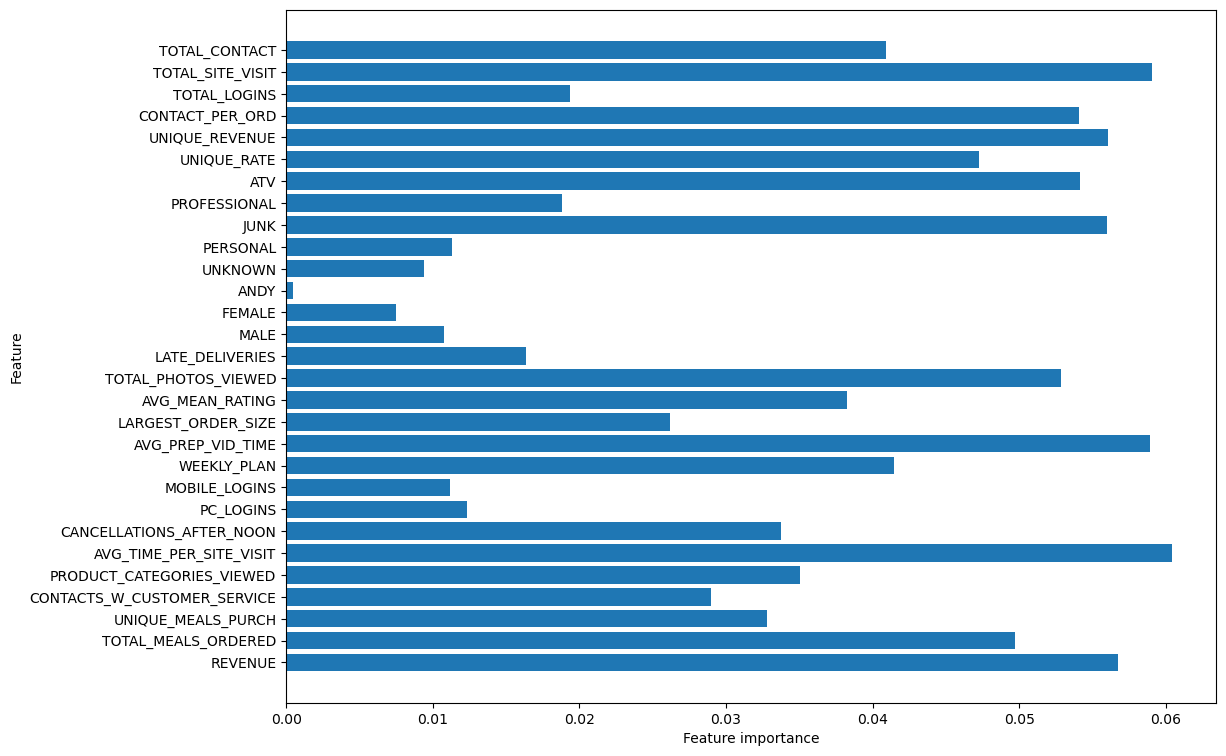

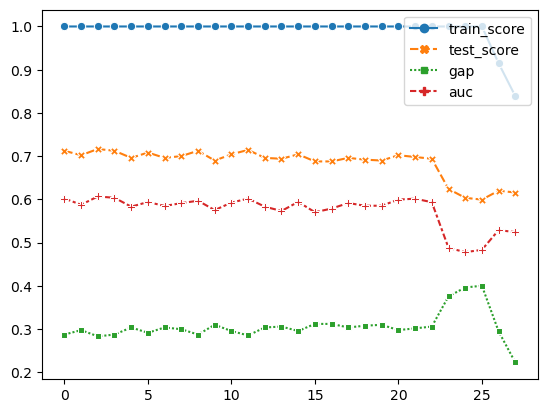

AUC Score Change
0     0.602119
1     0.587788
2     0.606834
3     0.603813
4     0.583256
5     0.594014
6     0.584950
7     0.591361
8     0.597035
9     0.575335
10    0.592687
11    0.601935
12    0.583256
13    0.573273
14    0.594382
15    0.570435
16    0.578908
17    0.591729
18    0.585318
19    0.585502
20    0.599649
21    0.601712
22    0.593607
23    0.488022
24    0.478000
25    0.483451
26    0.529059
27    0.524343
Name: auc, dtype: float64

Best Auc Features:
['MALE', 'MOBILE_LOGINS', 'PERSONAL', 'PC_LOGINS', 'LATE_DELIVERIES', 'PROFESSIONAL', 'TOTAL_LOGINS', 'LARGEST_ORDER_SIZE', 'CONTACTS_W_CUSTOMER_SERVICE', 'UNIQUE_MEALS_PURCH', 'CANCELLATIONS_AFTER_NOON', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_MEAN_RATING', 'TOTAL_CONTACT', 'WEEKLY_PLAN', 'UNIQUE_RATE', 'TOTAL_MEALS_ORDERED', 'TOTAL_PHOTOS_VIEWED', 'CONTACT_PER_ORD', 'ATV', 'JUNK', 'UNIQUE_REVENUE', 'REVENUE', 'AVG_PREP_VID_TIME', 'TOTAL_SITE_VISIT', 'AVG_TIME_PER_SITE_VISIT']


In [29]:
# Standard Scaled Random Forest
# Run on Default Model
model = RandomForestClassifier(random_state=219)
model.fit(x_train_scaled, y_train_scaled)
model_pred = model.predict(x_test_scaled)
train_score = model.score(x_train_scaled, y_train_scaled)
test_score = model.score(x_test_scaled, y_test_scaled)
gap = abs(test_score - train_score)
auc = roc_auc_score(y_true=y_test_scaled, y_score=model_pred)
print(f"""
Train Score    : {train_score.round(4)}
Test Score     : {test_score.round(4)}
Train-Test Gap : {gap.round(4)}
AUC Score      : {auc.round(4)}

Confusion Matrix
====================
""")
print(confusion_matrix(y_true=y_test_scaled, y_pred=model_pred))

model_tn, \
model_fp, \
model_fn, \
model_tp = confusion_matrix(y_true = y_test_scaled, y_pred = model_pred).ravel()

print(f"""
True Negatives : {model_tn}
False Positives: {model_fp}
False Negatives: {model_fn}
True Positives : {model_tp}
""")
# Check feature importances Chart
plot_feature_importances(model, x_train_scaled, export = False)
# Check importance changes when run with Backward Stepping
importanceBasedBackward(model, x_train_scaled, x_test_scaled, y_train, y_test, 1)

### Gradient Boosting Classifier Model


Train Score    : 0.8108
Test Score     : 0.7166
Train-Test Gap : 0.0942
AUC Score      : 0.6153

Confusion Matrix

[[ 52 104]
 [ 34 297]]

True Negatives : 52
False Positives: 104
False Negatives: 34
True Positives : 297



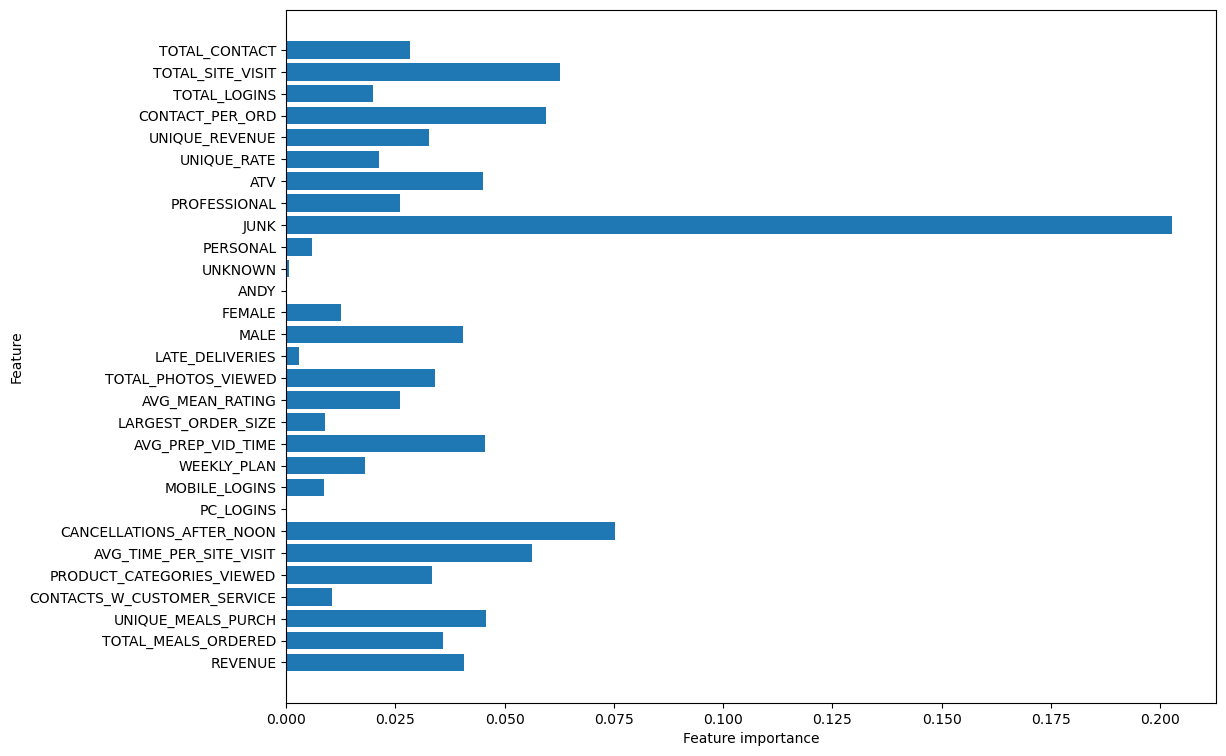

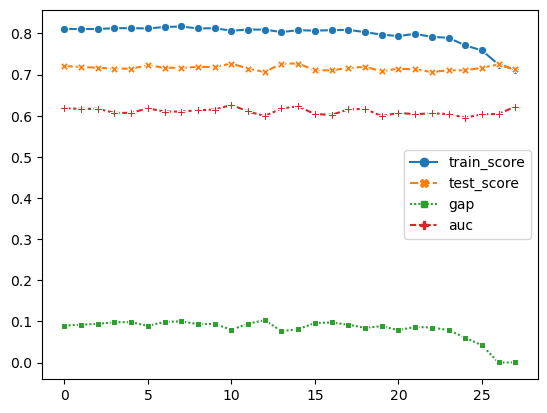

AUC Score Change
0     0.618328
1     0.616818
2     0.617002
3     0.607018
4     0.607018
5     0.618144
6     0.610223
7     0.610223
8     0.613429
9     0.615123
10    0.626249
11    0.610407
12    0.599282
13    0.617776
14    0.622860
15    0.603997
16    0.602303
17    0.615307
18    0.616818
19    0.599098
20    0.607018
21    0.603813
22    0.606060
23    0.603997
24    0.595524
25    0.603445
26    0.604404
27    0.622453
Name: auc, dtype: float64

Best Auc Features:
['UNIQUE_RATE', 'PROFESSIONAL', 'AVG_MEAN_RATING', 'TOTAL_CONTACT', 'UNIQUE_REVENUE', 'PRODUCT_CATEGORIES_VIEWED', 'TOTAL_PHOTOS_VIEWED', 'TOTAL_MEALS_ORDERED', 'MALE', 'REVENUE', 'ATV', 'AVG_PREP_VID_TIME', 'UNIQUE_MEALS_PURCH', 'AVG_TIME_PER_SITE_VISIT', 'CONTACT_PER_ORD', 'TOTAL_SITE_VISIT', 'CANCELLATIONS_AFTER_NOON', 'JUNK']


In [30]:
# Original Scaled GradientBoostingClassifier
# Run on Default Model
model = GradientBoostingClassifier()
model.fit(x_train, y_train)
model_pred = model.predict(x_test)
train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)
gap = abs(test_score - train_score)
auc = roc_auc_score(y_true=y_test, y_score=model_pred)
print(f"""
Train Score    : {train_score.round(4)}
Test Score     : {test_score.round(4)}
Train-Test Gap : {gap.round(4)}
AUC Score      : {auc.round(4)}

Confusion Matrix
====================
""")
print(confusion_matrix(y_true=y_test, y_pred=model_pred))

model_tn, \
model_fp, \
model_fn, \
model_tp = confusion_matrix(y_true = y_test, y_pred = model_pred).ravel()

print(f"""
True Negatives : {model_tn}
False Positives: {model_fp}
False Negatives: {model_fn}
True Positives : {model_tp}
""")
# Check feature importances Chart
plot_feature_importances(model, x_train, export = False)
# Check importance changes when run with Backward Stepping
importanceBasedBackward(model, x_train, x_test, y_train, y_test, 1)


Train Score    : 0.8108
Test Score     : 0.7166
Train-Test Gap : 0.0942
AUC Score      : 0.6153

Confusion Matrix

[[ 52 104]
 [ 34 297]]

True Negatives : 52
False Positives: 104
False Negatives: 34
True Positives : 297



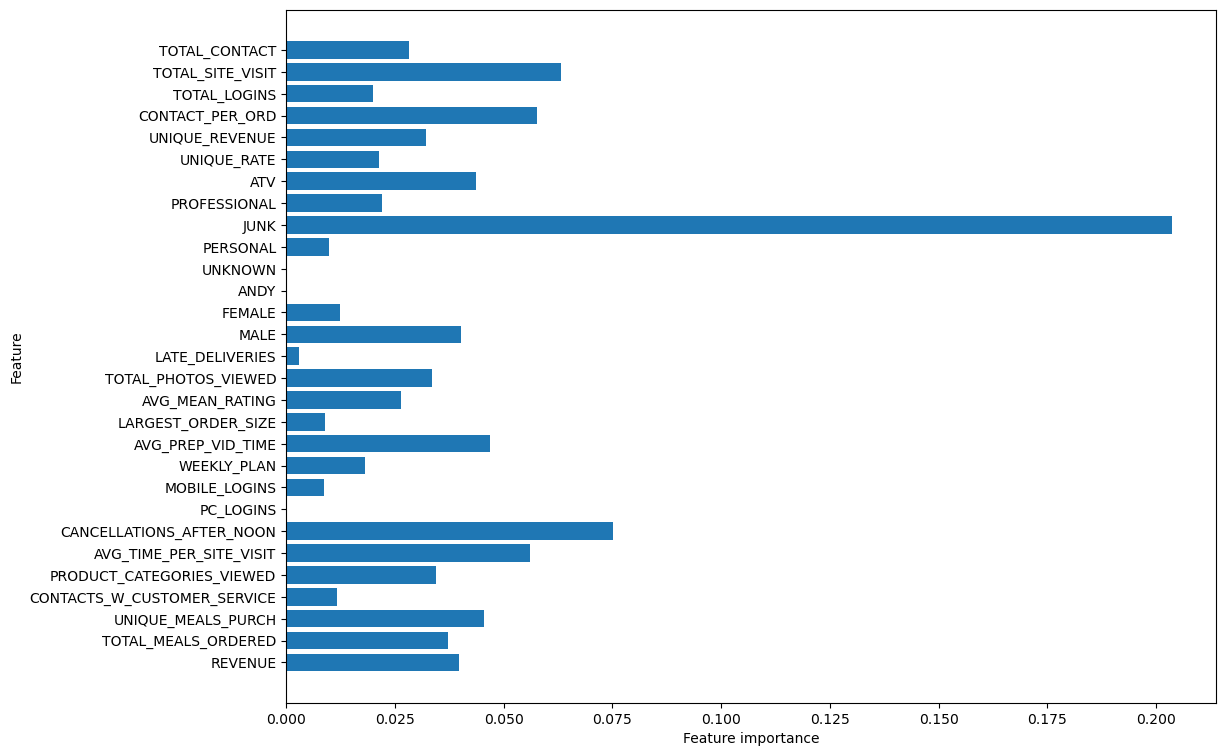

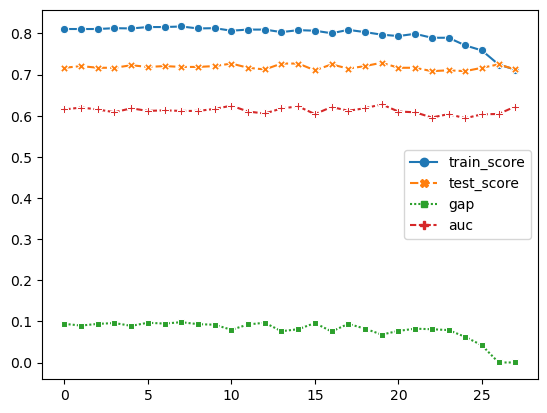

AUC Score Change
0     0.615307
1     0.620023
2     0.615307
3     0.608529
4     0.618144
5     0.611734
6     0.613245
7     0.611734
8     0.611734
9     0.616634
10    0.624555
11    0.610223
12    0.605508
13    0.617776
14    0.622860
15    0.603997
16    0.621349
17    0.612102
18    0.618328
19    0.627760
20    0.610223
21    0.608529
22    0.595708
23    0.603997
24    0.594014
25    0.603445
26    0.604404
27    0.622453
Name: auc, dtype: float64

Best Auc Features:
['MALE', 'ATV', 'UNIQUE_MEALS_PURCH', 'AVG_PREP_VID_TIME', 'AVG_TIME_PER_SITE_VISIT', 'CONTACT_PER_ORD', 'TOTAL_SITE_VISIT', 'CANCELLATIONS_AFTER_NOON', 'JUNK']


In [31]:
# Standard Scaled GradientBoostingClassifier
# Run on Default Model
model = GradientBoostingClassifier()
model.fit(x_train_scaled, y_train_scaled)
model_pred = model.predict(x_test_scaled)
train_score = model.score(x_train_scaled, y_train_scaled)
test_score = model.score(x_test_scaled, y_test_scaled)
gap = abs(test_score - train_score)
auc = roc_auc_score(y_true=y_test_scaled, y_score=model_pred)
print(f"""
Train Score    : {train_score.round(4)}
Test Score     : {test_score.round(4)}
Train-Test Gap : {gap.round(4)}
AUC Score      : {auc.round(4)}

Confusion Matrix
====================
""")
print(confusion_matrix(y_true=y_test_scaled, y_pred=model_pred))

model_tn, \
model_fp, \
model_fn, \
model_tp = confusion_matrix(y_true = y_test_scaled, y_pred = model_pred).ravel()

print(f"""
True Negatives : {model_tn}
False Positives: {model_fp}
False Negatives: {model_fn}
True Positives : {model_tp}
""")
# Check feature importances Chart
plot_feature_importances(model, x_train_scaled, export = False)
# Check importance changes when run with Backward Stepping
importanceBasedBackward(model, x_train_scaled, x_test_scaled, y_train, y_test, 1)

### Logistic Regression Model

In [32]:
# Original Scaled Logistic Regression
# Run on Default Model
model = LogisticRegression()
model.fit(x_train, y_train)
model_pred = model.predict(x_test)
train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)
gap = abs(test_score - train_score)
auc = roc_auc_score(y_true=y_test, y_score=model_pred)
print(f"""
Training ACCURACY    : {train_score.round(4)}
Testing  ACCURACY    : {test_score.round(4)}
Train-Test GAP       : {gap.round(4)}
AUC Score            : {auc.round(4)}

Confusion Matrix
====================
""")
print(confusion_matrix(y_true=y_test, y_pred=model_pred))

model_tn, \
model_fp, \
model_fn, \
model_tp = confusion_matrix(y_true = y_test, y_pred = model_pred).ravel()

print(f"""
True Negatives : {model_tn}
False Positives: {model_fp}
False Negatives: {model_fn}
True Positives : {model_tp}
""")


Training ACCURACY    : 0.684
Testing  ACCURACY    : 0.6591
Train-Test GAP       : 0.0249
AUC Score            : 0.4934

Confusion Matrix

[[  5 151]
 [ 15 316]]

True Negatives : 5
False Positives: 151
False Negatives: 15
True Positives : 316



C:\Users\yunsi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
# Standard Scaled Logistic Regression
# Run on Default Model
model = LogisticRegression()
model.fit(x_train_scaled, y_train_scaled)
model_pred = model.predict(x_test_scaled)
train_score = model.score(x_train_scaled, y_train_scaled)
test_score = model.score(x_test_scaled, y_test_scaled)
gap = abs(test_score - train_score)
auc = roc_auc_score(y_true=y_test_scaled, y_score=model_pred)
print(f"""
Training ACCURACY    : {train_score.round(4)}
Testing  ACCURACY    : {test_score.round(4)}
Train-Test GAP       : {gap.round(4)}
AUC Score            : {auc.round(4)}

Confusion Matrix
====================
""")
print(confusion_matrix(y_true=y_test_scaled, y_pred=model_pred))

model_tn, \
model_fp, \
model_fn, \
model_tp = confusion_matrix(y_true = y_test_scaled, y_pred = model_pred).ravel()

print(f"""
True Negatives : {model_tn}
False Positives: {model_fp}
False Negatives: {model_fn}
True Positives : {model_tp}
""")


Training ACCURACY    : 0.7354
Testing  ACCURACY    : 0.7125
Train-Test GAP       : 0.0229
AUC Score            : 0.6089

Confusion Matrix

[[ 50 106]
 [ 34 297]]

True Negatives : 50
False Positives: 106
False Negatives: 34
True Positives : 297



### K-Neighborhood Classifier Model


Training ACCURACY    : 0.6854
Testing  ACCURACY    : 0.655
Train-Test GAP       : 0.0304
AUC Score            : 0.4971

Confusion Matrix

[[  9 147]
 [ 21 310]]

True Negatives : 9
False Positives: 147
False Negatives: 21
True Positives : 310



C:\Users\yunsi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\yunsi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

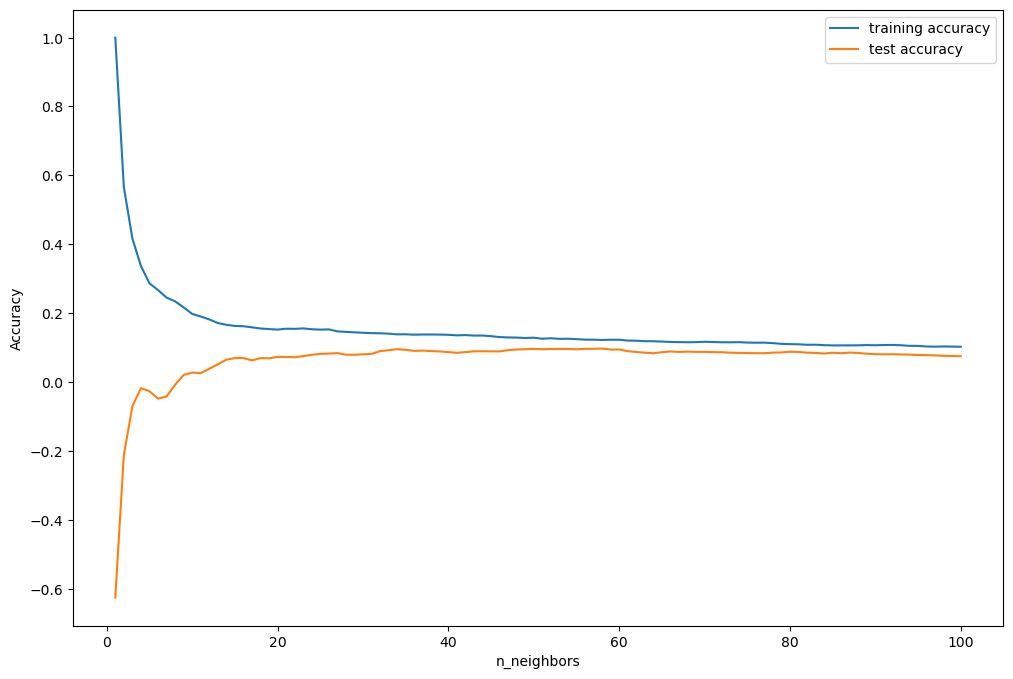

The optimal number of neighbors is: 58


58

In [34]:
# Original Scaled K-Neighborhood Classifier
# Run on Default Model
model = KNeighborsClassifier(n_neighbors=17)
model.fit(x_train, y_train)
model_pred = model.predict(x_test)
train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)
gap = abs(test_score - train_score)
auc = roc_auc_score(y_true=y_test, y_score=model_pred)
print(f"""
Training ACCURACY    : {train_score.round(4)}
Testing  ACCURACY    : {test_score.round(4)}
Train-Test GAP       : {gap.round(4)}
AUC Score            : {auc.round(4)}

Confusion Matrix
====================
""")
print(confusion_matrix(y_true=y_test, y_pred=model_pred))

model_tn, \
model_fp, \
model_fn, \
model_tp = confusion_matrix(y_true = y_test, y_pred = model_pred).ravel()

print(f"""
True Negatives : {model_tn}
False Positives: {model_fp}
False Negatives: {model_fn}
True Positives : {model_tp}
""")
optimal_neighbors(x_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=219,
                      response_type='reg',
                      max_neighbors=100,
                      show_viz=True)


Training ACCURACY    : 0.7382
Testing  ACCURACY    : 0.7023
Train-Test GAP       : 0.0359
AUC Score            : 0.581

Confusion Matrix

[[ 38 118]
 [ 27 304]]

True Negatives : 38
False Positives: 118
False Negatives: 27
True Positives : 304



C:\Users\yunsi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\yunsi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

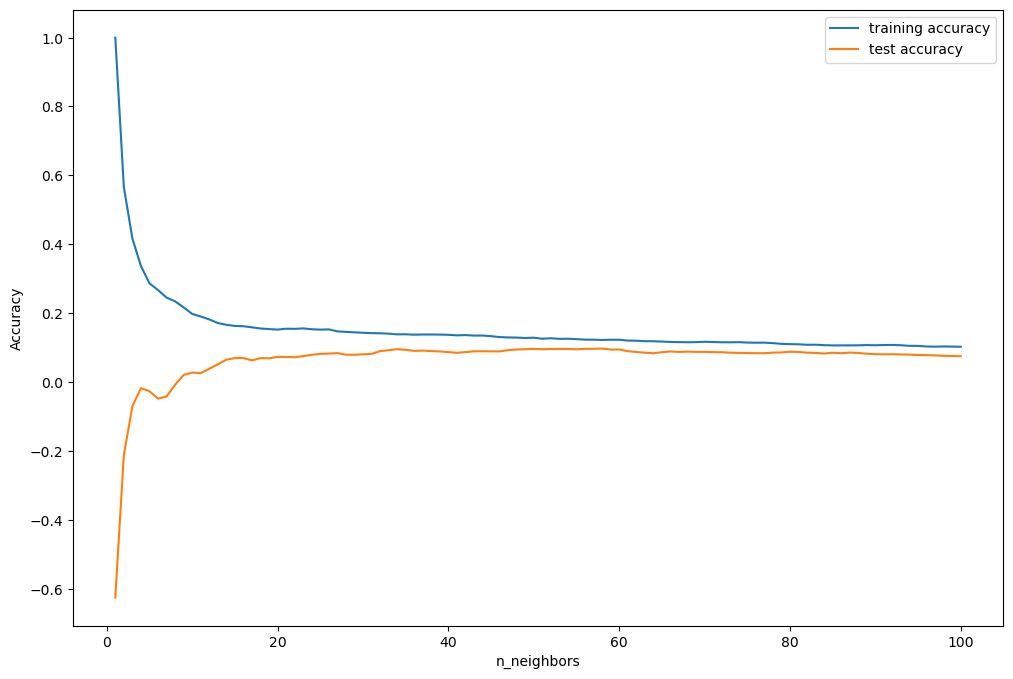

The optimal number of neighbors is: 58


58

In [35]:
# Standard Scaled K-Neighborhood Classifier
# Run on Default Model
model = KNeighborsClassifier(n_neighbors=17)
model.fit(x_train_scaled, y_train_scaled)
model_pred = model.predict(x_test_scaled)
train_score = model.score(x_train_scaled, y_train_scaled)
test_score = model.score(x_test_scaled, y_test_scaled)
gap = abs(test_score - train_score)
auc = roc_auc_score(y_true=y_test_scaled, y_score=model_pred)
print(f"""
Training ACCURACY    : {train_score.round(4)}
Testing  ACCURACY    : {test_score.round(4)}
Train-Test GAP       : {gap.round(4)}
AUC Score            : {auc.round(4)}

Confusion Matrix
====================
""")
print(confusion_matrix(y_true=y_test_scaled, y_pred=model_pred))

model_tn, \
model_fp, \
model_fn, \
model_tp = confusion_matrix(y_true = y_test_scaled, y_pred = model_pred).ravel()

print(f"""
True Negatives : {model_tn}
False Positives: {model_fp}
False Negatives: {model_fn}
True Positives : {model_tp}
""")
optimal_neighbors(x_scaled_df,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=219,
                      response_type='reg',
                      max_neighbors=100,
                      show_viz=True)

### Decision Tree Classifier


Training ACCURACY    : 1.0
Testing  ACCURACY    : 0.5893
Train-Test GAP       : 0.4107
AUC Score            : 0.542

Confusion Matrix

[[ 64  92]
 [108 223]]

True Negatives : 64
False Positives: 92
False Negatives: 108
True Positives : 223



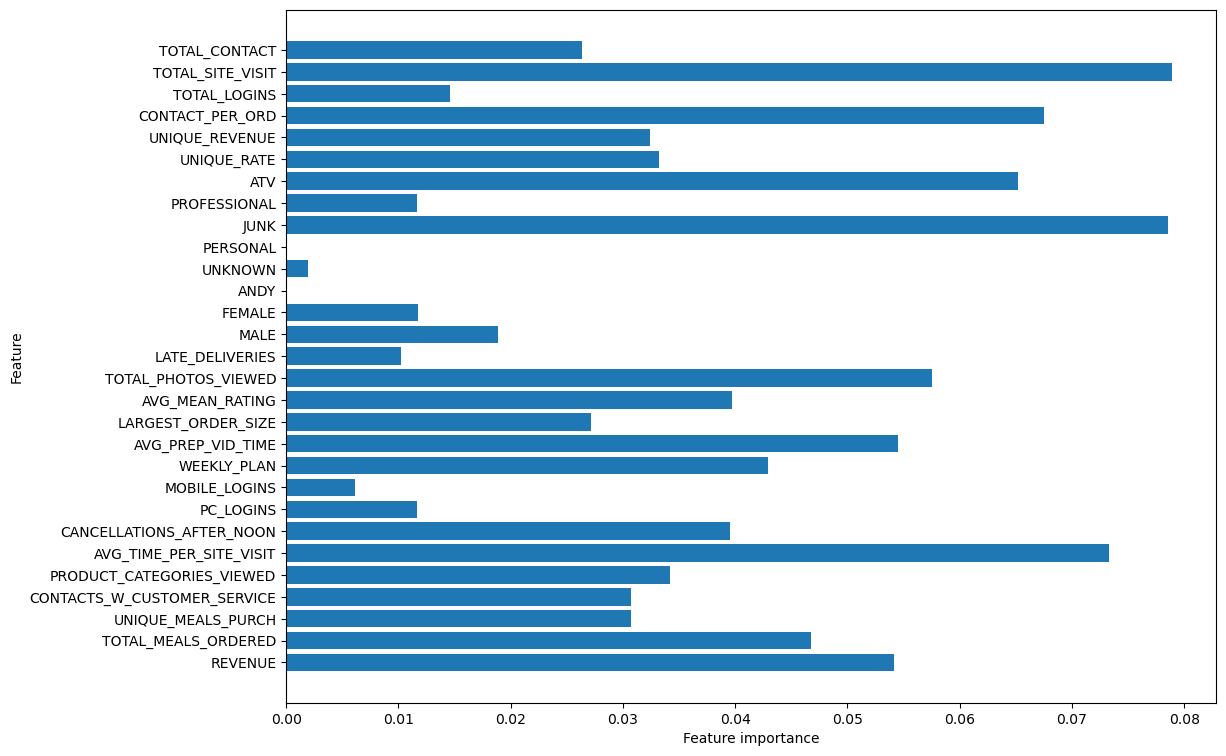

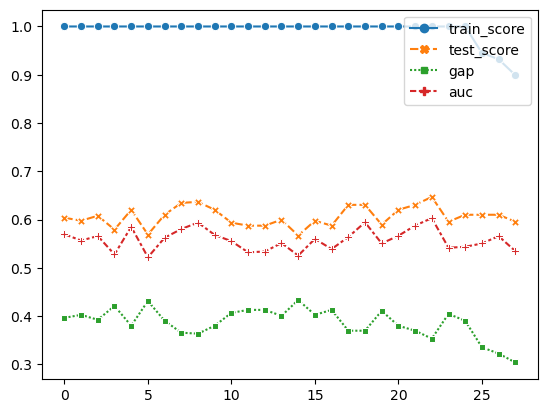

AUC Score Change
0     0.569506
1     0.556501
2     0.565749
3     0.527655
4     0.584979
5     0.521797
6     0.562176
7     0.580303
8     0.593675
9     0.568034
10    0.555175
11    0.532003
12    0.533697
13    0.551234
14    0.525370
15    0.559890
16    0.538781
17    0.563725
18    0.594227
19    0.550459
20    0.566339
21    0.587449
22    0.602922
23    0.541434
24    0.543536
25    0.550314
26    0.565565
27    0.534656
Name: auc, dtype: float64

Best Auc Features:
['TOTAL_PHOTOS_VIEWED', 'ATV', 'CONTACT_PER_ORD', 'AVG_TIME_PER_SITE_VISIT', 'JUNK', 'TOTAL_SITE_VISIT']


In [36]:
# Original Scaled Decision Tree Classifier
# Run on Default Model
model = DecisionTreeClassifier(random_state=219)
model.fit(x_train, y_train)
model_pred = model.predict(x_test)
train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)
gap = abs(test_score - train_score)
auc = roc_auc_score(y_true=y_test, y_score=model_pred)
print(f"""
Training ACCURACY    : {train_score.round(4)}
Testing  ACCURACY    : {test_score.round(4)}
Train-Test GAP       : {gap.round(4)}
AUC Score            : {auc.round(4)}

Confusion Matrix
====================
""")
print(confusion_matrix(y_true=y_test, y_pred=model_pred))

model_tn, \
model_fp, \
model_fn, \
model_tp = confusion_matrix(y_true = y_test, y_pred = model_pred).ravel()

print(f"""
True Negatives : {model_tn}
False Positives: {model_fp}
False Negatives: {model_fn}
True Positives : {model_tp}
""")
# Check feature importances Chart
plot_feature_importances(model, x_train, export = False)
# Check importance changes when run with Backward Stepping
importanceBasedBackward(model, x_train, x_test, y_train, y_test, 1)


Training ACCURACY    : 1.0
Testing  ACCURACY    : 0.5914
Train-Test GAP       : 0.4086
AUC Score            : 0.5452

Confusion Matrix

[[ 65  91]
 [108 223]]

True Negatives : 65
False Positives: 91
False Negatives: 108
True Positives : 223



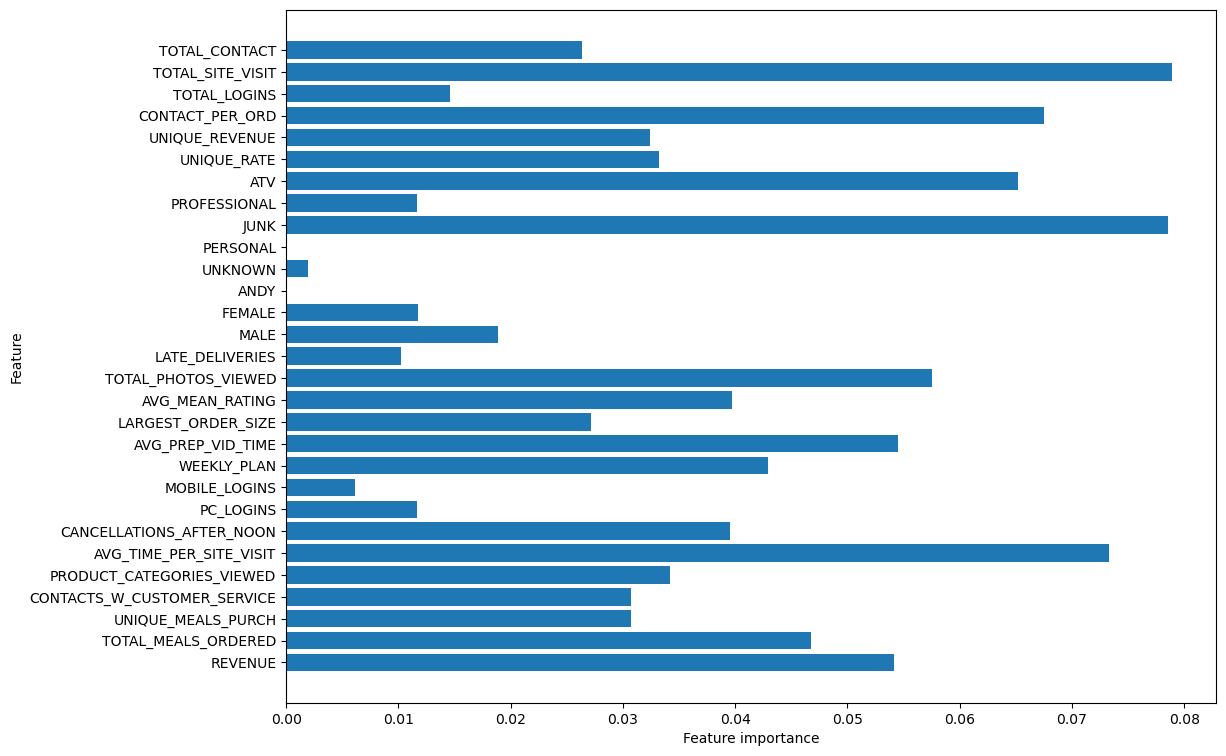

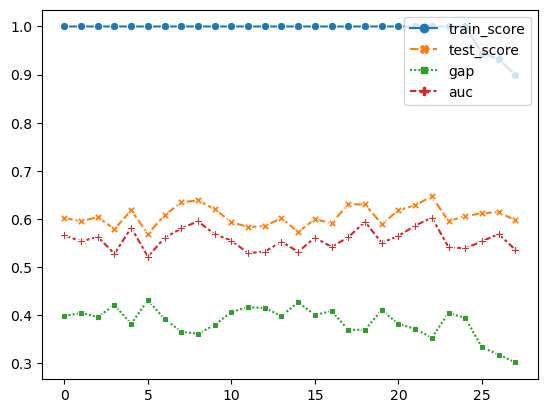

AUC Score Change
0     0.566301
1     0.553296
2     0.562728
3     0.527655
4     0.581774
5     0.521797
6     0.560665
7     0.580303
8     0.595186
9     0.568034
10    0.555175
11    0.528982
12    0.532187
13    0.552744
14    0.531596
15    0.561401
16    0.541802
17    0.562030
18    0.594227
19    0.550459
20    0.564829
21    0.585938
22    0.602922
23    0.541434
24    0.538820
25    0.553519
26    0.568586
27    0.536167
Name: auc, dtype: float64

Best Auc Features:
['TOTAL_PHOTOS_VIEWED', 'ATV', 'CONTACT_PER_ORD', 'AVG_TIME_PER_SITE_VISIT', 'JUNK', 'TOTAL_SITE_VISIT']


In [37]:
# Standard Scaled Decision Tree Classifier
# Run on Default Model
model = DecisionTreeClassifier(random_state=219)
model.fit(x_train_scaled, y_train_scaled)
model_pred = model.predict(x_test_scaled)
train_score = model.score(x_train_scaled, y_train_scaled)
test_score = model.score(x_test_scaled, y_test_scaled)
gap = abs(test_score - train_score)
auc = roc_auc_score(y_true=y_test_scaled, y_score=model_pred)
print(f"""
Training ACCURACY    : {train_score.round(4)}
Testing  ACCURACY    : {test_score.round(4)}
Train-Test GAP       : {gap.round(4)}
AUC Score            : {auc.round(4)}

Confusion Matrix
====================
""")
print(confusion_matrix(y_true=y_test_scaled, y_pred=model_pred))

model_tn, \
model_fp, \
model_fn, \
model_tp = confusion_matrix(y_true = y_test_scaled, y_pred = model_pred).ravel()

print(f"""
True Negatives : {model_tn}
False Positives: {model_fp}
False Negatives: {model_fn}
True Positives : {model_tp}
""")
# Check feature importances Chart
plot_feature_importances(model, x_train_scaled, export = False)
# Check importance changes when run with Backward Stepping
importanceBasedBackward(model, x_train_scaled, x_test_scaled, y_train, y_test, 1)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

# Finalized Model
## Feature Selection
Check High Correlation Variables and build Sub Feature groups. And run with logistic Regression model for checking P-Values.

In [38]:
# Store Correlation Result
corr_result = df.corr().sort_values(by='CROSS_SELL_SUCCESS', ascending=False)
# Decalre Has high correlation columns list, based on columns which has greater than absolute 0.05 correlation with target.
high_corr_cols = corr_result[corr_result['CROSS_SELL_SUCCESS'].apply('abs') > 0.05].index.to_list()
# Check columns
print(high_corr_cols)

['CROSS_SELL_SUCCESS', 'PROFESSIONAL', 'CANCELLATIONS_AFTER_NOON', 'MALE', 'TOTAL_LOGINS', 'TOTAL_CONTACT', 'MOBILE_LOGINS', 'TOTAL_SITE_VISIT', 'FEMALE', 'UNKNOWN', 'JUNK']


In [39]:
# Sub Data set for Logistic Regression
high_corr_data = df[high_corr_cols]

In [40]:
for val in high_corr_data:
    print(f" {val} + ")

 CROSS_SELL_SUCCESS + 
 PROFESSIONAL + 
 CANCELLATIONS_AFTER_NOON + 
 MALE + 
 TOTAL_LOGINS + 
 TOTAL_CONTACT + 
 MOBILE_LOGINS + 
 TOTAL_SITE_VISIT + 
 FEMALE + 
 UNKNOWN + 
 JUNK + 


 - Run logistic regression with high correlated features. 
 - This model can explain 10.6% of cross sell success. 
 - MOBILE_LOGINS also has over 0.05 correlation coefficient on cross sell success, but TOTAL_LOGINS includes MOBILE_LOGINS, so exclude from high correlated model.
 - Based on this result, I defined High_Correlated Features as high_corr

In [41]:
# instantiating a logistic regression model for high correlated features.
logistic_full = smf.logit(formula = """CROSS_SELL_SUCCESS ~  
    PROFESSIONAL +  
    CANCELLATIONS_AFTER_NOON + 
    MALE + 
    TOTAL_LOGINS + 
    TOTAL_CONTACT + 
    TOTAL_SITE_VISIT + 
    FEMALE + 
    UNKNOWN + 
    JUNK
 """,
 data    = high_corr_data)

# fitting the model object
results_full = logistic_full.fit()

# checking the results SUMMARY
results_full.summary2()

Optimization terminated successfully.
         Current function value: 0.561088
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
========================================================================
Model:                 Logit               Pseudo R-squared:  0.106     
Dependent Variable:    CROSS_SELL_SUCCESS  AIC:               2203.7541 
Date:                  2023-06-16 10:17    BIC:               2259.4894 
No. Observations:      1946                Log-Likelihood:    -1091.9   
Df Model:              9                   LL-Null:           -1221.6   
Df Residuals:          1936                LLR p-value:       1.0082e-50
Converged:             1.0000              Scale:             1.0000    
No. Iterations:        6.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
Intercept                -0.6901   0.8484 -0.8134 0.4160 -2.3529  0.9727
PROFESSIONAL              0.5477   0.1231  4.4510 0.0000  0.3065  0.7889
CANCELLATIONS_AFTER_NOON  0.2155   0.0382  5.6461 0.0000  0.1407  0.2904
MALE                      0.1124   0.6951  0.1617 0.8715 -1.2500  1.4749
TOTAL_LOGINS              0.1955   0.0725  2.6983 0.0070  0.0535  0.3375
TOTAL_CONTACT             0.0109   0.0115  0.9459 0.3442 -0.0117  0.0335
TOTAL_SITE_VISIT          0.0002   0.0002  1.1550 0.2481 -0.0001  0.0005
FEMALE                   -0.8262   0.7042 -1.1732 0.2407 -2.2064  0.5541
UNKNOWN                  -0.5433   0.6892 -0.7884 0.4305 -1.8940  0.8074
JUNK                     -1.2346   0.1317 -9.3766 0.0000 -1.4926 -0.9765
========================================================================

"""

## Finalized Features and Train-Test Set
 - Feature Candidate Dictionary has five keys, such as full, high_corr, rfr, gbm, and tree.
 - full: Full features for model.
 - high_corr: has High correlate coefficient greater than absolute 0.05 on target variable.
 - rfr: Has the highest AUC score combination of features set from default Random Forest Classifier Model.
 - gbm: Has the highest AUC score combination of features set from default Gradient Boosting Classifier Model.
 - tree: Has the highest AUC score combination of features set from default Decision Tree Classifier Model.
<br>

**However, Other feature candidates could not explain much better than high_corr features.**

In [42]:
# Featrue Candidates
x_candidate = {
    # Full Features for K-Neighborhoods
    'full': df._get_numeric_data().drop('CROSS_SELL_SUCCESS', axis=1).columns,
    # High correlation features for Logistic Regression
    'high_corr': df[high_corr_cols].drop(['CROSS_SELL_SUCCESS', 'MOBILE_LOGINS'], axis= 1).columns,
    # High importance features for Random Forest
    'rfr': [
        'MALE', 
        'MOBILE_LOGINS', 
        'PERSONAL', 
        'PC_LOGINS', 
        'LATE_DELIVERIES', 
        'PROFESSIONAL', 
        'TOTAL_LOGINS', 
        'LARGEST_ORDER_SIZE', 
        'CONTACTS_W_CUSTOMER_SERVICE', 
        'UNIQUE_MEALS_PURCH',
        'CANCELLATIONS_AFTER_NOON', 
        'PRODUCT_CATEGORIES_VIEWED', 
        'AVG_MEAN_RATING', 
        'TOTAL_CONTACT', 
        'WEEKLY_PLAN', 
        'UNIQUE_RATE', 
        'TOTAL_MEALS_ORDERED', 
        'TOTAL_PHOTOS_VIEWED', 
        'CONTACT_PER_ORD', 
        'ATV', 
        'JUNK', 
        'UNIQUE_REVENUE', 
        'REVENUE', 
        'AVG_PREP_VID_TIME',
        'TOTAL_SITE_VISIT', 
        'AVG_TIME_PER_SITE_VISIT'
    ],
    # High importance features for Gradient Boosting
    'gbm': [
        'MALE', 
        'UNIQUE_MEALS_PURCH', 
        'ATV', 
        'AVG_PREP_VID_TIME', 
        'AVG_TIME_PER_SITE_VISIT', 
        'CONTACT_PER_ORD', 
        'TOTAL_SITE_VISIT', 
        'CANCELLATIONS_AFTER_NOON', 
        'JUNK'
    ],
    # High importance features for Decision Tree
    'tree': [
        'TOTAL_PHOTOS_VIEWED', 
        'ATV', 
        'CONTACT_PER_ORD', 
        'AVG_TIME_PER_SITE_VISIT', 
        'JUNK', 
        'TOTAL_SITE_VISIT'
    ],
}
y_data = df['CROSS_SELL_SUCCESS']

## Hyper Parameter Tuning
 - Declare Result Set Data Frame: Store all models' performances and compare.

In [43]:
# Declare ResultSet
# {
#    'model_name': model_name, 'train_score': Train Model Score, 'test_score': Test Model Score, 'gap': Test-Train Gap, 
#    'auc': AUC Score, 'confusion_matrix': Confusion Matrix,   
# }
resultSet = []

### Random Forest Classifier

#### Feature Declaration

In [44]:
run_start = time.time()
curr_time = time.strftime("%H:%M:%S", time.localtime())
print(f"Random Forest Start: {curr_time}")

Random Forest Start: 10:17:36


In [45]:
# Compare with all x features candidates model's AUC Score
for key in x_candidate:
    x_data = df[x_candidate[key]]
    y_data = df['CROSS_SELL_SUCCESS']
    x_train, x_test, y_train, y_test = train_test_split(
        x_data, 
        y_data, 
        random_state=219, 
        test_size=0.25,
        stratify=y_data,
    )
    model = RandomForestClassifier(random_state=219)
    # Fit
    model.fit(x_train, y_train)
    # Model Predicted Value
    model_pred = model.predict(x_test)
    # Train Score
    train_score = model.score(x_train, y_train)
    # Test Score
    test_score = model.score(x_test, y_test)
    # Test-Train Gap
    gap = abs(test_score - train_score)
    auc = roc_auc_score(y_test, model_pred)
    print(f"""
    Candidate Name: {key}
    AUC: {auc}
    """)


    Candidate Name: full
    AUC: 0.6051398249283446
    

    Candidate Name: high_corr
    AUC: 0.614125803702843
    

    Candidate Name: rfr
    AUC: 0.6068343791153459
    

    Candidate Name: gbm
    AUC: 0.6198388721047332
    

    Candidate Name: tree
    AUC: 0.5740084437214346
    


In [46]:
x_data = df[x_candidate['high_corr']]
y_data = df['CROSS_SELL_SUCCESS']
x_train, x_test, y_train, y_test = train_test_split(
    x_data, 
    y_data, 
    random_state=219, 
    test_size=0.25,
    stratify=y_data,
)

# INSTANTIATING StandardScaler()
scaler = StandardScaler()

# FITTING the data
scaler.fit(x_data)

# TRANSFORMING the data
x_scaled     = scaler.transform(x_data)

# converting to a DataFrame
x_scaled_df  = pd.DataFrame(x_scaled, columns=x_data.columns) 

# train-test split with the scaled data
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            x_scaled_df,
            y_data,
            random_state = 219,
            test_size    = 0.25,
            stratify     = y_data)

#### Parameters to scan

In [47]:
# Set parameter range
# Actual parameters are actual record of total parameters, 
# Put only few parameters because of running time. 
params = {
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': 
        [23, 24, 26], 
        #range(15, 101, 1), # Actual 
    'n_estimators': 
        [93, 177], 
        #range(50, 451, 1),# Actual
    'max_depth': 
        [3, 4], 
        #range(1, 9, 1), # Actual
    'min_samples_split': 
        [7, 16],
        #range(2, 21, 1), # Actual
    'warm_start': [False, True],
}
complexity = calculateTotalComplexity(params)
print(f"Total Complexity: {complexity}")

Total Complexity: 96


#### Randomized Searching Cross-Validation

In [48]:
# RandomForestClassifier CV in Original Scaled X
tuned_model = RandomForestClassifier()

# Cross-Validating
model_cv = RandomizedSearchCV(
                    estimator=tuned_model,
                    param_distributions=params,
                    cv = 4,
                    scoring='roc_auc',
                    n_iter= 
                        10, 
                        #2000, # Actual
)
# Fit
model_cv.fit(x_data, y_data)

# Check best Params and score
print(model_cv.best_params_)
print(model_cv.best_score_)

{'warm_start': False, 'n_estimators': 93, 'min_samples_split': 16, 'min_samples_leaf': 24, 'max_depth': 3, 'criterion': 'entropy'}
0.7006122920444149


In [49]:
# RandomForestClassifier CV in Standaard Scaled X
tuned_model = RandomForestClassifier()

# Cross-Validating
model_cv_scaled = RandomizedSearchCV(
                    estimator=tuned_model,
                    param_distributions=params,
                    cv = 4,
                    scoring='roc_auc',
                    n_iter= 
                        10, 
                        #2000, # Actual
)

# Fit
model_cv_scaled.fit(x_scaled_df, y_data)

# Check best Params and score
print(model_cv_scaled.best_params_)
print(model_cv_scaled.best_score_)

{'warm_start': True, 'n_estimators': 177, 'min_samples_split': 7, 'min_samples_leaf': 24, 'max_depth': 3, 'criterion': 'gini'}
0.7003268587430171


**Original Scaled:**
{'warm_start': False, 'n_estimators': 93, 'min_samples_split': 7, 'min_samples_leaf': 24, 'max_depth': 3, 'criterion': 'entropy'}
<br>0.7025382214460137
<br>

**Standard Scaled:**
{'warm_start': True, 'n_estimators': 93, 'min_samples_split': 7, 'min_samples_leaf': 26, 'max_depth': 3, 'criterion': 'entropy'}
<br>0.7026425874249975

In [50]:
# Change best params from previous work. 
model_cv.best_params_ = {'warm_start': True, 'n_estimators': 177, 'min_samples_split': 16, 'min_samples_leaf': 23, 'max_depth': 3, 'criterion': 'gini'}
model_cv_scaled.best_params_ = {'warm_start': True, 'n_estimators': 93, 'min_samples_split': 7, 'min_samples_leaf': 26, 'max_depth': 3, 'criterion': 'entropy'}

#### Run Best Fitted Model

In [51]:
# Model Name
model_name = 'RandomForestClassifier with Original Scaled X'

# Model Declare with Best Params
model = RandomForestClassifier(
                            criterion=model_cv.best_params_['criterion'],
                            random_state=219,
                            min_samples_leaf=model_cv.best_params_['min_samples_leaf'], 
                            n_estimators = model_cv.best_params_['n_estimators'],
                            max_depth=model_cv.best_params_['max_depth'],
                            min_samples_split=model_cv.best_params_['min_samples_split'],
                            warm_start=model_cv.best_params_['warm_start'],
                            )
# Fit
model.fit(x_train, y_train)
# Model Predicted Value
model_pred = model.predict(x_test)
# Train Score
train_score = model.score(x_train, y_train)
# Test Score
test_score = model.score(x_test, y_test)
# Test-Train Gap
gap = abs(test_score - train_score)

# Calculating and searching for best threshold
threshold = mostFittedThreshold(y_test, model.predict_proba(x_test))

# Searched AUC Score
auc = threshold['AUC_SCORE']

# Printing Records
print(f"""
Train Score    : {train_score.round(4)}
Test Score     : {test_score.round(4)}
Train-Test Gap : {gap.round(4)}
AUC Score      : {auc.round(4)} - Threshold: {threshold['Threshold']}

Confusion Matrix
====================
""")
print(threshold['Confusion_matrix'])

model_tn, \
model_fp, \
model_fn, \
model_tp = threshold['Confusion_matrix'].ravel()

print(f"""
True Negatives : {model_tn}
False Positives: {model_fp}
False Negatives: {model_fn}
True Positives : {model_tp}
""")

# Store Result on Dictionary
result = {
    'model_name': model_name, 
    'train_score': train_score.round(4),
    'test_score': test_score.round(4), 
    'gap': gap.round(4), 
    'auc': auc.round(4), 
    'threshold': threshold['Threshold'],
    'confusion_matrix': threshold['Confusion_matrix'],   
 }
# Append to list
resultSet.append(result)


Train Score    : 0.7272
Test Score     : 0.7372
Train-Test Gap : 0.01
AUC Score      : 0.6892 - Threshold: 0.7

Confusion Matrix

[[109  47]
 [106 225]]

True Negatives : 109
False Positives: 47
False Negatives: 106
True Positives : 225



In [52]:
# Model Name
model_name = 'RandomForestClassifier with Standard Scaled X'

# Model Declare with Best Params
model = RandomForestClassifier(
                            criterion=model_cv_scaled.best_params_['criterion'],
                            random_state=219,
                            min_samples_leaf=model_cv_scaled.best_params_['min_samples_leaf'], 
                            n_estimators = model_cv_scaled.best_params_['n_estimators'],
                            max_depth=model_cv_scaled.best_params_['max_depth'],
                            min_samples_split=model_cv_scaled.best_params_['min_samples_split'],
                            warm_start=model_cv_scaled.best_params_['warm_start'],
                            )
# Fit
model.fit(x_train_scaled, y_train_scaled)
# Model Predicted Value
model_pred = model.predict(x_test_scaled)
# Train Score
train_score = model.score(x_train_scaled, y_train_scaled)
# Test Score
test_score = model.score(x_test_scaled, y_test_scaled)
# Test-Train Gap
gap = abs(test_score - train_score)

# Calculating and searching for best threshold
threshold = mostFittedThreshold(y_test_scaled, model.predict_proba(x_test_scaled))

# Searched AUC Score
auc = threshold['AUC_SCORE']

# Printing Records
print(f"""
Train Score    : {train_score.round(4)}
Test Score     : {test_score.round(4)}
Train-Test Gap : {gap.round(4)}
AUC Score      : {auc.round(4)} - Threshold: {threshold['Threshold']}

Confusion Matrix
====================
""")
print(threshold['Confusion_matrix'])

model_tn, \
model_fp, \
model_fn, \
model_tp = threshold['Confusion_matrix'].ravel()

print(f"""
True Negatives : {model_tn}
False Positives: {model_fp}
False Negatives: {model_fn}
True Positives : {model_tp}
""")

# Store Result on Dictionary
result = {
    'model_name': model_name, 
    'train_score': train_score.round(4),
    'test_score': test_score.round(4), 
    'gap': gap.round(4), 
    'auc': auc.round(4), 
    'threshold': threshold['Threshold'],
    'confusion_matrix': threshold['Confusion_matrix'],   
 }
# Append to list
resultSet.append(result)


Train Score    : 0.7258
Test Score     : 0.7351
Train-Test Gap : 0.0093
AUC Score      : 0.6923 - Threshold: 0.7

Confusion Matrix

[[109  47]
 [104 227]]

True Negatives : 109
False Positives: 47
False Negatives: 104
True Positives : 227



In [53]:
run_end = time.time()
curr_time = time.strftime("%H:%M:%S", time.localtime())
print(f"Random Forest End: {curr_time}")
runtime = run_end - run_start
print(f"Runtime: {round(runtime)} Sec")

Random Forest End: 10:17:59
Runtime: 23 Sec


### Gradient Boosting Classifier Model
#### Feature Declaration

In [54]:
run_start = time.time()
curr_time = time.strftime("%H:%M:%S", time.localtime())
print(f"GBM Start: {curr_time}")

GBM Start: 10:17:59


In [55]:
# Compare with all x features candidates model's AUC Score
for key in x_candidate:
    x_data = df[x_candidate[key]]
    y_data = df['CROSS_SELL_SUCCESS']
    x_train, x_test, y_train, y_test = train_test_split(
        x_data, 
        y_data, 
        random_state=219, 
        test_size=0.25,
        stratify=y_data,
    )
    model = GradientBoostingClassifier()
    # Fit
    model.fit(x_train, y_train)
    # Model Predicted Value
    model_pred = model.predict(x_test)
    # Train Score
    train_score = model.score(x_train, y_train)
    # Test Score
    test_score = model.score(x_test, y_test)
    # Test-Train Gap
    gap = abs(test_score - train_score)
    auc = roc_auc_score(y_test, model_pred)
    print(f"""
    Candidate Name: {key}
    AUC: {auc}
    """)


    Candidate Name: full
    AUC: 0.6153071500503524
    

    Candidate Name: high_corr
    AUC: 0.5945658068014563
    

    Candidate Name: rfr
    AUC: 0.6166337438996049
    

    Candidate Name: gbm
    AUC: 0.6277597025331164
    

    Candidate Name: tree
    AUC: 0.5773975520954373
    


In [56]:
x_data = df[x_candidate['high_corr']]
y_data = df['CROSS_SELL_SUCCESS']
x_train, x_test, y_train, y_test = train_test_split(
    x_data, 
    y_data, 
    random_state=219, 
    test_size=0.25,
    stratify=y_data,
)

#### Parameters to scan

In [57]:
# Set parameter range
# Actual parameters are actual record of total parameters, 
# Put only few parameters because of running time. 
params = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': 
            [0.15], 
            #[0.1, 0.15, 0.2, 0.25], # Actual
    'criterion': ['friedman_mse', 'squared_error'],
    'min_samples_leaf': 
            [276, 280], 
            #range(15, 301, 1), # Actual
    'n_estimators': 
            [304, 310],  
            #range(20, 351, 1), # Actual 
    'max_depth': 
            [1, 2, 3],
            #range(1, 9, 1), # Actual
    'min_samples_split': 
            [9, 10],
            #range(2, 51, 1), # Actual 
    'warm_start': [False, True],
}
complexity = calculateTotalComplexity(params)
print(f"Total Complexity: {complexity}")

Total Complexity: 192


####  Randomized Searching Cross-Validation

In [58]:
# Gradient Boosting Classifier CV in Original Scaled X
tuned_model = GradientBoostingClassifier()

# Cross-Validating
model_cv = RandomizedSearchCV(
                    estimator=tuned_model,
                    param_distributions=params,
                    cv = 4,
                    scoring='roc_auc',
                    n_iter= 
                        5,
                        #2000, # Actual
)
# Fit
model_cv.fit(x_data, y_data)

# Check best Params and score
print(model_cv.best_params_)
print(model_cv.best_score_)

{'warm_start': True, 'n_estimators': 310, 'min_samples_split': 10, 'min_samples_leaf': 280, 'max_depth': 1, 'loss': 'exponential', 'learning_rate': 0.15, 'criterion': 'squared_error'}
0.7011769214524088


{'warm_start': True, 'n_estimators': 304, 'min_samples_split': 9, 'min_samples_leaf': 276, 'max_depth': 1, 'loss': 'deviance', 'learning_rate': 0.15, 'criterion': 'squared_error'}
<br>0.7025402290537497

In [59]:
# Change best params from previous work. 
model_cv.best_params_ = {'warm_start': True, 'n_estimators': 303, 'min_samples_split': 7, 'min_samples_leaf': 268, 'max_depth': 1, 'loss': 'deviance', 'learning_rate': 0.2, 'criterion': 'squared_error'}

#### Run Best fitted Model

In [60]:
# Model Name
model_name = 'GradientBoostingClassifier with Original Scaled X'

# Model Declare with Best Params
model = GradientBoostingClassifier(
                            loss = model_cv.best_params_['loss'],
                            learning_rate = model_cv.best_params_['learning_rate'],
                            criterion=model_cv.best_params_['criterion'],
                            min_samples_leaf=model_cv.best_params_['min_samples_leaf'], 
                            n_estimators = model_cv.best_params_['n_estimators'],
                            max_depth=model_cv.best_params_['max_depth'],
                            min_samples_split=model_cv.best_params_['min_samples_split'],
                            warm_start= model_cv.best_params_['warm_start'],
                            )
# Fit
model.fit(x_train, y_train)
# Model Predicted Value
model_pred = model.predict(x_test)
# Train Score
train_score = model.score(x_train, y_train)
# Test Score
test_score = model.score(x_test, y_test)
# Test-Train Gap
gap = abs(test_score - train_score)

# Calculating and searching for best threshold
threshold = mostFittedThreshold(y_test, model.predict_proba(x_test))

# Searched AUC Score
auc = threshold['AUC_SCORE']

# Printing Records
print(f"""
Train Score    : {train_score.round(4)}
Test Score     : {test_score.round(4)}
Train-Test Gap : {gap.round(4)}
AUC Score      : {auc.round(4)} - Threshold: {threshold['Threshold']}

Confusion Matrix
====================
""")
print(threshold['Confusion_matrix'])

model_tn, \
model_fp, \
model_fn, \
model_tp = threshold['Confusion_matrix'].ravel()

print(f"""
True Negatives : {model_tn}
False Positives: {model_fp}
False Negatives: {model_fn}
True Positives : {model_tp}
""")

# Store Result on Dictionary
result = {
    'model_name': model_name, 
    'train_score': train_score.round(4),
    'test_score': test_score.round(4), 
    'gap': gap.round(4), 
    'auc': auc.round(4), 
    'threshold': threshold['Threshold'],
    'confusion_matrix': threshold['Confusion_matrix'],   
 }
# Append to list
resultSet.append(result)


Train Score    : 0.7306
Test Score     : 0.7331
Train-Test Gap : 0.0024
AUC Score      : 0.6879 - Threshold: 0.72

Confusion Matrix

[[118  38]
 [126 205]]

True Negatives : 118
False Positives: 38
False Negatives: 126
True Positives : 205



In [61]:
run_end = time.time()
curr_time = time.strftime("%H:%M:%S", time.localtime())
print(f"GBM End: {curr_time}")
runtime = run_end - run_start
print(f"Runtime: {round(runtime)} Sec")

GBM End: 10:18:08
Runtime: 9 Sec


### K-Neighborhood Classifier Model
#### Feature Declaration

In [62]:
run_start = time.time()
curr_time = time.strftime("%H:%M:%S", time.localtime())
print(f"KNN Start: {curr_time}")

KNN Start: 10:18:08


In [63]:
# Compare with all x features candidates model's AUC Score
for key in x_candidate:
    x_data = df[x_candidate[key]]
    y_data = df['CROSS_SELL_SUCCESS']
    x_train, x_test, y_train, y_test = train_test_split(
        x_data, 
        y_data, 
        random_state=219, 
        test_size=0.25,
        stratify=y_data,
    )
    model = KNeighborsClassifier(n_neighbors=38)
    # Fit
    model.fit(x_train, y_train)
    # Model Predicted Value
    model_pred = model.predict(x_test)
    # Train Score
    train_score = model.score(x_train, y_train)
    # Test Score
    test_score = model.score(x_test, y_test)
    # Test-Train Gap
    gap = abs(test_score - train_score)
    auc = roc_auc_score(y_test, model_pred)
    print(f"""
    Candidate Name: {key}
    AUC: {auc}
    """)


    Candidate Name: full
    AUC: 0.5001839801688744
    

    Candidate Name: high_corr
    AUC: 0.49565225811449376
    


C:\Users\yunsi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\yunsi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim


    Candidate Name: rfr
    AUC: 0.5001839801688744
    

    Candidate Name: gbm
    AUC: 0.49716283213262064
    

    Candidate Name: tree
    AUC: 0.5035730885428771
    


C:\Users\yunsi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\yunsi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [64]:
x_data = df[x_candidate['high_corr']]
y_data = df['CROSS_SELL_SUCCESS']
x_train, x_test, y_train, y_test = train_test_split(
    x_data, 
    y_data, 
    random_state=219, 
    test_size=0.25,
    stratify=y_data,
)

# INSTANTIATING StandardScaler()
scaler = StandardScaler()

# FITTING the data
scaler.fit(x_data)

# TRANSFORMING the data
x_scaled     = scaler.transform(x_data)

# converting to a DataFrame
x_scaled_df  = pd.DataFrame(x_scaled, columns=x_data.columns) 

# train-test split with the scaled data
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            x_scaled_df,
            y_data,
            random_state = 219,
            test_size    = 0.25,
            stratify     = y_data)

#### Parameters to scan

In [65]:
# Set parameter range 
params = {
    'n_neighbors': 
        [67, 141],
        #range(50, 151, 1), # Actual
    'weights': ['uniform', 'distance'],
    'leaf_size': 
        [5],
        #range(5, 101, 5), # Actual
}
complexity = calculateTotalComplexity(params)
print(f"Total Complexity: {complexity}")

Total Complexity: 4


#### Randomized Searching Cross-Validation

In [66]:
# K-Neighborhood Classifier CV in Original Scaled X
tuned_model = KNeighborsClassifier()

# Cross-Validating
model_cv = RandomizedSearchCV(
                    estimator=tuned_model,
                    param_distributions=params,
                    cv = 4,
                    random_state=219,
                    scoring='roc_auc',
                    n_iter= 
                        4,
                        #4000, # Actual
)
# Fit
model_cv.fit(x_data, y_data)

# Check best Params and score
print(model_cv.best_params_)
print(model_cv.best_score_)

{'weights': 'distance', 'n_neighbors': 141, 'leaf_size': 5}
0.5161465093187387


In [67]:
# K-Neighborhood Classifier CV in Standard Scaled X
tuned_model = KNeighborsClassifier()

# Cross-Validating
model_cv_scaled = RandomizedSearchCV(
                    estimator=tuned_model,
                    param_distributions=params,
                    cv = 4,
                    random_state=219,
                    scoring='roc_auc',
                    n_iter=
                        4,
                        #4000, # Actual
)
# Fit
model_cv_scaled.fit(x_scaled_df, y_data)

# Check best Params and score
print(model_cv_scaled.best_params_)
print(model_cv_scaled.best_score_)

{'weights': 'uniform', 'n_neighbors': 67, 'leaf_size': 5}
0.6914999186471948


**Original Scaled:**
{'weights': 'uniform', 'n_neighbors': 8, 'leaf_size': 59}
<br>0.5388521645770837
<br>

**Standard Scaled:**
{'weights': 'distance', 'n_neighbors': 246, 'leaf_size': 93}
<br>0.6841990346093911

In [68]:
# Change best params from previous work. 
model_cv.best_params_ =  {'weights': 'uniform', 'n_neighbors': 8, 'leaf_size': 30}
model_cv_scaled.best_params_ =  {'weights': 'uniform', 'n_neighbors': 143, 'leaf_size': 33}

#### Run Best fitted Model

In [69]:
# Model Name
model_name = 'K-Neighborhood Classifier with Original Scaled X'

# Model Declare with Best Params
model = KNeighborsClassifier(
                            n_neighbors = model_cv.best_params_['n_neighbors'],
                            weights = model_cv.best_params_['weights'],
                            leaf_size=model_cv.best_params_['leaf_size'],
                            )
# Fit
model.fit(x_train, y_train)
# Model Predicted Value
model_pred = model.predict(x_test)
# Train Score
train_score = model.score(x_train, y_train)
# Test Score
test_score = model.score(x_test, y_test)
# Test-Train Gap
gap = abs(test_score - train_score)

# Calculating and searching for best threshold
threshold = mostFittedThreshold(y_test, model.predict_proba(x_test))

# Searched AUC Score
auc = threshold['AUC_SCORE']

# Printing Records
print(f"""
Train Score    : {train_score.round(4)}
Test Score     : {test_score.round(4)}
Train-Test Gap : {gap.round(4)}
AUC Score      : {auc.round(4)} - Threshold: {threshold['Threshold']}

Confusion Matrix
====================
""")
print(threshold['Confusion_matrix'])

model_tn, \
model_fp, \
model_fn, \
model_tp = threshold['Confusion_matrix'].ravel()

print(f"""
True Negatives : {model_tn}
False Positives: {model_fp}
False Negatives: {model_fn}
True Positives : {model_tp}
""")

# Store Result on Dictionary
result = {
    'model_name': model_name, 
    'train_score': train_score.round(4),
    'test_score': test_score.round(4), 
    'gap': gap.round(4), 
    'auc': auc.round(4), 
    'threshold': threshold['Threshold'],
    'confusion_matrix': threshold['Confusion_matrix'],   
 }
# Append to list
resultSet.append(result)

C:\Users\yunsi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\yunsi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim


Train Score    : 0.7149
Test Score     : 0.5955
Train-Test Gap : 0.1194
AUC Score      : 0.5581 - Threshold: 0.63

Confusion Matrix

[[ 94  62]
 [161 170]]

True Negatives : 94
False Positives: 62
False Negatives: 161
True Positives : 170



In [70]:
# Model Name
model_name = 'K-Neighborhood Classifier with Standard Scaled X'

# Model Declare with Best Params
model = KNeighborsClassifier(
                            n_neighbors = model_cv_scaled.best_params_['n_neighbors'],
                            weights = model_cv_scaled.best_params_['weights'],
                            leaf_size=model_cv_scaled.best_params_['leaf_size'],
                            )
# Fit
model.fit(x_train_scaled, y_train_scaled)
# Model Predicted Value
model_pred = model.predict(x_test_scaled)
# Train Score
train_score = model.score(x_train_scaled, y_train_scaled)
# Test Score
test_score = model.score(x_test_scaled, y_test_scaled)
# Test-Train Gap
gap = abs(test_score - train_score)

# Calculating and searching for best threshold
threshold = mostFittedThreshold(y_test_scaled, model.predict_proba(x_test_scaled))

# Searched AUC Score
auc = threshold['AUC_SCORE']

# Printing Records
print(f"""
Train Score    : {train_score.round(4)}
Test Score     : {test_score.round(4)}
Train-Test Gap : {gap.round(4)}
AUC Score      : {auc.round(4)} - Threshold: {threshold['Threshold']}

Confusion Matrix
====================
""")
print(threshold['Confusion_matrix'])

model_tn, \
model_fp, \
model_fn, \
model_tp = threshold['Confusion_matrix'].ravel()

print(f"""
True Negatives : {model_tn}
False Positives: {model_fp}
False Negatives: {model_fn}
True Positives : {model_tp}
""")

# Store Result on Dictionary
result = {
    'model_name': model_name, 
    'train_score': train_score.round(4),
    'test_score': test_score.round(4), 
    'gap': gap.round(4), 
    'auc': auc.round(4), 
    'threshold': threshold['Threshold'],
    'confusion_matrix': threshold['Confusion_matrix'],   
 }
# Append to list
resultSet.append(result)

C:\Users\yunsi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\yunsi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim


Train Score    : 0.7197
Test Score     : 0.7228
Train-Test Gap : 0.0031
AUC Score      : 0.6771 - Threshold: 0.74

Confusion Matrix

[[125  31]
 [148 183]]

True Negatives : 125
False Positives: 31
False Negatives: 148
True Positives : 183



In [71]:
run_end = time.time()
curr_time = time.strftime("%H:%M:%S", time.localtime())
print(f"KNN End: {curr_time}")
runtime = run_end - run_start
print(f"Runtime: {round(runtime)} Sec")

KNN End: 10:18:17
Runtime: 9 Sec


### Decision Tree Classifier Model
#### Feature Declaration

In [72]:
run_start = time.time()
curr_time = time.strftime("%H:%M:%S", time.localtime())
print(f"Tree Start: {curr_time}")

Tree Start: 10:18:17


In [73]:
# Compare with all x features candidates model's AUC Score
for key in x_candidate:
    x_data = df[x_candidate[key]]
    y_data = df['CROSS_SELL_SUCCESS']
    x_train, x_test, y_train, y_test = train_test_split(
        x_data, 
        y_data, 
        random_state=219, 
        test_size=0.25,
        stratify=y_data,
    )
    model = DecisionTreeClassifier(random_state=219)
    # Fit
    model.fit(x_train, y_train)
    # Model Predicted Value
    model_pred = model.predict(x_test)
    # Train Score
    train_score = model.score(x_train, y_train)
    # Test Score
    test_score = model.score(x_test, y_test)
    # Test-Train Gap
    gap = abs(test_score - train_score)
    auc = roc_auc_score(y_test, model_pred)
    print(f"""
    Candidate Name: {key}
    AUC: {auc}
    """)


    Candidate Name: full
    AUC: 0.5419862111705013
    

    Candidate Name: high_corr
    AUC: 0.5987586180184368
    

    Candidate Name: rfr
    AUC: 0.5874486792160508
    

    Candidate Name: gbm
    AUC: 0.5553973971647688
    

    Candidate Name: tree
    AUC: 0.6029223797350685
    


In [74]:
x_data = df[x_candidate['high_corr']]
y_data = df['CROSS_SELL_SUCCESS']
x_train, x_test, y_train, y_test = train_test_split(
    x_data, 
    y_data, 
    random_state=219, 
    test_size=0.25,
    stratify=y_data,
)

# INSTANTIATING StandardScaler()
scaler = StandardScaler()

# FITTING the data
scaler.fit(x_data)

# TRANSFORMING the data
x_scaled     = scaler.transform(x_data)

# converting to a DataFrame
x_scaled_df  = pd.DataFrame(x_scaled, columns=x_data.columns) 

# train-test split with the scaled data
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            x_scaled_df,
            y_data,
            random_state = 219,
            test_size    = 0.25,
            stratify     = y_data)

#### Parameters to scan

In [75]:
# Set parameter range 
params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': 
            [8],
            #range(1, 9, 1), # Actual
    'min_samples_split': 
            [100, 102, 104], 
            #range(2, 151, 1), # Actual
    'min_samples_leaf': 
            [20, 25, 30],
            #range(5, 201, 1), # Actual
}
complexity = calculateTotalComplexity(params)
print(f"Total Complexity: {complexity}")

Total Complexity: 36


#### Randomized Searching Cross-Validation

In [76]:
# Decision Tree Classifier CV in Original Scaled X
tuned_model = DecisionTreeClassifier(random_state=219)

# Cross-Validating
model_cv = RandomizedSearchCV(
                    estimator=tuned_model,
                    param_distributions=params,
                    cv = 4,
                    scoring='roc_auc',
                    n_iter= 
                        10, 
                        #20000, # Actual
)
# Fit
model_cv.fit(x_data, y_data)

# Check best Params and score
print(model_cv.best_params_)
print(model_cv.best_score_)

{'splitter': 'random', 'min_samples_split': 102, 'min_samples_leaf': 20, 'max_depth': 8, 'criterion': 'entropy'}
0.6916335808314131


**Original Scaled:**
{'splitter': 'random', 'min_samples_split': 104, 'min_samples_leaf': 25, 'max_depth': 8, 'criterion': 'gini'}
<br>0.6939741055505025
<br>

In [77]:
# Change best params from previous work. 
model_cv.best_params_ = {'splitter': 'random', 'min_samples_split': 104, 'min_samples_leaf': 25, 'max_depth': 8, 'criterion': 'gini'}

#### Run Best fitted Model

In [78]:
# Model Name
model_name = 'Decision Tree Classifier with Original Scaled X'

# Model Declare with Best Params
model = DecisionTreeClassifier(
                            random_state=219,
                            criterion = model_cv.best_params_['criterion'],
                            splitter = model_cv.best_params_['splitter'],
                            max_depth=model_cv.best_params_['max_depth'],
                            min_samples_split=model_cv.best_params_['min_samples_split'],
                            min_samples_leaf=model_cv.best_params_['min_samples_leaf'],
                            )
# Fit
model.fit(x_train, y_train)
# Model Predicted Value
model_pred = model.predict(x_test)
# Train Score
train_score = model.score(x_train, y_train)
# Test Score
test_score = model.score(x_test, y_test)
# Test-Train Gap
gap = abs(test_score - train_score)

# Calculating and searching for best threshold
threshold = mostFittedThreshold(y_test, model.predict_proba(x_test))

# Searched AUC Score
auc = threshold['AUC_SCORE']

# Printing Records
print(f"""
Train Score    : {train_score.round(4)}
Test Score     : {test_score.round(4)}
Train-Test Gap : {gap.round(4)}
AUC Score      : {auc.round(4)} - Threshold: {threshold['Threshold']}

Confusion Matrix
====================
""")
print(threshold['Confusion_matrix'])

model_tn, \
model_fp, \
model_fn, \
model_tp = threshold['Confusion_matrix'].ravel()

print(f"""
True Negatives : {model_tn}
False Positives: {model_fp}
False Negatives: {model_fn}
True Positives : {model_tp}
""")

# Store Result on Dictionary
result = {
    'model_name': model_name, 
    'train_score': train_score.round(4),
    'test_score': test_score.round(4), 
    'gap': gap.round(4), 
    'auc': auc.round(4), 
    'threshold': threshold['Threshold'],
    'confusion_matrix': threshold['Confusion_matrix'],   
 }
# Append to list
resultSet.append(result)


Train Score    : 0.7258
Test Score     : 0.731
Train-Test Gap : 0.0052
AUC Score      : 0.6613 - Threshold: 0.74

Confusion Matrix

[[113  43]
 [133 198]]

True Negatives : 113
False Positives: 43
False Negatives: 133
True Positives : 198



In [79]:
run_end = time.time()
curr_time = time.strftime("%H:%M:%S", time.localtime())
print(f"Tree End: {curr_time}")
runtime = run_end - run_start
print(f"Runtime: {round(runtime)} Sec")

Tree End: 10:18:21
Runtime: 4 Sec


### Logistic Regression
#### Feature Declaration

In [80]:
run_start = time.time()
curr_time = time.strftime("%H:%M:%S", time.localtime())
print(f"Logistic Regression Start: {curr_time}")

Logistic Regression Start: 10:18:21


In [81]:
# Compare with all x features candidates model's AUC Score
for key in x_candidate:
    x_data = df[x_candidate[key]]
    y_data = df['CROSS_SELL_SUCCESS']
    x_train, x_test, y_train, y_test = train_test_split(
        x_data, 
        y_data, 
        random_state=219, 
        test_size=0.25,
        stratify=y_data,
    )
    model = LogisticRegression()
    # Fit
    model.fit(x_train, y_train)
    # Model Predicted Value
    model_pred = model.predict(x_test)
    # Train Score
    train_score = model.score(x_train, y_train)
    # Test Score
    test_score = model.score(x_test, y_test)
    # Test-Train Gap
    gap = abs(test_score - train_score)
    auc = roc_auc_score(y_test, model_pred)
    print(f"""
    Candidate Name: {key}
    AUC: {auc}
    """)


    Candidate Name: full
    AUC: 0.4933670307537377
    

    Candidate Name: high_corr
    AUC: 0.6151231698814781
    

    Candidate Name: rfr
    AUC: 0.49244712990936557
    

    Candidate Name: gbm
    AUC: 0.5717619490278101
    

    Candidate Name: tree
    AUC: 0.6188802385932295
    


C:\Users\yunsi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yunsi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [82]:
x_data = df[x_candidate['high_corr']]
y_data = df['CROSS_SELL_SUCCESS']
x_train, x_test, y_train, y_test = train_test_split(
    x_data, 
    y_data, 
    random_state=219, 
    test_size=0.25,
    stratify=y_data,
)

# INSTANTIATING StandardScaler()
scaler = StandardScaler()

# FITTING the data
scaler.fit(x_data)

# TRANSFORMING the data
x_scaled     = scaler.transform(x_data)

# converting to a DataFrame
x_scaled_df  = pd.DataFrame(x_scaled, columns=x_data.columns) 

# train-test split with the scaled data
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            x_scaled_df,
            y_data,
            random_state = 219,
            test_size    = 0.25,
            stratify     = y_data)

#### Parameters to scan

In [83]:
# Set parameter range 
params = {
    'C': 
        [6.07, 0.1],
        #np.arange(0.1, 10.01, 0.01), # Actual
}

#### Randomized Searching Cross-Validation

In [84]:
# Logistic Regression CV in Original Scaled X
tuned_model = LogisticRegression()

# Cross-Validating
model_cv = RandomizedSearchCV(
                    estimator=tuned_model,
                    param_distributions=params,
                    cv = 4,
                    random_state=219,
                    scoring='roc_auc',
                    n_iter= 
                        #10, 
                        1000, # Actual
)
# Fit
model_cv.fit(x_data, y_data)

# Check best Params and score
print(model_cv.best_params_)
print(model_cv.best_score_)

C:\Users\yunsi\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 2 is smaller than n_iter=1000. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\yunsi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yunsi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data

{'C': 6.07}
0.7094465611910576


C:\Users\yunsi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yunsi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [85]:
# Logistic Regression CV in Standard Scaled X
tuned_model = LogisticRegression()

# Cross-Validating
model_cv_scaled = RandomizedSearchCV(
                    estimator=tuned_model,
                    param_distributions=params,
                    cv = 4,
                    random_state=219,
                    scoring='roc_auc',
                    n_iter=
                        #10, 
                        1000, # Actual
)
# Fit
model_cv_scaled.fit(x_scaled_df, y_data)

# Check best Params and score
print(model_cv_scaled.best_params_)
print(model_cv_scaled.best_score_)

{'C': 0.1}
0.7068023300947561


C:\Users\yunsi\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 2 is smaller than n_iter=1000. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


**Original Scaled:**
{'C': 6.07}
<br>0.7094706878075411
<br>

**Standard Scaled:**
{'C': 0.1}
<br>0.7068023300947561

In [86]:
# Change best params from previous work. 
model_cv.best_params_ =  {'C': 6.07}
model_cv_scaled.best_params_ =  {'C': 0.1}

In [87]:
# Model Name
model_name = 'Logistic Regression with Original Scaled X'

# Model Declare with Best Params
model = LogisticRegression(
                            C = model_cv.best_params_['C'],
                            )
# Fit
model.fit(x_train, y_train)
# Model Predicted Value
model_pred = model.predict(x_test)
# Train Score
train_score = model.score(x_train, y_train)
# Test Score
test_score = model.score(x_test, y_test)
# Test-Train Gap
gap = abs(test_score - train_score)

# Calculating and searching for best threshold
threshold = mostFittedThreshold(y_test, model.predict_proba(x_test))

# Searched AUC Score
auc = threshold['AUC_SCORE']

# Printing Records
print(f"""
Train Score    : {train_score.round(4)}
Test Score     : {test_score.round(4)}
Train-Test Gap : {gap.round(4)}
AUC Score      : {auc.round(4)} - Threshold: {threshold['Threshold']}

Confusion Matrix
====================
""")
print(threshold['Confusion_matrix'])

model_tn, \
model_fp, \
model_fn, \
model_tp = threshold['Confusion_matrix'].ravel()

print(f"""
True Negatives : {model_tn}
False Positives: {model_fp}
False Negatives: {model_fn}
True Positives : {model_tp}
""")

# Store Result on Dictionary
result = {
    'model_name': model_name, 
    'train_score': train_score.round(4),
    'test_score': test_score.round(4), 
    'gap': gap.round(4), 
    'auc': auc.round(4), 
    'threshold': threshold['Threshold'],
    'confusion_matrix': threshold['Confusion_matrix'],   
 }
# Append to list
resultSet.append(result)

C:\Users\yunsi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Train Score    : 0.7245
Test Score     : 0.7187
Train-Test Gap : 0.0058
AUC Score      : 0.68 - Threshold: 0.72

Confusion Matrix

[[116  40]
 [127 204]]

True Negatives : 116
False Positives: 40
False Negatives: 127
True Positives : 204



In [88]:
# Model Name
model_name = 'Logistic Regression with Standard Scaled X'

# Model Declare with Best Params
model = LogisticRegression(
                            C = model_cv.best_params_['C'],
                            )
# Fit
model.fit(x_train_scaled, y_train_scaled)
# Model Predicted Value
model_pred = model.predict(x_test_scaled)
# Train Score
train_score = model.score(x_train_scaled, y_train_scaled)
# Test Score
test_score = model.score(x_test_scaled, y_test_scaled)
# Test-Train Gap
gap = abs(test_score - train_score)

# Calculating and searching for best threshold
threshold = mostFittedThreshold(y_test_scaled, model.predict_proba(x_test_scaled))

# Searched AUC Score
auc = threshold['AUC_SCORE']

# Printing Records
print(f"""
Train Score    : {train_score.round(4)}
Test Score     : {test_score.round(4)}
Train-Test Gap : {gap.round(4)}
AUC Score      : {auc.round(4)} - Threshold: {threshold['Threshold']}

Confusion Matrix
====================
""")
print(threshold['Confusion_matrix'])

model_tn, \
model_fp, \
model_fn, \
model_tp = threshold['Confusion_matrix'].ravel()

print(f"""
True Negatives : {model_tn}
False Positives: {model_fp}
False Negatives: {model_fn}
True Positives : {model_tp}
""")

# Store Result on Dictionary
result = {
    'model_name': model_name, 
    'train_score': train_score.round(4),
    'test_score': test_score.round(4), 
    'gap': gap.round(4), 
    'auc': auc.round(4), 
    'threshold': threshold['Threshold'],
    'confusion_matrix': threshold['Confusion_matrix'],   
 }
# Append to list
resultSet.append(result)


Train Score    : 0.7252
Test Score     : 0.7207
Train-Test Gap : 0.0044
AUC Score      : 0.678 - Threshold: 0.73

Confusion Matrix

[[122  34]
 [141 190]]

True Negatives : 122
False Positives: 34
False Negatives: 141
True Positives : 190



In [89]:
run_end = time.time()
curr_time = time.strftime("%H:%M:%S", time.localtime())
print(f"Logistic Regression End: {curr_time}")
runtime = run_end - run_start
print(f"Runtime: {round(runtime)} Sec")

Logistic Regression End: 10:18:29
Runtime: 9 Sec


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

# Conclusion
 - The Best AUC Score model is Random Forest Classifier with Standard Scaled X Features. 
 - It performed 0.7257 Train Accuracy, and 0.7351 test Accuracy. and its GAP is 0.0093, very fewer.
 - Its AUC Score, it is modified by threshold 0.7, is the 0.6923. 

In [90]:
# Convert resultSet to DataFrame
allModels = pd.DataFrame(resultSet)

allModels = allModels.sort_values(by='auc', ascending=False).reset_index().drop('index', axis=1)
allModels

,model_name,train_score,test_score,gap,auc,threshold,confusion_matrix
0,RandomForestClassifier with Standard Scaled X,0.7258,0.7351,0.0093,0.6923,0.70,"[[109, 47], [104, 227]]"
1,RandomForestClassifier with Original Scaled X,0.7272,0.7372,0.0100,0.6892,0.70,"[[109, 47], [106, 225]]"
2,GradientBoostingClassifier with Original Scaled X,0.7306,0.7331,0.0024,0.6879,0.72,"[[118, 38], [126, 205]]"
3,Logistic Regression with Original Scaled X,0.7245,0.7187,0.0058,0.6800,0.72,"[[116, 40], [127, 204]]"
4,Logistic Regression with Standard Scaled X,0.7252,0.7207,0.0044,0.6780,0.73,"[[122, 34], [141, 190]]"
5,K-Neighborhood Classifier with Standard Scaled X,0.7197,0.7228,0.0031,0.6771,0.74,"[[125, 31], [148, 183]]"
6,Decision Tree Classifier with Original Scaled X,0.7258,0.7310,0.0052,0.6613,0.74,"[[113, 43], [133, 198]]"
7,K-Neighborhood Classifier with Original Scaled X,0.7149,0.5955,0.1194,0.5581,0.63,"[[94, 62], [161, 170]]"


In [91]:
best = allModels.sort_values(by='auc', ascending=False).loc[0, :]


Best Fitted Model Result
Model Name     : RandomForestClassifier with Standard Scaled X
Train Score    : 0.7258
Test Score     : 0.7351
Train-Test Gap : 0.0093
AUC Score      : 0.6923 - Threshold: 0.7

Confusion Matrix

True Negatives : 109
False Positives: 47
False Negatives: 104
True Positives : 227



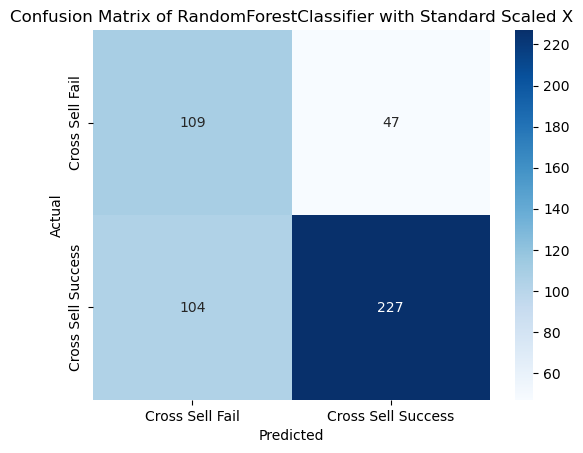

In [92]:

print(f"""
Best Fitted Model Result
=============================================================
Model Name     : {best['model_name']}
Train Score    : {best['train_score']}
Test Score     : {best['test_score']}
Train-Test Gap : {best['gap']}
AUC Score      : {best['auc']} - Threshold: {best['threshold']}

Confusion Matrix
====================""")
model_tn, \
model_fp, \
model_fn, \
model_tp = best['confusion_matrix'].ravel()

print(f"""
True Negatives : {model_tn}
False Positives: {model_fp}
False Negatives: {model_fn}
True Positives : {model_tp}
""")

sns.heatmap(best['confusion_matrix'],
                annot       = True,
                xticklabels = ['Cross Sell Fail', 'Cross Sell Success'],
                yticklabels = ['Cross Sell Fail', 'Cross Sell Success'],
                cmap        = 'Blues',
                fmt         = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f"Confusion Matrix of {best['model_name']}")
plt.show()

In [93]:
endTime = time.time()
runningTime = endTime - startTime
print(f"Total Running Time: {round(runningTime, 0)} seconds.")

Total Running Time: 110.0 seconds.
